#  finding best model using voting comparing various algorithm

In [9]:
import pandas as pd
import numpy as np
from sklearn.metrics import r2_score,mean_absolute_error,accuracy_score,log_loss
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import log_loss
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold,KFold
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn.metrics import r2_score,mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeClassifier,plot_tree,DecisionTreeRegressor
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import VotingClassifier,VotingRegressor


from sklearn.linear_model import Ridge,LinearRegression
from sklearn.neighbors import KNeighborsRegressor

In [2]:
import os
os.chdir(r"C:\Users\dbda\Desktop\MACHINE LEARNING\cases\Kyphosis")

In [91]:
kyp=pd.read_csv("Kyphosis.csv")
y=kyp["Kyphosis"]
x=kyp.drop("Kyphosis",axis=1)

In [92]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,stratify=y,random_state=24)

In [93]:
lr=LogisticRegression()
nb=GaussianNB()
svm=SVC(random_state=24,probability=True)
voting=VotingClassifier([("LR",lr),("NB",nb),("SVM",svm)],voting="soft")

In [94]:
voting.fit(xtrain,ytrain)
y_pred=voting.predict(xtest)
print(accuracy_score(ytest,y_pred))

0.76


In [95]:
y_pred_prob=voting.predict_proba(xtest)[:,1]
print(log_loss(ytest,y_pred_prob))

#hard voting voting done by majority
# by default voting setting is hard



0.48258033499245295


# Voting classifier

In [96]:
kfold=StratifiedKFold(n_splits=5,shuffle=True,random_state=24)
params={"LR__penalty":["L2",None],
        "LR__C":np.linspace(0.01,4,5),
        "LR__solver":["lbfgs","newton-cg","newtpn-cholesky","sag"],
       "SVM__kernel":["linear","rbf"],
        "SVM__C":np.linspace(0.01,4,5),
        "SVM__gamma":np.linspace(0.01,4,5),}

In [97]:
voting=VotingClassifier([("LR",lr),("NB",nb),("SVM",svm)],voting="soft")

In [98]:
gcv=GridSearchCV(voting,param_grid=params,cv=kfold,verbose=3,scoring="neg_log_loss")


In [99]:
gcv.fit(x,y)

Fitting 5 folds for each of 2000 candidates, totalling 10000 fits
[CV 1/5] END LR__C=0.01, LR__penalty=L2, LR__solver=lbfgs, SVM__C=0.01, SVM__gamma=0.01, SVM__kernel=linear;, score=nan total time=   0.0s
[CV 2/5] END LR__C=0.01, LR__penalty=L2, LR__solver=lbfgs, SVM__C=0.01, SVM__gamma=0.01, SVM__kernel=linear;, score=nan total time=   0.0s
[CV 3/5] END LR__C=0.01, LR__penalty=L2, LR__solver=lbfgs, SVM__C=0.01, SVM__gamma=0.01, SVM__kernel=linear;, score=nan total time=   0.0s
[CV 4/5] END LR__C=0.01, LR__penalty=L2, LR__solver=lbfgs, SVM__C=0.01, SVM__gamma=0.01, SVM__kernel=linear;, score=nan total time=   0.0s
[CV 5/5] END LR__C=0.01, LR__penalty=L2, LR__solver=lbfgs, SVM__C=0.01, SVM__gamma=0.01, SVM__kernel=linear;, score=nan total time=   0.0s
[CV 1/5] END LR__C=0.01, LR__penalty=L2, LR__solver=lbfgs, SVM__C=0.01, SVM__gamma=0.01, SVM__kernel=rbf;, score=nan total time=   0.0s
[CV 2/5] END LR__C=0.01, LR__penalty=L2, LR__solver=lbfgs, SVM__C=0.01, SVM__gamma=0.01, SVM__kernel=rb

C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio par

[CV 2/5] END LR__C=0.01, LR__penalty=None, LR__solver=lbfgs, SVM__C=0.01, SVM__gamma=0.01, SVM__kernel=rbf;, score=-0.314 total time=   0.0s
[CV 3/5] END LR__C=0.01, LR__penalty=None, LR__solver=lbfgs, SVM__C=0.01, SVM__gamma=0.01, SVM__kernel=rbf;, score=-0.366 total time=   0.0s
[CV 4/5] END LR__C=0.01, LR__penalty=None, LR__solver=lbfgs, SVM__C=0.01, SVM__gamma=0.01, SVM__kernel=rbf;, score=-0.405 total time=   0.0s
[CV 5/5] END LR__C=0.01, LR__penalty=None, LR__solver=lbfgs, SVM__C=0.01, SVM__gamma=0.01, SVM__kernel=rbf;, score=-0.446 total time=   0.0s
[CV 1/5] END LR__C=0.01, LR__penalty=None, LR__solver=lbfgs, SVM__C=0.01, SVM__gamma=1.0075, SVM__kernel=linear;, score=-0.462 total time=   0.0s
[CV 2/5] END LR__C=0.01, LR__penalty=None, LR__solver=lbfgs, SVM__C=0.01, SVM__gamma=1.0075, SVM__kernel=linear;, score=-0.313 total time=   0.0s
[CV 3/5] END LR__C=0.01, LR__penalty=None, LR__solver=lbfgs, SVM__C=0.01, SVM__gamma=1.0075, SVM__kernel=linear;, score=-0.375 total time=   0.0

C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio par

[CV 1/5] END LR__C=0.01, LR__penalty=None, LR__solver=lbfgs, SVM__C=0.01, SVM__gamma=2.005, SVM__kernel=linear;, score=-0.462 total time=   0.0s
[CV 2/5] END LR__C=0.01, LR__penalty=None, LR__solver=lbfgs, SVM__C=0.01, SVM__gamma=2.005, SVM__kernel=linear;, score=-0.313 total time=   0.0s
[CV 3/5] END LR__C=0.01, LR__penalty=None, LR__solver=lbfgs, SVM__C=0.01, SVM__gamma=2.005, SVM__kernel=linear;, score=-0.375 total time=   0.0s
[CV 4/5] END LR__C=0.01, LR__penalty=None, LR__solver=lbfgs, SVM__C=0.01, SVM__gamma=2.005, SVM__kernel=linear;, score=-0.380 total time=   0.0s
[CV 5/5] END LR__C=0.01, LR__penalty=None, LR__solver=lbfgs, SVM__C=0.01, SVM__gamma=2.005, SVM__kernel=linear;, score=-0.460 total time=   0.0s
[CV 1/5] END LR__C=0.01, LR__penalty=None, LR__solver=lbfgs, SVM__C=0.01, SVM__gamma=2.005, SVM__kernel=rbf;, score=-0.474 total time=   0.0s
[CV 2/5] END LR__C=0.01, LR__penalty=None, LR__solver=lbfgs, SVM__C=0.01, SVM__gamma=2.005, SVM__kernel=rbf;, score=-0.313 total time

C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio par

[CV 5/5] END LR__C=0.01, LR__penalty=None, LR__solver=lbfgs, SVM__C=0.01, SVM__gamma=3.0025, SVM__kernel=linear;, score=-0.460 total time=   0.0s
[CV 1/5] END LR__C=0.01, LR__penalty=None, LR__solver=lbfgs, SVM__C=0.01, SVM__gamma=3.0025, SVM__kernel=rbf;, score=-0.476 total time=   0.0s
[CV 2/5] END LR__C=0.01, LR__penalty=None, LR__solver=lbfgs, SVM__C=0.01, SVM__gamma=3.0025, SVM__kernel=rbf;, score=-0.314 total time=   0.0s
[CV 3/5] END LR__C=0.01, LR__penalty=None, LR__solver=lbfgs, SVM__C=0.01, SVM__gamma=3.0025, SVM__kernel=rbf;, score=-0.371 total time=   0.0s
[CV 4/5] END LR__C=0.01, LR__penalty=None, LR__solver=lbfgs, SVM__C=0.01, SVM__gamma=3.0025, SVM__kernel=rbf;, score=-0.379 total time=   0.0s
[CV 5/5] END LR__C=0.01, LR__penalty=None, LR__solver=lbfgs, SVM__C=0.01, SVM__gamma=3.0025, SVM__kernel=rbf;, score=-0.446 total time=   0.0s
[CV 1/5] END LR__C=0.01, LR__penalty=None, LR__solver=lbfgs, SVM__C=0.01, SVM__gamma=4.0, SVM__kernel=linear;, score=-0.462 total time=   0

C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio par

[CV 3/5] END LR__C=0.01, LR__penalty=None, LR__solver=lbfgs, SVM__C=0.01, SVM__gamma=4.0, SVM__kernel=rbf;, score=-0.371 total time=   0.0s
[CV 4/5] END LR__C=0.01, LR__penalty=None, LR__solver=lbfgs, SVM__C=0.01, SVM__gamma=4.0, SVM__kernel=rbf;, score=-0.379 total time=   0.0s
[CV 5/5] END LR__C=0.01, LR__penalty=None, LR__solver=lbfgs, SVM__C=0.01, SVM__gamma=4.0, SVM__kernel=rbf;, score=-0.446 total time=   0.0s
[CV 1/5] END LR__C=0.01, LR__penalty=None, LR__solver=lbfgs, SVM__C=1.0075, SVM__gamma=0.01, SVM__kernel=linear;, score=-0.451 total time=   0.0s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 2/5] END LR__C=0.01, LR__penalty=None, LR__solver=lbfgs, SVM__C=1.0075, SVM__gamma=0.01, SVM__kernel=linear;, score=-0.302 total time=   0.0s
[CV 3/5] END LR__C=0.01, LR__penalty=None, LR__solver=lbfgs, SVM__C=1.0075, SVM__gamma=0.01, SVM__kernel=linear;, score=-0.370 total time=   0.0s
[CV 4/5] END LR__C=0.01, LR__penalty=None, LR__solver=lbfgs, SVM__C=1.0075, SVM__gamma=0.01, SVM__kernel=linear;, score=-0.381 total time=   0.0s
[CV 5/5] END LR__C=0.01, LR__penalty=None, LR__solver=lbfgs, SVM__C=1.0075, SVM__gamma=0.01, SVM__kernel=linear;, score=-0.592 total time=   0.0s
[CV 1/5] END LR__C=0.01, LR__penalty=None, LR__solver=lbfgs, SVM__C=1.0075, SVM__gamma=0.01, SVM__kernel=rbf;, score=-0.467 total time=   0.0s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio par

[CV 2/5] END LR__C=0.01, LR__penalty=None, LR__solver=lbfgs, SVM__C=1.0075, SVM__gamma=0.01, SVM__kernel=rbf;, score=-0.314 total time=   0.0s
[CV 3/5] END LR__C=0.01, LR__penalty=None, LR__solver=lbfgs, SVM__C=1.0075, SVM__gamma=0.01, SVM__kernel=rbf;, score=-0.366 total time=   0.0s
[CV 4/5] END LR__C=0.01, LR__penalty=None, LR__solver=lbfgs, SVM__C=1.0075, SVM__gamma=0.01, SVM__kernel=rbf;, score=-0.405 total time=   0.0s
[CV 5/5] END LR__C=0.01, LR__penalty=None, LR__solver=lbfgs, SVM__C=1.0075, SVM__gamma=0.01, SVM__kernel=rbf;, score=-0.445 total time=   0.0s
[CV 1/5] END LR__C=0.01, LR__penalty=None, LR__solver=lbfgs, SVM__C=1.0075, SVM__gamma=1.0075, SVM__kernel=linear;, score=-0.451 total time=   0.0s
[CV 2/5] END LR__C=0.01, LR__penalty=None, LR__solver=lbfgs, SVM__C=1.0075, SVM__gamma=1.0075, SVM__kernel=linear;, score=-0.302 total time=   0.0s
[CV 3/5] END LR__C=0.01, LR__penalty=None, LR__solver=lbfgs, SVM__C=1.0075, SVM__gamma=1.0075, SVM__kernel=linear;, score=-0.370 tot

C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 1/5] END LR__C=0.01, LR__penalty=None, LR__solver=lbfgs, SVM__C=1.0075, SVM__gamma=1.0075, SVM__kernel=rbf;, score=-0.470 total time=   0.0s
[CV 2/5] END LR__C=0.01, LR__penalty=None, LR__solver=lbfgs, SVM__C=1.0075, SVM__gamma=1.0075, SVM__kernel=rbf;, score=-0.313 total time=   0.0s
[CV 3/5] END LR__C=0.01, LR__penalty=None, LR__solver=lbfgs, SVM__C=1.0075, SVM__gamma=1.0075, SVM__kernel=rbf;, score=-0.375 total time=   0.0s
[CV 4/5] END LR__C=0.01, LR__penalty=None, LR__solver=lbfgs, SVM__C=1.0075, SVM__gamma=1.0075, SVM__kernel=rbf;, score=-0.380 total time=   0.0s
[CV 5/5] END LR__C=0.01, LR__penalty=None, LR__solver=lbfgs, SVM__C=1.0075, SVM__gamma=1.0075, SVM__kernel=rbf;, score=-0.446 total time=   0.0s
[CV 1/5] END LR__C=0.01, LR__penalty=None, LR__solver=lbfgs, SVM__C=1.0075, SVM__gamma=2.005, SVM__kernel=linear;, score=-0.451 total time=   0.0s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio par

[CV 2/5] END LR__C=0.01, LR__penalty=None, LR__solver=lbfgs, SVM__C=1.0075, SVM__gamma=2.005, SVM__kernel=linear;, score=-0.302 total time=   0.0s
[CV 3/5] END LR__C=0.01, LR__penalty=None, LR__solver=lbfgs, SVM__C=1.0075, SVM__gamma=2.005, SVM__kernel=linear;, score=-0.370 total time=   0.0s
[CV 4/5] END LR__C=0.01, LR__penalty=None, LR__solver=lbfgs, SVM__C=1.0075, SVM__gamma=2.005, SVM__kernel=linear;, score=-0.381 total time=   0.0s
[CV 5/5] END LR__C=0.01, LR__penalty=None, LR__solver=lbfgs, SVM__C=1.0075, SVM__gamma=2.005, SVM__kernel=linear;, score=-0.592 total time=   0.0s
[CV 1/5] END LR__C=0.01, LR__penalty=None, LR__solver=lbfgs, SVM__C=1.0075, SVM__gamma=2.005, SVM__kernel=rbf;, score=-0.474 total time=   0.0s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio par

[CV 2/5] END LR__C=0.01, LR__penalty=None, LR__solver=lbfgs, SVM__C=1.0075, SVM__gamma=2.005, SVM__kernel=rbf;, score=-0.313 total time=   0.0s
[CV 3/5] END LR__C=0.01, LR__penalty=None, LR__solver=lbfgs, SVM__C=1.0075, SVM__gamma=2.005, SVM__kernel=rbf;, score=-0.372 total time=   0.0s
[CV 4/5] END LR__C=0.01, LR__penalty=None, LR__solver=lbfgs, SVM__C=1.0075, SVM__gamma=2.005, SVM__kernel=rbf;, score=-0.379 total time=   0.0s
[CV 5/5] END LR__C=0.01, LR__penalty=None, LR__solver=lbfgs, SVM__C=1.0075, SVM__gamma=2.005, SVM__kernel=rbf;, score=-0.446 total time=   0.0s
[CV 1/5] END LR__C=0.01, LR__penalty=None, LR__solver=lbfgs, SVM__C=1.0075, SVM__gamma=3.0025, SVM__kernel=linear;, score=-0.451 total time=   0.0s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio par

[CV 2/5] END LR__C=0.01, LR__penalty=None, LR__solver=lbfgs, SVM__C=1.0075, SVM__gamma=3.0025, SVM__kernel=linear;, score=-0.302 total time=   0.0s
[CV 3/5] END LR__C=0.01, LR__penalty=None, LR__solver=lbfgs, SVM__C=1.0075, SVM__gamma=3.0025, SVM__kernel=linear;, score=-0.370 total time=   0.0s
[CV 4/5] END LR__C=0.01, LR__penalty=None, LR__solver=lbfgs, SVM__C=1.0075, SVM__gamma=3.0025, SVM__kernel=linear;, score=-0.381 total time=   0.0s
[CV 5/5] END LR__C=0.01, LR__penalty=None, LR__solver=lbfgs, SVM__C=1.0075, SVM__gamma=3.0025, SVM__kernel=linear;, score=-0.592 total time=   0.0s
[CV 1/5] END LR__C=0.01, LR__penalty=None, LR__solver=lbfgs, SVM__C=1.0075, SVM__gamma=3.0025, SVM__kernel=rbf;, score=-0.476 total time=   0.0s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio par

[CV 2/5] END LR__C=0.01, LR__penalty=None, LR__solver=lbfgs, SVM__C=1.0075, SVM__gamma=3.0025, SVM__kernel=rbf;, score=-0.314 total time=   0.0s
[CV 3/5] END LR__C=0.01, LR__penalty=None, LR__solver=lbfgs, SVM__C=1.0075, SVM__gamma=3.0025, SVM__kernel=rbf;, score=-0.371 total time=   0.0s
[CV 4/5] END LR__C=0.01, LR__penalty=None, LR__solver=lbfgs, SVM__C=1.0075, SVM__gamma=3.0025, SVM__kernel=rbf;, score=-0.379 total time=   0.0s
[CV 5/5] END LR__C=0.01, LR__penalty=None, LR__solver=lbfgs, SVM__C=1.0075, SVM__gamma=3.0025, SVM__kernel=rbf;, score=-0.446 total time=   0.0s
[CV 1/5] END LR__C=0.01, LR__penalty=None, LR__solver=lbfgs, SVM__C=1.0075, SVM__gamma=4.0, SVM__kernel=linear;, score=-0.451 total time=   0.0s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio par

[CV 2/5] END LR__C=0.01, LR__penalty=None, LR__solver=lbfgs, SVM__C=1.0075, SVM__gamma=4.0, SVM__kernel=linear;, score=-0.302 total time=   0.0s
[CV 3/5] END LR__C=0.01, LR__penalty=None, LR__solver=lbfgs, SVM__C=1.0075, SVM__gamma=4.0, SVM__kernel=linear;, score=-0.370 total time=   0.0s
[CV 4/5] END LR__C=0.01, LR__penalty=None, LR__solver=lbfgs, SVM__C=1.0075, SVM__gamma=4.0, SVM__kernel=linear;, score=-0.381 total time=   0.0s
[CV 5/5] END LR__C=0.01, LR__penalty=None, LR__solver=lbfgs, SVM__C=1.0075, SVM__gamma=4.0, SVM__kernel=linear;, score=-0.592 total time=   0.0s
[CV 1/5] END LR__C=0.01, LR__penalty=None, LR__solver=lbfgs, SVM__C=1.0075, SVM__gamma=4.0, SVM__kernel=rbf;, score=-0.476 total time=   0.0s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio par

[CV 2/5] END LR__C=0.01, LR__penalty=None, LR__solver=lbfgs, SVM__C=1.0075, SVM__gamma=4.0, SVM__kernel=rbf;, score=-0.315 total time=   0.0s
[CV 3/5] END LR__C=0.01, LR__penalty=None, LR__solver=lbfgs, SVM__C=1.0075, SVM__gamma=4.0, SVM__kernel=rbf;, score=-0.371 total time=   0.0s
[CV 4/5] END LR__C=0.01, LR__penalty=None, LR__solver=lbfgs, SVM__C=1.0075, SVM__gamma=4.0, SVM__kernel=rbf;, score=-0.379 total time=   0.0s
[CV 5/5] END LR__C=0.01, LR__penalty=None, LR__solver=lbfgs, SVM__C=1.0075, SVM__gamma=4.0, SVM__kernel=rbf;, score=-0.446 total time=   0.0s
[CV 1/5] END LR__C=0.01, LR__penalty=None, LR__solver=lbfgs, SVM__C=2.005, SVM__gamma=0.01, SVM__kernel=linear;, score=-0.451 total time=   0.0s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio par

[CV 2/5] END LR__C=0.01, LR__penalty=None, LR__solver=lbfgs, SVM__C=2.005, SVM__gamma=0.01, SVM__kernel=linear;, score=-0.302 total time=   0.2s
[CV 3/5] END LR__C=0.01, LR__penalty=None, LR__solver=lbfgs, SVM__C=2.005, SVM__gamma=0.01, SVM__kernel=linear;, score=-0.370 total time=   0.0s
[CV 4/5] END LR__C=0.01, LR__penalty=None, LR__solver=lbfgs, SVM__C=2.005, SVM__gamma=0.01, SVM__kernel=linear;, score=-0.381 total time=   0.0s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 5/5] END LR__C=0.01, LR__penalty=None, LR__solver=lbfgs, SVM__C=2.005, SVM__gamma=0.01, SVM__kernel=linear;, score=-0.592 total time=   0.0s
[CV 1/5] END LR__C=0.01, LR__penalty=None, LR__solver=lbfgs, SVM__C=2.005, SVM__gamma=0.01, SVM__kernel=rbf;, score=-0.472 total time=   0.0s
[CV 2/5] END LR__C=0.01, LR__penalty=None, LR__solver=lbfgs, SVM__C=2.005, SVM__gamma=0.01, SVM__kernel=rbf;, score=-0.309 total time=   0.0s
[CV 3/5] END LR__C=0.01, LR__penalty=None, LR__solver=lbfgs, SVM__C=2.005, SVM__gamma=0.01, SVM__kernel=rbf;, score=-0.365 total time=   0.0s
[CV 4/5] END LR__C=0.01, LR__penalty=None, LR__solver=lbfgs, SVM__C=2.005, SVM__gamma=0.01, SVM__kernel=rbf;, score=-0.412 total time=   0.0s
[CV 5/5] END LR__C=0.01, LR__penalty=None, LR__solver=lbfgs, SVM__C=2.005, SVM__gamma=0.01, SVM__kernel=rbf;, score=-0.450 total time=   0.0s
[CV 1/5] END LR__C=0.01, LR__penalty=None, LR__solver=lbfgs, SVM__C=2.005, SVM__gamma=1.0075, SVM__kernel=linear;, score=-0.451 total time=   0.0

C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio par

[CV 2/5] END LR__C=0.01, LR__penalty=None, LR__solver=lbfgs, SVM__C=2.005, SVM__gamma=1.0075, SVM__kernel=linear;, score=-0.302 total time=   0.2s
[CV 3/5] END LR__C=0.01, LR__penalty=None, LR__solver=lbfgs, SVM__C=2.005, SVM__gamma=1.0075, SVM__kernel=linear;, score=-0.370 total time=   0.0s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 4/5] END LR__C=0.01, LR__penalty=None, LR__solver=lbfgs, SVM__C=2.005, SVM__gamma=1.0075, SVM__kernel=linear;, score=-0.381 total time=   0.0s
[CV 5/5] END LR__C=0.01, LR__penalty=None, LR__solver=lbfgs, SVM__C=2.005, SVM__gamma=1.0075, SVM__kernel=linear;, score=-0.592 total time=   0.0s
[CV 1/5] END LR__C=0.01, LR__penalty=None, LR__solver=lbfgs, SVM__C=2.005, SVM__gamma=1.0075, SVM__kernel=rbf;, score=-0.469 total time=   0.0s
[CV 2/5] END LR__C=0.01, LR__penalty=None, LR__solver=lbfgs, SVM__C=2.005, SVM__gamma=1.0075, SVM__kernel=rbf;, score=-0.314 total time=   0.0s
[CV 3/5] END LR__C=0.01, LR__penalty=None, LR__solver=lbfgs, SVM__C=2.005, SVM__gamma=1.0075, SVM__kernel=rbf;, score=-0.375 total time=   0.0s
[CV 4/5] END LR__C=0.01, LR__penalty=None, LR__solver=lbfgs, SVM__C=2.005, SVM__gamma=1.0075, SVM__kernel=rbf;, score=-0.380 total time=   0.0s
[CV 5/5] END LR__C=0.01, LR__penalty=None, LR__solver=lbfgs, SVM__C=2.005, SVM__gamma=1.0075, SVM__kernel=rbf;, score=-0.446 total

C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio par

[CV 1/5] END LR__C=0.01, LR__penalty=None, LR__solver=lbfgs, SVM__C=2.005, SVM__gamma=2.005, SVM__kernel=linear;, score=-0.451 total time=   0.0s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 2/5] END LR__C=0.01, LR__penalty=None, LR__solver=lbfgs, SVM__C=2.005, SVM__gamma=2.005, SVM__kernel=linear;, score=-0.302 total time=   0.2s
[CV 3/5] END LR__C=0.01, LR__penalty=None, LR__solver=lbfgs, SVM__C=2.005, SVM__gamma=2.005, SVM__kernel=linear;, score=-0.370 total time=   0.0s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 4/5] END LR__C=0.01, LR__penalty=None, LR__solver=lbfgs, SVM__C=2.005, SVM__gamma=2.005, SVM__kernel=linear;, score=-0.381 total time=   0.0s
[CV 5/5] END LR__C=0.01, LR__penalty=None, LR__solver=lbfgs, SVM__C=2.005, SVM__gamma=2.005, SVM__kernel=linear;, score=-0.592 total time=   0.0s
[CV 1/5] END LR__C=0.01, LR__penalty=None, LR__solver=lbfgs, SVM__C=2.005, SVM__gamma=2.005, SVM__kernel=rbf;, score=-0.475 total time=   0.0s
[CV 2/5] END LR__C=0.01, LR__penalty=None, LR__solver=lbfgs, SVM__C=2.005, SVM__gamma=2.005, SVM__kernel=rbf;, score=-0.313 total time=   0.0s
[CV 3/5] END LR__C=0.01, LR__penalty=None, LR__solver=lbfgs, SVM__C=2.005, SVM__gamma=2.005, SVM__kernel=rbf;, score=-0.372 total time=   0.0s
[CV 4/5] END LR__C=0.01, LR__penalty=None, LR__solver=lbfgs, SVM__C=2.005, SVM__gamma=2.005, SVM__kernel=rbf;, score=-0.378 total time=   0.0s
[CV 5/5] END LR__C=0.01, LR__penalty=None, LR__solver=lbfgs, SVM__C=2.005, SVM__gamma=2.005, SVM__kernel=rbf;, score=-0.446 total time= 

C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio par

[CV 1/5] END LR__C=0.01, LR__penalty=None, LR__solver=lbfgs, SVM__C=2.005, SVM__gamma=3.0025, SVM__kernel=linear;, score=-0.451 total time=   0.0s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 2/5] END LR__C=0.01, LR__penalty=None, LR__solver=lbfgs, SVM__C=2.005, SVM__gamma=3.0025, SVM__kernel=linear;, score=-0.302 total time=   0.2s
[CV 3/5] END LR__C=0.01, LR__penalty=None, LR__solver=lbfgs, SVM__C=2.005, SVM__gamma=3.0025, SVM__kernel=linear;, score=-0.370 total time=   0.0s
[CV 4/5] END LR__C=0.01, LR__penalty=None, LR__solver=lbfgs, SVM__C=2.005, SVM__gamma=3.0025, SVM__kernel=linear;, score=-0.381 total time=   0.0s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 5/5] END LR__C=0.01, LR__penalty=None, LR__solver=lbfgs, SVM__C=2.005, SVM__gamma=3.0025, SVM__kernel=linear;, score=-0.592 total time=   0.0s
[CV 1/5] END LR__C=0.01, LR__penalty=None, LR__solver=lbfgs, SVM__C=2.005, SVM__gamma=3.0025, SVM__kernel=rbf;, score=-0.476 total time=   0.0s
[CV 2/5] END LR__C=0.01, LR__penalty=None, LR__solver=lbfgs, SVM__C=2.005, SVM__gamma=3.0025, SVM__kernel=rbf;, score=-0.314 total time=   0.0s
[CV 3/5] END LR__C=0.01, LR__penalty=None, LR__solver=lbfgs, SVM__C=2.005, SVM__gamma=3.0025, SVM__kernel=rbf;, score=-0.371 total time=   0.0s
[CV 4/5] END LR__C=0.01, LR__penalty=None, LR__solver=lbfgs, SVM__C=2.005, SVM__gamma=3.0025, SVM__kernel=rbf;, score=-0.378 total time=   0.0s
[CV 5/5] END LR__C=0.01, LR__penalty=None, LR__solver=lbfgs, SVM__C=2.005, SVM__gamma=3.0025, SVM__kernel=rbf;, score=-0.445 total time=   0.0s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio par

[CV 1/5] END LR__C=0.01, LR__penalty=None, LR__solver=lbfgs, SVM__C=2.005, SVM__gamma=4.0, SVM__kernel=linear;, score=-0.451 total time=   0.0s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 2/5] END LR__C=0.01, LR__penalty=None, LR__solver=lbfgs, SVM__C=2.005, SVM__gamma=4.0, SVM__kernel=linear;, score=-0.302 total time=   0.2s
[CV 3/5] END LR__C=0.01, LR__penalty=None, LR__solver=lbfgs, SVM__C=2.005, SVM__gamma=4.0, SVM__kernel=linear;, score=-0.370 total time=   0.0s
[CV 4/5] END LR__C=0.01, LR__penalty=None, LR__solver=lbfgs, SVM__C=2.005, SVM__gamma=4.0, SVM__kernel=linear;, score=-0.381 total time=   0.0s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 5/5] END LR__C=0.01, LR__penalty=None, LR__solver=lbfgs, SVM__C=2.005, SVM__gamma=4.0, SVM__kernel=linear;, score=-0.592 total time=   0.0s
[CV 1/5] END LR__C=0.01, LR__penalty=None, LR__solver=lbfgs, SVM__C=2.005, SVM__gamma=4.0, SVM__kernel=rbf;, score=-0.476 total time=   0.0s
[CV 2/5] END LR__C=0.01, LR__penalty=None, LR__solver=lbfgs, SVM__C=2.005, SVM__gamma=4.0, SVM__kernel=rbf;, score=-0.314 total time=   0.0s
[CV 3/5] END LR__C=0.01, LR__penalty=None, LR__solver=lbfgs, SVM__C=2.005, SVM__gamma=4.0, SVM__kernel=rbf;, score=-0.371 total time=   0.0s
[CV 4/5] END LR__C=0.01, LR__penalty=None, LR__solver=lbfgs, SVM__C=2.005, SVM__gamma=4.0, SVM__kernel=rbf;, score=-0.378 total time=   0.0s
[CV 5/5] END LR__C=0.01, LR__penalty=None, LR__solver=lbfgs, SVM__C=2.005, SVM__gamma=4.0, SVM__kernel=rbf;, score=-0.445 total time=   0.0s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio par

[CV 1/5] END LR__C=0.01, LR__penalty=None, LR__solver=lbfgs, SVM__C=3.0025, SVM__gamma=0.01, SVM__kernel=linear;, score=-0.451 total time=   0.1s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 2/5] END LR__C=0.01, LR__penalty=None, LR__solver=lbfgs, SVM__C=3.0025, SVM__gamma=0.01, SVM__kernel=linear;, score=-0.302 total time=   0.2s
[CV 3/5] END LR__C=0.01, LR__penalty=None, LR__solver=lbfgs, SVM__C=3.0025, SVM__gamma=0.01, SVM__kernel=linear;, score=-0.370 total time=   0.1s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 4/5] END LR__C=0.01, LR__penalty=None, LR__solver=lbfgs, SVM__C=3.0025, SVM__gamma=0.01, SVM__kernel=linear;, score=-0.381 total time=   0.0s
[CV 5/5] END LR__C=0.01, LR__penalty=None, LR__solver=lbfgs, SVM__C=3.0025, SVM__gamma=0.01, SVM__kernel=linear;, score=-0.592 total time=   0.0s
[CV 1/5] END LR__C=0.01, LR__penalty=None, LR__solver=lbfgs, SVM__C=3.0025, SVM__gamma=0.01, SVM__kernel=rbf;, score=-0.474 total time=   0.0s
[CV 2/5] END LR__C=0.01, LR__penalty=None, LR__solver=lbfgs, SVM__C=3.0025, SVM__gamma=0.01, SVM__kernel=rbf;, score=-0.307 total time=   0.0s
[CV 3/5] END LR__C=0.01, LR__penalty=None, LR__solver=lbfgs, SVM__C=3.0025, SVM__gamma=0.01, SVM__kernel=rbf;, score=-0.366 total time=   0.0s
[CV 4/5] END LR__C=0.01, LR__penalty=None, LR__solver=lbfgs, SVM__C=3.0025, SVM__gamma=0.01, SVM__kernel=rbf;, score=-0.410 total time=   0.0s
[CV 5/5] END LR__C=0.01, LR__penalty=None, LR__solver=lbfgs, SVM__C=3.0025, SVM__gamma=0.01, SVM__kernel=rbf;, score=-0.445 total time= 

C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio par

[CV 1/5] END LR__C=0.01, LR__penalty=None, LR__solver=lbfgs, SVM__C=3.0025, SVM__gamma=1.0075, SVM__kernel=linear;, score=-0.451 total time=   0.1s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 2/5] END LR__C=0.01, LR__penalty=None, LR__solver=lbfgs, SVM__C=3.0025, SVM__gamma=1.0075, SVM__kernel=linear;, score=-0.302 total time=   0.2s
[CV 3/5] END LR__C=0.01, LR__penalty=None, LR__solver=lbfgs, SVM__C=3.0025, SVM__gamma=1.0075, SVM__kernel=linear;, score=-0.370 total time=   0.1s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 4/5] END LR__C=0.01, LR__penalty=None, LR__solver=lbfgs, SVM__C=3.0025, SVM__gamma=1.0075, SVM__kernel=linear;, score=-0.381 total time=   0.0s
[CV 5/5] END LR__C=0.01, LR__penalty=None, LR__solver=lbfgs, SVM__C=3.0025, SVM__gamma=1.0075, SVM__kernel=linear;, score=-0.592 total time=   0.0s
[CV 1/5] END LR__C=0.01, LR__penalty=None, LR__solver=lbfgs, SVM__C=3.0025, SVM__gamma=1.0075, SVM__kernel=rbf;, score=-0.469 total time=   0.0s
[CV 2/5] END LR__C=0.01, LR__penalty=None, LR__solver=lbfgs, SVM__C=3.0025, SVM__gamma=1.0075, SVM__kernel=rbf;, score=-0.314 total time=   0.0s
[CV 3/5] END LR__C=0.01, LR__penalty=None, LR__solver=lbfgs, SVM__C=3.0025, SVM__gamma=1.0075, SVM__kernel=rbf;, score=-0.375 total time=   0.0s
[CV 4/5] END LR__C=0.01, LR__penalty=None, LR__solver=lbfgs, SVM__C=3.0025, SVM__gamma=1.0075, SVM__kernel=rbf;, score=-0.380 total time=   0.0s
[CV 5/5] END LR__C=0.01, LR__penalty=None, LR__solver=lbfgs, SVM__C=3.0025, SVM__gamma=1.0075, SVM__kernel=rbf;, score=-0.44

C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio par

[CV 1/5] END LR__C=0.01, LR__penalty=None, LR__solver=lbfgs, SVM__C=3.0025, SVM__gamma=2.005, SVM__kernel=linear;, score=-0.451 total time=   0.0s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 2/5] END LR__C=0.01, LR__penalty=None, LR__solver=lbfgs, SVM__C=3.0025, SVM__gamma=2.005, SVM__kernel=linear;, score=-0.302 total time=   0.2s
[CV 3/5] END LR__C=0.01, LR__penalty=None, LR__solver=lbfgs, SVM__C=3.0025, SVM__gamma=2.005, SVM__kernel=linear;, score=-0.370 total time=   0.1s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 4/5] END LR__C=0.01, LR__penalty=None, LR__solver=lbfgs, SVM__C=3.0025, SVM__gamma=2.005, SVM__kernel=linear;, score=-0.381 total time=   0.0s
[CV 5/5] END LR__C=0.01, LR__penalty=None, LR__solver=lbfgs, SVM__C=3.0025, SVM__gamma=2.005, SVM__kernel=linear;, score=-0.592 total time=   0.0s
[CV 1/5] END LR__C=0.01, LR__penalty=None, LR__solver=lbfgs, SVM__C=3.0025, SVM__gamma=2.005, SVM__kernel=rbf;, score=-0.475 total time=   0.0s
[CV 2/5] END LR__C=0.01, LR__penalty=None, LR__solver=lbfgs, SVM__C=3.0025, SVM__gamma=2.005, SVM__kernel=rbf;, score=-0.313 total time=   0.0s
[CV 3/5] END LR__C=0.01, LR__penalty=None, LR__solver=lbfgs, SVM__C=3.0025, SVM__gamma=2.005, SVM__kernel=rbf;, score=-0.372 total time=   0.0s
[CV 4/5] END LR__C=0.01, LR__penalty=None, LR__solver=lbfgs, SVM__C=3.0025, SVM__gamma=2.005, SVM__kernel=rbf;, score=-0.378 total time=   0.0s
[CV 5/5] END LR__C=0.01, LR__penalty=None, LR__solver=lbfgs, SVM__C=3.0025, SVM__gamma=2.005, SVM__kernel=rbf;, score=-0.446 total

C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio par

[CV 1/5] END LR__C=0.01, LR__penalty=None, LR__solver=lbfgs, SVM__C=3.0025, SVM__gamma=3.0025, SVM__kernel=linear;, score=-0.451 total time=   0.0s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 2/5] END LR__C=0.01, LR__penalty=None, LR__solver=lbfgs, SVM__C=3.0025, SVM__gamma=3.0025, SVM__kernel=linear;, score=-0.302 total time=   0.2s
[CV 3/5] END LR__C=0.01, LR__penalty=None, LR__solver=lbfgs, SVM__C=3.0025, SVM__gamma=3.0025, SVM__kernel=linear;, score=-0.370 total time=   0.1s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 4/5] END LR__C=0.01, LR__penalty=None, LR__solver=lbfgs, SVM__C=3.0025, SVM__gamma=3.0025, SVM__kernel=linear;, score=-0.381 total time=   0.0s
[CV 5/5] END LR__C=0.01, LR__penalty=None, LR__solver=lbfgs, SVM__C=3.0025, SVM__gamma=3.0025, SVM__kernel=linear;, score=-0.592 total time=   0.0s
[CV 1/5] END LR__C=0.01, LR__penalty=None, LR__solver=lbfgs, SVM__C=3.0025, SVM__gamma=3.0025, SVM__kernel=rbf;, score=-0.476 total time=   0.0s
[CV 2/5] END LR__C=0.01, LR__penalty=None, LR__solver=lbfgs, SVM__C=3.0025, SVM__gamma=3.0025, SVM__kernel=rbf;, score=-0.314 total time=   0.0s
[CV 3/5] END LR__C=0.01, LR__penalty=None, LR__solver=lbfgs, SVM__C=3.0025, SVM__gamma=3.0025, SVM__kernel=rbf;, score=-0.371 total time=   0.0s
[CV 4/5] END LR__C=0.01, LR__penalty=None, LR__solver=lbfgs, SVM__C=3.0025, SVM__gamma=3.0025, SVM__kernel=rbf;, score=-0.378 total time=   0.0s
[CV 5/5] END LR__C=0.01, LR__penalty=None, LR__solver=lbfgs, SVM__C=3.0025, SVM__gamma=3.0025, SVM__kernel=rbf;, score=-0.44

C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio par

[CV 1/5] END LR__C=0.01, LR__penalty=None, LR__solver=lbfgs, SVM__C=3.0025, SVM__gamma=4.0, SVM__kernel=linear;, score=-0.451 total time=   0.1s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 2/5] END LR__C=0.01, LR__penalty=None, LR__solver=lbfgs, SVM__C=3.0025, SVM__gamma=4.0, SVM__kernel=linear;, score=-0.302 total time=   0.2s
[CV 3/5] END LR__C=0.01, LR__penalty=None, LR__solver=lbfgs, SVM__C=3.0025, SVM__gamma=4.0, SVM__kernel=linear;, score=-0.370 total time=   0.1s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 4/5] END LR__C=0.01, LR__penalty=None, LR__solver=lbfgs, SVM__C=3.0025, SVM__gamma=4.0, SVM__kernel=linear;, score=-0.381 total time=   0.0s
[CV 5/5] END LR__C=0.01, LR__penalty=None, LR__solver=lbfgs, SVM__C=3.0025, SVM__gamma=4.0, SVM__kernel=linear;, score=-0.592 total time=   0.0s
[CV 1/5] END LR__C=0.01, LR__penalty=None, LR__solver=lbfgs, SVM__C=3.0025, SVM__gamma=4.0, SVM__kernel=rbf;, score=-0.476 total time=   0.0s
[CV 2/5] END LR__C=0.01, LR__penalty=None, LR__solver=lbfgs, SVM__C=3.0025, SVM__gamma=4.0, SVM__kernel=rbf;, score=-0.314 total time=   0.0s
[CV 3/5] END LR__C=0.01, LR__penalty=None, LR__solver=lbfgs, SVM__C=3.0025, SVM__gamma=4.0, SVM__kernel=rbf;, score=-0.371 total time=   0.0s
[CV 4/5] END LR__C=0.01, LR__penalty=None, LR__solver=lbfgs, SVM__C=3.0025, SVM__gamma=4.0, SVM__kernel=rbf;, score=-0.378 total time=   0.0s
[CV 5/5] END LR__C=0.01, LR__penalty=None, LR__solver=lbfgs, SVM__C=3.0025, SVM__gamma=4.0, SVM__kernel=rbf;, score=-0.445 total time=   0.0s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio par

[CV 1/5] END LR__C=0.01, LR__penalty=None, LR__solver=lbfgs, SVM__C=4.0, SVM__gamma=0.01, SVM__kernel=linear;, score=-0.452 total time=   0.1s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 2/5] END LR__C=0.01, LR__penalty=None, LR__solver=lbfgs, SVM__C=4.0, SVM__gamma=0.01, SVM__kernel=linear;, score=-0.302 total time=   0.3s
[CV 3/5] END LR__C=0.01, LR__penalty=None, LR__solver=lbfgs, SVM__C=4.0, SVM__gamma=0.01, SVM__kernel=linear;, score=-0.370 total time=   0.1s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 4/5] END LR__C=0.01, LR__penalty=None, LR__solver=lbfgs, SVM__C=4.0, SVM__gamma=0.01, SVM__kernel=linear;, score=-0.381 total time=   0.1s
[CV 5/5] END LR__C=0.01, LR__penalty=None, LR__solver=lbfgs, SVM__C=4.0, SVM__gamma=0.01, SVM__kernel=linear;, score=-0.592 total time=   0.1s
[CV 1/5] END LR__C=0.01, LR__penalty=None, LR__solver=lbfgs, SVM__C=4.0, SVM__gamma=0.01, SVM__kernel=rbf;, score=-0.474 total time=   0.0s
[CV 2/5] END LR__C=0.01, LR__penalty=None, LR__solver=lbfgs, SVM__C=4.0, SVM__gamma=0.01, SVM__kernel=rbf;, score=-0.308 total time=   0.0s
[CV 3/5] END LR__C=0.01, LR__penalty=None, LR__solver=lbfgs, SVM__C=4.0, SVM__gamma=0.01, SVM__kernel=rbf;, score=-0.365 total time=   0.0s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio par

[CV 4/5] END LR__C=0.01, LR__penalty=None, LR__solver=lbfgs, SVM__C=4.0, SVM__gamma=0.01, SVM__kernel=rbf;, score=-0.410 total time=   0.0s
[CV 5/5] END LR__C=0.01, LR__penalty=None, LR__solver=lbfgs, SVM__C=4.0, SVM__gamma=0.01, SVM__kernel=rbf;, score=-0.441 total time=   0.0s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 1/5] END LR__C=0.01, LR__penalty=None, LR__solver=lbfgs, SVM__C=4.0, SVM__gamma=1.0075, SVM__kernel=linear;, score=-0.452 total time=   0.1s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 2/5] END LR__C=0.01, LR__penalty=None, LR__solver=lbfgs, SVM__C=4.0, SVM__gamma=1.0075, SVM__kernel=linear;, score=-0.302 total time=   0.3s
[CV 3/5] END LR__C=0.01, LR__penalty=None, LR__solver=lbfgs, SVM__C=4.0, SVM__gamma=1.0075, SVM__kernel=linear;, score=-0.370 total time=   0.1s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 4/5] END LR__C=0.01, LR__penalty=None, LR__solver=lbfgs, SVM__C=4.0, SVM__gamma=1.0075, SVM__kernel=linear;, score=-0.381 total time=   0.1s
[CV 5/5] END LR__C=0.01, LR__penalty=None, LR__solver=lbfgs, SVM__C=4.0, SVM__gamma=1.0075, SVM__kernel=linear;, score=-0.592 total time=   0.1s
[CV 1/5] END LR__C=0.01, LR__penalty=None, LR__solver=lbfgs, SVM__C=4.0, SVM__gamma=1.0075, SVM__kernel=rbf;, score=-0.469 total time=   0.0s
[CV 2/5] END LR__C=0.01, LR__penalty=None, LR__solver=lbfgs, SVM__C=4.0, SVM__gamma=1.0075, SVM__kernel=rbf;, score=-0.314 total time=   0.0s
[CV 3/5] END LR__C=0.01, LR__penalty=None, LR__solver=lbfgs, SVM__C=4.0, SVM__gamma=1.0075, SVM__kernel=rbf;, score=-0.375 total time=   0.0s
[CV 4/5] END LR__C=0.01, LR__penalty=None, LR__solver=lbfgs, SVM__C=4.0, SVM__gamma=1.0075, SVM__kernel=rbf;, score=-0.380 total time=   0.0s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio par

[CV 5/5] END LR__C=0.01, LR__penalty=None, LR__solver=lbfgs, SVM__C=4.0, SVM__gamma=1.0075, SVM__kernel=rbf;, score=-0.446 total time=   0.0s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 1/5] END LR__C=0.01, LR__penalty=None, LR__solver=lbfgs, SVM__C=4.0, SVM__gamma=2.005, SVM__kernel=linear;, score=-0.452 total time=   0.1s
[CV 2/5] END LR__C=0.01, LR__penalty=None, LR__solver=lbfgs, SVM__C=4.0, SVM__gamma=2.005, SVM__kernel=linear;, score=-0.302 total time=   0.3s
[CV 3/5] END LR__C=0.01, LR__penalty=None, LR__solver=lbfgs, SVM__C=4.0, SVM__gamma=2.005, SVM__kernel=linear;, score=-0.370 total time=   0.1s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 4/5] END LR__C=0.01, LR__penalty=None, LR__solver=lbfgs, SVM__C=4.0, SVM__gamma=2.005, SVM__kernel=linear;, score=-0.381 total time=   0.1s
[CV 5/5] END LR__C=0.01, LR__penalty=None, LR__solver=lbfgs, SVM__C=4.0, SVM__gamma=2.005, SVM__kernel=linear;, score=-0.592 total time=   0.0s
[CV 1/5] END LR__C=0.01, LR__penalty=None, LR__solver=lbfgs, SVM__C=4.0, SVM__gamma=2.005, SVM__kernel=rbf;, score=-0.475 total time=   0.0s
[CV 2/5] END LR__C=0.01, LR__penalty=None, LR__solver=lbfgs, SVM__C=4.0, SVM__gamma=2.005, SVM__kernel=rbf;, score=-0.313 total time=   0.0s
[CV 3/5] END LR__C=0.01, LR__penalty=None, LR__solver=lbfgs, SVM__C=4.0, SVM__gamma=2.005, SVM__kernel=rbf;, score=-0.372 total time=   0.0s
[CV 4/5] END LR__C=0.01, LR__penalty=None, LR__solver=lbfgs, SVM__C=4.0, SVM__gamma=2.005, SVM__kernel=rbf;, score=-0.378 total time=   0.0s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio par

[CV 5/5] END LR__C=0.01, LR__penalty=None, LR__solver=lbfgs, SVM__C=4.0, SVM__gamma=2.005, SVM__kernel=rbf;, score=-0.446 total time=   0.0s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 1/5] END LR__C=0.01, LR__penalty=None, LR__solver=lbfgs, SVM__C=4.0, SVM__gamma=3.0025, SVM__kernel=linear;, score=-0.452 total time=   0.1s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 2/5] END LR__C=0.01, LR__penalty=None, LR__solver=lbfgs, SVM__C=4.0, SVM__gamma=3.0025, SVM__kernel=linear;, score=-0.302 total time=   0.3s
[CV 3/5] END LR__C=0.01, LR__penalty=None, LR__solver=lbfgs, SVM__C=4.0, SVM__gamma=3.0025, SVM__kernel=linear;, score=-0.370 total time=   0.1s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 4/5] END LR__C=0.01, LR__penalty=None, LR__solver=lbfgs, SVM__C=4.0, SVM__gamma=3.0025, SVM__kernel=linear;, score=-0.381 total time=   0.1s
[CV 5/5] END LR__C=0.01, LR__penalty=None, LR__solver=lbfgs, SVM__C=4.0, SVM__gamma=3.0025, SVM__kernel=linear;, score=-0.592 total time=   0.0s
[CV 1/5] END LR__C=0.01, LR__penalty=None, LR__solver=lbfgs, SVM__C=4.0, SVM__gamma=3.0025, SVM__kernel=rbf;, score=-0.476 total time=   0.0s
[CV 2/5] END LR__C=0.01, LR__penalty=None, LR__solver=lbfgs, SVM__C=4.0, SVM__gamma=3.0025, SVM__kernel=rbf;, score=-0.314 total time=   0.0s
[CV 3/5] END LR__C=0.01, LR__penalty=None, LR__solver=lbfgs, SVM__C=4.0, SVM__gamma=3.0025, SVM__kernel=rbf;, score=-0.371 total time=   0.0s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio par

[CV 4/5] END LR__C=0.01, LR__penalty=None, LR__solver=lbfgs, SVM__C=4.0, SVM__gamma=3.0025, SVM__kernel=rbf;, score=-0.378 total time=   0.0s
[CV 5/5] END LR__C=0.01, LR__penalty=None, LR__solver=lbfgs, SVM__C=4.0, SVM__gamma=3.0025, SVM__kernel=rbf;, score=-0.445 total time=   0.0s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 1/5] END LR__C=0.01, LR__penalty=None, LR__solver=lbfgs, SVM__C=4.0, SVM__gamma=4.0, SVM__kernel=linear;, score=-0.452 total time=   0.1s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 2/5] END LR__C=0.01, LR__penalty=None, LR__solver=lbfgs, SVM__C=4.0, SVM__gamma=4.0, SVM__kernel=linear;, score=-0.302 total time=   0.3s
[CV 3/5] END LR__C=0.01, LR__penalty=None, LR__solver=lbfgs, SVM__C=4.0, SVM__gamma=4.0, SVM__kernel=linear;, score=-0.370 total time=   0.1s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 4/5] END LR__C=0.01, LR__penalty=None, LR__solver=lbfgs, SVM__C=4.0, SVM__gamma=4.0, SVM__kernel=linear;, score=-0.381 total time=   0.1s
[CV 5/5] END LR__C=0.01, LR__penalty=None, LR__solver=lbfgs, SVM__C=4.0, SVM__gamma=4.0, SVM__kernel=linear;, score=-0.592 total time=   0.1s
[CV 1/5] END LR__C=0.01, LR__penalty=None, LR__solver=lbfgs, SVM__C=4.0, SVM__gamma=4.0, SVM__kernel=rbf;, score=-0.476 total time=   0.0s
[CV 2/5] END LR__C=0.01, LR__penalty=None, LR__solver=lbfgs, SVM__C=4.0, SVM__gamma=4.0, SVM__kernel=rbf;, score=-0.314 total time=   0.0s
[CV 3/5] END LR__C=0.01, LR__penalty=None, LR__solver=lbfgs, SVM__C=4.0, SVM__gamma=4.0, SVM__kernel=rbf;, score=-0.371 total time=   0.0s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio par

[CV 4/5] END LR__C=0.01, LR__penalty=None, LR__solver=lbfgs, SVM__C=4.0, SVM__gamma=4.0, SVM__kernel=rbf;, score=-0.378 total time=   0.0s
[CV 5/5] END LR__C=0.01, LR__penalty=None, LR__solver=lbfgs, SVM__C=4.0, SVM__gamma=4.0, SVM__kernel=rbf;, score=-0.445 total time=   0.0s
[CV 1/5] END LR__C=0.01, LR__penalty=None, LR__solver=newton-cg, SVM__C=0.01, SVM__gamma=0.01, SVM__kernel=linear;, score=-0.462 total time=   0.0s
[CV 2/5] END LR__C=0.01, LR__penalty=None, LR__solver=newton-cg, SVM__C=0.01, SVM__gamma=0.01, SVM__kernel=linear;, score=-0.313 total time=   0.0s
[CV 3/5] END LR__C=0.01, LR__penalty=None, LR__solver=newton-cg, SVM__C=0.01, SVM__gamma=0.01, SVM__kernel=linear;, score=-0.375 total time=   0.0s
[CV 4/5] END LR__C=0.01, LR__penalty=None, LR__solver=newton-cg, SVM__C=0.01, SVM__gamma=0.01, SVM__kernel=linear;, score=-0.380 total time=   0.0s
[CV 5/5] END LR__C=0.01, LR__penalty=None, LR__solver=newton-cg, SVM__C=0.01, SVM__gamma=0.01, SVM__kernel=linear;, score=-0.460 t

C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio par

[CV 2/5] END LR__C=0.01, LR__penalty=None, LR__solver=newton-cg, SVM__C=0.01, SVM__gamma=1.0075, SVM__kernel=linear;, score=-0.313 total time=   0.0s
[CV 3/5] END LR__C=0.01, LR__penalty=None, LR__solver=newton-cg, SVM__C=0.01, SVM__gamma=1.0075, SVM__kernel=linear;, score=-0.375 total time=   0.0s
[CV 4/5] END LR__C=0.01, LR__penalty=None, LR__solver=newton-cg, SVM__C=0.01, SVM__gamma=1.0075, SVM__kernel=linear;, score=-0.380 total time=   0.0s
[CV 5/5] END LR__C=0.01, LR__penalty=None, LR__solver=newton-cg, SVM__C=0.01, SVM__gamma=1.0075, SVM__kernel=linear;, score=-0.460 total time=   0.0s
[CV 1/5] END LR__C=0.01, LR__penalty=None, LR__solver=newton-cg, SVM__C=0.01, SVM__gamma=1.0075, SVM__kernel=rbf;, score=-0.470 total time=   0.0s
[CV 2/5] END LR__C=0.01, LR__penalty=None, LR__solver=newton-cg, SVM__C=0.01, SVM__gamma=1.0075, SVM__kernel=rbf;, score=-0.313 total time=   0.0s
[CV 3/5] END LR__C=0.01, LR__penalty=None, LR__solver=newton-cg, SVM__C=0.01, SVM__gamma=1.0075, SVM__kern

C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio par

[CV 1/5] END LR__C=0.01, LR__penalty=None, LR__solver=newton-cg, SVM__C=0.01, SVM__gamma=2.005, SVM__kernel=rbf;, score=-0.474 total time=   0.0s
[CV 2/5] END LR__C=0.01, LR__penalty=None, LR__solver=newton-cg, SVM__C=0.01, SVM__gamma=2.005, SVM__kernel=rbf;, score=-0.313 total time=   0.0s
[CV 3/5] END LR__C=0.01, LR__penalty=None, LR__solver=newton-cg, SVM__C=0.01, SVM__gamma=2.005, SVM__kernel=rbf;, score=-0.372 total time=   0.0s
[CV 4/5] END LR__C=0.01, LR__penalty=None, LR__solver=newton-cg, SVM__C=0.01, SVM__gamma=2.005, SVM__kernel=rbf;, score=-0.379 total time=   0.0s
[CV 5/5] END LR__C=0.01, LR__penalty=None, LR__solver=newton-cg, SVM__C=0.01, SVM__gamma=2.005, SVM__kernel=rbf;, score=-0.446 total time=   0.0s
[CV 1/5] END LR__C=0.01, LR__penalty=None, LR__solver=newton-cg, SVM__C=0.01, SVM__gamma=3.0025, SVM__kernel=linear;, score=-0.462 total time=   0.0s
[CV 2/5] END LR__C=0.01, LR__penalty=None, LR__solver=newton-cg, SVM__C=0.01, SVM__gamma=3.0025, SVM__kernel=linear;, sc

C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio par

[CV 5/5] END LR__C=0.01, LR__penalty=None, LR__solver=newton-cg, SVM__C=0.01, SVM__gamma=3.0025, SVM__kernel=rbf;, score=-0.446 total time=   0.0s
[CV 1/5] END LR__C=0.01, LR__penalty=None, LR__solver=newton-cg, SVM__C=0.01, SVM__gamma=4.0, SVM__kernel=linear;, score=-0.462 total time=   0.0s
[CV 2/5] END LR__C=0.01, LR__penalty=None, LR__solver=newton-cg, SVM__C=0.01, SVM__gamma=4.0, SVM__kernel=linear;, score=-0.313 total time=   0.0s
[CV 3/5] END LR__C=0.01, LR__penalty=None, LR__solver=newton-cg, SVM__C=0.01, SVM__gamma=4.0, SVM__kernel=linear;, score=-0.375 total time=   0.0s
[CV 4/5] END LR__C=0.01, LR__penalty=None, LR__solver=newton-cg, SVM__C=0.01, SVM__gamma=4.0, SVM__kernel=linear;, score=-0.380 total time=   0.0s
[CV 5/5] END LR__C=0.01, LR__penalty=None, LR__solver=newton-cg, SVM__C=0.01, SVM__gamma=4.0, SVM__kernel=linear;, score=-0.460 total time=   0.0s
[CV 1/5] END LR__C=0.01, LR__penalty=None, LR__solver=newton-cg, SVM__C=0.01, SVM__gamma=4.0, SVM__kernel=rbf;, score=

C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio par

[CV 1/5] END LR__C=0.01, LR__penalty=None, LR__solver=newton-cg, SVM__C=1.0075, SVM__gamma=0.01, SVM__kernel=linear;, score=-0.451 total time=   0.0s
[CV 2/5] END LR__C=0.01, LR__penalty=None, LR__solver=newton-cg, SVM__C=1.0075, SVM__gamma=0.01, SVM__kernel=linear;, score=-0.302 total time=   0.0s
[CV 3/5] END LR__C=0.01, LR__penalty=None, LR__solver=newton-cg, SVM__C=1.0075, SVM__gamma=0.01, SVM__kernel=linear;, score=-0.370 total time=   0.0s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 4/5] END LR__C=0.01, LR__penalty=None, LR__solver=newton-cg, SVM__C=1.0075, SVM__gamma=0.01, SVM__kernel=linear;, score=-0.381 total time=   0.0s
[CV 5/5] END LR__C=0.01, LR__penalty=None, LR__solver=newton-cg, SVM__C=1.0075, SVM__gamma=0.01, SVM__kernel=linear;, score=-0.592 total time=   0.0s
[CV 1/5] END LR__C=0.01, LR__penalty=None, LR__solver=newton-cg, SVM__C=1.0075, SVM__gamma=0.01, SVM__kernel=rbf;, score=-0.467 total time=   0.0s
[CV 2/5] END LR__C=0.01, LR__penalty=None, LR__solver=newton-cg, SVM__C=1.0075, SVM__gamma=0.01, SVM__kernel=rbf;, score=-0.314 total time=   0.0s
[CV 3/5] END LR__C=0.01, LR__penalty=None, LR__solver=newton-cg, SVM__C=1.0075, SVM__gamma=0.01, SVM__kernel=rbf;, score=-0.366 total time=   0.0s
[CV 4/5] END LR__C=0.01, LR__penalty=None, LR__solver=newton-cg, SVM__C=1.0075, SVM__gamma=0.01, SVM__kernel=rbf;, score=-0.405 total time=   0.0s
[CV 5/5] END LR__C=0.01, LR__penalty=None, LR__solver=newton-cg, SVM__C=1.0075, SVM__gamma=0.01, SVM__kernel=rbf

C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio par

[CV 2/5] END LR__C=0.01, LR__penalty=None, LR__solver=newton-cg, SVM__C=1.0075, SVM__gamma=1.0075, SVM__kernel=linear;, score=-0.302 total time=   0.0s
[CV 3/5] END LR__C=0.01, LR__penalty=None, LR__solver=newton-cg, SVM__C=1.0075, SVM__gamma=1.0075, SVM__kernel=linear;, score=-0.370 total time=   0.0s
[CV 4/5] END LR__C=0.01, LR__penalty=None, LR__solver=newton-cg, SVM__C=1.0075, SVM__gamma=1.0075, SVM__kernel=linear;, score=-0.381 total time=   0.0s
[CV 5/5] END LR__C=0.01, LR__penalty=None, LR__solver=newton-cg, SVM__C=1.0075, SVM__gamma=1.0075, SVM__kernel=linear;, score=-0.592 total time=   0.0s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio par

[CV 1/5] END LR__C=0.01, LR__penalty=None, LR__solver=newton-cg, SVM__C=1.0075, SVM__gamma=1.0075, SVM__kernel=rbf;, score=-0.470 total time=   0.0s
[CV 2/5] END LR__C=0.01, LR__penalty=None, LR__solver=newton-cg, SVM__C=1.0075, SVM__gamma=1.0075, SVM__kernel=rbf;, score=-0.313 total time=   0.0s
[CV 3/5] END LR__C=0.01, LR__penalty=None, LR__solver=newton-cg, SVM__C=1.0075, SVM__gamma=1.0075, SVM__kernel=rbf;, score=-0.375 total time=   0.0s
[CV 4/5] END LR__C=0.01, LR__penalty=None, LR__solver=newton-cg, SVM__C=1.0075, SVM__gamma=1.0075, SVM__kernel=rbf;, score=-0.380 total time=   0.0s
[CV 5/5] END LR__C=0.01, LR__penalty=None, LR__solver=newton-cg, SVM__C=1.0075, SVM__gamma=1.0075, SVM__kernel=rbf;, score=-0.446 total time=   0.0s
[CV 1/5] END LR__C=0.01, LR__penalty=None, LR__solver=newton-cg, SVM__C=1.0075, SVM__gamma=2.005, SVM__kernel=linear;, score=-0.451 total time=   0.0s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio par

[CV 2/5] END LR__C=0.01, LR__penalty=None, LR__solver=newton-cg, SVM__C=1.0075, SVM__gamma=2.005, SVM__kernel=linear;, score=-0.302 total time=   0.0s
[CV 3/5] END LR__C=0.01, LR__penalty=None, LR__solver=newton-cg, SVM__C=1.0075, SVM__gamma=2.005, SVM__kernel=linear;, score=-0.370 total time=   0.0s
[CV 4/5] END LR__C=0.01, LR__penalty=None, LR__solver=newton-cg, SVM__C=1.0075, SVM__gamma=2.005, SVM__kernel=linear;, score=-0.381 total time=   0.0s
[CV 5/5] END LR__C=0.01, LR__penalty=None, LR__solver=newton-cg, SVM__C=1.0075, SVM__gamma=2.005, SVM__kernel=linear;, score=-0.592 total time=   0.0s
[CV 1/5] END LR__C=0.01, LR__penalty=None, LR__solver=newton-cg, SVM__C=1.0075, SVM__gamma=2.005, SVM__kernel=rbf;, score=-0.474 total time=   0.0s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio par

[CV 2/5] END LR__C=0.01, LR__penalty=None, LR__solver=newton-cg, SVM__C=1.0075, SVM__gamma=2.005, SVM__kernel=rbf;, score=-0.313 total time=   0.0s
[CV 3/5] END LR__C=0.01, LR__penalty=None, LR__solver=newton-cg, SVM__C=1.0075, SVM__gamma=2.005, SVM__kernel=rbf;, score=-0.372 total time=   0.0s
[CV 4/5] END LR__C=0.01, LR__penalty=None, LR__solver=newton-cg, SVM__C=1.0075, SVM__gamma=2.005, SVM__kernel=rbf;, score=-0.379 total time=   0.0s
[CV 5/5] END LR__C=0.01, LR__penalty=None, LR__solver=newton-cg, SVM__C=1.0075, SVM__gamma=2.005, SVM__kernel=rbf;, score=-0.446 total time=   0.0s
[CV 1/5] END LR__C=0.01, LR__penalty=None, LR__solver=newton-cg, SVM__C=1.0075, SVM__gamma=3.0025, SVM__kernel=linear;, score=-0.451 total time=   0.0s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 2/5] END LR__C=0.01, LR__penalty=None, LR__solver=newton-cg, SVM__C=1.0075, SVM__gamma=3.0025, SVM__kernel=linear;, score=-0.302 total time=   0.0s
[CV 3/5] END LR__C=0.01, LR__penalty=None, LR__solver=newton-cg, SVM__C=1.0075, SVM__gamma=3.0025, SVM__kernel=linear;, score=-0.370 total time=   0.0s
[CV 4/5] END LR__C=0.01, LR__penalty=None, LR__solver=newton-cg, SVM__C=1.0075, SVM__gamma=3.0025, SVM__kernel=linear;, score=-0.381 total time=   0.0s
[CV 5/5] END LR__C=0.01, LR__penalty=None, LR__solver=newton-cg, SVM__C=1.0075, SVM__gamma=3.0025, SVM__kernel=linear;, score=-0.592 total time=   0.0s
[CV 1/5] END LR__C=0.01, LR__penalty=None, LR__solver=newton-cg, SVM__C=1.0075, SVM__gamma=3.0025, SVM__kernel=rbf;, score=-0.476 total time=   0.0s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio par

[CV 2/5] END LR__C=0.01, LR__penalty=None, LR__solver=newton-cg, SVM__C=1.0075, SVM__gamma=3.0025, SVM__kernel=rbf;, score=-0.314 total time=   0.0s
[CV 3/5] END LR__C=0.01, LR__penalty=None, LR__solver=newton-cg, SVM__C=1.0075, SVM__gamma=3.0025, SVM__kernel=rbf;, score=-0.371 total time=   0.0s
[CV 4/5] END LR__C=0.01, LR__penalty=None, LR__solver=newton-cg, SVM__C=1.0075, SVM__gamma=3.0025, SVM__kernel=rbf;, score=-0.379 total time=   0.0s
[CV 5/5] END LR__C=0.01, LR__penalty=None, LR__solver=newton-cg, SVM__C=1.0075, SVM__gamma=3.0025, SVM__kernel=rbf;, score=-0.446 total time=   0.0s
[CV 1/5] END LR__C=0.01, LR__penalty=None, LR__solver=newton-cg, SVM__C=1.0075, SVM__gamma=4.0, SVM__kernel=linear;, score=-0.451 total time=   0.0s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio par

[CV 2/5] END LR__C=0.01, LR__penalty=None, LR__solver=newton-cg, SVM__C=1.0075, SVM__gamma=4.0, SVM__kernel=linear;, score=-0.302 total time=   0.0s
[CV 3/5] END LR__C=0.01, LR__penalty=None, LR__solver=newton-cg, SVM__C=1.0075, SVM__gamma=4.0, SVM__kernel=linear;, score=-0.370 total time=   0.0s
[CV 4/5] END LR__C=0.01, LR__penalty=None, LR__solver=newton-cg, SVM__C=1.0075, SVM__gamma=4.0, SVM__kernel=linear;, score=-0.381 total time=   0.0s
[CV 5/5] END LR__C=0.01, LR__penalty=None, LR__solver=newton-cg, SVM__C=1.0075, SVM__gamma=4.0, SVM__kernel=linear;, score=-0.592 total time=   0.0s
[CV 1/5] END LR__C=0.01, LR__penalty=None, LR__solver=newton-cg, SVM__C=1.0075, SVM__gamma=4.0, SVM__kernel=rbf;, score=-0.476 total time=   0.0s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio par

[CV 2/5] END LR__C=0.01, LR__penalty=None, LR__solver=newton-cg, SVM__C=1.0075, SVM__gamma=4.0, SVM__kernel=rbf;, score=-0.315 total time=   0.0s
[CV 3/5] END LR__C=0.01, LR__penalty=None, LR__solver=newton-cg, SVM__C=1.0075, SVM__gamma=4.0, SVM__kernel=rbf;, score=-0.371 total time=   0.0s
[CV 4/5] END LR__C=0.01, LR__penalty=None, LR__solver=newton-cg, SVM__C=1.0075, SVM__gamma=4.0, SVM__kernel=rbf;, score=-0.379 total time=   0.0s
[CV 5/5] END LR__C=0.01, LR__penalty=None, LR__solver=newton-cg, SVM__C=1.0075, SVM__gamma=4.0, SVM__kernel=rbf;, score=-0.446 total time=   0.0s
[CV 1/5] END LR__C=0.01, LR__penalty=None, LR__solver=newton-cg, SVM__C=2.005, SVM__gamma=0.01, SVM__kernel=linear;, score=-0.451 total time=   0.0s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio par

[CV 2/5] END LR__C=0.01, LR__penalty=None, LR__solver=newton-cg, SVM__C=2.005, SVM__gamma=0.01, SVM__kernel=linear;, score=-0.302 total time=   0.2s
[CV 3/5] END LR__C=0.01, LR__penalty=None, LR__solver=newton-cg, SVM__C=2.005, SVM__gamma=0.01, SVM__kernel=linear;, score=-0.370 total time=   0.0s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 4/5] END LR__C=0.01, LR__penalty=None, LR__solver=newton-cg, SVM__C=2.005, SVM__gamma=0.01, SVM__kernel=linear;, score=-0.381 total time=   0.0s
[CV 5/5] END LR__C=0.01, LR__penalty=None, LR__solver=newton-cg, SVM__C=2.005, SVM__gamma=0.01, SVM__kernel=linear;, score=-0.592 total time=   0.0s
[CV 1/5] END LR__C=0.01, LR__penalty=None, LR__solver=newton-cg, SVM__C=2.005, SVM__gamma=0.01, SVM__kernel=rbf;, score=-0.472 total time=   0.0s
[CV 2/5] END LR__C=0.01, LR__penalty=None, LR__solver=newton-cg, SVM__C=2.005, SVM__gamma=0.01, SVM__kernel=rbf;, score=-0.309 total time=   0.0s
[CV 3/5] END LR__C=0.01, LR__penalty=None, LR__solver=newton-cg, SVM__C=2.005, SVM__gamma=0.01, SVM__kernel=rbf;, score=-0.365 total time=   0.0s
[CV 4/5] END LR__C=0.01, LR__penalty=None, LR__solver=newton-cg, SVM__C=2.005, SVM__gamma=0.01, SVM__kernel=rbf;, score=-0.412 total time=   0.0s
[CV 5/5] END LR__C=0.01, LR__penalty=None, LR__solver=newton-cg, SVM__C=2.005, SVM__gamma=0.01, SVM__kernel=rbf;, scor

C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio par

[CV 1/5] END LR__C=0.01, LR__penalty=None, LR__solver=newton-cg, SVM__C=2.005, SVM__gamma=1.0075, SVM__kernel=linear;, score=-0.451 total time=   0.0s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 2/5] END LR__C=0.01, LR__penalty=None, LR__solver=newton-cg, SVM__C=2.005, SVM__gamma=1.0075, SVM__kernel=linear;, score=-0.302 total time=   0.2s
[CV 3/5] END LR__C=0.01, LR__penalty=None, LR__solver=newton-cg, SVM__C=2.005, SVM__gamma=1.0075, SVM__kernel=linear;, score=-0.370 total time=   0.0s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 4/5] END LR__C=0.01, LR__penalty=None, LR__solver=newton-cg, SVM__C=2.005, SVM__gamma=1.0075, SVM__kernel=linear;, score=-0.381 total time=   0.0s
[CV 5/5] END LR__C=0.01, LR__penalty=None, LR__solver=newton-cg, SVM__C=2.005, SVM__gamma=1.0075, SVM__kernel=linear;, score=-0.592 total time=   0.0s
[CV 1/5] END LR__C=0.01, LR__penalty=None, LR__solver=newton-cg, SVM__C=2.005, SVM__gamma=1.0075, SVM__kernel=rbf;, score=-0.469 total time=   0.0s
[CV 2/5] END LR__C=0.01, LR__penalty=None, LR__solver=newton-cg, SVM__C=2.005, SVM__gamma=1.0075, SVM__kernel=rbf;, score=-0.314 total time=   0.0s
[CV 3/5] END LR__C=0.01, LR__penalty=None, LR__solver=newton-cg, SVM__C=2.005, SVM__gamma=1.0075, SVM__kernel=rbf;, score=-0.375 total time=   0.0s
[CV 4/5] END LR__C=0.01, LR__penalty=None, LR__solver=newton-cg, SVM__C=2.005, SVM__gamma=1.0075, SVM__kernel=rbf;, score=-0.380 total time=   0.0s
[CV 5/5] END LR__C=0.01, LR__penalty=None, LR__solver=newton-cg, SVM__C=2.005, SVM__gamma=1.0075, SVM__ker

C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio par

[CV 1/5] END LR__C=0.01, LR__penalty=None, LR__solver=newton-cg, SVM__C=2.005, SVM__gamma=2.005, SVM__kernel=linear;, score=-0.451 total time=   0.0s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 2/5] END LR__C=0.01, LR__penalty=None, LR__solver=newton-cg, SVM__C=2.005, SVM__gamma=2.005, SVM__kernel=linear;, score=-0.302 total time=   0.2s
[CV 3/5] END LR__C=0.01, LR__penalty=None, LR__solver=newton-cg, SVM__C=2.005, SVM__gamma=2.005, SVM__kernel=linear;, score=-0.370 total time=   0.0s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 4/5] END LR__C=0.01, LR__penalty=None, LR__solver=newton-cg, SVM__C=2.005, SVM__gamma=2.005, SVM__kernel=linear;, score=-0.381 total time=   0.0s
[CV 5/5] END LR__C=0.01, LR__penalty=None, LR__solver=newton-cg, SVM__C=2.005, SVM__gamma=2.005, SVM__kernel=linear;, score=-0.592 total time=   0.0s
[CV 1/5] END LR__C=0.01, LR__penalty=None, LR__solver=newton-cg, SVM__C=2.005, SVM__gamma=2.005, SVM__kernel=rbf;, score=-0.475 total time=   0.0s
[CV 2/5] END LR__C=0.01, LR__penalty=None, LR__solver=newton-cg, SVM__C=2.005, SVM__gamma=2.005, SVM__kernel=rbf;, score=-0.313 total time=   0.0s
[CV 3/5] END LR__C=0.01, LR__penalty=None, LR__solver=newton-cg, SVM__C=2.005, SVM__gamma=2.005, SVM__kernel=rbf;, score=-0.372 total time=   0.0s
[CV 4/5] END LR__C=0.01, LR__penalty=None, LR__solver=newton-cg, SVM__C=2.005, SVM__gamma=2.005, SVM__kernel=rbf;, score=-0.378 total time=   0.0s
[CV 5/5] END LR__C=0.01, LR__penalty=None, LR__solver=newton-cg, SVM__C=2.005, SVM__gamma=2.005, SVM__kernel=rbf

C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio par

[CV 1/5] END LR__C=0.01, LR__penalty=None, LR__solver=newton-cg, SVM__C=2.005, SVM__gamma=3.0025, SVM__kernel=linear;, score=-0.451 total time=   0.0s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 2/5] END LR__C=0.01, LR__penalty=None, LR__solver=newton-cg, SVM__C=2.005, SVM__gamma=3.0025, SVM__kernel=linear;, score=-0.302 total time=   0.2s
[CV 3/5] END LR__C=0.01, LR__penalty=None, LR__solver=newton-cg, SVM__C=2.005, SVM__gamma=3.0025, SVM__kernel=linear;, score=-0.370 total time=   0.0s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 4/5] END LR__C=0.01, LR__penalty=None, LR__solver=newton-cg, SVM__C=2.005, SVM__gamma=3.0025, SVM__kernel=linear;, score=-0.381 total time=   0.0s
[CV 5/5] END LR__C=0.01, LR__penalty=None, LR__solver=newton-cg, SVM__C=2.005, SVM__gamma=3.0025, SVM__kernel=linear;, score=-0.592 total time=   0.0s
[CV 1/5] END LR__C=0.01, LR__penalty=None, LR__solver=newton-cg, SVM__C=2.005, SVM__gamma=3.0025, SVM__kernel=rbf;, score=-0.476 total time=   0.0s
[CV 2/5] END LR__C=0.01, LR__penalty=None, LR__solver=newton-cg, SVM__C=2.005, SVM__gamma=3.0025, SVM__kernel=rbf;, score=-0.314 total time=   0.0s
[CV 3/5] END LR__C=0.01, LR__penalty=None, LR__solver=newton-cg, SVM__C=2.005, SVM__gamma=3.0025, SVM__kernel=rbf;, score=-0.371 total time=   0.0s
[CV 4/5] END LR__C=0.01, LR__penalty=None, LR__solver=newton-cg, SVM__C=2.005, SVM__gamma=3.0025, SVM__kernel=rbf;, score=-0.378 total time=   0.0s
[CV 5/5] END LR__C=0.01, LR__penalty=None, LR__solver=newton-cg, SVM__C=2.005, SVM__gamma=3.0025, SVM__ker

C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio par

[CV 1/5] END LR__C=0.01, LR__penalty=None, LR__solver=newton-cg, SVM__C=2.005, SVM__gamma=4.0, SVM__kernel=linear;, score=-0.451 total time=   0.0s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 2/5] END LR__C=0.01, LR__penalty=None, LR__solver=newton-cg, SVM__C=2.005, SVM__gamma=4.0, SVM__kernel=linear;, score=-0.302 total time=   0.2s
[CV 3/5] END LR__C=0.01, LR__penalty=None, LR__solver=newton-cg, SVM__C=2.005, SVM__gamma=4.0, SVM__kernel=linear;, score=-0.370 total time=   0.0s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 4/5] END LR__C=0.01, LR__penalty=None, LR__solver=newton-cg, SVM__C=2.005, SVM__gamma=4.0, SVM__kernel=linear;, score=-0.381 total time=   0.0s
[CV 5/5] END LR__C=0.01, LR__penalty=None, LR__solver=newton-cg, SVM__C=2.005, SVM__gamma=4.0, SVM__kernel=linear;, score=-0.592 total time=   0.0s
[CV 1/5] END LR__C=0.01, LR__penalty=None, LR__solver=newton-cg, SVM__C=2.005, SVM__gamma=4.0, SVM__kernel=rbf;, score=-0.476 total time=   0.0s
[CV 2/5] END LR__C=0.01, LR__penalty=None, LR__solver=newton-cg, SVM__C=2.005, SVM__gamma=4.0, SVM__kernel=rbf;, score=-0.314 total time=   0.0s
[CV 3/5] END LR__C=0.01, LR__penalty=None, LR__solver=newton-cg, SVM__C=2.005, SVM__gamma=4.0, SVM__kernel=rbf;, score=-0.371 total time=   0.0s
[CV 4/5] END LR__C=0.01, LR__penalty=None, LR__solver=newton-cg, SVM__C=2.005, SVM__gamma=4.0, SVM__kernel=rbf;, score=-0.378 total time=   0.0s
[CV 5/5] END LR__C=0.01, LR__penalty=None, LR__solver=newton-cg, SVM__C=2.005, SVM__gamma=4.0, SVM__kernel=rbf;, score=-0.44

C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio par

[CV 1/5] END LR__C=0.01, LR__penalty=None, LR__solver=newton-cg, SVM__C=3.0025, SVM__gamma=0.01, SVM__kernel=linear;, score=-0.451 total time=   0.1s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 2/5] END LR__C=0.01, LR__penalty=None, LR__solver=newton-cg, SVM__C=3.0025, SVM__gamma=0.01, SVM__kernel=linear;, score=-0.302 total time=   0.2s
[CV 3/5] END LR__C=0.01, LR__penalty=None, LR__solver=newton-cg, SVM__C=3.0025, SVM__gamma=0.01, SVM__kernel=linear;, score=-0.370 total time=   0.1s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 4/5] END LR__C=0.01, LR__penalty=None, LR__solver=newton-cg, SVM__C=3.0025, SVM__gamma=0.01, SVM__kernel=linear;, score=-0.381 total time=   0.0s
[CV 5/5] END LR__C=0.01, LR__penalty=None, LR__solver=newton-cg, SVM__C=3.0025, SVM__gamma=0.01, SVM__kernel=linear;, score=-0.592 total time=   0.0s
[CV 1/5] END LR__C=0.01, LR__penalty=None, LR__solver=newton-cg, SVM__C=3.0025, SVM__gamma=0.01, SVM__kernel=rbf;, score=-0.474 total time=   0.0s
[CV 2/5] END LR__C=0.01, LR__penalty=None, LR__solver=newton-cg, SVM__C=3.0025, SVM__gamma=0.01, SVM__kernel=rbf;, score=-0.307 total time=   0.0s
[CV 3/5] END LR__C=0.01, LR__penalty=None, LR__solver=newton-cg, SVM__C=3.0025, SVM__gamma=0.01, SVM__kernel=rbf;, score=-0.366 total time=   0.0s
[CV 4/5] END LR__C=0.01, LR__penalty=None, LR__solver=newton-cg, SVM__C=3.0025, SVM__gamma=0.01, SVM__kernel=rbf;, score=-0.410 total time=   0.0s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio par

[CV 5/5] END LR__C=0.01, LR__penalty=None, LR__solver=newton-cg, SVM__C=3.0025, SVM__gamma=0.01, SVM__kernel=rbf;, score=-0.445 total time=   0.0s
[CV 1/5] END LR__C=0.01, LR__penalty=None, LR__solver=newton-cg, SVM__C=3.0025, SVM__gamma=1.0075, SVM__kernel=linear;, score=-0.451 total time=   0.1s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 2/5] END LR__C=0.01, LR__penalty=None, LR__solver=newton-cg, SVM__C=3.0025, SVM__gamma=1.0075, SVM__kernel=linear;, score=-0.302 total time=   0.2s
[CV 3/5] END LR__C=0.01, LR__penalty=None, LR__solver=newton-cg, SVM__C=3.0025, SVM__gamma=1.0075, SVM__kernel=linear;, score=-0.370 total time=   0.1s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 4/5] END LR__C=0.01, LR__penalty=None, LR__solver=newton-cg, SVM__C=3.0025, SVM__gamma=1.0075, SVM__kernel=linear;, score=-0.381 total time=   0.0s
[CV 5/5] END LR__C=0.01, LR__penalty=None, LR__solver=newton-cg, SVM__C=3.0025, SVM__gamma=1.0075, SVM__kernel=linear;, score=-0.592 total time=   0.0s
[CV 1/5] END LR__C=0.01, LR__penalty=None, LR__solver=newton-cg, SVM__C=3.0025, SVM__gamma=1.0075, SVM__kernel=rbf;, score=-0.469 total time=   0.0s
[CV 2/5] END LR__C=0.01, LR__penalty=None, LR__solver=newton-cg, SVM__C=3.0025, SVM__gamma=1.0075, SVM__kernel=rbf;, score=-0.314 total time=   0.0s
[CV 3/5] END LR__C=0.01, LR__penalty=None, LR__solver=newton-cg, SVM__C=3.0025, SVM__gamma=1.0075, SVM__kernel=rbf;, score=-0.375 total time=   0.0s
[CV 4/5] END LR__C=0.01, LR__penalty=None, LR__solver=newton-cg, SVM__C=3.0025, SVM__gamma=1.0075, SVM__kernel=rbf;, score=-0.380 total time=   0.0s
[CV 5/5] END LR__C=0.01, LR__penalty=None, LR__solver=newton-cg, SVM__C=3.0025, SVM__gamma=1.0075, S

C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio par

[CV 1/5] END LR__C=0.01, LR__penalty=None, LR__solver=newton-cg, SVM__C=3.0025, SVM__gamma=2.005, SVM__kernel=linear;, score=-0.451 total time=   0.0s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 2/5] END LR__C=0.01, LR__penalty=None, LR__solver=newton-cg, SVM__C=3.0025, SVM__gamma=2.005, SVM__kernel=linear;, score=-0.302 total time=   0.2s
[CV 3/5] END LR__C=0.01, LR__penalty=None, LR__solver=newton-cg, SVM__C=3.0025, SVM__gamma=2.005, SVM__kernel=linear;, score=-0.370 total time=   0.1s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 4/5] END LR__C=0.01, LR__penalty=None, LR__solver=newton-cg, SVM__C=3.0025, SVM__gamma=2.005, SVM__kernel=linear;, score=-0.381 total time=   0.0s
[CV 5/5] END LR__C=0.01, LR__penalty=None, LR__solver=newton-cg, SVM__C=3.0025, SVM__gamma=2.005, SVM__kernel=linear;, score=-0.592 total time=   0.0s
[CV 1/5] END LR__C=0.01, LR__penalty=None, LR__solver=newton-cg, SVM__C=3.0025, SVM__gamma=2.005, SVM__kernel=rbf;, score=-0.475 total time=   0.0s
[CV 2/5] END LR__C=0.01, LR__penalty=None, LR__solver=newton-cg, SVM__C=3.0025, SVM__gamma=2.005, SVM__kernel=rbf;, score=-0.313 total time=   0.0s
[CV 3/5] END LR__C=0.01, LR__penalty=None, LR__solver=newton-cg, SVM__C=3.0025, SVM__gamma=2.005, SVM__kernel=rbf;, score=-0.372 total time=   0.0s
[CV 4/5] END LR__C=0.01, LR__penalty=None, LR__solver=newton-cg, SVM__C=3.0025, SVM__gamma=2.005, SVM__kernel=rbf;, score=-0.378 total time=   0.0s
[CV 5/5] END LR__C=0.01, LR__penalty=None, LR__solver=newton-cg, SVM__C=3.0025, SVM__gamma=2.005, SVM__ker

C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio par

[CV 1/5] END LR__C=0.01, LR__penalty=None, LR__solver=newton-cg, SVM__C=3.0025, SVM__gamma=3.0025, SVM__kernel=linear;, score=-0.451 total time=   0.0s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 2/5] END LR__C=0.01, LR__penalty=None, LR__solver=newton-cg, SVM__C=3.0025, SVM__gamma=3.0025, SVM__kernel=linear;, score=-0.302 total time=   0.2s
[CV 3/5] END LR__C=0.01, LR__penalty=None, LR__solver=newton-cg, SVM__C=3.0025, SVM__gamma=3.0025, SVM__kernel=linear;, score=-0.370 total time=   0.1s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 4/5] END LR__C=0.01, LR__penalty=None, LR__solver=newton-cg, SVM__C=3.0025, SVM__gamma=3.0025, SVM__kernel=linear;, score=-0.381 total time=   0.0s
[CV 5/5] END LR__C=0.01, LR__penalty=None, LR__solver=newton-cg, SVM__C=3.0025, SVM__gamma=3.0025, SVM__kernel=linear;, score=-0.592 total time=   0.0s
[CV 1/5] END LR__C=0.01, LR__penalty=None, LR__solver=newton-cg, SVM__C=3.0025, SVM__gamma=3.0025, SVM__kernel=rbf;, score=-0.476 total time=   0.0s
[CV 2/5] END LR__C=0.01, LR__penalty=None, LR__solver=newton-cg, SVM__C=3.0025, SVM__gamma=3.0025, SVM__kernel=rbf;, score=-0.314 total time=   0.0s
[CV 3/5] END LR__C=0.01, LR__penalty=None, LR__solver=newton-cg, SVM__C=3.0025, SVM__gamma=3.0025, SVM__kernel=rbf;, score=-0.371 total time=   0.0s
[CV 4/5] END LR__C=0.01, LR__penalty=None, LR__solver=newton-cg, SVM__C=3.0025, SVM__gamma=3.0025, SVM__kernel=rbf;, score=-0.378 total time=   0.0s
[CV 5/5] END LR__C=0.01, LR__penalty=None, LR__solver=newton-cg, SVM__C=3.0025, SVM__gamma=3.0025, S

C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio par

[CV 1/5] END LR__C=0.01, LR__penalty=None, LR__solver=newton-cg, SVM__C=3.0025, SVM__gamma=4.0, SVM__kernel=linear;, score=-0.451 total time=   0.0s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 2/5] END LR__C=0.01, LR__penalty=None, LR__solver=newton-cg, SVM__C=3.0025, SVM__gamma=4.0, SVM__kernel=linear;, score=-0.302 total time=   0.2s
[CV 3/5] END LR__C=0.01, LR__penalty=None, LR__solver=newton-cg, SVM__C=3.0025, SVM__gamma=4.0, SVM__kernel=linear;, score=-0.370 total time=   0.1s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 4/5] END LR__C=0.01, LR__penalty=None, LR__solver=newton-cg, SVM__C=3.0025, SVM__gamma=4.0, SVM__kernel=linear;, score=-0.381 total time=   0.0s
[CV 5/5] END LR__C=0.01, LR__penalty=None, LR__solver=newton-cg, SVM__C=3.0025, SVM__gamma=4.0, SVM__kernel=linear;, score=-0.592 total time=   0.0s
[CV 1/5] END LR__C=0.01, LR__penalty=None, LR__solver=newton-cg, SVM__C=3.0025, SVM__gamma=4.0, SVM__kernel=rbf;, score=-0.476 total time=   0.0s
[CV 2/5] END LR__C=0.01, LR__penalty=None, LR__solver=newton-cg, SVM__C=3.0025, SVM__gamma=4.0, SVM__kernel=rbf;, score=-0.314 total time=   0.0s
[CV 3/5] END LR__C=0.01, LR__penalty=None, LR__solver=newton-cg, SVM__C=3.0025, SVM__gamma=4.0, SVM__kernel=rbf;, score=-0.371 total time=   0.0s
[CV 4/5] END LR__C=0.01, LR__penalty=None, LR__solver=newton-cg, SVM__C=3.0025, SVM__gamma=4.0, SVM__kernel=rbf;, score=-0.378 total time=   0.0s
[CV 5/5] END LR__C=0.01, LR__penalty=None, LR__solver=newton-cg, SVM__C=3.0025, SVM__gamma=4.0, SVM__kernel=rbf;, scor

C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio par

[CV 1/5] END LR__C=0.01, LR__penalty=None, LR__solver=newton-cg, SVM__C=4.0, SVM__gamma=0.01, SVM__kernel=linear;, score=-0.452 total time=   0.1s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 2/5] END LR__C=0.01, LR__penalty=None, LR__solver=newton-cg, SVM__C=4.0, SVM__gamma=0.01, SVM__kernel=linear;, score=-0.302 total time=   0.3s
[CV 3/5] END LR__C=0.01, LR__penalty=None, LR__solver=newton-cg, SVM__C=4.0, SVM__gamma=0.01, SVM__kernel=linear;, score=-0.370 total time=   0.1s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 4/5] END LR__C=0.01, LR__penalty=None, LR__solver=newton-cg, SVM__C=4.0, SVM__gamma=0.01, SVM__kernel=linear;, score=-0.381 total time=   0.0s
[CV 5/5] END LR__C=0.01, LR__penalty=None, LR__solver=newton-cg, SVM__C=4.0, SVM__gamma=0.01, SVM__kernel=linear;, score=-0.592 total time=   0.0s
[CV 1/5] END LR__C=0.01, LR__penalty=None, LR__solver=newton-cg, SVM__C=4.0, SVM__gamma=0.01, SVM__kernel=rbf;, score=-0.474 total time=   0.0s
[CV 2/5] END LR__C=0.01, LR__penalty=None, LR__solver=newton-cg, SVM__C=4.0, SVM__gamma=0.01, SVM__kernel=rbf;, score=-0.308 total time=   0.0s
[CV 3/5] END LR__C=0.01, LR__penalty=None, LR__solver=newton-cg, SVM__C=4.0, SVM__gamma=0.01, SVM__kernel=rbf;, score=-0.365 total time=   0.0s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio par

[CV 4/5] END LR__C=0.01, LR__penalty=None, LR__solver=newton-cg, SVM__C=4.0, SVM__gamma=0.01, SVM__kernel=rbf;, score=-0.410 total time=   0.0s
[CV 5/5] END LR__C=0.01, LR__penalty=None, LR__solver=newton-cg, SVM__C=4.0, SVM__gamma=0.01, SVM__kernel=rbf;, score=-0.441 total time=   0.0s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 1/5] END LR__C=0.01, LR__penalty=None, LR__solver=newton-cg, SVM__C=4.0, SVM__gamma=1.0075, SVM__kernel=linear;, score=-0.452 total time=   0.1s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 2/5] END LR__C=0.01, LR__penalty=None, LR__solver=newton-cg, SVM__C=4.0, SVM__gamma=1.0075, SVM__kernel=linear;, score=-0.302 total time=   0.3s
[CV 3/5] END LR__C=0.01, LR__penalty=None, LR__solver=newton-cg, SVM__C=4.0, SVM__gamma=1.0075, SVM__kernel=linear;, score=-0.370 total time=   0.1s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 4/5] END LR__C=0.01, LR__penalty=None, LR__solver=newton-cg, SVM__C=4.0, SVM__gamma=1.0075, SVM__kernel=linear;, score=-0.381 total time=   0.0s
[CV 5/5] END LR__C=0.01, LR__penalty=None, LR__solver=newton-cg, SVM__C=4.0, SVM__gamma=1.0075, SVM__kernel=linear;, score=-0.592 total time=   0.1s
[CV 1/5] END LR__C=0.01, LR__penalty=None, LR__solver=newton-cg, SVM__C=4.0, SVM__gamma=1.0075, SVM__kernel=rbf;, score=-0.469 total time=   0.0s
[CV 2/5] END LR__C=0.01, LR__penalty=None, LR__solver=newton-cg, SVM__C=4.0, SVM__gamma=1.0075, SVM__kernel=rbf;, score=-0.314 total time=   0.0s
[CV 3/5] END LR__C=0.01, LR__penalty=None, LR__solver=newton-cg, SVM__C=4.0, SVM__gamma=1.0075, SVM__kernel=rbf;, score=-0.375 total time=   0.0s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio par

[CV 4/5] END LR__C=0.01, LR__penalty=None, LR__solver=newton-cg, SVM__C=4.0, SVM__gamma=1.0075, SVM__kernel=rbf;, score=-0.380 total time=   0.0s
[CV 5/5] END LR__C=0.01, LR__penalty=None, LR__solver=newton-cg, SVM__C=4.0, SVM__gamma=1.0075, SVM__kernel=rbf;, score=-0.446 total time=   0.0s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 1/5] END LR__C=0.01, LR__penalty=None, LR__solver=newton-cg, SVM__C=4.0, SVM__gamma=2.005, SVM__kernel=linear;, score=-0.452 total time=   0.1s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 2/5] END LR__C=0.01, LR__penalty=None, LR__solver=newton-cg, SVM__C=4.0, SVM__gamma=2.005, SVM__kernel=linear;, score=-0.302 total time=   0.3s
[CV 3/5] END LR__C=0.01, LR__penalty=None, LR__solver=newton-cg, SVM__C=4.0, SVM__gamma=2.005, SVM__kernel=linear;, score=-0.370 total time=   0.1s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 4/5] END LR__C=0.01, LR__penalty=None, LR__solver=newton-cg, SVM__C=4.0, SVM__gamma=2.005, SVM__kernel=linear;, score=-0.381 total time=   0.0s
[CV 5/5] END LR__C=0.01, LR__penalty=None, LR__solver=newton-cg, SVM__C=4.0, SVM__gamma=2.005, SVM__kernel=linear;, score=-0.592 total time=   0.0s
[CV 1/5] END LR__C=0.01, LR__penalty=None, LR__solver=newton-cg, SVM__C=4.0, SVM__gamma=2.005, SVM__kernel=rbf;, score=-0.475 total time=   0.0s
[CV 2/5] END LR__C=0.01, LR__penalty=None, LR__solver=newton-cg, SVM__C=4.0, SVM__gamma=2.005, SVM__kernel=rbf;, score=-0.313 total time=   0.0s
[CV 3/5] END LR__C=0.01, LR__penalty=None, LR__solver=newton-cg, SVM__C=4.0, SVM__gamma=2.005, SVM__kernel=rbf;, score=-0.372 total time=   0.0s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio par

[CV 4/5] END LR__C=0.01, LR__penalty=None, LR__solver=newton-cg, SVM__C=4.0, SVM__gamma=2.005, SVM__kernel=rbf;, score=-0.378 total time=   0.0s
[CV 5/5] END LR__C=0.01, LR__penalty=None, LR__solver=newton-cg, SVM__C=4.0, SVM__gamma=2.005, SVM__kernel=rbf;, score=-0.446 total time=   0.0s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 1/5] END LR__C=0.01, LR__penalty=None, LR__solver=newton-cg, SVM__C=4.0, SVM__gamma=3.0025, SVM__kernel=linear;, score=-0.452 total time=   0.1s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 2/5] END LR__C=0.01, LR__penalty=None, LR__solver=newton-cg, SVM__C=4.0, SVM__gamma=3.0025, SVM__kernel=linear;, score=-0.302 total time=   0.3s
[CV 3/5] END LR__C=0.01, LR__penalty=None, LR__solver=newton-cg, SVM__C=4.0, SVM__gamma=3.0025, SVM__kernel=linear;, score=-0.370 total time=   0.1s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 4/5] END LR__C=0.01, LR__penalty=None, LR__solver=newton-cg, SVM__C=4.0, SVM__gamma=3.0025, SVM__kernel=linear;, score=-0.381 total time=   0.0s
[CV 5/5] END LR__C=0.01, LR__penalty=None, LR__solver=newton-cg, SVM__C=4.0, SVM__gamma=3.0025, SVM__kernel=linear;, score=-0.592 total time=   0.0s
[CV 1/5] END LR__C=0.01, LR__penalty=None, LR__solver=newton-cg, SVM__C=4.0, SVM__gamma=3.0025, SVM__kernel=rbf;, score=-0.476 total time=   0.0s
[CV 2/5] END LR__C=0.01, LR__penalty=None, LR__solver=newton-cg, SVM__C=4.0, SVM__gamma=3.0025, SVM__kernel=rbf;, score=-0.314 total time=   0.0s
[CV 3/5] END LR__C=0.01, LR__penalty=None, LR__solver=newton-cg, SVM__C=4.0, SVM__gamma=3.0025, SVM__kernel=rbf;, score=-0.371 total time=   0.0s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio par

[CV 4/5] END LR__C=0.01, LR__penalty=None, LR__solver=newton-cg, SVM__C=4.0, SVM__gamma=3.0025, SVM__kernel=rbf;, score=-0.378 total time=   0.0s
[CV 5/5] END LR__C=0.01, LR__penalty=None, LR__solver=newton-cg, SVM__C=4.0, SVM__gamma=3.0025, SVM__kernel=rbf;, score=-0.445 total time=   0.0s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 1/5] END LR__C=0.01, LR__penalty=None, LR__solver=newton-cg, SVM__C=4.0, SVM__gamma=4.0, SVM__kernel=linear;, score=-0.452 total time=   0.1s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 2/5] END LR__C=0.01, LR__penalty=None, LR__solver=newton-cg, SVM__C=4.0, SVM__gamma=4.0, SVM__kernel=linear;, score=-0.302 total time=   0.3s
[CV 3/5] END LR__C=0.01, LR__penalty=None, LR__solver=newton-cg, SVM__C=4.0, SVM__gamma=4.0, SVM__kernel=linear;, score=-0.370 total time=   0.1s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 4/5] END LR__C=0.01, LR__penalty=None, LR__solver=newton-cg, SVM__C=4.0, SVM__gamma=4.0, SVM__kernel=linear;, score=-0.381 total time=   0.1s
[CV 5/5] END LR__C=0.01, LR__penalty=None, LR__solver=newton-cg, SVM__C=4.0, SVM__gamma=4.0, SVM__kernel=linear;, score=-0.592 total time=   0.0s
[CV 1/5] END LR__C=0.01, LR__penalty=None, LR__solver=newton-cg, SVM__C=4.0, SVM__gamma=4.0, SVM__kernel=rbf;, score=-0.476 total time=   0.0s
[CV 2/5] END LR__C=0.01, LR__penalty=None, LR__solver=newton-cg, SVM__C=4.0, SVM__gamma=4.0, SVM__kernel=rbf;, score=-0.314 total time=   0.0s
[CV 3/5] END LR__C=0.01, LR__penalty=None, LR__solver=newton-cg, SVM__C=4.0, SVM__gamma=4.0, SVM__kernel=rbf;, score=-0.371 total time=   0.0s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio par

[CV 4/5] END LR__C=0.01, LR__penalty=None, LR__solver=newton-cg, SVM__C=4.0, SVM__gamma=4.0, SVM__kernel=rbf;, score=-0.378 total time=   0.0s
[CV 5/5] END LR__C=0.01, LR__penalty=None, LR__solver=newton-cg, SVM__C=4.0, SVM__gamma=4.0, SVM__kernel=rbf;, score=-0.445 total time=   0.0s
[CV 1/5] END LR__C=0.01, LR__penalty=None, LR__solver=newtpn-cholesky, SVM__C=0.01, SVM__gamma=0.01, SVM__kernel=linear;, score=nan total time=   0.0s
[CV 2/5] END LR__C=0.01, LR__penalty=None, LR__solver=newtpn-cholesky, SVM__C=0.01, SVM__gamma=0.01, SVM__kernel=linear;, score=nan total time=   0.0s
[CV 3/5] END LR__C=0.01, LR__penalty=None, LR__solver=newtpn-cholesky, SVM__C=0.01, SVM__gamma=0.01, SVM__kernel=linear;, score=nan total time=   0.0s
[CV 4/5] END LR__C=0.01, LR__penalty=None, LR__solver=newtpn-cholesky, SVM__C=0.01, SVM__gamma=0.01, SVM__kernel=linear;, score=nan total time=   0.0s
[CV 5/5] END LR__C=0.01, LR__penalty=None, LR__solver=newtpn-cholesky, SVM__C=0.01, SVM__gamma=0.01, SVM__kern

C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 2/5] END LR__C=0.01, LR__penalty=None, LR__solver=newtpn-cholesky, SVM__C=1.0075, SVM__gamma=1.0075, SVM__kernel=rbf;, score=nan total time=   0.0s
[CV 3/5] END LR__C=0.01, LR__penalty=None, LR__solver=newtpn-cholesky, SVM__C=1.0075, SVM__gamma=1.0075, SVM__kernel=rbf;, score=nan total time=   0.0s
[CV 4/5] END LR__C=0.01, LR__penalty=None, LR__solver=newtpn-cholesky, SVM__C=1.0075, SVM__gamma=1.0075, SVM__kernel=rbf;, score=nan total time=   0.0s
[CV 5/5] END LR__C=0.01, LR__penalty=None, LR__solver=newtpn-cholesky, SVM__C=1.0075, SVM__gamma=1.0075, SVM__kernel=rbf;, score=nan total time=   0.0s
[CV 1/5] END LR__C=0.01, LR__penalty=None, LR__solver=newtpn-cholesky, SVM__C=1.0075, SVM__gamma=2.005, SVM__kernel=linear;, score=nan total time=   0.0s
[CV 2/5] END LR__C=0.01, LR__penalty=None, LR__solver=newtpn-cholesky, SVM__C=1.0075, SVM__gamma=2.005, SVM__kernel=linear;, score=nan total time=   0.0s
[CV 3/5] END LR__C=0.01, LR__penalty=None, LR__solver=newtpn-cholesky, SVM__C=1.0075

C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio

[CV 1/5] END LR__C=0.01, LR__penalty=None, LR__solver=sag, SVM__C=0.01, SVM__gamma=0.01, SVM__kernel=rbf;, score=-0.474 total time=   0.0s
[CV 2/5] END LR__C=0.01, LR__penalty=None, LR__solver=sag, SVM__C=0.01, SVM__gamma=0.01, SVM__kernel=rbf;, score=-0.309 total time=   0.0s
[CV 3/5] END LR__C=0.01, LR__penalty=None, LR__solver=sag, SVM__C=0.01, SVM__gamma=0.01, SVM__kernel=rbf;, score=-0.372 total time=   0.0s
[CV 4/5] END LR__C=0.01, LR__penalty=None, LR__solver=sag, SVM__C=0.01, SVM__gamma=0.01, SVM__kernel=rbf;, score=-0.418 total time=   0.0s
[CV 5/5] END LR__C=0.01, LR__penalty=None, LR__solver=sag, SVM__C=0.01, SVM__gamma=0.01, SVM__kernel=rbf;, score=-0.437 total time=   0.0s
[CV 1/5] END LR__C=0.01, LR__penalty=None, LR__solver=sag, SVM__C=0.01, SVM__gamma=1.0075, SVM__kernel=linear;, score=-0.469 total time=   0.0s
[CV 2/5] END LR__C=0.01, LR__penalty=None, LR__solver=sag, SVM__C=0.01, SVM__gamma=1.0075, SVM__kernel=linear;, score=-0.308 total time=   0.0s
[CV 3/5] END LR__

C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did

[CV 5/5] END LR__C=0.01, LR__penalty=None, LR__solver=sag, SVM__C=0.01, SVM__gamma=2.005, SVM__kernel=linear;, score=-0.445 total time=   0.0s
[CV 1/5] END LR__C=0.01, LR__penalty=None, LR__solver=sag, SVM__C=0.01, SVM__gamma=2.005, SVM__kernel=rbf;, score=-0.481 total time=   0.0s
[CV 2/5] END LR__C=0.01, LR__penalty=None, LR__solver=sag, SVM__C=0.01, SVM__gamma=2.005, SVM__kernel=rbf;, score=-0.307 total time=   0.0s
[CV 3/5] END LR__C=0.01, LR__penalty=None, LR__solver=sag, SVM__C=0.01, SVM__gamma=2.005, SVM__kernel=rbf;, score=-0.379 total time=   0.0s
[CV 4/5] END LR__C=0.01, LR__penalty=None, LR__solver=sag, SVM__C=0.01, SVM__gamma=2.005, SVM__kernel=rbf;, score=-0.393 total time=   0.0s
[CV 5/5] END LR__C=0.01, LR__penalty=None, LR__solver=sag, SVM__C=0.01, SVM__gamma=2.005, SVM__kernel=rbf;, score=-0.440 total time=   0.0s
[CV 1/5] END LR__C=0.01, LR__penalty=None, LR__solver=sag, SVM__C=0.01, SVM__gamma=3.0025, SVM__kernel=linear;, score=-0.469 total time=   0.0s
[CV 2/5] END 

C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio

[CV 2/5] END LR__C=0.01, LR__penalty=None, LR__solver=sag, SVM__C=0.01, SVM__gamma=4.0, SVM__kernel=linear;, score=-0.308 total time=   0.0s
[CV 3/5] END LR__C=0.01, LR__penalty=None, LR__solver=sag, SVM__C=0.01, SVM__gamma=4.0, SVM__kernel=linear;, score=-0.383 total time=   0.0s
[CV 4/5] END LR__C=0.01, LR__penalty=None, LR__solver=sag, SVM__C=0.01, SVM__gamma=4.0, SVM__kernel=linear;, score=-0.394 total time=   0.0s
[CV 5/5] END LR__C=0.01, LR__penalty=None, LR__solver=sag, SVM__C=0.01, SVM__gamma=4.0, SVM__kernel=linear;, score=-0.445 total time=   0.0s
[CV 1/5] END LR__C=0.01, LR__penalty=None, LR__solver=sag, SVM__C=0.01, SVM__gamma=4.0, SVM__kernel=rbf;, score=-0.482 total time=   0.0s
[CV 2/5] END LR__C=0.01, LR__penalty=None, LR__solver=sag, SVM__C=0.01, SVM__gamma=4.0, SVM__kernel=rbf;, score=-0.308 total time=   0.0s
[CV 3/5] END LR__C=0.01, LR__penalty=None, LR__solver=sag, SVM__C=0.01, SVM__gamma=4.0, SVM__kernel=rbf;, score=-0.378 total time=   0.0s
[CV 4/5] END LR__C=0.0

C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio

[CV 2/5] END LR__C=0.01, LR__penalty=None, LR__solver=sag, SVM__C=1.0075, SVM__gamma=0.01, SVM__kernel=linear;, score=-0.297 total time=   0.0s
[CV 3/5] END LR__C=0.01, LR__penalty=None, LR__solver=sag, SVM__C=1.0075, SVM__gamma=0.01, SVM__kernel=linear;, score=-0.377 total time=   0.0s
[CV 4/5] END LR__C=0.01, LR__penalty=None, LR__solver=sag, SVM__C=1.0075, SVM__gamma=0.01, SVM__kernel=linear;, score=-0.393 total time=   0.0s
[CV 5/5] END LR__C=0.01, LR__penalty=None, LR__solver=sag, SVM__C=1.0075, SVM__gamma=0.01, SVM__kernel=linear;, score=-0.492 total time=   0.0s
[CV 1/5] END LR__C=0.01, LR__penalty=None, LR__solver=sag, SVM__C=1.0075, SVM__gamma=0.01, SVM__kernel=rbf;, score=-0.474 total time=   0.0s
[CV 2/5] END LR__C=0.01, LR__penalty=None, LR__solver=sag, SVM__C=1.0075, SVM__gamma=0.01, SVM__kernel=rbf;, score=-0.309 total time=   0.0s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio

[CV 3/5] END LR__C=0.01, LR__penalty=None, LR__solver=sag, SVM__C=1.0075, SVM__gamma=0.01, SVM__kernel=rbf;, score=-0.372 total time=   0.0s
[CV 4/5] END LR__C=0.01, LR__penalty=None, LR__solver=sag, SVM__C=1.0075, SVM__gamma=0.01, SVM__kernel=rbf;, score=-0.417 total time=   0.0s
[CV 5/5] END LR__C=0.01, LR__penalty=None, LR__solver=sag, SVM__C=1.0075, SVM__gamma=0.01, SVM__kernel=rbf;, score=-0.437 total time=   0.0s
[CV 1/5] END LR__C=0.01, LR__penalty=None, LR__solver=sag, SVM__C=1.0075, SVM__gamma=1.0075, SVM__kernel=linear;, score=-0.458 total time=   0.0s
[CV 2/5] END LR__C=0.01, LR__penalty=None, LR__solver=sag, SVM__C=1.0075, SVM__gamma=1.0075, SVM__kernel=linear;, score=-0.297 total time=   0.0s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio

[CV 3/5] END LR__C=0.01, LR__penalty=None, LR__solver=sag, SVM__C=1.0075, SVM__gamma=1.0075, SVM__kernel=linear;, score=-0.377 total time=   0.0s
[CV 4/5] END LR__C=0.01, LR__penalty=None, LR__solver=sag, SVM__C=1.0075, SVM__gamma=1.0075, SVM__kernel=linear;, score=-0.393 total time=   0.0s
[CV 5/5] END LR__C=0.01, LR__penalty=None, LR__solver=sag, SVM__C=1.0075, SVM__gamma=1.0075, SVM__kernel=linear;, score=-0.492 total time=   0.0s
[CV 1/5] END LR__C=0.01, LR__penalty=None, LR__solver=sag, SVM__C=1.0075, SVM__gamma=1.0075, SVM__kernel=rbf;, score=-0.477 total time=   0.0s
[CV 2/5] END LR__C=0.01, LR__penalty=None, LR__solver=sag, SVM__C=1.0075, SVM__gamma=1.0075, SVM__kernel=rbf;, score=-0.307 total time=   0.0s
[CV 3/5] END LR__C=0.01, LR__penalty=None, LR__solver=sag, SVM__C=1.0075, SVM__gamma=1.0075, SVM__kernel=rbf;, score=-0.383 total time=   0.0s
[CV 4/5] END LR__C=0.01, LR__penalty=None, LR__solver=sag, SVM__C=1.0075, SVM__gamma=1.0075, SVM__kernel=rbf;, score=-0.395 total tim

C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio

[CV 1/5] END LR__C=0.01, LR__penalty=None, LR__solver=sag, SVM__C=1.0075, SVM__gamma=2.005, SVM__kernel=linear;, score=-0.458 total time=   0.0s
[CV 2/5] END LR__C=0.01, LR__penalty=None, LR__solver=sag, SVM__C=1.0075, SVM__gamma=2.005, SVM__kernel=linear;, score=-0.297 total time=   0.0s
[CV 3/5] END LR__C=0.01, LR__penalty=None, LR__solver=sag, SVM__C=1.0075, SVM__gamma=2.005, SVM__kernel=linear;, score=-0.377 total time=   0.0s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio

[CV 4/5] END LR__C=0.01, LR__penalty=None, LR__solver=sag, SVM__C=1.0075, SVM__gamma=2.005, SVM__kernel=linear;, score=-0.393 total time=   0.0s
[CV 5/5] END LR__C=0.01, LR__penalty=None, LR__solver=sag, SVM__C=1.0075, SVM__gamma=2.005, SVM__kernel=linear;, score=-0.492 total time=   0.0s
[CV 1/5] END LR__C=0.01, LR__penalty=None, LR__solver=sag, SVM__C=1.0075, SVM__gamma=2.005, SVM__kernel=rbf;, score=-0.481 total time=   0.0s
[CV 2/5] END LR__C=0.01, LR__penalty=None, LR__solver=sag, SVM__C=1.0075, SVM__gamma=2.005, SVM__kernel=rbf;, score=-0.307 total time=   0.0s
[CV 3/5] END LR__C=0.01, LR__penalty=None, LR__solver=sag, SVM__C=1.0075, SVM__gamma=2.005, SVM__kernel=rbf;, score=-0.379 total time=   0.0s
[CV 4/5] END LR__C=0.01, LR__penalty=None, LR__solver=sag, SVM__C=1.0075, SVM__gamma=2.005, SVM__kernel=rbf;, score=-0.393 total time=   0.0s
[CV 5/5] END LR__C=0.01, LR__penalty=None, LR__solver=sag, SVM__C=1.0075, SVM__gamma=2.005, SVM__kernel=rbf;, score=-0.440 total time=   0.0s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio

[CV 2/5] END LR__C=0.01, LR__penalty=None, LR__solver=sag, SVM__C=1.0075, SVM__gamma=3.0025, SVM__kernel=linear;, score=-0.297 total time=   0.0s
[CV 3/5] END LR__C=0.01, LR__penalty=None, LR__solver=sag, SVM__C=1.0075, SVM__gamma=3.0025, SVM__kernel=linear;, score=-0.377 total time=   0.0s
[CV 4/5] END LR__C=0.01, LR__penalty=None, LR__solver=sag, SVM__C=1.0075, SVM__gamma=3.0025, SVM__kernel=linear;, score=-0.393 total time=   0.0s
[CV 5/5] END LR__C=0.01, LR__penalty=None, LR__solver=sag, SVM__C=1.0075, SVM__gamma=3.0025, SVM__kernel=linear;, score=-0.492 total time=   0.0s
[CV 1/5] END LR__C=0.01, LR__penalty=None, LR__solver=sag, SVM__C=1.0075, SVM__gamma=3.0025, SVM__kernel=rbf;, score=-0.482 total time=   0.0s
[CV 2/5] END LR__C=0.01, LR__penalty=None, LR__solver=sag, SVM__C=1.0075, SVM__gamma=3.0025, SVM__kernel=rbf;, score=-0.308 total time=   0.0s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio

[CV 3/5] END LR__C=0.01, LR__penalty=None, LR__solver=sag, SVM__C=1.0075, SVM__gamma=3.0025, SVM__kernel=rbf;, score=-0.378 total time=   0.0s
[CV 4/5] END LR__C=0.01, LR__penalty=None, LR__solver=sag, SVM__C=1.0075, SVM__gamma=3.0025, SVM__kernel=rbf;, score=-0.393 total time=   0.0s
[CV 5/5] END LR__C=0.01, LR__penalty=None, LR__solver=sag, SVM__C=1.0075, SVM__gamma=3.0025, SVM__kernel=rbf;, score=-0.440 total time=   0.0s
[CV 1/5] END LR__C=0.01, LR__penalty=None, LR__solver=sag, SVM__C=1.0075, SVM__gamma=4.0, SVM__kernel=linear;, score=-0.458 total time=   0.0s
[CV 2/5] END LR__C=0.01, LR__penalty=None, LR__solver=sag, SVM__C=1.0075, SVM__gamma=4.0, SVM__kernel=linear;, score=-0.297 total time=   0.0s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio

[CV 3/5] END LR__C=0.01, LR__penalty=None, LR__solver=sag, SVM__C=1.0075, SVM__gamma=4.0, SVM__kernel=linear;, score=-0.377 total time=   0.0s
[CV 4/5] END LR__C=0.01, LR__penalty=None, LR__solver=sag, SVM__C=1.0075, SVM__gamma=4.0, SVM__kernel=linear;, score=-0.393 total time=   0.0s
[CV 5/5] END LR__C=0.01, LR__penalty=None, LR__solver=sag, SVM__C=1.0075, SVM__gamma=4.0, SVM__kernel=linear;, score=-0.492 total time=   0.0s
[CV 1/5] END LR__C=0.01, LR__penalty=None, LR__solver=sag, SVM__C=1.0075, SVM__gamma=4.0, SVM__kernel=rbf;, score=-0.482 total time=   0.0s
[CV 2/5] END LR__C=0.01, LR__penalty=None, LR__solver=sag, SVM__C=1.0075, SVM__gamma=4.0, SVM__kernel=rbf;, score=-0.308 total time=   0.0s
[CV 3/5] END LR__C=0.01, LR__penalty=None, LR__solver=sag, SVM__C=1.0075, SVM__gamma=4.0, SVM__kernel=rbf;, score=-0.378 total time=   0.0s
[CV 4/5] END LR__C=0.01, LR__penalty=None, LR__solver=sag, SVM__C=1.0075, SVM__gamma=4.0, SVM__kernel=rbf;, score=-0.393 total time=   0.0s
[CV 5/5] EN

C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did

[CV 1/5] END LR__C=0.01, LR__penalty=None, LR__solver=sag, SVM__C=2.005, SVM__gamma=0.01, SVM__kernel=linear;, score=-0.458 total time=   0.0s
[CV 2/5] END LR__C=0.01, LR__penalty=None, LR__solver=sag, SVM__C=2.005, SVM__gamma=0.01, SVM__kernel=linear;, score=-0.297 total time=   0.2s
[CV 3/5] END LR__C=0.01, LR__penalty=None, LR__solver=sag, SVM__C=2.005, SVM__gamma=0.01, SVM__kernel=linear;, score=-0.377 total time=   0.0s
[CV 4/5] END LR__C=0.01, LR__penalty=None, LR__solver=sag, SVM__C=2.005, SVM__gamma=0.01, SVM__kernel=linear;, score=-0.393 total time=   0.0s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio

[CV 5/5] END LR__C=0.01, LR__penalty=None, LR__solver=sag, SVM__C=2.005, SVM__gamma=0.01, SVM__kernel=linear;, score=-0.492 total time=   0.0s
[CV 1/5] END LR__C=0.01, LR__penalty=None, LR__solver=sag, SVM__C=2.005, SVM__gamma=0.01, SVM__kernel=rbf;, score=-0.479 total time=   0.0s
[CV 2/5] END LR__C=0.01, LR__penalty=None, LR__solver=sag, SVM__C=2.005, SVM__gamma=0.01, SVM__kernel=rbf;, score=-0.305 total time=   0.0s
[CV 3/5] END LR__C=0.01, LR__penalty=None, LR__solver=sag, SVM__C=2.005, SVM__gamma=0.01, SVM__kernel=rbf;, score=-0.371 total time=   0.0s
[CV 4/5] END LR__C=0.01, LR__penalty=None, LR__solver=sag, SVM__C=2.005, SVM__gamma=0.01, SVM__kernel=rbf;, score=-0.425 total time=   0.0s
[CV 5/5] END LR__C=0.01, LR__penalty=None, LR__solver=sag, SVM__C=2.005, SVM__gamma=0.01, SVM__kernel=rbf;, score=-0.441 total time=   0.0s
[CV 1/5] END LR__C=0.01, LR__penalty=None, LR__solver=sag, SVM__C=2.005, SVM__gamma=1.0075, SVM__kernel=linear;, score=-0.458 total time=   0.0s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio

[CV 2/5] END LR__C=0.01, LR__penalty=None, LR__solver=sag, SVM__C=2.005, SVM__gamma=1.0075, SVM__kernel=linear;, score=-0.297 total time=   0.2s
[CV 3/5] END LR__C=0.01, LR__penalty=None, LR__solver=sag, SVM__C=2.005, SVM__gamma=1.0075, SVM__kernel=linear;, score=-0.377 total time=   0.0s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END LR__C=0.01, LR__penalty=None, LR__solver=sag, SVM__C=2.005, SVM__gamma=1.0075, SVM__kernel=linear;, score=-0.393 total time=   0.0s
[CV 5/5] END LR__C=0.01, LR__penalty=None, LR__solver=sag, SVM__C=2.005, SVM__gamma=1.0075, SVM__kernel=linear;, score=-0.492 total time=   0.0s
[CV 1/5] END LR__C=0.01, LR__penalty=None, LR__solver=sag, SVM__C=2.005, SVM__gamma=1.0075, SVM__kernel=rbf;, score=-0.477 total time=   0.0s
[CV 2/5] END LR__C=0.01, LR__penalty=None, LR__solver=sag, SVM__C=2.005, SVM__gamma=1.0075, SVM__kernel=rbf;, score=-0.308 total time=   0.0s
[CV 3/5] END LR__C=0.01, LR__penalty=None, LR__solver=sag, SVM__C=2.005, SVM__gamma=1.0075, SVM__kernel=rbf;, score=-0.382 total time=   0.0s
[CV 4/5] END LR__C=0.01, LR__penalty=None, LR__solver=sag, SVM__C=2.005, SVM__gamma=1.0075, SVM__kernel=rbf;, score=-0.395 total time=   0.0s
[CV 5/5] END LR__C=0.01, LR__penalty=None, LR__solver=sag, SVM__C=2.005, SVM__gamma=1.0075, SVM__kernel=rbf;, score=-0.440 total time=   0.0s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio

[CV 1/5] END LR__C=0.01, LR__penalty=None, LR__solver=sag, SVM__C=2.005, SVM__gamma=2.005, SVM__kernel=linear;, score=-0.458 total time=   0.0s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END LR__C=0.01, LR__penalty=None, LR__solver=sag, SVM__C=2.005, SVM__gamma=2.005, SVM__kernel=linear;, score=-0.297 total time=   0.2s
[CV 3/5] END LR__C=0.01, LR__penalty=None, LR__solver=sag, SVM__C=2.005, SVM__gamma=2.005, SVM__kernel=linear;, score=-0.377 total time=   0.0s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio

[CV 4/5] END LR__C=0.01, LR__penalty=None, LR__solver=sag, SVM__C=2.005, SVM__gamma=2.005, SVM__kernel=linear;, score=-0.393 total time=   0.0s
[CV 5/5] END LR__C=0.01, LR__penalty=None, LR__solver=sag, SVM__C=2.005, SVM__gamma=2.005, SVM__kernel=linear;, score=-0.492 total time=   0.0s
[CV 1/5] END LR__C=0.01, LR__penalty=None, LR__solver=sag, SVM__C=2.005, SVM__gamma=2.005, SVM__kernel=rbf;, score=-0.481 total time=   0.0s
[CV 2/5] END LR__C=0.01, LR__penalty=None, LR__solver=sag, SVM__C=2.005, SVM__gamma=2.005, SVM__kernel=rbf;, score=-0.306 total time=   0.0s
[CV 3/5] END LR__C=0.01, LR__penalty=None, LR__solver=sag, SVM__C=2.005, SVM__gamma=2.005, SVM__kernel=rbf;, score=-0.379 total time=   0.0s
[CV 4/5] END LR__C=0.01, LR__penalty=None, LR__solver=sag, SVM__C=2.005, SVM__gamma=2.005, SVM__kernel=rbf;, score=-0.393 total time=   0.0s
[CV 5/5] END LR__C=0.01, LR__penalty=None, LR__solver=sag, SVM__C=2.005, SVM__gamma=2.005, SVM__kernel=rbf;, score=-0.440 total time=   0.0s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did

[CV 1/5] END LR__C=0.01, LR__penalty=None, LR__solver=sag, SVM__C=2.005, SVM__gamma=3.0025, SVM__kernel=linear;, score=-0.458 total time=   0.0s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END LR__C=0.01, LR__penalty=None, LR__solver=sag, SVM__C=2.005, SVM__gamma=3.0025, SVM__kernel=linear;, score=-0.297 total time=   0.2s
[CV 3/5] END LR__C=0.01, LR__penalty=None, LR__solver=sag, SVM__C=2.005, SVM__gamma=3.0025, SVM__kernel=linear;, score=-0.377 total time=   0.0s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END LR__C=0.01, LR__penalty=None, LR__solver=sag, SVM__C=2.005, SVM__gamma=3.0025, SVM__kernel=linear;, score=-0.393 total time=   0.0s
[CV 5/5] END LR__C=0.01, LR__penalty=None, LR__solver=sag, SVM__C=2.005, SVM__gamma=3.0025, SVM__kernel=linear;, score=-0.492 total time=   0.0s
[CV 1/5] END LR__C=0.01, LR__penalty=None, LR__solver=sag, SVM__C=2.005, SVM__gamma=3.0025, SVM__kernel=rbf;, score=-0.483 total time=   0.0s
[CV 2/5] END LR__C=0.01, LR__penalty=None, LR__solver=sag, SVM__C=2.005, SVM__gamma=3.0025, SVM__kernel=rbf;, score=-0.307 total time=   0.0s
[CV 3/5] END LR__C=0.01, LR__penalty=None, LR__solver=sag, SVM__C=2.005, SVM__gamma=3.0025, SVM__kernel=rbf;, score=-0.378 total time=   0.0s
[CV 4/5] END LR__C=0.01, LR__penalty=None, LR__solver=sag, SVM__C=2.005, SVM__gamma=3.0025, SVM__kernel=rbf;, score=-0.393 total time=   0.0s
[CV 5/5] END LR__C=0.01, LR__penalty=None, LR__solver=sag, SVM__C=2.005, SVM__gamma=3.0025, SVM__kernel=rbf;, score=-0.440 total time=   0.0s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio

[CV 1/5] END LR__C=0.01, LR__penalty=None, LR__solver=sag, SVM__C=2.005, SVM__gamma=4.0, SVM__kernel=linear;, score=-0.458 total time=   0.0s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END LR__C=0.01, LR__penalty=None, LR__solver=sag, SVM__C=2.005, SVM__gamma=4.0, SVM__kernel=linear;, score=-0.297 total time=   0.2s
[CV 3/5] END LR__C=0.01, LR__penalty=None, LR__solver=sag, SVM__C=2.005, SVM__gamma=4.0, SVM__kernel=linear;, score=-0.377 total time=   0.0s
[CV 4/5] END LR__C=0.01, LR__penalty=None, LR__solver=sag, SVM__C=2.005, SVM__gamma=4.0, SVM__kernel=linear;, score=-0.393 total time=   0.0s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio

[CV 5/5] END LR__C=0.01, LR__penalty=None, LR__solver=sag, SVM__C=2.005, SVM__gamma=4.0, SVM__kernel=linear;, score=-0.492 total time=   0.0s
[CV 1/5] END LR__C=0.01, LR__penalty=None, LR__solver=sag, SVM__C=2.005, SVM__gamma=4.0, SVM__kernel=rbf;, score=-0.483 total time=   0.0s
[CV 2/5] END LR__C=0.01, LR__penalty=None, LR__solver=sag, SVM__C=2.005, SVM__gamma=4.0, SVM__kernel=rbf;, score=-0.307 total time=   0.0s
[CV 3/5] END LR__C=0.01, LR__penalty=None, LR__solver=sag, SVM__C=2.005, SVM__gamma=4.0, SVM__kernel=rbf;, score=-0.378 total time=   0.0s
[CV 4/5] END LR__C=0.01, LR__penalty=None, LR__solver=sag, SVM__C=2.005, SVM__gamma=4.0, SVM__kernel=rbf;, score=-0.393 total time=   0.0s
[CV 5/5] END LR__C=0.01, LR__penalty=None, LR__solver=sag, SVM__C=2.005, SVM__gamma=4.0, SVM__kernel=rbf;, score=-0.440 total time=   0.0s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio

[CV 1/5] END LR__C=0.01, LR__penalty=None, LR__solver=sag, SVM__C=3.0025, SVM__gamma=0.01, SVM__kernel=linear;, score=-0.458 total time=   0.0s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END LR__C=0.01, LR__penalty=None, LR__solver=sag, SVM__C=3.0025, SVM__gamma=0.01, SVM__kernel=linear;, score=-0.297 total time=   0.2s
[CV 3/5] END LR__C=0.01, LR__penalty=None, LR__solver=sag, SVM__C=3.0025, SVM__gamma=0.01, SVM__kernel=linear;, score=-0.377 total time=   0.1s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END LR__C=0.01, LR__penalty=None, LR__solver=sag, SVM__C=3.0025, SVM__gamma=0.01, SVM__kernel=linear;, score=-0.393 total time=   0.0s
[CV 5/5] END LR__C=0.01, LR__penalty=None, LR__solver=sag, SVM__C=3.0025, SVM__gamma=0.01, SVM__kernel=linear;, score=-0.492 total time=   0.0s
[CV 1/5] END LR__C=0.01, LR__penalty=None, LR__solver=sag, SVM__C=3.0025, SVM__gamma=0.01, SVM__kernel=rbf;, score=-0.481 total time=   0.0s
[CV 2/5] END LR__C=0.01, LR__penalty=None, LR__solver=sag, SVM__C=3.0025, SVM__gamma=0.01, SVM__kernel=rbf;, score=-0.304 total time=   0.0s
[CV 3/5] END LR__C=0.01, LR__penalty=None, LR__solver=sag, SVM__C=3.0025, SVM__gamma=0.01, SVM__kernel=rbf;, score=-0.372 total time=   0.0s
[CV 4/5] END LR__C=0.01, LR__penalty=None, LR__solver=sag, SVM__C=3.0025, SVM__gamma=0.01, SVM__kernel=rbf;, score=-0.423 total time=   0.0s
[CV 5/5] END LR__C=0.01, LR__penalty=None, LR__solver=sag, SVM__C=3.0025, SVM__gamma=0.01, SVM__kernel=rbf;, score=-0.437 total time=   0.0s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio

[CV 1/5] END LR__C=0.01, LR__penalty=None, LR__solver=sag, SVM__C=3.0025, SVM__gamma=1.0075, SVM__kernel=linear;, score=-0.458 total time=   0.0s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END LR__C=0.01, LR__penalty=None, LR__solver=sag, SVM__C=3.0025, SVM__gamma=1.0075, SVM__kernel=linear;, score=-0.297 total time=   0.3s
[CV 3/5] END LR__C=0.01, LR__penalty=None, LR__solver=sag, SVM__C=3.0025, SVM__gamma=1.0075, SVM__kernel=linear;, score=-0.377 total time=   0.1s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END LR__C=0.01, LR__penalty=None, LR__solver=sag, SVM__C=3.0025, SVM__gamma=1.0075, SVM__kernel=linear;, score=-0.393 total time=   0.0s
[CV 5/5] END LR__C=0.01, LR__penalty=None, LR__solver=sag, SVM__C=3.0025, SVM__gamma=1.0075, SVM__kernel=linear;, score=-0.492 total time=   0.0s
[CV 1/5] END LR__C=0.01, LR__penalty=None, LR__solver=sag, SVM__C=3.0025, SVM__gamma=1.0075, SVM__kernel=rbf;, score=-0.477 total time=   0.0s
[CV 2/5] END LR__C=0.01, LR__penalty=None, LR__solver=sag, SVM__C=3.0025, SVM__gamma=1.0075, SVM__kernel=rbf;, score=-0.308 total time=   0.0s
[CV 3/5] END LR__C=0.01, LR__penalty=None, LR__solver=sag, SVM__C=3.0025, SVM__gamma=1.0075, SVM__kernel=rbf;, score=-0.382 total time=   0.0s
[CV 4/5] END LR__C=0.01, LR__penalty=None, LR__solver=sag, SVM__C=3.0025, SVM__gamma=1.0075, SVM__kernel=rbf;, score=-0.395 total time=   0.0s
[CV 5/5] END LR__C=0.01, LR__penalty=None, LR__solver=sag, SVM__C=3.0025, SVM__gamma=1.0075, SVM__kernel=rbf;, score=-0.441 total time= 

C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio

[CV 1/5] END LR__C=0.01, LR__penalty=None, LR__solver=sag, SVM__C=3.0025, SVM__gamma=2.005, SVM__kernel=linear;, score=-0.458 total time=   0.0s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END LR__C=0.01, LR__penalty=None, LR__solver=sag, SVM__C=3.0025, SVM__gamma=2.005, SVM__kernel=linear;, score=-0.297 total time=   0.2s
[CV 3/5] END LR__C=0.01, LR__penalty=None, LR__solver=sag, SVM__C=3.0025, SVM__gamma=2.005, SVM__kernel=linear;, score=-0.377 total time=   0.0s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END LR__C=0.01, LR__penalty=None, LR__solver=sag, SVM__C=3.0025, SVM__gamma=2.005, SVM__kernel=linear;, score=-0.393 total time=   0.0s
[CV 5/5] END LR__C=0.01, LR__penalty=None, LR__solver=sag, SVM__C=3.0025, SVM__gamma=2.005, SVM__kernel=linear;, score=-0.492 total time=   0.0s
[CV 1/5] END LR__C=0.01, LR__penalty=None, LR__solver=sag, SVM__C=3.0025, SVM__gamma=2.005, SVM__kernel=rbf;, score=-0.481 total time=   0.0s
[CV 2/5] END LR__C=0.01, LR__penalty=None, LR__solver=sag, SVM__C=3.0025, SVM__gamma=2.005, SVM__kernel=rbf;, score=-0.306 total time=   0.0s
[CV 3/5] END LR__C=0.01, LR__penalty=None, LR__solver=sag, SVM__C=3.0025, SVM__gamma=2.005, SVM__kernel=rbf;, score=-0.379 total time=   0.0s
[CV 4/5] END LR__C=0.01, LR__penalty=None, LR__solver=sag, SVM__C=3.0025, SVM__gamma=2.005, SVM__kernel=rbf;, score=-0.393 total time=   0.0s
[CV 5/5] END LR__C=0.01, LR__penalty=None, LR__solver=sag, SVM__C=3.0025, SVM__gamma=2.005, SVM__kernel=rbf;, score=-0.440 total time=   0.0s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio

[CV 1/5] END LR__C=0.01, LR__penalty=None, LR__solver=sag, SVM__C=3.0025, SVM__gamma=3.0025, SVM__kernel=linear;, score=-0.458 total time=   0.0s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END LR__C=0.01, LR__penalty=None, LR__solver=sag, SVM__C=3.0025, SVM__gamma=3.0025, SVM__kernel=linear;, score=-0.297 total time=   0.2s
[CV 3/5] END LR__C=0.01, LR__penalty=None, LR__solver=sag, SVM__C=3.0025, SVM__gamma=3.0025, SVM__kernel=linear;, score=-0.377 total time=   0.1s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END LR__C=0.01, LR__penalty=None, LR__solver=sag, SVM__C=3.0025, SVM__gamma=3.0025, SVM__kernel=linear;, score=-0.393 total time=   0.0s
[CV 5/5] END LR__C=0.01, LR__penalty=None, LR__solver=sag, SVM__C=3.0025, SVM__gamma=3.0025, SVM__kernel=linear;, score=-0.492 total time=   0.0s
[CV 1/5] END LR__C=0.01, LR__penalty=None, LR__solver=sag, SVM__C=3.0025, SVM__gamma=3.0025, SVM__kernel=rbf;, score=-0.483 total time=   0.0s
[CV 2/5] END LR__C=0.01, LR__penalty=None, LR__solver=sag, SVM__C=3.0025, SVM__gamma=3.0025, SVM__kernel=rbf;, score=-0.307 total time=   0.0s
[CV 3/5] END LR__C=0.01, LR__penalty=None, LR__solver=sag, SVM__C=3.0025, SVM__gamma=3.0025, SVM__kernel=rbf;, score=-0.378 total time=   0.0s
[CV 4/5] END LR__C=0.01, LR__penalty=None, LR__solver=sag, SVM__C=3.0025, SVM__gamma=3.0025, SVM__kernel=rbf;, score=-0.393 total time=   0.0s
[CV 5/5] END LR__C=0.01, LR__penalty=None, LR__solver=sag, SVM__C=3.0025, SVM__gamma=3.0025, SVM__kernel=rbf;, score=-0.440 total time= 

C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio

[CV 1/5] END LR__C=0.01, LR__penalty=None, LR__solver=sag, SVM__C=3.0025, SVM__gamma=4.0, SVM__kernel=linear;, score=-0.458 total time=   0.0s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END LR__C=0.01, LR__penalty=None, LR__solver=sag, SVM__C=3.0025, SVM__gamma=4.0, SVM__kernel=linear;, score=-0.297 total time=   0.2s
[CV 3/5] END LR__C=0.01, LR__penalty=None, LR__solver=sag, SVM__C=3.0025, SVM__gamma=4.0, SVM__kernel=linear;, score=-0.377 total time=   0.1s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END LR__C=0.01, LR__penalty=None, LR__solver=sag, SVM__C=3.0025, SVM__gamma=4.0, SVM__kernel=linear;, score=-0.393 total time=   0.0s
[CV 5/5] END LR__C=0.01, LR__penalty=None, LR__solver=sag, SVM__C=3.0025, SVM__gamma=4.0, SVM__kernel=linear;, score=-0.492 total time=   0.0s
[CV 1/5] END LR__C=0.01, LR__penalty=None, LR__solver=sag, SVM__C=3.0025, SVM__gamma=4.0, SVM__kernel=rbf;, score=-0.483 total time=   0.0s
[CV 2/5] END LR__C=0.01, LR__penalty=None, LR__solver=sag, SVM__C=3.0025, SVM__gamma=4.0, SVM__kernel=rbf;, score=-0.308 total time=   0.0s
[CV 3/5] END LR__C=0.01, LR__penalty=None, LR__solver=sag, SVM__C=3.0025, SVM__gamma=4.0, SVM__kernel=rbf;, score=-0.378 total time=   0.0s
[CV 4/5] END LR__C=0.01, LR__penalty=None, LR__solver=sag, SVM__C=3.0025, SVM__gamma=4.0, SVM__kernel=rbf;, score=-0.393 total time=   0.0s
[CV 5/5] END LR__C=0.01, LR__penalty=None, LR__solver=sag, SVM__C=3.0025, SVM__gamma=4.0, SVM__kernel=rbf;, score=-0.440 total time=   0.0s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio

[CV 1/5] END LR__C=0.01, LR__penalty=None, LR__solver=sag, SVM__C=4.0, SVM__gamma=0.01, SVM__kernel=linear;, score=-0.459 total time=   0.1s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END LR__C=0.01, LR__penalty=None, LR__solver=sag, SVM__C=4.0, SVM__gamma=0.01, SVM__kernel=linear;, score=-0.297 total time=   0.3s
[CV 3/5] END LR__C=0.01, LR__penalty=None, LR__solver=sag, SVM__C=4.0, SVM__gamma=0.01, SVM__kernel=linear;, score=-0.377 total time=   0.1s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END LR__C=0.01, LR__penalty=None, LR__solver=sag, SVM__C=4.0, SVM__gamma=0.01, SVM__kernel=linear;, score=-0.393 total time=   0.1s
[CV 5/5] END LR__C=0.01, LR__penalty=None, LR__solver=sag, SVM__C=4.0, SVM__gamma=0.01, SVM__kernel=linear;, score=-0.492 total time=   0.0s
[CV 1/5] END LR__C=0.01, LR__penalty=None, LR__solver=sag, SVM__C=4.0, SVM__gamma=0.01, SVM__kernel=rbf;, score=-0.480 total time=   0.0s
[CV 2/5] END LR__C=0.01, LR__penalty=None, LR__solver=sag, SVM__C=4.0, SVM__gamma=0.01, SVM__kernel=rbf;, score=-0.305 total time=   0.0s
[CV 3/5] END LR__C=0.01, LR__penalty=None, LR__solver=sag, SVM__C=4.0, SVM__gamma=0.01, SVM__kernel=rbf;, score=-0.371 total time=   0.0s
[CV 4/5] END LR__C=0.01, LR__penalty=None, LR__solver=sag, SVM__C=4.0, SVM__gamma=0.01, SVM__kernel=rbf;, score=-0.423 total time=   0.0s
[CV 5/5] END LR__C=0.01, LR__penalty=None, LR__solver=sag, SVM__C=4.0, SVM__gamma=0.01, SVM__kernel=rbf;, score=-0.434 total time=   0.0s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio

[CV 1/5] END LR__C=0.01, LR__penalty=None, LR__solver=sag, SVM__C=4.0, SVM__gamma=1.0075, SVM__kernel=linear;, score=-0.459 total time=   0.1s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END LR__C=0.01, LR__penalty=None, LR__solver=sag, SVM__C=4.0, SVM__gamma=1.0075, SVM__kernel=linear;, score=-0.297 total time=   0.3s
[CV 3/5] END LR__C=0.01, LR__penalty=None, LR__solver=sag, SVM__C=4.0, SVM__gamma=1.0075, SVM__kernel=linear;, score=-0.377 total time=   0.1s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END LR__C=0.01, LR__penalty=None, LR__solver=sag, SVM__C=4.0, SVM__gamma=1.0075, SVM__kernel=linear;, score=-0.393 total time=   0.0s
[CV 5/5] END LR__C=0.01, LR__penalty=None, LR__solver=sag, SVM__C=4.0, SVM__gamma=1.0075, SVM__kernel=linear;, score=-0.492 total time=   0.0s
[CV 1/5] END LR__C=0.01, LR__penalty=None, LR__solver=sag, SVM__C=4.0, SVM__gamma=1.0075, SVM__kernel=rbf;, score=-0.477 total time=   0.0s
[CV 2/5] END LR__C=0.01, LR__penalty=None, LR__solver=sag, SVM__C=4.0, SVM__gamma=1.0075, SVM__kernel=rbf;, score=-0.308 total time=   0.0s
[CV 3/5] END LR__C=0.01, LR__penalty=None, LR__solver=sag, SVM__C=4.0, SVM__gamma=1.0075, SVM__kernel=rbf;, score=-0.383 total time=   0.0s
[CV 4/5] END LR__C=0.01, LR__penalty=None, LR__solver=sag, SVM__C=4.0, SVM__gamma=1.0075, SVM__kernel=rbf;, score=-0.395 total time=   0.0s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio

[CV 5/5] END LR__C=0.01, LR__penalty=None, LR__solver=sag, SVM__C=4.0, SVM__gamma=1.0075, SVM__kernel=rbf;, score=-0.441 total time=   0.0s
[CV 1/5] END LR__C=0.01, LR__penalty=None, LR__solver=sag, SVM__C=4.0, SVM__gamma=2.005, SVM__kernel=linear;, score=-0.459 total time=   0.1s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END LR__C=0.01, LR__penalty=None, LR__solver=sag, SVM__C=4.0, SVM__gamma=2.005, SVM__kernel=linear;, score=-0.297 total time=   0.3s
[CV 3/5] END LR__C=0.01, LR__penalty=None, LR__solver=sag, SVM__C=4.0, SVM__gamma=2.005, SVM__kernel=linear;, score=-0.377 total time=   0.1s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END LR__C=0.01, LR__penalty=None, LR__solver=sag, SVM__C=4.0, SVM__gamma=2.005, SVM__kernel=linear;, score=-0.393 total time=   0.0s
[CV 5/5] END LR__C=0.01, LR__penalty=None, LR__solver=sag, SVM__C=4.0, SVM__gamma=2.005, SVM__kernel=linear;, score=-0.492 total time=   0.0s
[CV 1/5] END LR__C=0.01, LR__penalty=None, LR__solver=sag, SVM__C=4.0, SVM__gamma=2.005, SVM__kernel=rbf;, score=-0.481 total time=   0.0s
[CV 2/5] END LR__C=0.01, LR__penalty=None, LR__solver=sag, SVM__C=4.0, SVM__gamma=2.005, SVM__kernel=rbf;, score=-0.307 total time=   0.0s
[CV 3/5] END LR__C=0.01, LR__penalty=None, LR__solver=sag, SVM__C=4.0, SVM__gamma=2.005, SVM__kernel=rbf;, score=-0.379 total time=   0.0s
[CV 4/5] END LR__C=0.01, LR__penalty=None, LR__solver=sag, SVM__C=4.0, SVM__gamma=2.005, SVM__kernel=rbf;, score=-0.393 total time=   0.0s
[CV 5/5] END LR__C=0.01, LR__penalty=None, LR__solver=sag, SVM__C=4.0, SVM__gamma=2.005, SVM__kernel=rbf;, score=-0.440 total time=   0.0s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio

[CV 1/5] END LR__C=0.01, LR__penalty=None, LR__solver=sag, SVM__C=4.0, SVM__gamma=3.0025, SVM__kernel=linear;, score=-0.459 total time=   0.1s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END LR__C=0.01, LR__penalty=None, LR__solver=sag, SVM__C=4.0, SVM__gamma=3.0025, SVM__kernel=linear;, score=-0.297 total time=   0.3s
[CV 3/5] END LR__C=0.01, LR__penalty=None, LR__solver=sag, SVM__C=4.0, SVM__gamma=3.0025, SVM__kernel=linear;, score=-0.377 total time=   0.1s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END LR__C=0.01, LR__penalty=None, LR__solver=sag, SVM__C=4.0, SVM__gamma=3.0025, SVM__kernel=linear;, score=-0.393 total time=   0.1s
[CV 5/5] END LR__C=0.01, LR__penalty=None, LR__solver=sag, SVM__C=4.0, SVM__gamma=3.0025, SVM__kernel=linear;, score=-0.492 total time=   0.0s
[CV 1/5] END LR__C=0.01, LR__penalty=None, LR__solver=sag, SVM__C=4.0, SVM__gamma=3.0025, SVM__kernel=rbf;, score=-0.483 total time=   0.0s
[CV 2/5] END LR__C=0.01, LR__penalty=None, LR__solver=sag, SVM__C=4.0, SVM__gamma=3.0025, SVM__kernel=rbf;, score=-0.307 total time=   0.0s
[CV 3/5] END LR__C=0.01, LR__penalty=None, LR__solver=sag, SVM__C=4.0, SVM__gamma=3.0025, SVM__kernel=rbf;, score=-0.378 total time=   0.0s
[CV 4/5] END LR__C=0.01, LR__penalty=None, LR__solver=sag, SVM__C=4.0, SVM__gamma=3.0025, SVM__kernel=rbf;, score=-0.393 total time=   0.0s
[CV 5/5] END LR__C=0.01, LR__penalty=None, LR__solver=sag, SVM__C=4.0, SVM__gamma=3.0025, SVM__kernel=rbf;, score=-0.440 total time=   0.0s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio

[CV 1/5] END LR__C=0.01, LR__penalty=None, LR__solver=sag, SVM__C=4.0, SVM__gamma=4.0, SVM__kernel=linear;, score=-0.459 total time=   0.1s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END LR__C=0.01, LR__penalty=None, LR__solver=sag, SVM__C=4.0, SVM__gamma=4.0, SVM__kernel=linear;, score=-0.297 total time=   0.3s
[CV 3/5] END LR__C=0.01, LR__penalty=None, LR__solver=sag, SVM__C=4.0, SVM__gamma=4.0, SVM__kernel=linear;, score=-0.377 total time=   0.0s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END LR__C=0.01, LR__penalty=None, LR__solver=sag, SVM__C=4.0, SVM__gamma=4.0, SVM__kernel=linear;, score=-0.393 total time=   0.1s
[CV 5/5] END LR__C=0.01, LR__penalty=None, LR__solver=sag, SVM__C=4.0, SVM__gamma=4.0, SVM__kernel=linear;, score=-0.492 total time=   0.0s
[CV 1/5] END LR__C=0.01, LR__penalty=None, LR__solver=sag, SVM__C=4.0, SVM__gamma=4.0, SVM__kernel=rbf;, score=-0.483 total time=   0.0s
[CV 2/5] END LR__C=0.01, LR__penalty=None, LR__solver=sag, SVM__C=4.0, SVM__gamma=4.0, SVM__kernel=rbf;, score=-0.308 total time=   0.0s
[CV 3/5] END LR__C=0.01, LR__penalty=None, LR__solver=sag, SVM__C=4.0, SVM__gamma=4.0, SVM__kernel=rbf;, score=-0.378 total time=   0.0s
[CV 4/5] END LR__C=0.01, LR__penalty=None, LR__solver=sag, SVM__C=4.0, SVM__gamma=4.0, SVM__kernel=rbf;, score=-0.393 total time=   0.0s
[CV 5/5] END LR__C=0.01, LR__penalty=None, LR__solver=sag, SVM__C=4.0, SVM__gamma=4.0, SVM__kernel=rbf;, score=-0.440 total time=   0.0s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio

[CV 1/5] END LR__C=1.0075, LR__penalty=L2, LR__solver=lbfgs, SVM__C=0.01, SVM__gamma=0.01, SVM__kernel=linear;, score=nan total time=   0.0s
[CV 2/5] END LR__C=1.0075, LR__penalty=L2, LR__solver=lbfgs, SVM__C=0.01, SVM__gamma=0.01, SVM__kernel=linear;, score=nan total time=   0.0s
[CV 3/5] END LR__C=1.0075, LR__penalty=L2, LR__solver=lbfgs, SVM__C=0.01, SVM__gamma=0.01, SVM__kernel=linear;, score=nan total time=   0.0s
[CV 4/5] END LR__C=1.0075, LR__penalty=L2, LR__solver=lbfgs, SVM__C=0.01, SVM__gamma=0.01, SVM__kernel=linear;, score=nan total time=   0.0s
[CV 5/5] END LR__C=1.0075, LR__penalty=L2, LR__solver=lbfgs, SVM__C=0.01, SVM__gamma=0.01, SVM__kernel=linear;, score=nan total time=   0.0s
[CV 1/5] END LR__C=1.0075, LR__penalty=L2, LR__solver=lbfgs, SVM__C=0.01, SVM__gamma=0.01, SVM__kernel=rbf;, score=nan total time=   0.0s
[CV 2/5] END LR__C=1.0075, LR__penalty=L2, LR__solver=lbfgs, SVM__C=0.01, SVM__gamma=0.01, SVM__kernel=rbf;, score=nan total time=   0.0s
[CV 3/5] END LR__C=

C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio par

[CV 2/5] END LR__C=1.0075, LR__penalty=None, LR__solver=lbfgs, SVM__C=0.01, SVM__gamma=0.01, SVM__kernel=linear;, score=-0.313 total time=   0.0s
[CV 3/5] END LR__C=1.0075, LR__penalty=None, LR__solver=lbfgs, SVM__C=0.01, SVM__gamma=0.01, SVM__kernel=linear;, score=-0.375 total time=   0.0s
[CV 4/5] END LR__C=1.0075, LR__penalty=None, LR__solver=lbfgs, SVM__C=0.01, SVM__gamma=0.01, SVM__kernel=linear;, score=-0.380 total time=   0.0s
[CV 5/5] END LR__C=1.0075, LR__penalty=None, LR__solver=lbfgs, SVM__C=0.01, SVM__gamma=0.01, SVM__kernel=linear;, score=-0.460 total time=   0.0s
[CV 1/5] END LR__C=1.0075, LR__penalty=None, LR__solver=lbfgs, SVM__C=0.01, SVM__gamma=0.01, SVM__kernel=rbf;, score=-0.468 total time=   0.0s
[CV 2/5] END LR__C=1.0075, LR__penalty=None, LR__solver=lbfgs, SVM__C=0.01, SVM__gamma=0.01, SVM__kernel=rbf;, score=-0.314 total time=   0.0s
[CV 3/5] END LR__C=1.0075, LR__penalty=None, LR__solver=lbfgs, SVM__C=0.01, SVM__gamma=0.01, SVM__kernel=rbf;, score=-0.366 total 

C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio par

[CV 2/5] END LR__C=1.0075, LR__penalty=None, LR__solver=lbfgs, SVM__C=0.01, SVM__gamma=1.0075, SVM__kernel=rbf;, score=-0.313 total time=   0.0s
[CV 3/5] END LR__C=1.0075, LR__penalty=None, LR__solver=lbfgs, SVM__C=0.01, SVM__gamma=1.0075, SVM__kernel=rbf;, score=-0.375 total time=   0.0s
[CV 4/5] END LR__C=1.0075, LR__penalty=None, LR__solver=lbfgs, SVM__C=0.01, SVM__gamma=1.0075, SVM__kernel=rbf;, score=-0.381 total time=   0.0s
[CV 5/5] END LR__C=1.0075, LR__penalty=None, LR__solver=lbfgs, SVM__C=0.01, SVM__gamma=1.0075, SVM__kernel=rbf;, score=-0.446 total time=   0.0s
[CV 1/5] END LR__C=1.0075, LR__penalty=None, LR__solver=lbfgs, SVM__C=0.01, SVM__gamma=2.005, SVM__kernel=linear;, score=-0.462 total time=   0.0s
[CV 2/5] END LR__C=1.0075, LR__penalty=None, LR__solver=lbfgs, SVM__C=0.01, SVM__gamma=2.005, SVM__kernel=linear;, score=-0.313 total time=   0.0s
[CV 3/5] END LR__C=1.0075, LR__penalty=None, LR__solver=lbfgs, SVM__C=0.01, SVM__gamma=2.005, SVM__kernel=linear;, score=-0.37

C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio par

[CV 2/5] END LR__C=1.0075, LR__penalty=None, LR__solver=lbfgs, SVM__C=0.01, SVM__gamma=3.0025, SVM__kernel=linear;, score=-0.313 total time=   0.0s
[CV 3/5] END LR__C=1.0075, LR__penalty=None, LR__solver=lbfgs, SVM__C=0.01, SVM__gamma=3.0025, SVM__kernel=linear;, score=-0.375 total time=   0.0s
[CV 4/5] END LR__C=1.0075, LR__penalty=None, LR__solver=lbfgs, SVM__C=0.01, SVM__gamma=3.0025, SVM__kernel=linear;, score=-0.380 total time=   0.0s
[CV 5/5] END LR__C=1.0075, LR__penalty=None, LR__solver=lbfgs, SVM__C=0.01, SVM__gamma=3.0025, SVM__kernel=linear;, score=-0.460 total time=   0.0s
[CV 1/5] END LR__C=1.0075, LR__penalty=None, LR__solver=lbfgs, SVM__C=0.01, SVM__gamma=3.0025, SVM__kernel=rbf;, score=-0.476 total time=   0.0s
[CV 2/5] END LR__C=1.0075, LR__penalty=None, LR__solver=lbfgs, SVM__C=0.01, SVM__gamma=3.0025, SVM__kernel=rbf;, score=-0.314 total time=   0.0s
[CV 3/5] END LR__C=1.0075, LR__penalty=None, LR__solver=lbfgs, SVM__C=0.01, SVM__gamma=3.0025, SVM__kernel=rbf;, score

C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio par

[CV 2/5] END LR__C=1.0075, LR__penalty=None, LR__solver=lbfgs, SVM__C=0.01, SVM__gamma=4.0, SVM__kernel=rbf;, score=-0.314 total time=   0.0s
[CV 3/5] END LR__C=1.0075, LR__penalty=None, LR__solver=lbfgs, SVM__C=0.01, SVM__gamma=4.0, SVM__kernel=rbf;, score=-0.371 total time=   0.0s
[CV 4/5] END LR__C=1.0075, LR__penalty=None, LR__solver=lbfgs, SVM__C=0.01, SVM__gamma=4.0, SVM__kernel=rbf;, score=-0.379 total time=   0.0s
[CV 5/5] END LR__C=1.0075, LR__penalty=None, LR__solver=lbfgs, SVM__C=0.01, SVM__gamma=4.0, SVM__kernel=rbf;, score=-0.446 total time=   0.0s
[CV 1/5] END LR__C=1.0075, LR__penalty=None, LR__solver=lbfgs, SVM__C=1.0075, SVM__gamma=0.01, SVM__kernel=linear;, score=-0.451 total time=   0.0s
[CV 2/5] END LR__C=1.0075, LR__penalty=None, LR__solver=lbfgs, SVM__C=1.0075, SVM__gamma=0.01, SVM__kernel=linear;, score=-0.302 total time=   0.0s
[CV 3/5] END LR__C=1.0075, LR__penalty=None, LR__solver=lbfgs, SVM__C=1.0075, SVM__gamma=0.01, SVM__kernel=linear;, score=-0.370 total t

C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio par

[CV 4/5] END LR__C=1.0075, LR__penalty=None, LR__solver=lbfgs, SVM__C=1.0075, SVM__gamma=0.01, SVM__kernel=rbf;, score=-0.405 total time=   0.0s
[CV 5/5] END LR__C=1.0075, LR__penalty=None, LR__solver=lbfgs, SVM__C=1.0075, SVM__gamma=0.01, SVM__kernel=rbf;, score=-0.445 total time=   0.0s
[CV 1/5] END LR__C=1.0075, LR__penalty=None, LR__solver=lbfgs, SVM__C=1.0075, SVM__gamma=1.0075, SVM__kernel=linear;, score=-0.451 total time=   0.0s
[CV 2/5] END LR__C=1.0075, LR__penalty=None, LR__solver=lbfgs, SVM__C=1.0075, SVM__gamma=1.0075, SVM__kernel=linear;, score=-0.302 total time=   0.0s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 3/5] END LR__C=1.0075, LR__penalty=None, LR__solver=lbfgs, SVM__C=1.0075, SVM__gamma=1.0075, SVM__kernel=linear;, score=-0.370 total time=   0.0s
[CV 4/5] END LR__C=1.0075, LR__penalty=None, LR__solver=lbfgs, SVM__C=1.0075, SVM__gamma=1.0075, SVM__kernel=linear;, score=-0.381 total time=   0.0s
[CV 5/5] END LR__C=1.0075, LR__penalty=None, LR__solver=lbfgs, SVM__C=1.0075, SVM__gamma=1.0075, SVM__kernel=linear;, score=-0.592 total time=   0.0s
[CV 1/5] END LR__C=1.0075, LR__penalty=None, LR__solver=lbfgs, SVM__C=1.0075, SVM__gamma=1.0075, SVM__kernel=rbf;, score=-0.470 total time=   0.0s
[CV 2/5] END LR__C=1.0075, LR__penalty=None, LR__solver=lbfgs, SVM__C=1.0075, SVM__gamma=1.0075, SVM__kernel=rbf;, score=-0.313 total time=   0.0s
[CV 3/5] END LR__C=1.0075, LR__penalty=None, LR__solver=lbfgs, SVM__C=1.0075, SVM__gamma=1.0075, SVM__kernel=rbf;, score=-0.375 total time=   0.0s
[CV 4/5] END LR__C=1.0075, LR__penalty=None, LR__solver=lbfgs, SVM__C=1.0075, SVM__gamma=1.0075, SVM__kernel=

C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio par

[CV 1/5] END LR__C=1.0075, LR__penalty=None, LR__solver=lbfgs, SVM__C=1.0075, SVM__gamma=2.005, SVM__kernel=linear;, score=-0.451 total time=   0.0s
[CV 2/5] END LR__C=1.0075, LR__penalty=None, LR__solver=lbfgs, SVM__C=1.0075, SVM__gamma=2.005, SVM__kernel=linear;, score=-0.302 total time=   0.0s
[CV 3/5] END LR__C=1.0075, LR__penalty=None, LR__solver=lbfgs, SVM__C=1.0075, SVM__gamma=2.005, SVM__kernel=linear;, score=-0.370 total time=   0.0s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 4/5] END LR__C=1.0075, LR__penalty=None, LR__solver=lbfgs, SVM__C=1.0075, SVM__gamma=2.005, SVM__kernel=linear;, score=-0.381 total time=   0.0s
[CV 5/5] END LR__C=1.0075, LR__penalty=None, LR__solver=lbfgs, SVM__C=1.0075, SVM__gamma=2.005, SVM__kernel=linear;, score=-0.592 total time=   0.0s
[CV 1/5] END LR__C=1.0075, LR__penalty=None, LR__solver=lbfgs, SVM__C=1.0075, SVM__gamma=2.005, SVM__kernel=rbf;, score=-0.474 total time=   0.0s
[CV 2/5] END LR__C=1.0075, LR__penalty=None, LR__solver=lbfgs, SVM__C=1.0075, SVM__gamma=2.005, SVM__kernel=rbf;, score=-0.313 total time=   0.0s
[CV 3/5] END LR__C=1.0075, LR__penalty=None, LR__solver=lbfgs, SVM__C=1.0075, SVM__gamma=2.005, SVM__kernel=rbf;, score=-0.372 total time=   0.0s
[CV 4/5] END LR__C=1.0075, LR__penalty=None, LR__solver=lbfgs, SVM__C=1.0075, SVM__gamma=2.005, SVM__kernel=rbf;, score=-0.379 total time=   0.0s
[CV 5/5] END LR__C=1.0075, LR__penalty=None, LR__solver=lbfgs, SVM__C=1.0075, SVM__gamma=2.005, SVM__kernel=rbf;, scor

C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio par

[CV 2/5] END LR__C=1.0075, LR__penalty=None, LR__solver=lbfgs, SVM__C=1.0075, SVM__gamma=3.0025, SVM__kernel=linear;, score=-0.302 total time=   0.0s
[CV 3/5] END LR__C=1.0075, LR__penalty=None, LR__solver=lbfgs, SVM__C=1.0075, SVM__gamma=3.0025, SVM__kernel=linear;, score=-0.370 total time=   0.0s
[CV 4/5] END LR__C=1.0075, LR__penalty=None, LR__solver=lbfgs, SVM__C=1.0075, SVM__gamma=3.0025, SVM__kernel=linear;, score=-0.381 total time=   0.0s
[CV 5/5] END LR__C=1.0075, LR__penalty=None, LR__solver=lbfgs, SVM__C=1.0075, SVM__gamma=3.0025, SVM__kernel=linear;, score=-0.592 total time=   0.0s
[CV 1/5] END LR__C=1.0075, LR__penalty=None, LR__solver=lbfgs, SVM__C=1.0075, SVM__gamma=3.0025, SVM__kernel=rbf;, score=-0.476 total time=   0.0s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio par

[CV 2/5] END LR__C=1.0075, LR__penalty=None, LR__solver=lbfgs, SVM__C=1.0075, SVM__gamma=3.0025, SVM__kernel=rbf;, score=-0.314 total time=   0.0s
[CV 3/5] END LR__C=1.0075, LR__penalty=None, LR__solver=lbfgs, SVM__C=1.0075, SVM__gamma=3.0025, SVM__kernel=rbf;, score=-0.371 total time=   0.0s
[CV 4/5] END LR__C=1.0075, LR__penalty=None, LR__solver=lbfgs, SVM__C=1.0075, SVM__gamma=3.0025, SVM__kernel=rbf;, score=-0.379 total time=   0.0s
[CV 5/5] END LR__C=1.0075, LR__penalty=None, LR__solver=lbfgs, SVM__C=1.0075, SVM__gamma=3.0025, SVM__kernel=rbf;, score=-0.446 total time=   0.0s
[CV 1/5] END LR__C=1.0075, LR__penalty=None, LR__solver=lbfgs, SVM__C=1.0075, SVM__gamma=4.0, SVM__kernel=linear;, score=-0.451 total time=   0.0s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio par

[CV 2/5] END LR__C=1.0075, LR__penalty=None, LR__solver=lbfgs, SVM__C=1.0075, SVM__gamma=4.0, SVM__kernel=linear;, score=-0.302 total time=   0.0s
[CV 3/5] END LR__C=1.0075, LR__penalty=None, LR__solver=lbfgs, SVM__C=1.0075, SVM__gamma=4.0, SVM__kernel=linear;, score=-0.370 total time=   0.0s
[CV 4/5] END LR__C=1.0075, LR__penalty=None, LR__solver=lbfgs, SVM__C=1.0075, SVM__gamma=4.0, SVM__kernel=linear;, score=-0.381 total time=   0.0s
[CV 5/5] END LR__C=1.0075, LR__penalty=None, LR__solver=lbfgs, SVM__C=1.0075, SVM__gamma=4.0, SVM__kernel=linear;, score=-0.592 total time=   0.0s
[CV 1/5] END LR__C=1.0075, LR__penalty=None, LR__solver=lbfgs, SVM__C=1.0075, SVM__gamma=4.0, SVM__kernel=rbf;, score=-0.476 total time=   0.0s
[CV 2/5] END LR__C=1.0075, LR__penalty=None, LR__solver=lbfgs, SVM__C=1.0075, SVM__gamma=4.0, SVM__kernel=rbf;, score=-0.315 total time=   0.0s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio par

[CV 3/5] END LR__C=1.0075, LR__penalty=None, LR__solver=lbfgs, SVM__C=1.0075, SVM__gamma=4.0, SVM__kernel=rbf;, score=-0.371 total time=   0.0s
[CV 4/5] END LR__C=1.0075, LR__penalty=None, LR__solver=lbfgs, SVM__C=1.0075, SVM__gamma=4.0, SVM__kernel=rbf;, score=-0.379 total time=   0.0s
[CV 5/5] END LR__C=1.0075, LR__penalty=None, LR__solver=lbfgs, SVM__C=1.0075, SVM__gamma=4.0, SVM__kernel=rbf;, score=-0.446 total time=   0.0s
[CV 1/5] END LR__C=1.0075, LR__penalty=None, LR__solver=lbfgs, SVM__C=2.005, SVM__gamma=0.01, SVM__kernel=linear;, score=-0.451 total time=   0.0s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 2/5] END LR__C=1.0075, LR__penalty=None, LR__solver=lbfgs, SVM__C=2.005, SVM__gamma=0.01, SVM__kernel=linear;, score=-0.302 total time=   0.2s
[CV 3/5] END LR__C=1.0075, LR__penalty=None, LR__solver=lbfgs, SVM__C=2.005, SVM__gamma=0.01, SVM__kernel=linear;, score=-0.370 total time=   0.0s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 4/5] END LR__C=1.0075, LR__penalty=None, LR__solver=lbfgs, SVM__C=2.005, SVM__gamma=0.01, SVM__kernel=linear;, score=-0.381 total time=   0.0s
[CV 5/5] END LR__C=1.0075, LR__penalty=None, LR__solver=lbfgs, SVM__C=2.005, SVM__gamma=0.01, SVM__kernel=linear;, score=-0.592 total time=   0.0s
[CV 1/5] END LR__C=1.0075, LR__penalty=None, LR__solver=lbfgs, SVM__C=2.005, SVM__gamma=0.01, SVM__kernel=rbf;, score=-0.472 total time=   0.0s
[CV 2/5] END LR__C=1.0075, LR__penalty=None, LR__solver=lbfgs, SVM__C=2.005, SVM__gamma=0.01, SVM__kernel=rbf;, score=-0.309 total time=   0.0s
[CV 3/5] END LR__C=1.0075, LR__penalty=None, LR__solver=lbfgs, SVM__C=2.005, SVM__gamma=0.01, SVM__kernel=rbf;, score=-0.365 total time=   0.0s
[CV 4/5] END LR__C=1.0075, LR__penalty=None, LR__solver=lbfgs, SVM__C=2.005, SVM__gamma=0.01, SVM__kernel=rbf;, score=-0.412 total time=   0.0s
[CV 5/5] END LR__C=1.0075, LR__penalty=None, LR__solver=lbfgs, SVM__C=2.005, SVM__gamma=0.01, SVM__kernel=rbf;, score=-0.450 total

C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio par

[CV 1/5] END LR__C=1.0075, LR__penalty=None, LR__solver=lbfgs, SVM__C=2.005, SVM__gamma=1.0075, SVM__kernel=linear;, score=-0.451 total time=   0.0s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 2/5] END LR__C=1.0075, LR__penalty=None, LR__solver=lbfgs, SVM__C=2.005, SVM__gamma=1.0075, SVM__kernel=linear;, score=-0.302 total time=   0.2s
[CV 3/5] END LR__C=1.0075, LR__penalty=None, LR__solver=lbfgs, SVM__C=2.005, SVM__gamma=1.0075, SVM__kernel=linear;, score=-0.370 total time=   0.0s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 4/5] END LR__C=1.0075, LR__penalty=None, LR__solver=lbfgs, SVM__C=2.005, SVM__gamma=1.0075, SVM__kernel=linear;, score=-0.381 total time=   0.0s
[CV 5/5] END LR__C=1.0075, LR__penalty=None, LR__solver=lbfgs, SVM__C=2.005, SVM__gamma=1.0075, SVM__kernel=linear;, score=-0.592 total time=   0.0s
[CV 1/5] END LR__C=1.0075, LR__penalty=None, LR__solver=lbfgs, SVM__C=2.005, SVM__gamma=1.0075, SVM__kernel=rbf;, score=-0.469 total time=   0.0s
[CV 2/5] END LR__C=1.0075, LR__penalty=None, LR__solver=lbfgs, SVM__C=2.005, SVM__gamma=1.0075, SVM__kernel=rbf;, score=-0.314 total time=   0.0s
[CV 3/5] END LR__C=1.0075, LR__penalty=None, LR__solver=lbfgs, SVM__C=2.005, SVM__gamma=1.0075, SVM__kernel=rbf;, score=-0.375 total time=   0.0s
[CV 4/5] END LR__C=1.0075, LR__penalty=None, LR__solver=lbfgs, SVM__C=2.005, SVM__gamma=1.0075, SVM__kernel=rbf;, score=-0.380 total time=   0.0s
[CV 5/5] END LR__C=1.0075, LR__penalty=None, LR__solver=lbfgs, SVM__C=2.005, SVM__gamma=1.0075, SVM__kernel=rbf;, scor

C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio par

[CV 1/5] END LR__C=1.0075, LR__penalty=None, LR__solver=lbfgs, SVM__C=2.005, SVM__gamma=2.005, SVM__kernel=linear;, score=-0.451 total time=   0.0s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 2/5] END LR__C=1.0075, LR__penalty=None, LR__solver=lbfgs, SVM__C=2.005, SVM__gamma=2.005, SVM__kernel=linear;, score=-0.302 total time=   0.2s
[CV 3/5] END LR__C=1.0075, LR__penalty=None, LR__solver=lbfgs, SVM__C=2.005, SVM__gamma=2.005, SVM__kernel=linear;, score=-0.370 total time=   0.0s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 4/5] END LR__C=1.0075, LR__penalty=None, LR__solver=lbfgs, SVM__C=2.005, SVM__gamma=2.005, SVM__kernel=linear;, score=-0.381 total time=   0.0s
[CV 5/5] END LR__C=1.0075, LR__penalty=None, LR__solver=lbfgs, SVM__C=2.005, SVM__gamma=2.005, SVM__kernel=linear;, score=-0.592 total time=   0.0s
[CV 1/5] END LR__C=1.0075, LR__penalty=None, LR__solver=lbfgs, SVM__C=2.005, SVM__gamma=2.005, SVM__kernel=rbf;, score=-0.475 total time=   0.0s
[CV 2/5] END LR__C=1.0075, LR__penalty=None, LR__solver=lbfgs, SVM__C=2.005, SVM__gamma=2.005, SVM__kernel=rbf;, score=-0.313 total time=   0.0s
[CV 3/5] END LR__C=1.0075, LR__penalty=None, LR__solver=lbfgs, SVM__C=2.005, SVM__gamma=2.005, SVM__kernel=rbf;, score=-0.372 total time=   0.0s
[CV 4/5] END LR__C=1.0075, LR__penalty=None, LR__solver=lbfgs, SVM__C=2.005, SVM__gamma=2.005, SVM__kernel=rbf;, score=-0.378 total time=   0.0s
[CV 5/5] END LR__C=1.0075, LR__penalty=None, LR__solver=lbfgs, SVM__C=2.005, SVM__gamma=2.005, SVM__kernel=rbf;, score=-0.44

C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio par

[CV 1/5] END LR__C=1.0075, LR__penalty=None, LR__solver=lbfgs, SVM__C=2.005, SVM__gamma=3.0025, SVM__kernel=linear;, score=-0.451 total time=   0.0s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 2/5] END LR__C=1.0075, LR__penalty=None, LR__solver=lbfgs, SVM__C=2.005, SVM__gamma=3.0025, SVM__kernel=linear;, score=-0.302 total time=   0.2s
[CV 3/5] END LR__C=1.0075, LR__penalty=None, LR__solver=lbfgs, SVM__C=2.005, SVM__gamma=3.0025, SVM__kernel=linear;, score=-0.370 total time=   0.0s
[CV 4/5] END LR__C=1.0075, LR__penalty=None, LR__solver=lbfgs, SVM__C=2.005, SVM__gamma=3.0025, SVM__kernel=linear;, score=-0.381 total time=   0.0s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 5/5] END LR__C=1.0075, LR__penalty=None, LR__solver=lbfgs, SVM__C=2.005, SVM__gamma=3.0025, SVM__kernel=linear;, score=-0.592 total time=   0.0s
[CV 1/5] END LR__C=1.0075, LR__penalty=None, LR__solver=lbfgs, SVM__C=2.005, SVM__gamma=3.0025, SVM__kernel=rbf;, score=-0.476 total time=   0.0s
[CV 2/5] END LR__C=1.0075, LR__penalty=None, LR__solver=lbfgs, SVM__C=2.005, SVM__gamma=3.0025, SVM__kernel=rbf;, score=-0.314 total time=   0.0s
[CV 3/5] END LR__C=1.0075, LR__penalty=None, LR__solver=lbfgs, SVM__C=2.005, SVM__gamma=3.0025, SVM__kernel=rbf;, score=-0.371 total time=   0.0s
[CV 4/5] END LR__C=1.0075, LR__penalty=None, LR__solver=lbfgs, SVM__C=2.005, SVM__gamma=3.0025, SVM__kernel=rbf;, score=-0.378 total time=   0.0s
[CV 5/5] END LR__C=1.0075, LR__penalty=None, LR__solver=lbfgs, SVM__C=2.005, SVM__gamma=3.0025, SVM__kernel=rbf;, score=-0.445 total time=   0.0s
[CV 1/5] END LR__C=1.0075, LR__penalty=None, LR__solver=lbfgs, SVM__C=2.005, SVM__gamma=4.0, SVM__kernel=linear;, score=-

C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio par

[CV 2/5] END LR__C=1.0075, LR__penalty=None, LR__solver=lbfgs, SVM__C=2.005, SVM__gamma=4.0, SVM__kernel=linear;, score=-0.302 total time=   0.2s
[CV 3/5] END LR__C=1.0075, LR__penalty=None, LR__solver=lbfgs, SVM__C=2.005, SVM__gamma=4.0, SVM__kernel=linear;, score=-0.370 total time=   0.0s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 4/5] END LR__C=1.0075, LR__penalty=None, LR__solver=lbfgs, SVM__C=2.005, SVM__gamma=4.0, SVM__kernel=linear;, score=-0.381 total time=   0.0s
[CV 5/5] END LR__C=1.0075, LR__penalty=None, LR__solver=lbfgs, SVM__C=2.005, SVM__gamma=4.0, SVM__kernel=linear;, score=-0.592 total time=   0.0s
[CV 1/5] END LR__C=1.0075, LR__penalty=None, LR__solver=lbfgs, SVM__C=2.005, SVM__gamma=4.0, SVM__kernel=rbf;, score=-0.476 total time=   0.0s
[CV 2/5] END LR__C=1.0075, LR__penalty=None, LR__solver=lbfgs, SVM__C=2.005, SVM__gamma=4.0, SVM__kernel=rbf;, score=-0.314 total time=   0.0s
[CV 3/5] END LR__C=1.0075, LR__penalty=None, LR__solver=lbfgs, SVM__C=2.005, SVM__gamma=4.0, SVM__kernel=rbf;, score=-0.371 total time=   0.0s
[CV 4/5] END LR__C=1.0075, LR__penalty=None, LR__solver=lbfgs, SVM__C=2.005, SVM__gamma=4.0, SVM__kernel=rbf;, score=-0.378 total time=   0.0s
[CV 5/5] END LR__C=1.0075, LR__penalty=None, LR__solver=lbfgs, SVM__C=2.005, SVM__gamma=4.0, SVM__kernel=rbf;, score=-0.445 total time= 

C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio par

[CV 1/5] END LR__C=1.0075, LR__penalty=None, LR__solver=lbfgs, SVM__C=3.0025, SVM__gamma=0.01, SVM__kernel=linear;, score=-0.451 total time=   0.1s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 2/5] END LR__C=1.0075, LR__penalty=None, LR__solver=lbfgs, SVM__C=3.0025, SVM__gamma=0.01, SVM__kernel=linear;, score=-0.302 total time=   0.2s
[CV 3/5] END LR__C=1.0075, LR__penalty=None, LR__solver=lbfgs, SVM__C=3.0025, SVM__gamma=0.01, SVM__kernel=linear;, score=-0.370 total time=   0.1s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 4/5] END LR__C=1.0075, LR__penalty=None, LR__solver=lbfgs, SVM__C=3.0025, SVM__gamma=0.01, SVM__kernel=linear;, score=-0.381 total time=   0.0s
[CV 5/5] END LR__C=1.0075, LR__penalty=None, LR__solver=lbfgs, SVM__C=3.0025, SVM__gamma=0.01, SVM__kernel=linear;, score=-0.592 total time=   0.0s
[CV 1/5] END LR__C=1.0075, LR__penalty=None, LR__solver=lbfgs, SVM__C=3.0025, SVM__gamma=0.01, SVM__kernel=rbf;, score=-0.474 total time=   0.0s
[CV 2/5] END LR__C=1.0075, LR__penalty=None, LR__solver=lbfgs, SVM__C=3.0025, SVM__gamma=0.01, SVM__kernel=rbf;, score=-0.307 total time=   0.0s
[CV 3/5] END LR__C=1.0075, LR__penalty=None, LR__solver=lbfgs, SVM__C=3.0025, SVM__gamma=0.01, SVM__kernel=rbf;, score=-0.366 total time=   0.0s
[CV 4/5] END LR__C=1.0075, LR__penalty=None, LR__solver=lbfgs, SVM__C=3.0025, SVM__gamma=0.01, SVM__kernel=rbf;, score=-0.410 total time=   0.0s
[CV 5/5] END LR__C=1.0075, LR__penalty=None, LR__solver=lbfgs, SVM__C=3.0025, SVM__gamma=0.01, SVM__kernel=rbf;, score=-0.44

C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio par

[CV 1/5] END LR__C=1.0075, LR__penalty=None, LR__solver=lbfgs, SVM__C=3.0025, SVM__gamma=1.0075, SVM__kernel=linear;, score=-0.451 total time=   0.0s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 2/5] END LR__C=1.0075, LR__penalty=None, LR__solver=lbfgs, SVM__C=3.0025, SVM__gamma=1.0075, SVM__kernel=linear;, score=-0.302 total time=   0.2s
[CV 3/5] END LR__C=1.0075, LR__penalty=None, LR__solver=lbfgs, SVM__C=3.0025, SVM__gamma=1.0075, SVM__kernel=linear;, score=-0.370 total time=   0.1s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 4/5] END LR__C=1.0075, LR__penalty=None, LR__solver=lbfgs, SVM__C=3.0025, SVM__gamma=1.0075, SVM__kernel=linear;, score=-0.381 total time=   0.0s
[CV 5/5] END LR__C=1.0075, LR__penalty=None, LR__solver=lbfgs, SVM__C=3.0025, SVM__gamma=1.0075, SVM__kernel=linear;, score=-0.592 total time=   0.0s
[CV 1/5] END LR__C=1.0075, LR__penalty=None, LR__solver=lbfgs, SVM__C=3.0025, SVM__gamma=1.0075, SVM__kernel=rbf;, score=-0.469 total time=   0.0s
[CV 2/5] END LR__C=1.0075, LR__penalty=None, LR__solver=lbfgs, SVM__C=3.0025, SVM__gamma=1.0075, SVM__kernel=rbf;, score=-0.314 total time=   0.0s
[CV 3/5] END LR__C=1.0075, LR__penalty=None, LR__solver=lbfgs, SVM__C=3.0025, SVM__gamma=1.0075, SVM__kernel=rbf;, score=-0.375 total time=   0.0s
[CV 4/5] END LR__C=1.0075, LR__penalty=None, LR__solver=lbfgs, SVM__C=3.0025, SVM__gamma=1.0075, SVM__kernel=rbf;, score=-0.380 total time=   0.0s
[CV 5/5] END LR__C=1.0075, LR__penalty=None, LR__solver=lbfgs, SVM__C=3.0025, SVM__gamma=1.0075, SVM__kernel=rbf

C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio par

[CV 1/5] END LR__C=1.0075, LR__penalty=None, LR__solver=lbfgs, SVM__C=3.0025, SVM__gamma=2.005, SVM__kernel=linear;, score=-0.451 total time=   0.1s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 2/5] END LR__C=1.0075, LR__penalty=None, LR__solver=lbfgs, SVM__C=3.0025, SVM__gamma=2.005, SVM__kernel=linear;, score=-0.302 total time=   0.2s
[CV 3/5] END LR__C=1.0075, LR__penalty=None, LR__solver=lbfgs, SVM__C=3.0025, SVM__gamma=2.005, SVM__kernel=linear;, score=-0.370 total time=   0.1s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 4/5] END LR__C=1.0075, LR__penalty=None, LR__solver=lbfgs, SVM__C=3.0025, SVM__gamma=2.005, SVM__kernel=linear;, score=-0.381 total time=   0.0s
[CV 5/5] END LR__C=1.0075, LR__penalty=None, LR__solver=lbfgs, SVM__C=3.0025, SVM__gamma=2.005, SVM__kernel=linear;, score=-0.592 total time=   0.0s
[CV 1/5] END LR__C=1.0075, LR__penalty=None, LR__solver=lbfgs, SVM__C=3.0025, SVM__gamma=2.005, SVM__kernel=rbf;, score=-0.475 total time=   0.0s
[CV 2/5] END LR__C=1.0075, LR__penalty=None, LR__solver=lbfgs, SVM__C=3.0025, SVM__gamma=2.005, SVM__kernel=rbf;, score=-0.313 total time=   0.0s
[CV 3/5] END LR__C=1.0075, LR__penalty=None, LR__solver=lbfgs, SVM__C=3.0025, SVM__gamma=2.005, SVM__kernel=rbf;, score=-0.372 total time=   0.0s
[CV 4/5] END LR__C=1.0075, LR__penalty=None, LR__solver=lbfgs, SVM__C=3.0025, SVM__gamma=2.005, SVM__kernel=rbf;, score=-0.378 total time=   0.0s
[CV 5/5] END LR__C=1.0075, LR__penalty=None, LR__solver=lbfgs, SVM__C=3.0025, SVM__gamma=2.005, SVM__kernel=rbf;, scor

C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio par

[CV 1/5] END LR__C=1.0075, LR__penalty=None, LR__solver=lbfgs, SVM__C=3.0025, SVM__gamma=3.0025, SVM__kernel=linear;, score=-0.451 total time=   0.0s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 2/5] END LR__C=1.0075, LR__penalty=None, LR__solver=lbfgs, SVM__C=3.0025, SVM__gamma=3.0025, SVM__kernel=linear;, score=-0.302 total time=   0.2s
[CV 3/5] END LR__C=1.0075, LR__penalty=None, LR__solver=lbfgs, SVM__C=3.0025, SVM__gamma=3.0025, SVM__kernel=linear;, score=-0.370 total time=   0.1s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 4/5] END LR__C=1.0075, LR__penalty=None, LR__solver=lbfgs, SVM__C=3.0025, SVM__gamma=3.0025, SVM__kernel=linear;, score=-0.381 total time=   0.0s
[CV 5/5] END LR__C=1.0075, LR__penalty=None, LR__solver=lbfgs, SVM__C=3.0025, SVM__gamma=3.0025, SVM__kernel=linear;, score=-0.592 total time=   0.0s
[CV 1/5] END LR__C=1.0075, LR__penalty=None, LR__solver=lbfgs, SVM__C=3.0025, SVM__gamma=3.0025, SVM__kernel=rbf;, score=-0.476 total time=   0.0s
[CV 2/5] END LR__C=1.0075, LR__penalty=None, LR__solver=lbfgs, SVM__C=3.0025, SVM__gamma=3.0025, SVM__kernel=rbf;, score=-0.314 total time=   0.0s
[CV 3/5] END LR__C=1.0075, LR__penalty=None, LR__solver=lbfgs, SVM__C=3.0025, SVM__gamma=3.0025, SVM__kernel=rbf;, score=-0.371 total time=   0.0s
[CV 4/5] END LR__C=1.0075, LR__penalty=None, LR__solver=lbfgs, SVM__C=3.0025, SVM__gamma=3.0025, SVM__kernel=rbf;, score=-0.378 total time=   0.0s
[CV 5/5] END LR__C=1.0075, LR__penalty=None, LR__solver=lbfgs, SVM__C=3.0025, SVM__gamma=3.0025, SVM__kernel=rbf

C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio par

[CV 1/5] END LR__C=1.0075, LR__penalty=None, LR__solver=lbfgs, SVM__C=3.0025, SVM__gamma=4.0, SVM__kernel=linear;, score=-0.451 total time=   0.1s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 2/5] END LR__C=1.0075, LR__penalty=None, LR__solver=lbfgs, SVM__C=3.0025, SVM__gamma=4.0, SVM__kernel=linear;, score=-0.302 total time=   0.2s
[CV 3/5] END LR__C=1.0075, LR__penalty=None, LR__solver=lbfgs, SVM__C=3.0025, SVM__gamma=4.0, SVM__kernel=linear;, score=-0.370 total time=   0.1s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 4/5] END LR__C=1.0075, LR__penalty=None, LR__solver=lbfgs, SVM__C=3.0025, SVM__gamma=4.0, SVM__kernel=linear;, score=-0.381 total time=   0.0s
[CV 5/5] END LR__C=1.0075, LR__penalty=None, LR__solver=lbfgs, SVM__C=3.0025, SVM__gamma=4.0, SVM__kernel=linear;, score=-0.592 total time=   0.0s
[CV 1/5] END LR__C=1.0075, LR__penalty=None, LR__solver=lbfgs, SVM__C=3.0025, SVM__gamma=4.0, SVM__kernel=rbf;, score=-0.476 total time=   0.0s
[CV 2/5] END LR__C=1.0075, LR__penalty=None, LR__solver=lbfgs, SVM__C=3.0025, SVM__gamma=4.0, SVM__kernel=rbf;, score=-0.314 total time=   0.0s
[CV 3/5] END LR__C=1.0075, LR__penalty=None, LR__solver=lbfgs, SVM__C=3.0025, SVM__gamma=4.0, SVM__kernel=rbf;, score=-0.371 total time=   0.0s
[CV 4/5] END LR__C=1.0075, LR__penalty=None, LR__solver=lbfgs, SVM__C=3.0025, SVM__gamma=4.0, SVM__kernel=rbf;, score=-0.378 total time=   0.0s
[CV 5/5] END LR__C=1.0075, LR__penalty=None, LR__solver=lbfgs, SVM__C=3.0025, SVM__gamma=4.0, SVM__kernel=rbf;, score=-0.445 total

C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio par

[CV 1/5] END LR__C=1.0075, LR__penalty=None, LR__solver=lbfgs, SVM__C=4.0, SVM__gamma=0.01, SVM__kernel=linear;, score=-0.452 total time=   0.1s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 2/5] END LR__C=1.0075, LR__penalty=None, LR__solver=lbfgs, SVM__C=4.0, SVM__gamma=0.01, SVM__kernel=linear;, score=-0.302 total time=   0.3s
[CV 3/5] END LR__C=1.0075, LR__penalty=None, LR__solver=lbfgs, SVM__C=4.0, SVM__gamma=0.01, SVM__kernel=linear;, score=-0.370 total time=   0.1s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 4/5] END LR__C=1.0075, LR__penalty=None, LR__solver=lbfgs, SVM__C=4.0, SVM__gamma=0.01, SVM__kernel=linear;, score=-0.381 total time=   0.1s
[CV 5/5] END LR__C=1.0075, LR__penalty=None, LR__solver=lbfgs, SVM__C=4.0, SVM__gamma=0.01, SVM__kernel=linear;, score=-0.592 total time=   0.0s
[CV 1/5] END LR__C=1.0075, LR__penalty=None, LR__solver=lbfgs, SVM__C=4.0, SVM__gamma=0.01, SVM__kernel=rbf;, score=-0.474 total time=   0.0s
[CV 2/5] END LR__C=1.0075, LR__penalty=None, LR__solver=lbfgs, SVM__C=4.0, SVM__gamma=0.01, SVM__kernel=rbf;, score=-0.308 total time=   0.0s
[CV 3/5] END LR__C=1.0075, LR__penalty=None, LR__solver=lbfgs, SVM__C=4.0, SVM__gamma=0.01, SVM__kernel=rbf;, score=-0.365 total time=   0.0s
[CV 4/5] END LR__C=1.0075, LR__penalty=None, LR__solver=lbfgs, SVM__C=4.0, SVM__gamma=0.01, SVM__kernel=rbf;, score=-0.410 total time=   0.0s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio par

[CV 5/5] END LR__C=1.0075, LR__penalty=None, LR__solver=lbfgs, SVM__C=4.0, SVM__gamma=0.01, SVM__kernel=rbf;, score=-0.441 total time=   0.0s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 1/5] END LR__C=1.0075, LR__penalty=None, LR__solver=lbfgs, SVM__C=4.0, SVM__gamma=1.0075, SVM__kernel=linear;, score=-0.452 total time=   0.1s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 2/5] END LR__C=1.0075, LR__penalty=None, LR__solver=lbfgs, SVM__C=4.0, SVM__gamma=1.0075, SVM__kernel=linear;, score=-0.302 total time=   0.3s
[CV 3/5] END LR__C=1.0075, LR__penalty=None, LR__solver=lbfgs, SVM__C=4.0, SVM__gamma=1.0075, SVM__kernel=linear;, score=-0.370 total time=   0.1s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 4/5] END LR__C=1.0075, LR__penalty=None, LR__solver=lbfgs, SVM__C=4.0, SVM__gamma=1.0075, SVM__kernel=linear;, score=-0.381 total time=   0.1s
[CV 5/5] END LR__C=1.0075, LR__penalty=None, LR__solver=lbfgs, SVM__C=4.0, SVM__gamma=1.0075, SVM__kernel=linear;, score=-0.592 total time=   0.0s
[CV 1/5] END LR__C=1.0075, LR__penalty=None, LR__solver=lbfgs, SVM__C=4.0, SVM__gamma=1.0075, SVM__kernel=rbf;, score=-0.469 total time=   0.0s
[CV 2/5] END LR__C=1.0075, LR__penalty=None, LR__solver=lbfgs, SVM__C=4.0, SVM__gamma=1.0075, SVM__kernel=rbf;, score=-0.314 total time=   0.0s
[CV 3/5] END LR__C=1.0075, LR__penalty=None, LR__solver=lbfgs, SVM__C=4.0, SVM__gamma=1.0075, SVM__kernel=rbf;, score=-0.375 total time=   0.0s
[CV 4/5] END LR__C=1.0075, LR__penalty=None, LR__solver=lbfgs, SVM__C=4.0, SVM__gamma=1.0075, SVM__kernel=rbf;, score=-0.380 total time=   0.0s
[CV 5/5] END LR__C=1.0075, LR__penalty=None, LR__solver=lbfgs, SVM__C=4.0, SVM__gamma=1.0075, SVM__kernel=rbf;, score=-0.446 total

C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio par

[CV 1/5] END LR__C=1.0075, LR__penalty=None, LR__solver=lbfgs, SVM__C=4.0, SVM__gamma=2.005, SVM__kernel=linear;, score=-0.452 total time=   0.1s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 2/5] END LR__C=1.0075, LR__penalty=None, LR__solver=lbfgs, SVM__C=4.0, SVM__gamma=2.005, SVM__kernel=linear;, score=-0.302 total time=   0.3s
[CV 3/5] END LR__C=1.0075, LR__penalty=None, LR__solver=lbfgs, SVM__C=4.0, SVM__gamma=2.005, SVM__kernel=linear;, score=-0.370 total time=   0.1s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 4/5] END LR__C=1.0075, LR__penalty=None, LR__solver=lbfgs, SVM__C=4.0, SVM__gamma=2.005, SVM__kernel=linear;, score=-0.381 total time=   0.1s
[CV 5/5] END LR__C=1.0075, LR__penalty=None, LR__solver=lbfgs, SVM__C=4.0, SVM__gamma=2.005, SVM__kernel=linear;, score=-0.592 total time=   0.0s
[CV 1/5] END LR__C=1.0075, LR__penalty=None, LR__solver=lbfgs, SVM__C=4.0, SVM__gamma=2.005, SVM__kernel=rbf;, score=-0.475 total time=   0.0s
[CV 2/5] END LR__C=1.0075, LR__penalty=None, LR__solver=lbfgs, SVM__C=4.0, SVM__gamma=2.005, SVM__kernel=rbf;, score=-0.313 total time=   0.0s
[CV 3/5] END LR__C=1.0075, LR__penalty=None, LR__solver=lbfgs, SVM__C=4.0, SVM__gamma=2.005, SVM__kernel=rbf;, score=-0.372 total time=   0.0s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio par

[CV 4/5] END LR__C=1.0075, LR__penalty=None, LR__solver=lbfgs, SVM__C=4.0, SVM__gamma=2.005, SVM__kernel=rbf;, score=-0.378 total time=   0.0s
[CV 5/5] END LR__C=1.0075, LR__penalty=None, LR__solver=lbfgs, SVM__C=4.0, SVM__gamma=2.005, SVM__kernel=rbf;, score=-0.446 total time=   0.0s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 1/5] END LR__C=1.0075, LR__penalty=None, LR__solver=lbfgs, SVM__C=4.0, SVM__gamma=3.0025, SVM__kernel=linear;, score=-0.452 total time=   0.1s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 2/5] END LR__C=1.0075, LR__penalty=None, LR__solver=lbfgs, SVM__C=4.0, SVM__gamma=3.0025, SVM__kernel=linear;, score=-0.302 total time=   0.3s
[CV 3/5] END LR__C=1.0075, LR__penalty=None, LR__solver=lbfgs, SVM__C=4.0, SVM__gamma=3.0025, SVM__kernel=linear;, score=-0.370 total time=   0.1s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 4/5] END LR__C=1.0075, LR__penalty=None, LR__solver=lbfgs, SVM__C=4.0, SVM__gamma=3.0025, SVM__kernel=linear;, score=-0.381 total time=   0.1s
[CV 5/5] END LR__C=1.0075, LR__penalty=None, LR__solver=lbfgs, SVM__C=4.0, SVM__gamma=3.0025, SVM__kernel=linear;, score=-0.592 total time=   0.0s
[CV 1/5] END LR__C=1.0075, LR__penalty=None, LR__solver=lbfgs, SVM__C=4.0, SVM__gamma=3.0025, SVM__kernel=rbf;, score=-0.476 total time=   0.0s
[CV 2/5] END LR__C=1.0075, LR__penalty=None, LR__solver=lbfgs, SVM__C=4.0, SVM__gamma=3.0025, SVM__kernel=rbf;, score=-0.314 total time=   0.0s
[CV 3/5] END LR__C=1.0075, LR__penalty=None, LR__solver=lbfgs, SVM__C=4.0, SVM__gamma=3.0025, SVM__kernel=rbf;, score=-0.371 total time=   0.0s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio par

[CV 4/5] END LR__C=1.0075, LR__penalty=None, LR__solver=lbfgs, SVM__C=4.0, SVM__gamma=3.0025, SVM__kernel=rbf;, score=-0.378 total time=   0.0s
[CV 5/5] END LR__C=1.0075, LR__penalty=None, LR__solver=lbfgs, SVM__C=4.0, SVM__gamma=3.0025, SVM__kernel=rbf;, score=-0.445 total time=   0.0s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 1/5] END LR__C=1.0075, LR__penalty=None, LR__solver=lbfgs, SVM__C=4.0, SVM__gamma=4.0, SVM__kernel=linear;, score=-0.452 total time=   0.1s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 2/5] END LR__C=1.0075, LR__penalty=None, LR__solver=lbfgs, SVM__C=4.0, SVM__gamma=4.0, SVM__kernel=linear;, score=-0.302 total time=   0.3s
[CV 3/5] END LR__C=1.0075, LR__penalty=None, LR__solver=lbfgs, SVM__C=4.0, SVM__gamma=4.0, SVM__kernel=linear;, score=-0.370 total time=   0.0s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 4/5] END LR__C=1.0075, LR__penalty=None, LR__solver=lbfgs, SVM__C=4.0, SVM__gamma=4.0, SVM__kernel=linear;, score=-0.381 total time=   0.1s
[CV 5/5] END LR__C=1.0075, LR__penalty=None, LR__solver=lbfgs, SVM__C=4.0, SVM__gamma=4.0, SVM__kernel=linear;, score=-0.592 total time=   0.0s
[CV 1/5] END LR__C=1.0075, LR__penalty=None, LR__solver=lbfgs, SVM__C=4.0, SVM__gamma=4.0, SVM__kernel=rbf;, score=-0.476 total time=   0.0s
[CV 2/5] END LR__C=1.0075, LR__penalty=None, LR__solver=lbfgs, SVM__C=4.0, SVM__gamma=4.0, SVM__kernel=rbf;, score=-0.314 total time=   0.0s
[CV 3/5] END LR__C=1.0075, LR__penalty=None, LR__solver=lbfgs, SVM__C=4.0, SVM__gamma=4.0, SVM__kernel=rbf;, score=-0.371 total time=   0.0s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio par

[CV 4/5] END LR__C=1.0075, LR__penalty=None, LR__solver=lbfgs, SVM__C=4.0, SVM__gamma=4.0, SVM__kernel=rbf;, score=-0.378 total time=   0.0s
[CV 5/5] END LR__C=1.0075, LR__penalty=None, LR__solver=lbfgs, SVM__C=4.0, SVM__gamma=4.0, SVM__kernel=rbf;, score=-0.445 total time=   0.0s
[CV 1/5] END LR__C=1.0075, LR__penalty=None, LR__solver=newton-cg, SVM__C=0.01, SVM__gamma=0.01, SVM__kernel=linear;, score=-0.462 total time=   0.0s
[CV 2/5] END LR__C=1.0075, LR__penalty=None, LR__solver=newton-cg, SVM__C=0.01, SVM__gamma=0.01, SVM__kernel=linear;, score=-0.313 total time=   0.0s
[CV 3/5] END LR__C=1.0075, LR__penalty=None, LR__solver=newton-cg, SVM__C=0.01, SVM__gamma=0.01, SVM__kernel=linear;, score=-0.375 total time=   0.0s
[CV 4/5] END LR__C=1.0075, LR__penalty=None, LR__solver=newton-cg, SVM__C=0.01, SVM__gamma=0.01, SVM__kernel=linear;, score=-0.380 total time=   0.0s
[CV 5/5] END LR__C=1.0075, LR__penalty=None, LR__solver=newton-cg, SVM__C=0.01, SVM__gamma=0.01, SVM__kernel=linear;, 

C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio par

[CV 3/5] END LR__C=1.0075, LR__penalty=None, LR__solver=newton-cg, SVM__C=0.01, SVM__gamma=1.0075, SVM__kernel=linear;, score=-0.375 total time=   0.0s
[CV 4/5] END LR__C=1.0075, LR__penalty=None, LR__solver=newton-cg, SVM__C=0.01, SVM__gamma=1.0075, SVM__kernel=linear;, score=-0.380 total time=   0.0s
[CV 5/5] END LR__C=1.0075, LR__penalty=None, LR__solver=newton-cg, SVM__C=0.01, SVM__gamma=1.0075, SVM__kernel=linear;, score=-0.460 total time=   0.0s
[CV 1/5] END LR__C=1.0075, LR__penalty=None, LR__solver=newton-cg, SVM__C=0.01, SVM__gamma=1.0075, SVM__kernel=rbf;, score=-0.470 total time=   0.0s
[CV 2/5] END LR__C=1.0075, LR__penalty=None, LR__solver=newton-cg, SVM__C=0.01, SVM__gamma=1.0075, SVM__kernel=rbf;, score=-0.313 total time=   0.0s
[CV 3/5] END LR__C=1.0075, LR__penalty=None, LR__solver=newton-cg, SVM__C=0.01, SVM__gamma=1.0075, SVM__kernel=rbf;, score=-0.375 total time=   0.0s
[CV 4/5] END LR__C=1.0075, LR__penalty=None, LR__solver=newton-cg, SVM__C=0.01, SVM__gamma=1.0075

C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio par

[CV 2/5] END LR__C=1.0075, LR__penalty=None, LR__solver=newton-cg, SVM__C=0.01, SVM__gamma=2.005, SVM__kernel=rbf;, score=-0.313 total time=   0.0s
[CV 3/5] END LR__C=1.0075, LR__penalty=None, LR__solver=newton-cg, SVM__C=0.01, SVM__gamma=2.005, SVM__kernel=rbf;, score=-0.372 total time=   0.0s
[CV 4/5] END LR__C=1.0075, LR__penalty=None, LR__solver=newton-cg, SVM__C=0.01, SVM__gamma=2.005, SVM__kernel=rbf;, score=-0.379 total time=   0.0s
[CV 5/5] END LR__C=1.0075, LR__penalty=None, LR__solver=newton-cg, SVM__C=0.01, SVM__gamma=2.005, SVM__kernel=rbf;, score=-0.446 total time=   0.0s
[CV 1/5] END LR__C=1.0075, LR__penalty=None, LR__solver=newton-cg, SVM__C=0.01, SVM__gamma=3.0025, SVM__kernel=linear;, score=-0.462 total time=   0.0s
[CV 2/5] END LR__C=1.0075, LR__penalty=None, LR__solver=newton-cg, SVM__C=0.01, SVM__gamma=3.0025, SVM__kernel=linear;, score=-0.313 total time=   0.0s
[CV 3/5] END LR__C=1.0075, LR__penalty=None, LR__solver=newton-cg, SVM__C=0.01, SVM__gamma=3.0025, SVM__

C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio par

[CV 1/5] END LR__C=1.0075, LR__penalty=None, LR__solver=newton-cg, SVM__C=0.01, SVM__gamma=4.0, SVM__kernel=linear;, score=-0.462 total time=   0.0s
[CV 2/5] END LR__C=1.0075, LR__penalty=None, LR__solver=newton-cg, SVM__C=0.01, SVM__gamma=4.0, SVM__kernel=linear;, score=-0.313 total time=   0.0s
[CV 3/5] END LR__C=1.0075, LR__penalty=None, LR__solver=newton-cg, SVM__C=0.01, SVM__gamma=4.0, SVM__kernel=linear;, score=-0.375 total time=   0.0s
[CV 4/5] END LR__C=1.0075, LR__penalty=None, LR__solver=newton-cg, SVM__C=0.01, SVM__gamma=4.0, SVM__kernel=linear;, score=-0.380 total time=   0.0s
[CV 5/5] END LR__C=1.0075, LR__penalty=None, LR__solver=newton-cg, SVM__C=0.01, SVM__gamma=4.0, SVM__kernel=linear;, score=-0.460 total time=   0.0s
[CV 1/5] END LR__C=1.0075, LR__penalty=None, LR__solver=newton-cg, SVM__C=0.01, SVM__gamma=4.0, SVM__kernel=rbf;, score=-0.476 total time=   0.0s
[CV 2/5] END LR__C=1.0075, LR__penalty=None, LR__solver=newton-cg, SVM__C=0.01, SVM__gamma=4.0, SVM__kernel=r

C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio par

[CV 1/5] END LR__C=1.0075, LR__penalty=None, LR__solver=newton-cg, SVM__C=1.0075, SVM__gamma=0.01, SVM__kernel=linear;, score=-0.451 total time=   0.0s
[CV 2/5] END LR__C=1.0075, LR__penalty=None, LR__solver=newton-cg, SVM__C=1.0075, SVM__gamma=0.01, SVM__kernel=linear;, score=-0.302 total time=   0.0s
[CV 3/5] END LR__C=1.0075, LR__penalty=None, LR__solver=newton-cg, SVM__C=1.0075, SVM__gamma=0.01, SVM__kernel=linear;, score=-0.370 total time=   0.0s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 4/5] END LR__C=1.0075, LR__penalty=None, LR__solver=newton-cg, SVM__C=1.0075, SVM__gamma=0.01, SVM__kernel=linear;, score=-0.381 total time=   0.0s
[CV 5/5] END LR__C=1.0075, LR__penalty=None, LR__solver=newton-cg, SVM__C=1.0075, SVM__gamma=0.01, SVM__kernel=linear;, score=-0.592 total time=   0.0s
[CV 1/5] END LR__C=1.0075, LR__penalty=None, LR__solver=newton-cg, SVM__C=1.0075, SVM__gamma=0.01, SVM__kernel=rbf;, score=-0.467 total time=   0.0s
[CV 2/5] END LR__C=1.0075, LR__penalty=None, LR__solver=newton-cg, SVM__C=1.0075, SVM__gamma=0.01, SVM__kernel=rbf;, score=-0.314 total time=   0.0s
[CV 3/5] END LR__C=1.0075, LR__penalty=None, LR__solver=newton-cg, SVM__C=1.0075, SVM__gamma=0.01, SVM__kernel=rbf;, score=-0.366 total time=   0.0s
[CV 4/5] END LR__C=1.0075, LR__penalty=None, LR__solver=newton-cg, SVM__C=1.0075, SVM__gamma=0.01, SVM__kernel=rbf;, score=-0.405 total time=   0.0s
[CV 5/5] END LR__C=1.0075, LR__penalty=None, LR__solver=newton-cg, SVM__C=1.0075, SVM__gamma=0.01, S

C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio par

[CV 2/5] END LR__C=1.0075, LR__penalty=None, LR__solver=newton-cg, SVM__C=1.0075, SVM__gamma=1.0075, SVM__kernel=linear;, score=-0.302 total time=   0.0s
[CV 3/5] END LR__C=1.0075, LR__penalty=None, LR__solver=newton-cg, SVM__C=1.0075, SVM__gamma=1.0075, SVM__kernel=linear;, score=-0.370 total time=   0.0s
[CV 4/5] END LR__C=1.0075, LR__penalty=None, LR__solver=newton-cg, SVM__C=1.0075, SVM__gamma=1.0075, SVM__kernel=linear;, score=-0.381 total time=   0.0s
[CV 5/5] END LR__C=1.0075, LR__penalty=None, LR__solver=newton-cg, SVM__C=1.0075, SVM__gamma=1.0075, SVM__kernel=linear;, score=-0.592 total time=   0.0s
[CV 1/5] END LR__C=1.0075, LR__penalty=None, LR__solver=newton-cg, SVM__C=1.0075, SVM__gamma=1.0075, SVM__kernel=rbf;, score=-0.470 total time=   0.0s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio par

[CV 2/5] END LR__C=1.0075, LR__penalty=None, LR__solver=newton-cg, SVM__C=1.0075, SVM__gamma=1.0075, SVM__kernel=rbf;, score=-0.313 total time=   0.0s
[CV 3/5] END LR__C=1.0075, LR__penalty=None, LR__solver=newton-cg, SVM__C=1.0075, SVM__gamma=1.0075, SVM__kernel=rbf;, score=-0.375 total time=   0.0s
[CV 4/5] END LR__C=1.0075, LR__penalty=None, LR__solver=newton-cg, SVM__C=1.0075, SVM__gamma=1.0075, SVM__kernel=rbf;, score=-0.380 total time=   0.0s
[CV 5/5] END LR__C=1.0075, LR__penalty=None, LR__solver=newton-cg, SVM__C=1.0075, SVM__gamma=1.0075, SVM__kernel=rbf;, score=-0.446 total time=   0.0s
[CV 1/5] END LR__C=1.0075, LR__penalty=None, LR__solver=newton-cg, SVM__C=1.0075, SVM__gamma=2.005, SVM__kernel=linear;, score=-0.451 total time=   0.0s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio par

[CV 2/5] END LR__C=1.0075, LR__penalty=None, LR__solver=newton-cg, SVM__C=1.0075, SVM__gamma=2.005, SVM__kernel=linear;, score=-0.302 total time=   0.0s
[CV 3/5] END LR__C=1.0075, LR__penalty=None, LR__solver=newton-cg, SVM__C=1.0075, SVM__gamma=2.005, SVM__kernel=linear;, score=-0.370 total time=   0.0s
[CV 4/5] END LR__C=1.0075, LR__penalty=None, LR__solver=newton-cg, SVM__C=1.0075, SVM__gamma=2.005, SVM__kernel=linear;, score=-0.381 total time=   0.0s
[CV 5/5] END LR__C=1.0075, LR__penalty=None, LR__solver=newton-cg, SVM__C=1.0075, SVM__gamma=2.005, SVM__kernel=linear;, score=-0.592 total time=   0.0s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio par

[CV 1/5] END LR__C=1.0075, LR__penalty=None, LR__solver=newton-cg, SVM__C=1.0075, SVM__gamma=2.005, SVM__kernel=rbf;, score=-0.474 total time=   0.0s
[CV 2/5] END LR__C=1.0075, LR__penalty=None, LR__solver=newton-cg, SVM__C=1.0075, SVM__gamma=2.005, SVM__kernel=rbf;, score=-0.313 total time=   0.0s
[CV 3/5] END LR__C=1.0075, LR__penalty=None, LR__solver=newton-cg, SVM__C=1.0075, SVM__gamma=2.005, SVM__kernel=rbf;, score=-0.372 total time=   0.0s
[CV 4/5] END LR__C=1.0075, LR__penalty=None, LR__solver=newton-cg, SVM__C=1.0075, SVM__gamma=2.005, SVM__kernel=rbf;, score=-0.379 total time=   0.0s
[CV 5/5] END LR__C=1.0075, LR__penalty=None, LR__solver=newton-cg, SVM__C=1.0075, SVM__gamma=2.005, SVM__kernel=rbf;, score=-0.446 total time=   0.0s
[CV 1/5] END LR__C=1.0075, LR__penalty=None, LR__solver=newton-cg, SVM__C=1.0075, SVM__gamma=3.0025, SVM__kernel=linear;, score=-0.451 total time=   0.0s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio par

[CV 2/5] END LR__C=1.0075, LR__penalty=None, LR__solver=newton-cg, SVM__C=1.0075, SVM__gamma=3.0025, SVM__kernel=linear;, score=-0.302 total time=   0.0s
[CV 3/5] END LR__C=1.0075, LR__penalty=None, LR__solver=newton-cg, SVM__C=1.0075, SVM__gamma=3.0025, SVM__kernel=linear;, score=-0.370 total time=   0.0s
[CV 4/5] END LR__C=1.0075, LR__penalty=None, LR__solver=newton-cg, SVM__C=1.0075, SVM__gamma=3.0025, SVM__kernel=linear;, score=-0.381 total time=   0.0s
[CV 5/5] END LR__C=1.0075, LR__penalty=None, LR__solver=newton-cg, SVM__C=1.0075, SVM__gamma=3.0025, SVM__kernel=linear;, score=-0.592 total time=   0.0s
[CV 1/5] END LR__C=1.0075, LR__penalty=None, LR__solver=newton-cg, SVM__C=1.0075, SVM__gamma=3.0025, SVM__kernel=rbf;, score=-0.476 total time=   0.0s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio par

[CV 2/5] END LR__C=1.0075, LR__penalty=None, LR__solver=newton-cg, SVM__C=1.0075, SVM__gamma=3.0025, SVM__kernel=rbf;, score=-0.314 total time=   0.0s
[CV 3/5] END LR__C=1.0075, LR__penalty=None, LR__solver=newton-cg, SVM__C=1.0075, SVM__gamma=3.0025, SVM__kernel=rbf;, score=-0.371 total time=   0.0s
[CV 4/5] END LR__C=1.0075, LR__penalty=None, LR__solver=newton-cg, SVM__C=1.0075, SVM__gamma=3.0025, SVM__kernel=rbf;, score=-0.379 total time=   0.0s
[CV 5/5] END LR__C=1.0075, LR__penalty=None, LR__solver=newton-cg, SVM__C=1.0075, SVM__gamma=3.0025, SVM__kernel=rbf;, score=-0.446 total time=   0.0s
[CV 1/5] END LR__C=1.0075, LR__penalty=None, LR__solver=newton-cg, SVM__C=1.0075, SVM__gamma=4.0, SVM__kernel=linear;, score=-0.451 total time=   0.0s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio par

[CV 2/5] END LR__C=1.0075, LR__penalty=None, LR__solver=newton-cg, SVM__C=1.0075, SVM__gamma=4.0, SVM__kernel=linear;, score=-0.302 total time=   0.0s
[CV 3/5] END LR__C=1.0075, LR__penalty=None, LR__solver=newton-cg, SVM__C=1.0075, SVM__gamma=4.0, SVM__kernel=linear;, score=-0.370 total time=   0.0s
[CV 4/5] END LR__C=1.0075, LR__penalty=None, LR__solver=newton-cg, SVM__C=1.0075, SVM__gamma=4.0, SVM__kernel=linear;, score=-0.381 total time=   0.0s
[CV 5/5] END LR__C=1.0075, LR__penalty=None, LR__solver=newton-cg, SVM__C=1.0075, SVM__gamma=4.0, SVM__kernel=linear;, score=-0.592 total time=   0.0s
[CV 1/5] END LR__C=1.0075, LR__penalty=None, LR__solver=newton-cg, SVM__C=1.0075, SVM__gamma=4.0, SVM__kernel=rbf;, score=-0.476 total time=   0.0s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio par

[CV 2/5] END LR__C=1.0075, LR__penalty=None, LR__solver=newton-cg, SVM__C=1.0075, SVM__gamma=4.0, SVM__kernel=rbf;, score=-0.315 total time=   0.0s
[CV 3/5] END LR__C=1.0075, LR__penalty=None, LR__solver=newton-cg, SVM__C=1.0075, SVM__gamma=4.0, SVM__kernel=rbf;, score=-0.371 total time=   0.0s
[CV 4/5] END LR__C=1.0075, LR__penalty=None, LR__solver=newton-cg, SVM__C=1.0075, SVM__gamma=4.0, SVM__kernel=rbf;, score=-0.379 total time=   0.0s
[CV 5/5] END LR__C=1.0075, LR__penalty=None, LR__solver=newton-cg, SVM__C=1.0075, SVM__gamma=4.0, SVM__kernel=rbf;, score=-0.446 total time=   0.0s
[CV 1/5] END LR__C=1.0075, LR__penalty=None, LR__solver=newton-cg, SVM__C=2.005, SVM__gamma=0.01, SVM__kernel=linear;, score=-0.451 total time=   0.0s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio par

[CV 2/5] END LR__C=1.0075, LR__penalty=None, LR__solver=newton-cg, SVM__C=2.005, SVM__gamma=0.01, SVM__kernel=linear;, score=-0.302 total time=   0.2s
[CV 3/5] END LR__C=1.0075, LR__penalty=None, LR__solver=newton-cg, SVM__C=2.005, SVM__gamma=0.01, SVM__kernel=linear;, score=-0.370 total time=   0.0s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 4/5] END LR__C=1.0075, LR__penalty=None, LR__solver=newton-cg, SVM__C=2.005, SVM__gamma=0.01, SVM__kernel=linear;, score=-0.381 total time=   0.0s
[CV 5/5] END LR__C=1.0075, LR__penalty=None, LR__solver=newton-cg, SVM__C=2.005, SVM__gamma=0.01, SVM__kernel=linear;, score=-0.592 total time=   0.0s
[CV 1/5] END LR__C=1.0075, LR__penalty=None, LR__solver=newton-cg, SVM__C=2.005, SVM__gamma=0.01, SVM__kernel=rbf;, score=-0.472 total time=   0.0s
[CV 2/5] END LR__C=1.0075, LR__penalty=None, LR__solver=newton-cg, SVM__C=2.005, SVM__gamma=0.01, SVM__kernel=rbf;, score=-0.309 total time=   0.0s
[CV 3/5] END LR__C=1.0075, LR__penalty=None, LR__solver=newton-cg, SVM__C=2.005, SVM__gamma=0.01, SVM__kernel=rbf;, score=-0.365 total time=   0.0s
[CV 4/5] END LR__C=1.0075, LR__penalty=None, LR__solver=newton-cg, SVM__C=2.005, SVM__gamma=0.01, SVM__kernel=rbf;, score=-0.412 total time=   0.0s
[CV 5/5] END LR__C=1.0075, LR__penalty=None, LR__solver=newton-cg, SVM__C=2.005, SVM__gamma=0.01, SVM__ker

C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio par

[CV 1/5] END LR__C=1.0075, LR__penalty=None, LR__solver=newton-cg, SVM__C=2.005, SVM__gamma=1.0075, SVM__kernel=linear;, score=-0.451 total time=   0.0s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 2/5] END LR__C=1.0075, LR__penalty=None, LR__solver=newton-cg, SVM__C=2.005, SVM__gamma=1.0075, SVM__kernel=linear;, score=-0.302 total time=   0.2s
[CV 3/5] END LR__C=1.0075, LR__penalty=None, LR__solver=newton-cg, SVM__C=2.005, SVM__gamma=1.0075, SVM__kernel=linear;, score=-0.370 total time=   0.0s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 4/5] END LR__C=1.0075, LR__penalty=None, LR__solver=newton-cg, SVM__C=2.005, SVM__gamma=1.0075, SVM__kernel=linear;, score=-0.381 total time=   0.0s
[CV 5/5] END LR__C=1.0075, LR__penalty=None, LR__solver=newton-cg, SVM__C=2.005, SVM__gamma=1.0075, SVM__kernel=linear;, score=-0.592 total time=   0.0s
[CV 1/5] END LR__C=1.0075, LR__penalty=None, LR__solver=newton-cg, SVM__C=2.005, SVM__gamma=1.0075, SVM__kernel=rbf;, score=-0.469 total time=   0.0s
[CV 2/5] END LR__C=1.0075, LR__penalty=None, LR__solver=newton-cg, SVM__C=2.005, SVM__gamma=1.0075, SVM__kernel=rbf;, score=-0.314 total time=   0.0s
[CV 3/5] END LR__C=1.0075, LR__penalty=None, LR__solver=newton-cg, SVM__C=2.005, SVM__gamma=1.0075, SVM__kernel=rbf;, score=-0.375 total time=   0.0s
[CV 4/5] END LR__C=1.0075, LR__penalty=None, LR__solver=newton-cg, SVM__C=2.005, SVM__gamma=1.0075, SVM__kernel=rbf;, score=-0.380 total time=   0.0s
[CV 5/5] END LR__C=1.0075, LR__penalty=None, LR__solver=newton-cg, SVM__C=2.005, SVM__gamma=1.

C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio par

[CV 1/5] END LR__C=1.0075, LR__penalty=None, LR__solver=newton-cg, SVM__C=2.005, SVM__gamma=2.005, SVM__kernel=linear;, score=-0.451 total time=   0.0s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 2/5] END LR__C=1.0075, LR__penalty=None, LR__solver=newton-cg, SVM__C=2.005, SVM__gamma=2.005, SVM__kernel=linear;, score=-0.302 total time=   0.2s
[CV 3/5] END LR__C=1.0075, LR__penalty=None, LR__solver=newton-cg, SVM__C=2.005, SVM__gamma=2.005, SVM__kernel=linear;, score=-0.370 total time=   0.0s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 4/5] END LR__C=1.0075, LR__penalty=None, LR__solver=newton-cg, SVM__C=2.005, SVM__gamma=2.005, SVM__kernel=linear;, score=-0.381 total time=   0.0s
[CV 5/5] END LR__C=1.0075, LR__penalty=None, LR__solver=newton-cg, SVM__C=2.005, SVM__gamma=2.005, SVM__kernel=linear;, score=-0.592 total time=   0.0s
[CV 1/5] END LR__C=1.0075, LR__penalty=None, LR__solver=newton-cg, SVM__C=2.005, SVM__gamma=2.005, SVM__kernel=rbf;, score=-0.475 total time=   0.0s
[CV 2/5] END LR__C=1.0075, LR__penalty=None, LR__solver=newton-cg, SVM__C=2.005, SVM__gamma=2.005, SVM__kernel=rbf;, score=-0.313 total time=   0.0s
[CV 3/5] END LR__C=1.0075, LR__penalty=None, LR__solver=newton-cg, SVM__C=2.005, SVM__gamma=2.005, SVM__kernel=rbf;, score=-0.372 total time=   0.0s
[CV 4/5] END LR__C=1.0075, LR__penalty=None, LR__solver=newton-cg, SVM__C=2.005, SVM__gamma=2.005, SVM__kernel=rbf;, score=-0.378 total time=   0.0s
[CV 5/5] END LR__C=1.0075, LR__penalty=None, LR__solver=newton-cg, SVM__C=2.005, SVM__gamma=2.005, S

C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio par

[CV 1/5] END LR__C=1.0075, LR__penalty=None, LR__solver=newton-cg, SVM__C=2.005, SVM__gamma=3.0025, SVM__kernel=linear;, score=-0.451 total time=   0.0s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 2/5] END LR__C=1.0075, LR__penalty=None, LR__solver=newton-cg, SVM__C=2.005, SVM__gamma=3.0025, SVM__kernel=linear;, score=-0.302 total time=   0.2s
[CV 3/5] END LR__C=1.0075, LR__penalty=None, LR__solver=newton-cg, SVM__C=2.005, SVM__gamma=3.0025, SVM__kernel=linear;, score=-0.370 total time=   0.0s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 4/5] END LR__C=1.0075, LR__penalty=None, LR__solver=newton-cg, SVM__C=2.005, SVM__gamma=3.0025, SVM__kernel=linear;, score=-0.381 total time=   0.0s
[CV 5/5] END LR__C=1.0075, LR__penalty=None, LR__solver=newton-cg, SVM__C=2.005, SVM__gamma=3.0025, SVM__kernel=linear;, score=-0.592 total time=   0.0s
[CV 1/5] END LR__C=1.0075, LR__penalty=None, LR__solver=newton-cg, SVM__C=2.005, SVM__gamma=3.0025, SVM__kernel=rbf;, score=-0.476 total time=   0.0s
[CV 2/5] END LR__C=1.0075, LR__penalty=None, LR__solver=newton-cg, SVM__C=2.005, SVM__gamma=3.0025, SVM__kernel=rbf;, score=-0.314 total time=   0.0s
[CV 3/5] END LR__C=1.0075, LR__penalty=None, LR__solver=newton-cg, SVM__C=2.005, SVM__gamma=3.0025, SVM__kernel=rbf;, score=-0.371 total time=   0.0s
[CV 4/5] END LR__C=1.0075, LR__penalty=None, LR__solver=newton-cg, SVM__C=2.005, SVM__gamma=3.0025, SVM__kernel=rbf;, score=-0.378 total time=   0.0s
[CV 5/5] END LR__C=1.0075, LR__penalty=None, LR__solver=newton-cg, SVM__C=2.005, SVM__gamma=3.

C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio par

[CV 1/5] END LR__C=1.0075, LR__penalty=None, LR__solver=newton-cg, SVM__C=2.005, SVM__gamma=4.0, SVM__kernel=linear;, score=-0.451 total time=   0.0s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 2/5] END LR__C=1.0075, LR__penalty=None, LR__solver=newton-cg, SVM__C=2.005, SVM__gamma=4.0, SVM__kernel=linear;, score=-0.302 total time=   0.2s
[CV 3/5] END LR__C=1.0075, LR__penalty=None, LR__solver=newton-cg, SVM__C=2.005, SVM__gamma=4.0, SVM__kernel=linear;, score=-0.370 total time=   0.0s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 4/5] END LR__C=1.0075, LR__penalty=None, LR__solver=newton-cg, SVM__C=2.005, SVM__gamma=4.0, SVM__kernel=linear;, score=-0.381 total time=   0.0s
[CV 5/5] END LR__C=1.0075, LR__penalty=None, LR__solver=newton-cg, SVM__C=2.005, SVM__gamma=4.0, SVM__kernel=linear;, score=-0.592 total time=   0.0s
[CV 1/5] END LR__C=1.0075, LR__penalty=None, LR__solver=newton-cg, SVM__C=2.005, SVM__gamma=4.0, SVM__kernel=rbf;, score=-0.476 total time=   0.0s
[CV 2/5] END LR__C=1.0075, LR__penalty=None, LR__solver=newton-cg, SVM__C=2.005, SVM__gamma=4.0, SVM__kernel=rbf;, score=-0.314 total time=   0.0s
[CV 3/5] END LR__C=1.0075, LR__penalty=None, LR__solver=newton-cg, SVM__C=2.005, SVM__gamma=4.0, SVM__kernel=rbf;, score=-0.371 total time=   0.0s
[CV 4/5] END LR__C=1.0075, LR__penalty=None, LR__solver=newton-cg, SVM__C=2.005, SVM__gamma=4.0, SVM__kernel=rbf;, score=-0.378 total time=   0.0s
[CV 5/5] END LR__C=1.0075, LR__penalty=None, LR__solver=newton-cg, SVM__C=2.005, SVM__gamma=4.0, SVM__kernel=rbf

C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio par

[CV 1/5] END LR__C=1.0075, LR__penalty=None, LR__solver=newton-cg, SVM__C=3.0025, SVM__gamma=0.01, SVM__kernel=linear;, score=-0.451 total time=   0.0s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 2/5] END LR__C=1.0075, LR__penalty=None, LR__solver=newton-cg, SVM__C=3.0025, SVM__gamma=0.01, SVM__kernel=linear;, score=-0.302 total time=   0.2s
[CV 3/5] END LR__C=1.0075, LR__penalty=None, LR__solver=newton-cg, SVM__C=3.0025, SVM__gamma=0.01, SVM__kernel=linear;, score=-0.370 total time=   0.1s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 4/5] END LR__C=1.0075, LR__penalty=None, LR__solver=newton-cg, SVM__C=3.0025, SVM__gamma=0.01, SVM__kernel=linear;, score=-0.381 total time=   0.0s
[CV 5/5] END LR__C=1.0075, LR__penalty=None, LR__solver=newton-cg, SVM__C=3.0025, SVM__gamma=0.01, SVM__kernel=linear;, score=-0.592 total time=   0.0s
[CV 1/5] END LR__C=1.0075, LR__penalty=None, LR__solver=newton-cg, SVM__C=3.0025, SVM__gamma=0.01, SVM__kernel=rbf;, score=-0.474 total time=   0.0s
[CV 2/5] END LR__C=1.0075, LR__penalty=None, LR__solver=newton-cg, SVM__C=3.0025, SVM__gamma=0.01, SVM__kernel=rbf;, score=-0.307 total time=   0.0s
[CV 3/5] END LR__C=1.0075, LR__penalty=None, LR__solver=newton-cg, SVM__C=3.0025, SVM__gamma=0.01, SVM__kernel=rbf;, score=-0.366 total time=   0.0s
[CV 4/5] END LR__C=1.0075, LR__penalty=None, LR__solver=newton-cg, SVM__C=3.0025, SVM__gamma=0.01, SVM__kernel=rbf;, score=-0.410 total time=   0.0s
[CV 5/5] END LR__C=1.0075, LR__penalty=None, LR__solver=newton-cg, SVM__C=3.0025, SVM__gamma=0.01, S

C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio par

[CV 1/5] END LR__C=1.0075, LR__penalty=None, LR__solver=newton-cg, SVM__C=3.0025, SVM__gamma=1.0075, SVM__kernel=linear;, score=-0.451 total time=   0.1s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 2/5] END LR__C=1.0075, LR__penalty=None, LR__solver=newton-cg, SVM__C=3.0025, SVM__gamma=1.0075, SVM__kernel=linear;, score=-0.302 total time=   0.2s
[CV 3/5] END LR__C=1.0075, LR__penalty=None, LR__solver=newton-cg, SVM__C=3.0025, SVM__gamma=1.0075, SVM__kernel=linear;, score=-0.370 total time=   0.1s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 4/5] END LR__C=1.0075, LR__penalty=None, LR__solver=newton-cg, SVM__C=3.0025, SVM__gamma=1.0075, SVM__kernel=linear;, score=-0.381 total time=   0.0s
[CV 5/5] END LR__C=1.0075, LR__penalty=None, LR__solver=newton-cg, SVM__C=3.0025, SVM__gamma=1.0075, SVM__kernel=linear;, score=-0.592 total time=   0.0s
[CV 1/5] END LR__C=1.0075, LR__penalty=None, LR__solver=newton-cg, SVM__C=3.0025, SVM__gamma=1.0075, SVM__kernel=rbf;, score=-0.469 total time=   0.0s
[CV 2/5] END LR__C=1.0075, LR__penalty=None, LR__solver=newton-cg, SVM__C=3.0025, SVM__gamma=1.0075, SVM__kernel=rbf;, score=-0.314 total time=   0.0s
[CV 3/5] END LR__C=1.0075, LR__penalty=None, LR__solver=newton-cg, SVM__C=3.0025, SVM__gamma=1.0075, SVM__kernel=rbf;, score=-0.375 total time=   0.0s
[CV 4/5] END LR__C=1.0075, LR__penalty=None, LR__solver=newton-cg, SVM__C=3.0025, SVM__gamma=1.0075, SVM__kernel=rbf;, score=-0.380 total time=   0.0s
[CV 5/5] END LR__C=1.0075, LR__penalty=None, LR__solver=newton-cg, SVM__C=3.0025, SVM__g

C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio par

[CV 1/5] END LR__C=1.0075, LR__penalty=None, LR__solver=newton-cg, SVM__C=3.0025, SVM__gamma=2.005, SVM__kernel=linear;, score=-0.451 total time=   0.1s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 2/5] END LR__C=1.0075, LR__penalty=None, LR__solver=newton-cg, SVM__C=3.0025, SVM__gamma=2.005, SVM__kernel=linear;, score=-0.302 total time=   0.2s
[CV 3/5] END LR__C=1.0075, LR__penalty=None, LR__solver=newton-cg, SVM__C=3.0025, SVM__gamma=2.005, SVM__kernel=linear;, score=-0.370 total time=   0.1s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 4/5] END LR__C=1.0075, LR__penalty=None, LR__solver=newton-cg, SVM__C=3.0025, SVM__gamma=2.005, SVM__kernel=linear;, score=-0.381 total time=   0.0s
[CV 5/5] END LR__C=1.0075, LR__penalty=None, LR__solver=newton-cg, SVM__C=3.0025, SVM__gamma=2.005, SVM__kernel=linear;, score=-0.592 total time=   0.0s
[CV 1/5] END LR__C=1.0075, LR__penalty=None, LR__solver=newton-cg, SVM__C=3.0025, SVM__gamma=2.005, SVM__kernel=rbf;, score=-0.475 total time=   0.0s
[CV 2/5] END LR__C=1.0075, LR__penalty=None, LR__solver=newton-cg, SVM__C=3.0025, SVM__gamma=2.005, SVM__kernel=rbf;, score=-0.313 total time=   0.0s
[CV 3/5] END LR__C=1.0075, LR__penalty=None, LR__solver=newton-cg, SVM__C=3.0025, SVM__gamma=2.005, SVM__kernel=rbf;, score=-0.372 total time=   0.0s
[CV 4/5] END LR__C=1.0075, LR__penalty=None, LR__solver=newton-cg, SVM__C=3.0025, SVM__gamma=2.005, SVM__kernel=rbf;, score=-0.378 total time=   0.0s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio par

[CV 5/5] END LR__C=1.0075, LR__penalty=None, LR__solver=newton-cg, SVM__C=3.0025, SVM__gamma=2.005, SVM__kernel=rbf;, score=-0.446 total time=   0.0s
[CV 1/5] END LR__C=1.0075, LR__penalty=None, LR__solver=newton-cg, SVM__C=3.0025, SVM__gamma=3.0025, SVM__kernel=linear;, score=-0.451 total time=   0.0s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 2/5] END LR__C=1.0075, LR__penalty=None, LR__solver=newton-cg, SVM__C=3.0025, SVM__gamma=3.0025, SVM__kernel=linear;, score=-0.302 total time=   0.2s
[CV 3/5] END LR__C=1.0075, LR__penalty=None, LR__solver=newton-cg, SVM__C=3.0025, SVM__gamma=3.0025, SVM__kernel=linear;, score=-0.370 total time=   0.1s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 4/5] END LR__C=1.0075, LR__penalty=None, LR__solver=newton-cg, SVM__C=3.0025, SVM__gamma=3.0025, SVM__kernel=linear;, score=-0.381 total time=   0.0s
[CV 5/5] END LR__C=1.0075, LR__penalty=None, LR__solver=newton-cg, SVM__C=3.0025, SVM__gamma=3.0025, SVM__kernel=linear;, score=-0.592 total time=   0.0s
[CV 1/5] END LR__C=1.0075, LR__penalty=None, LR__solver=newton-cg, SVM__C=3.0025, SVM__gamma=3.0025, SVM__kernel=rbf;, score=-0.476 total time=   0.0s
[CV 2/5] END LR__C=1.0075, LR__penalty=None, LR__solver=newton-cg, SVM__C=3.0025, SVM__gamma=3.0025, SVM__kernel=rbf;, score=-0.314 total time=   0.0s
[CV 3/5] END LR__C=1.0075, LR__penalty=None, LR__solver=newton-cg, SVM__C=3.0025, SVM__gamma=3.0025, SVM__kernel=rbf;, score=-0.371 total time=   0.0s
[CV 4/5] END LR__C=1.0075, LR__penalty=None, LR__solver=newton-cg, SVM__C=3.0025, SVM__gamma=3.0025, SVM__kernel=rbf;, score=-0.378 total time=   0.0s
[CV 5/5] END LR__C=1.0075, LR__penalty=None, LR__solver=newton-cg, SVM__C=3.0025, SVM__g

C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio par

[CV 1/5] END LR__C=1.0075, LR__penalty=None, LR__solver=newton-cg, SVM__C=3.0025, SVM__gamma=4.0, SVM__kernel=linear;, score=-0.451 total time=   0.0s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 2/5] END LR__C=1.0075, LR__penalty=None, LR__solver=newton-cg, SVM__C=3.0025, SVM__gamma=4.0, SVM__kernel=linear;, score=-0.302 total time=   0.2s
[CV 3/5] END LR__C=1.0075, LR__penalty=None, LR__solver=newton-cg, SVM__C=3.0025, SVM__gamma=4.0, SVM__kernel=linear;, score=-0.370 total time=   0.1s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 4/5] END LR__C=1.0075, LR__penalty=None, LR__solver=newton-cg, SVM__C=3.0025, SVM__gamma=4.0, SVM__kernel=linear;, score=-0.381 total time=   0.0s
[CV 5/5] END LR__C=1.0075, LR__penalty=None, LR__solver=newton-cg, SVM__C=3.0025, SVM__gamma=4.0, SVM__kernel=linear;, score=-0.592 total time=   0.0s
[CV 1/5] END LR__C=1.0075, LR__penalty=None, LR__solver=newton-cg, SVM__C=3.0025, SVM__gamma=4.0, SVM__kernel=rbf;, score=-0.476 total time=   0.0s
[CV 2/5] END LR__C=1.0075, LR__penalty=None, LR__solver=newton-cg, SVM__C=3.0025, SVM__gamma=4.0, SVM__kernel=rbf;, score=-0.314 total time=   0.0s
[CV 3/5] END LR__C=1.0075, LR__penalty=None, LR__solver=newton-cg, SVM__C=3.0025, SVM__gamma=4.0, SVM__kernel=rbf;, score=-0.371 total time=   0.0s
[CV 4/5] END LR__C=1.0075, LR__penalty=None, LR__solver=newton-cg, SVM__C=3.0025, SVM__gamma=4.0, SVM__kernel=rbf;, score=-0.378 total time=   0.0s
[CV 5/5] END LR__C=1.0075, LR__penalty=None, LR__solver=newton-cg, SVM__C=3.0025, SVM__gamma=4.0, SVM__ker

C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio par

[CV 1/5] END LR__C=1.0075, LR__penalty=None, LR__solver=newton-cg, SVM__C=4.0, SVM__gamma=0.01, SVM__kernel=linear;, score=-0.452 total time=   0.1s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 2/5] END LR__C=1.0075, LR__penalty=None, LR__solver=newton-cg, SVM__C=4.0, SVM__gamma=0.01, SVM__kernel=linear;, score=-0.302 total time=   0.3s
[CV 3/5] END LR__C=1.0075, LR__penalty=None, LR__solver=newton-cg, SVM__C=4.0, SVM__gamma=0.01, SVM__kernel=linear;, score=-0.370 total time=   0.1s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 4/5] END LR__C=1.0075, LR__penalty=None, LR__solver=newton-cg, SVM__C=4.0, SVM__gamma=0.01, SVM__kernel=linear;, score=-0.381 total time=   0.0s
[CV 5/5] END LR__C=1.0075, LR__penalty=None, LR__solver=newton-cg, SVM__C=4.0, SVM__gamma=0.01, SVM__kernel=linear;, score=-0.592 total time=   0.0s
[CV 1/5] END LR__C=1.0075, LR__penalty=None, LR__solver=newton-cg, SVM__C=4.0, SVM__gamma=0.01, SVM__kernel=rbf;, score=-0.474 total time=   0.0s
[CV 2/5] END LR__C=1.0075, LR__penalty=None, LR__solver=newton-cg, SVM__C=4.0, SVM__gamma=0.01, SVM__kernel=rbf;, score=-0.308 total time=   0.0s
[CV 3/5] END LR__C=1.0075, LR__penalty=None, LR__solver=newton-cg, SVM__C=4.0, SVM__gamma=0.01, SVM__kernel=rbf;, score=-0.365 total time=   0.0s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio par

[CV 4/5] END LR__C=1.0075, LR__penalty=None, LR__solver=newton-cg, SVM__C=4.0, SVM__gamma=0.01, SVM__kernel=rbf;, score=-0.410 total time=   0.0s
[CV 5/5] END LR__C=1.0075, LR__penalty=None, LR__solver=newton-cg, SVM__C=4.0, SVM__gamma=0.01, SVM__kernel=rbf;, score=-0.441 total time=   0.0s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 1/5] END LR__C=1.0075, LR__penalty=None, LR__solver=newton-cg, SVM__C=4.0, SVM__gamma=1.0075, SVM__kernel=linear;, score=-0.452 total time=   0.1s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 2/5] END LR__C=1.0075, LR__penalty=None, LR__solver=newton-cg, SVM__C=4.0, SVM__gamma=1.0075, SVM__kernel=linear;, score=-0.302 total time=   0.3s
[CV 3/5] END LR__C=1.0075, LR__penalty=None, LR__solver=newton-cg, SVM__C=4.0, SVM__gamma=1.0075, SVM__kernel=linear;, score=-0.370 total time=   0.1s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 4/5] END LR__C=1.0075, LR__penalty=None, LR__solver=newton-cg, SVM__C=4.0, SVM__gamma=1.0075, SVM__kernel=linear;, score=-0.381 total time=   0.0s
[CV 5/5] END LR__C=1.0075, LR__penalty=None, LR__solver=newton-cg, SVM__C=4.0, SVM__gamma=1.0075, SVM__kernel=linear;, score=-0.592 total time=   0.1s
[CV 1/5] END LR__C=1.0075, LR__penalty=None, LR__solver=newton-cg, SVM__C=4.0, SVM__gamma=1.0075, SVM__kernel=rbf;, score=-0.469 total time=   0.0s
[CV 2/5] END LR__C=1.0075, LR__penalty=None, LR__solver=newton-cg, SVM__C=4.0, SVM__gamma=1.0075, SVM__kernel=rbf;, score=-0.314 total time=   0.0s
[CV 3/5] END LR__C=1.0075, LR__penalty=None, LR__solver=newton-cg, SVM__C=4.0, SVM__gamma=1.0075, SVM__kernel=rbf;, score=-0.375 total time=   0.0s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio par

[CV 4/5] END LR__C=1.0075, LR__penalty=None, LR__solver=newton-cg, SVM__C=4.0, SVM__gamma=1.0075, SVM__kernel=rbf;, score=-0.380 total time=   0.0s
[CV 5/5] END LR__C=1.0075, LR__penalty=None, LR__solver=newton-cg, SVM__C=4.0, SVM__gamma=1.0075, SVM__kernel=rbf;, score=-0.446 total time=   0.0s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 1/5] END LR__C=1.0075, LR__penalty=None, LR__solver=newton-cg, SVM__C=4.0, SVM__gamma=2.005, SVM__kernel=linear;, score=-0.452 total time=   0.1s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 2/5] END LR__C=1.0075, LR__penalty=None, LR__solver=newton-cg, SVM__C=4.0, SVM__gamma=2.005, SVM__kernel=linear;, score=-0.302 total time=   0.3s
[CV 3/5] END LR__C=1.0075, LR__penalty=None, LR__solver=newton-cg, SVM__C=4.0, SVM__gamma=2.005, SVM__kernel=linear;, score=-0.370 total time=   0.1s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 4/5] END LR__C=1.0075, LR__penalty=None, LR__solver=newton-cg, SVM__C=4.0, SVM__gamma=2.005, SVM__kernel=linear;, score=-0.381 total time=   0.1s
[CV 5/5] END LR__C=1.0075, LR__penalty=None, LR__solver=newton-cg, SVM__C=4.0, SVM__gamma=2.005, SVM__kernel=linear;, score=-0.592 total time=   0.1s
[CV 1/5] END LR__C=1.0075, LR__penalty=None, LR__solver=newton-cg, SVM__C=4.0, SVM__gamma=2.005, SVM__kernel=rbf;, score=-0.475 total time=   0.0s
[CV 2/5] END LR__C=1.0075, LR__penalty=None, LR__solver=newton-cg, SVM__C=4.0, SVM__gamma=2.005, SVM__kernel=rbf;, score=-0.313 total time=   0.0s
[CV 3/5] END LR__C=1.0075, LR__penalty=None, LR__solver=newton-cg, SVM__C=4.0, SVM__gamma=2.005, SVM__kernel=rbf;, score=-0.372 total time=   0.0s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio par

[CV 4/5] END LR__C=1.0075, LR__penalty=None, LR__solver=newton-cg, SVM__C=4.0, SVM__gamma=2.005, SVM__kernel=rbf;, score=-0.378 total time=   0.0s
[CV 5/5] END LR__C=1.0075, LR__penalty=None, LR__solver=newton-cg, SVM__C=4.0, SVM__gamma=2.005, SVM__kernel=rbf;, score=-0.446 total time=   0.0s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 1/5] END LR__C=1.0075, LR__penalty=None, LR__solver=newton-cg, SVM__C=4.0, SVM__gamma=3.0025, SVM__kernel=linear;, score=-0.452 total time=   0.1s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 2/5] END LR__C=1.0075, LR__penalty=None, LR__solver=newton-cg, SVM__C=4.0, SVM__gamma=3.0025, SVM__kernel=linear;, score=-0.302 total time=   0.3s
[CV 3/5] END LR__C=1.0075, LR__penalty=None, LR__solver=newton-cg, SVM__C=4.0, SVM__gamma=3.0025, SVM__kernel=linear;, score=-0.370 total time=   0.1s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 4/5] END LR__C=1.0075, LR__penalty=None, LR__solver=newton-cg, SVM__C=4.0, SVM__gamma=3.0025, SVM__kernel=linear;, score=-0.381 total time=   0.0s
[CV 5/5] END LR__C=1.0075, LR__penalty=None, LR__solver=newton-cg, SVM__C=4.0, SVM__gamma=3.0025, SVM__kernel=linear;, score=-0.592 total time=   0.0s
[CV 1/5] END LR__C=1.0075, LR__penalty=None, LR__solver=newton-cg, SVM__C=4.0, SVM__gamma=3.0025, SVM__kernel=rbf;, score=-0.476 total time=   0.0s
[CV 2/5] END LR__C=1.0075, LR__penalty=None, LR__solver=newton-cg, SVM__C=4.0, SVM__gamma=3.0025, SVM__kernel=rbf;, score=-0.314 total time=   0.0s
[CV 3/5] END LR__C=1.0075, LR__penalty=None, LR__solver=newton-cg, SVM__C=4.0, SVM__gamma=3.0025, SVM__kernel=rbf;, score=-0.371 total time=   0.0s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio par

[CV 4/5] END LR__C=1.0075, LR__penalty=None, LR__solver=newton-cg, SVM__C=4.0, SVM__gamma=3.0025, SVM__kernel=rbf;, score=-0.378 total time=   0.0s
[CV 5/5] END LR__C=1.0075, LR__penalty=None, LR__solver=newton-cg, SVM__C=4.0, SVM__gamma=3.0025, SVM__kernel=rbf;, score=-0.445 total time=   0.0s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 1/5] END LR__C=1.0075, LR__penalty=None, LR__solver=newton-cg, SVM__C=4.0, SVM__gamma=4.0, SVM__kernel=linear;, score=-0.452 total time=   0.2s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 2/5] END LR__C=1.0075, LR__penalty=None, LR__solver=newton-cg, SVM__C=4.0, SVM__gamma=4.0, SVM__kernel=linear;, score=-0.302 total time=   0.3s
[CV 3/5] END LR__C=1.0075, LR__penalty=None, LR__solver=newton-cg, SVM__C=4.0, SVM__gamma=4.0, SVM__kernel=linear;, score=-0.370 total time=   0.1s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 4/5] END LR__C=1.0075, LR__penalty=None, LR__solver=newton-cg, SVM__C=4.0, SVM__gamma=4.0, SVM__kernel=linear;, score=-0.381 total time=   0.1s
[CV 5/5] END LR__C=1.0075, LR__penalty=None, LR__solver=newton-cg, SVM__C=4.0, SVM__gamma=4.0, SVM__kernel=linear;, score=-0.592 total time=   0.0s
[CV 1/5] END LR__C=1.0075, LR__penalty=None, LR__solver=newton-cg, SVM__C=4.0, SVM__gamma=4.0, SVM__kernel=rbf;, score=-0.476 total time=   0.0s
[CV 2/5] END LR__C=1.0075, LR__penalty=None, LR__solver=newton-cg, SVM__C=4.0, SVM__gamma=4.0, SVM__kernel=rbf;, score=-0.314 total time=   0.0s
[CV 3/5] END LR__C=1.0075, LR__penalty=None, LR__solver=newton-cg, SVM__C=4.0, SVM__gamma=4.0, SVM__kernel=rbf;, score=-0.371 total time=   0.0s
[CV 4/5] END LR__C=1.0075, LR__penalty=None, LR__solver=newton-cg, SVM__C=4.0, SVM__gamma=4.0, SVM__kernel=rbf;, score=-0.378 total time=   0.0s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio par

[CV 5/5] END LR__C=1.0075, LR__penalty=None, LR__solver=newton-cg, SVM__C=4.0, SVM__gamma=4.0, SVM__kernel=rbf;, score=-0.445 total time=   0.0s
[CV 1/5] END LR__C=1.0075, LR__penalty=None, LR__solver=newtpn-cholesky, SVM__C=0.01, SVM__gamma=0.01, SVM__kernel=linear;, score=nan total time=   0.0s
[CV 2/5] END LR__C=1.0075, LR__penalty=None, LR__solver=newtpn-cholesky, SVM__C=0.01, SVM__gamma=0.01, SVM__kernel=linear;, score=nan total time=   0.0s
[CV 3/5] END LR__C=1.0075, LR__penalty=None, LR__solver=newtpn-cholesky, SVM__C=0.01, SVM__gamma=0.01, SVM__kernel=linear;, score=nan total time=   0.0s
[CV 4/5] END LR__C=1.0075, LR__penalty=None, LR__solver=newtpn-cholesky, SVM__C=0.01, SVM__gamma=0.01, SVM__kernel=linear;, score=nan total time=   0.0s
[CV 5/5] END LR__C=1.0075, LR__penalty=None, LR__solver=newtpn-cholesky, SVM__C=0.01, SVM__gamma=0.01, SVM__kernel=linear;, score=nan total time=   0.0s
[CV 1/5] END LR__C=1.0075, LR__penalty=None, LR__solver=newtpn-cholesky, SVM__C=0.01, SVM_

C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio

[CV 5/5] END LR__C=1.0075, LR__penalty=None, LR__solver=sag, SVM__C=0.01, SVM__gamma=0.01, SVM__kernel=rbf;, score=-0.437 total time=   0.0s
[CV 1/5] END LR__C=1.0075, LR__penalty=None, LR__solver=sag, SVM__C=0.01, SVM__gamma=1.0075, SVM__kernel=linear;, score=-0.469 total time=   0.0s
[CV 2/5] END LR__C=1.0075, LR__penalty=None, LR__solver=sag, SVM__C=0.01, SVM__gamma=1.0075, SVM__kernel=linear;, score=-0.308 total time=   0.0s
[CV 3/5] END LR__C=1.0075, LR__penalty=None, LR__solver=sag, SVM__C=0.01, SVM__gamma=1.0075, SVM__kernel=linear;, score=-0.383 total time=   0.0s
[CV 4/5] END LR__C=1.0075, LR__penalty=None, LR__solver=sag, SVM__C=0.01, SVM__gamma=1.0075, SVM__kernel=linear;, score=-0.394 total time=   0.0s
[CV 5/5] END LR__C=1.0075, LR__penalty=None, LR__solver=sag, SVM__C=0.01, SVM__gamma=1.0075, SVM__kernel=linear;, score=-0.445 total time=   0.0s
[CV 1/5] END LR__C=1.0075, LR__penalty=None, LR__solver=sag, SVM__C=0.01, SVM__gamma=1.0075, SVM__kernel=rbf;, score=-0.477 total

C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio

[CV 3/5] END LR__C=1.0075, LR__penalty=None, LR__solver=sag, SVM__C=0.01, SVM__gamma=2.005, SVM__kernel=rbf;, score=-0.379 total time=   0.0s
[CV 4/5] END LR__C=1.0075, LR__penalty=None, LR__solver=sag, SVM__C=0.01, SVM__gamma=2.005, SVM__kernel=rbf;, score=-0.393 total time=   0.0s
[CV 5/5] END LR__C=1.0075, LR__penalty=None, LR__solver=sag, SVM__C=0.01, SVM__gamma=2.005, SVM__kernel=rbf;, score=-0.440 total time=   0.0s
[CV 1/5] END LR__C=1.0075, LR__penalty=None, LR__solver=sag, SVM__C=0.01, SVM__gamma=3.0025, SVM__kernel=linear;, score=-0.469 total time=   0.0s
[CV 2/5] END LR__C=1.0075, LR__penalty=None, LR__solver=sag, SVM__C=0.01, SVM__gamma=3.0025, SVM__kernel=linear;, score=-0.308 total time=   0.0s
[CV 3/5] END LR__C=1.0075, LR__penalty=None, LR__solver=sag, SVM__C=0.01, SVM__gamma=3.0025, SVM__kernel=linear;, score=-0.383 total time=   0.0s
[CV 4/5] END LR__C=1.0075, LR__penalty=None, LR__solver=sag, SVM__C=0.01, SVM__gamma=3.0025, SVM__kernel=linear;, score=-0.394 total tim

C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio

[CV 1/5] END LR__C=1.0075, LR__penalty=None, LR__solver=sag, SVM__C=0.01, SVM__gamma=4.0, SVM__kernel=rbf;, score=-0.482 total time=   0.0s
[CV 2/5] END LR__C=1.0075, LR__penalty=None, LR__solver=sag, SVM__C=0.01, SVM__gamma=4.0, SVM__kernel=rbf;, score=-0.308 total time=   0.0s
[CV 3/5] END LR__C=1.0075, LR__penalty=None, LR__solver=sag, SVM__C=0.01, SVM__gamma=4.0, SVM__kernel=rbf;, score=-0.378 total time=   0.0s
[CV 4/5] END LR__C=1.0075, LR__penalty=None, LR__solver=sag, SVM__C=0.01, SVM__gamma=4.0, SVM__kernel=rbf;, score=-0.393 total time=   0.0s
[CV 5/5] END LR__C=1.0075, LR__penalty=None, LR__solver=sag, SVM__C=0.01, SVM__gamma=4.0, SVM__kernel=rbf;, score=-0.440 total time=   0.0s
[CV 1/5] END LR__C=1.0075, LR__penalty=None, LR__solver=sag, SVM__C=1.0075, SVM__gamma=0.01, SVM__kernel=linear;, score=-0.458 total time=   0.0s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio

[CV 2/5] END LR__C=1.0075, LR__penalty=None, LR__solver=sag, SVM__C=1.0075, SVM__gamma=0.01, SVM__kernel=linear;, score=-0.297 total time=   0.0s
[CV 3/5] END LR__C=1.0075, LR__penalty=None, LR__solver=sag, SVM__C=1.0075, SVM__gamma=0.01, SVM__kernel=linear;, score=-0.377 total time=   0.0s
[CV 4/5] END LR__C=1.0075, LR__penalty=None, LR__solver=sag, SVM__C=1.0075, SVM__gamma=0.01, SVM__kernel=linear;, score=-0.393 total time=   0.0s
[CV 5/5] END LR__C=1.0075, LR__penalty=None, LR__solver=sag, SVM__C=1.0075, SVM__gamma=0.01, SVM__kernel=linear;, score=-0.492 total time=   0.0s
[CV 1/5] END LR__C=1.0075, LR__penalty=None, LR__solver=sag, SVM__C=1.0075, SVM__gamma=0.01, SVM__kernel=rbf;, score=-0.474 total time=   0.0s
[CV 2/5] END LR__C=1.0075, LR__penalty=None, LR__solver=sag, SVM__C=1.0075, SVM__gamma=0.01, SVM__kernel=rbf;, score=-0.309 total time=   0.0s
[CV 3/5] END LR__C=1.0075, LR__penalty=None, LR__solver=sag, SVM__C=1.0075, SVM__gamma=0.01, SVM__kernel=rbf;, score=-0.372 total 

C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio

[CV 5/5] END LR__C=1.0075, LR__penalty=None, LR__solver=sag, SVM__C=1.0075, SVM__gamma=0.01, SVM__kernel=rbf;, score=-0.437 total time=   0.0s
[CV 1/5] END LR__C=1.0075, LR__penalty=None, LR__solver=sag, SVM__C=1.0075, SVM__gamma=1.0075, SVM__kernel=linear;, score=-0.458 total time=   0.0s
[CV 2/5] END LR__C=1.0075, LR__penalty=None, LR__solver=sag, SVM__C=1.0075, SVM__gamma=1.0075, SVM__kernel=linear;, score=-0.297 total time=   0.0s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio

[CV 3/5] END LR__C=1.0075, LR__penalty=None, LR__solver=sag, SVM__C=1.0075, SVM__gamma=1.0075, SVM__kernel=linear;, score=-0.377 total time=   0.0s
[CV 4/5] END LR__C=1.0075, LR__penalty=None, LR__solver=sag, SVM__C=1.0075, SVM__gamma=1.0075, SVM__kernel=linear;, score=-0.393 total time=   0.0s
[CV 5/5] END LR__C=1.0075, LR__penalty=None, LR__solver=sag, SVM__C=1.0075, SVM__gamma=1.0075, SVM__kernel=linear;, score=-0.492 total time=   0.0s
[CV 1/5] END LR__C=1.0075, LR__penalty=None, LR__solver=sag, SVM__C=1.0075, SVM__gamma=1.0075, SVM__kernel=rbf;, score=-0.477 total time=   0.0s
[CV 2/5] END LR__C=1.0075, LR__penalty=None, LR__solver=sag, SVM__C=1.0075, SVM__gamma=1.0075, SVM__kernel=rbf;, score=-0.307 total time=   0.0s
[CV 3/5] END LR__C=1.0075, LR__penalty=None, LR__solver=sag, SVM__C=1.0075, SVM__gamma=1.0075, SVM__kernel=rbf;, score=-0.383 total time=   0.0s
[CV 4/5] END LR__C=1.0075, LR__penalty=None, LR__solver=sag, SVM__C=1.0075, SVM__gamma=1.0075, SVM__kernel=rbf;, score=-0

C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio

[CV 1/5] END LR__C=1.0075, LR__penalty=None, LR__solver=sag, SVM__C=1.0075, SVM__gamma=2.005, SVM__kernel=linear;, score=-0.458 total time=   0.0s
[CV 2/5] END LR__C=1.0075, LR__penalty=None, LR__solver=sag, SVM__C=1.0075, SVM__gamma=2.005, SVM__kernel=linear;, score=-0.297 total time=   0.0s
[CV 3/5] END LR__C=1.0075, LR__penalty=None, LR__solver=sag, SVM__C=1.0075, SVM__gamma=2.005, SVM__kernel=linear;, score=-0.377 total time=   0.0s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio

[CV 4/5] END LR__C=1.0075, LR__penalty=None, LR__solver=sag, SVM__C=1.0075, SVM__gamma=2.005, SVM__kernel=linear;, score=-0.393 total time=   0.0s
[CV 5/5] END LR__C=1.0075, LR__penalty=None, LR__solver=sag, SVM__C=1.0075, SVM__gamma=2.005, SVM__kernel=linear;, score=-0.492 total time=   0.0s
[CV 1/5] END LR__C=1.0075, LR__penalty=None, LR__solver=sag, SVM__C=1.0075, SVM__gamma=2.005, SVM__kernel=rbf;, score=-0.481 total time=   0.0s
[CV 2/5] END LR__C=1.0075, LR__penalty=None, LR__solver=sag, SVM__C=1.0075, SVM__gamma=2.005, SVM__kernel=rbf;, score=-0.307 total time=   0.0s
[CV 3/5] END LR__C=1.0075, LR__penalty=None, LR__solver=sag, SVM__C=1.0075, SVM__gamma=2.005, SVM__kernel=rbf;, score=-0.379 total time=   0.0s
[CV 4/5] END LR__C=1.0075, LR__penalty=None, LR__solver=sag, SVM__C=1.0075, SVM__gamma=2.005, SVM__kernel=rbf;, score=-0.393 total time=   0.0s
[CV 5/5] END LR__C=1.0075, LR__penalty=None, LR__solver=sag, SVM__C=1.0075, SVM__gamma=2.005, SVM__kernel=rbf;, score=-0.440 total

C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did

[CV 2/5] END LR__C=1.0075, LR__penalty=None, LR__solver=sag, SVM__C=1.0075, SVM__gamma=3.0025, SVM__kernel=linear;, score=-0.297 total time=   0.0s
[CV 3/5] END LR__C=1.0075, LR__penalty=None, LR__solver=sag, SVM__C=1.0075, SVM__gamma=3.0025, SVM__kernel=linear;, score=-0.377 total time=   0.0s
[CV 4/5] END LR__C=1.0075, LR__penalty=None, LR__solver=sag, SVM__C=1.0075, SVM__gamma=3.0025, SVM__kernel=linear;, score=-0.393 total time=   0.0s
[CV 5/5] END LR__C=1.0075, LR__penalty=None, LR__solver=sag, SVM__C=1.0075, SVM__gamma=3.0025, SVM__kernel=linear;, score=-0.492 total time=   0.0s
[CV 1/5] END LR__C=1.0075, LR__penalty=None, LR__solver=sag, SVM__C=1.0075, SVM__gamma=3.0025, SVM__kernel=rbf;, score=-0.482 total time=   0.0s
[CV 2/5] END LR__C=1.0075, LR__penalty=None, LR__solver=sag, SVM__C=1.0075, SVM__gamma=3.0025, SVM__kernel=rbf;, score=-0.308 total time=   0.0s
[CV 3/5] END LR__C=1.0075, LR__penalty=None, LR__solver=sag, SVM__C=1.0075, SVM__gamma=3.0025, SVM__kernel=rbf;, score

C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did

[CV 4/5] END LR__C=1.0075, LR__penalty=None, LR__solver=sag, SVM__C=1.0075, SVM__gamma=3.0025, SVM__kernel=rbf;, score=-0.393 total time=   0.0s
[CV 5/5] END LR__C=1.0075, LR__penalty=None, LR__solver=sag, SVM__C=1.0075, SVM__gamma=3.0025, SVM__kernel=rbf;, score=-0.440 total time=   0.0s
[CV 1/5] END LR__C=1.0075, LR__penalty=None, LR__solver=sag, SVM__C=1.0075, SVM__gamma=4.0, SVM__kernel=linear;, score=-0.458 total time=   0.0s
[CV 2/5] END LR__C=1.0075, LR__penalty=None, LR__solver=sag, SVM__C=1.0075, SVM__gamma=4.0, SVM__kernel=linear;, score=-0.297 total time=   0.0s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio

[CV 3/5] END LR__C=1.0075, LR__penalty=None, LR__solver=sag, SVM__C=1.0075, SVM__gamma=4.0, SVM__kernel=linear;, score=-0.377 total time=   0.0s
[CV 4/5] END LR__C=1.0075, LR__penalty=None, LR__solver=sag, SVM__C=1.0075, SVM__gamma=4.0, SVM__kernel=linear;, score=-0.393 total time=   0.0s
[CV 5/5] END LR__C=1.0075, LR__penalty=None, LR__solver=sag, SVM__C=1.0075, SVM__gamma=4.0, SVM__kernel=linear;, score=-0.492 total time=   0.0s
[CV 1/5] END LR__C=1.0075, LR__penalty=None, LR__solver=sag, SVM__C=1.0075, SVM__gamma=4.0, SVM__kernel=rbf;, score=-0.482 total time=   0.0s
[CV 2/5] END LR__C=1.0075, LR__penalty=None, LR__solver=sag, SVM__C=1.0075, SVM__gamma=4.0, SVM__kernel=rbf;, score=-0.308 total time=   0.0s
[CV 3/5] END LR__C=1.0075, LR__penalty=None, LR__solver=sag, SVM__C=1.0075, SVM__gamma=4.0, SVM__kernel=rbf;, score=-0.378 total time=   0.0s
[CV 4/5] END LR__C=1.0075, LR__penalty=None, LR__solver=sag, SVM__C=1.0075, SVM__gamma=4.0, SVM__kernel=rbf;, score=-0.393 total time=   0.

C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio

[CV 1/5] END LR__C=1.0075, LR__penalty=None, LR__solver=sag, SVM__C=2.005, SVM__gamma=0.01, SVM__kernel=linear;, score=-0.458 total time=   0.0s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END LR__C=1.0075, LR__penalty=None, LR__solver=sag, SVM__C=2.005, SVM__gamma=0.01, SVM__kernel=linear;, score=-0.297 total time=   0.2s
[CV 3/5] END LR__C=1.0075, LR__penalty=None, LR__solver=sag, SVM__C=2.005, SVM__gamma=0.01, SVM__kernel=linear;, score=-0.377 total time=   0.0s
[CV 4/5] END LR__C=1.0075, LR__penalty=None, LR__solver=sag, SVM__C=2.005, SVM__gamma=0.01, SVM__kernel=linear;, score=-0.393 total time=   0.0s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio

[CV 5/5] END LR__C=1.0075, LR__penalty=None, LR__solver=sag, SVM__C=2.005, SVM__gamma=0.01, SVM__kernel=linear;, score=-0.492 total time=   0.0s
[CV 1/5] END LR__C=1.0075, LR__penalty=None, LR__solver=sag, SVM__C=2.005, SVM__gamma=0.01, SVM__kernel=rbf;, score=-0.479 total time=   0.0s
[CV 2/5] END LR__C=1.0075, LR__penalty=None, LR__solver=sag, SVM__C=2.005, SVM__gamma=0.01, SVM__kernel=rbf;, score=-0.305 total time=   0.0s
[CV 3/5] END LR__C=1.0075, LR__penalty=None, LR__solver=sag, SVM__C=2.005, SVM__gamma=0.01, SVM__kernel=rbf;, score=-0.371 total time=   0.0s
[CV 4/5] END LR__C=1.0075, LR__penalty=None, LR__solver=sag, SVM__C=2.005, SVM__gamma=0.01, SVM__kernel=rbf;, score=-0.425 total time=   0.0s
[CV 5/5] END LR__C=1.0075, LR__penalty=None, LR__solver=sag, SVM__C=2.005, SVM__gamma=0.01, SVM__kernel=rbf;, score=-0.441 total time=   0.0s
[CV 1/5] END LR__C=1.0075, LR__penalty=None, LR__solver=sag, SVM__C=2.005, SVM__gamma=1.0075, SVM__kernel=linear;, score=-0.458 total time=   0.0

C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio

[CV 2/5] END LR__C=1.0075, LR__penalty=None, LR__solver=sag, SVM__C=2.005, SVM__gamma=1.0075, SVM__kernel=linear;, score=-0.297 total time=   0.2s
[CV 3/5] END LR__C=1.0075, LR__penalty=None, LR__solver=sag, SVM__C=2.005, SVM__gamma=1.0075, SVM__kernel=linear;, score=-0.377 total time=   0.0s
[CV 4/5] END LR__C=1.0075, LR__penalty=None, LR__solver=sag, SVM__C=2.005, SVM__gamma=1.0075, SVM__kernel=linear;, score=-0.393 total time=   0.0s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio

[CV 5/5] END LR__C=1.0075, LR__penalty=None, LR__solver=sag, SVM__C=2.005, SVM__gamma=1.0075, SVM__kernel=linear;, score=-0.492 total time=   0.0s
[CV 1/5] END LR__C=1.0075, LR__penalty=None, LR__solver=sag, SVM__C=2.005, SVM__gamma=1.0075, SVM__kernel=rbf;, score=-0.477 total time=   0.0s
[CV 2/5] END LR__C=1.0075, LR__penalty=None, LR__solver=sag, SVM__C=2.005, SVM__gamma=1.0075, SVM__kernel=rbf;, score=-0.308 total time=   0.0s
[CV 3/5] END LR__C=1.0075, LR__penalty=None, LR__solver=sag, SVM__C=2.005, SVM__gamma=1.0075, SVM__kernel=rbf;, score=-0.382 total time=   0.0s
[CV 4/5] END LR__C=1.0075, LR__penalty=None, LR__solver=sag, SVM__C=2.005, SVM__gamma=1.0075, SVM__kernel=rbf;, score=-0.395 total time=   0.0s
[CV 5/5] END LR__C=1.0075, LR__penalty=None, LR__solver=sag, SVM__C=2.005, SVM__gamma=1.0075, SVM__kernel=rbf;, score=-0.441 total time=   0.0s
[CV 1/5] END LR__C=1.0075, LR__penalty=None, LR__solver=sag, SVM__C=2.005, SVM__gamma=2.005, SVM__kernel=linear;, score=-0.458 total 

C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END LR__C=1.0075, LR__penalty=None, LR__solver=sag, SVM__C=2.005, SVM__gamma=2.005, SVM__kernel=linear;, score=-0.297 total time=   0.2s
[CV 3/5] END LR__C=1.0075, LR__penalty=None, LR__solver=sag, SVM__C=2.005, SVM__gamma=2.005, SVM__kernel=linear;, score=-0.377 total time=   0.0s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END LR__C=1.0075, LR__penalty=None, LR__solver=sag, SVM__C=2.005, SVM__gamma=2.005, SVM__kernel=linear;, score=-0.393 total time=   0.0s
[CV 5/5] END LR__C=1.0075, LR__penalty=None, LR__solver=sag, SVM__C=2.005, SVM__gamma=2.005, SVM__kernel=linear;, score=-0.492 total time=   0.0s
[CV 1/5] END LR__C=1.0075, LR__penalty=None, LR__solver=sag, SVM__C=2.005, SVM__gamma=2.005, SVM__kernel=rbf;, score=-0.481 total time=   0.0s
[CV 2/5] END LR__C=1.0075, LR__penalty=None, LR__solver=sag, SVM__C=2.005, SVM__gamma=2.005, SVM__kernel=rbf;, score=-0.306 total time=   0.0s
[CV 3/5] END LR__C=1.0075, LR__penalty=None, LR__solver=sag, SVM__C=2.005, SVM__gamma=2.005, SVM__kernel=rbf;, score=-0.379 total time=   0.0s
[CV 4/5] END LR__C=1.0075, LR__penalty=None, LR__solver=sag, SVM__C=2.005, SVM__gamma=2.005, SVM__kernel=rbf;, score=-0.393 total time=   0.0s
[CV 5/5] END LR__C=1.0075, LR__penalty=None, LR__solver=sag, SVM__C=2.005, SVM__gamma=2.005, SVM__kernel=rbf;, score=-0.440 total time= 

C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio

[CV 1/5] END LR__C=1.0075, LR__penalty=None, LR__solver=sag, SVM__C=2.005, SVM__gamma=3.0025, SVM__kernel=linear;, score=-0.458 total time=   0.0s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END LR__C=1.0075, LR__penalty=None, LR__solver=sag, SVM__C=2.005, SVM__gamma=3.0025, SVM__kernel=linear;, score=-0.297 total time=   0.2s
[CV 3/5] END LR__C=1.0075, LR__penalty=None, LR__solver=sag, SVM__C=2.005, SVM__gamma=3.0025, SVM__kernel=linear;, score=-0.377 total time=   0.0s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END LR__C=1.0075, LR__penalty=None, LR__solver=sag, SVM__C=2.005, SVM__gamma=3.0025, SVM__kernel=linear;, score=-0.393 total time=   0.0s
[CV 5/5] END LR__C=1.0075, LR__penalty=None, LR__solver=sag, SVM__C=2.005, SVM__gamma=3.0025, SVM__kernel=linear;, score=-0.492 total time=   0.0s
[CV 1/5] END LR__C=1.0075, LR__penalty=None, LR__solver=sag, SVM__C=2.005, SVM__gamma=3.0025, SVM__kernel=rbf;, score=-0.483 total time=   0.0s
[CV 2/5] END LR__C=1.0075, LR__penalty=None, LR__solver=sag, SVM__C=2.005, SVM__gamma=3.0025, SVM__kernel=rbf;, score=-0.307 total time=   0.0s
[CV 3/5] END LR__C=1.0075, LR__penalty=None, LR__solver=sag, SVM__C=2.005, SVM__gamma=3.0025, SVM__kernel=rbf;, score=-0.378 total time=   0.0s
[CV 4/5] END LR__C=1.0075, LR__penalty=None, LR__solver=sag, SVM__C=2.005, SVM__gamma=3.0025, SVM__kernel=rbf;, score=-0.393 total time=   0.0s
[CV 5/5] END LR__C=1.0075, LR__penalty=None, LR__solver=sag, SVM__C=2.005, SVM__gamma=3.0025, SVM__kernel=rbf;, score=-0.440 total

C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio

[CV 1/5] END LR__C=1.0075, LR__penalty=None, LR__solver=sag, SVM__C=2.005, SVM__gamma=4.0, SVM__kernel=linear;, score=-0.458 total time=   0.0s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END LR__C=1.0075, LR__penalty=None, LR__solver=sag, SVM__C=2.005, SVM__gamma=4.0, SVM__kernel=linear;, score=-0.297 total time=   0.2s
[CV 3/5] END LR__C=1.0075, LR__penalty=None, LR__solver=sag, SVM__C=2.005, SVM__gamma=4.0, SVM__kernel=linear;, score=-0.377 total time=   0.0s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END LR__C=1.0075, LR__penalty=None, LR__solver=sag, SVM__C=2.005, SVM__gamma=4.0, SVM__kernel=linear;, score=-0.393 total time=   0.0s
[CV 5/5] END LR__C=1.0075, LR__penalty=None, LR__solver=sag, SVM__C=2.005, SVM__gamma=4.0, SVM__kernel=linear;, score=-0.492 total time=   0.0s
[CV 1/5] END LR__C=1.0075, LR__penalty=None, LR__solver=sag, SVM__C=2.005, SVM__gamma=4.0, SVM__kernel=rbf;, score=-0.483 total time=   0.0s
[CV 2/5] END LR__C=1.0075, LR__penalty=None, LR__solver=sag, SVM__C=2.005, SVM__gamma=4.0, SVM__kernel=rbf;, score=-0.307 total time=   0.0s
[CV 3/5] END LR__C=1.0075, LR__penalty=None, LR__solver=sag, SVM__C=2.005, SVM__gamma=4.0, SVM__kernel=rbf;, score=-0.378 total time=   0.0s
[CV 4/5] END LR__C=1.0075, LR__penalty=None, LR__solver=sag, SVM__C=2.005, SVM__gamma=4.0, SVM__kernel=rbf;, score=-0.393 total time=   0.0s
[CV 5/5] END LR__C=1.0075, LR__penalty=None, LR__solver=sag, SVM__C=2.005, SVM__gamma=4.0, SVM__kernel=rbf;, score=-0.440 total time=   0.0s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio

[CV 1/5] END LR__C=1.0075, LR__penalty=None, LR__solver=sag, SVM__C=3.0025, SVM__gamma=0.01, SVM__kernel=linear;, score=-0.458 total time=   0.0s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END LR__C=1.0075, LR__penalty=None, LR__solver=sag, SVM__C=3.0025, SVM__gamma=0.01, SVM__kernel=linear;, score=-0.297 total time=   0.2s
[CV 3/5] END LR__C=1.0075, LR__penalty=None, LR__solver=sag, SVM__C=3.0025, SVM__gamma=0.01, SVM__kernel=linear;, score=-0.377 total time=   0.1s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END LR__C=1.0075, LR__penalty=None, LR__solver=sag, SVM__C=3.0025, SVM__gamma=0.01, SVM__kernel=linear;, score=-0.393 total time=   0.0s
[CV 5/5] END LR__C=1.0075, LR__penalty=None, LR__solver=sag, SVM__C=3.0025, SVM__gamma=0.01, SVM__kernel=linear;, score=-0.492 total time=   0.0s
[CV 1/5] END LR__C=1.0075, LR__penalty=None, LR__solver=sag, SVM__C=3.0025, SVM__gamma=0.01, SVM__kernel=rbf;, score=-0.481 total time=   0.0s
[CV 2/5] END LR__C=1.0075, LR__penalty=None, LR__solver=sag, SVM__C=3.0025, SVM__gamma=0.01, SVM__kernel=rbf;, score=-0.304 total time=   0.0s
[CV 3/5] END LR__C=1.0075, LR__penalty=None, LR__solver=sag, SVM__C=3.0025, SVM__gamma=0.01, SVM__kernel=rbf;, score=-0.372 total time=   0.0s
[CV 4/5] END LR__C=1.0075, LR__penalty=None, LR__solver=sag, SVM__C=3.0025, SVM__gamma=0.01, SVM__kernel=rbf;, score=-0.423 total time=   0.0s
[CV 5/5] END LR__C=1.0075, LR__penalty=None, LR__solver=sag, SVM__C=3.0025, SVM__gamma=0.01, SVM__kernel=rbf;, score=-0.438 total time= 

C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio

[CV 1/5] END LR__C=1.0075, LR__penalty=None, LR__solver=sag, SVM__C=3.0025, SVM__gamma=1.0075, SVM__kernel=linear;, score=-0.458 total time=   0.1s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END LR__C=1.0075, LR__penalty=None, LR__solver=sag, SVM__C=3.0025, SVM__gamma=1.0075, SVM__kernel=linear;, score=-0.297 total time=   0.2s
[CV 3/5] END LR__C=1.0075, LR__penalty=None, LR__solver=sag, SVM__C=3.0025, SVM__gamma=1.0075, SVM__kernel=linear;, score=-0.377 total time=   0.1s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END LR__C=1.0075, LR__penalty=None, LR__solver=sag, SVM__C=3.0025, SVM__gamma=1.0075, SVM__kernel=linear;, score=-0.393 total time=   0.0s
[CV 5/5] END LR__C=1.0075, LR__penalty=None, LR__solver=sag, SVM__C=3.0025, SVM__gamma=1.0075, SVM__kernel=linear;, score=-0.492 total time=   0.0s
[CV 1/5] END LR__C=1.0075, LR__penalty=None, LR__solver=sag, SVM__C=3.0025, SVM__gamma=1.0075, SVM__kernel=rbf;, score=-0.477 total time=   0.0s
[CV 2/5] END LR__C=1.0075, LR__penalty=None, LR__solver=sag, SVM__C=3.0025, SVM__gamma=1.0075, SVM__kernel=rbf;, score=-0.308 total time=   0.0s
[CV 3/5] END LR__C=1.0075, LR__penalty=None, LR__solver=sag, SVM__C=3.0025, SVM__gamma=1.0075, SVM__kernel=rbf;, score=-0.382 total time=   0.0s
[CV 4/5] END LR__C=1.0075, LR__penalty=None, LR__solver=sag, SVM__C=3.0025, SVM__gamma=1.0075, SVM__kernel=rbf;, score=-0.395 total time=   0.0s
[CV 5/5] END LR__C=1.0075, LR__penalty=None, LR__solver=sag, SVM__C=3.0025, SVM__gamma=1.0075, SVM__kernel=rbf;, score=-0.44

C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio

[CV 1/5] END LR__C=1.0075, LR__penalty=None, LR__solver=sag, SVM__C=3.0025, SVM__gamma=2.005, SVM__kernel=linear;, score=-0.458 total time=   0.1s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END LR__C=1.0075, LR__penalty=None, LR__solver=sag, SVM__C=3.0025, SVM__gamma=2.005, SVM__kernel=linear;, score=-0.297 total time=   0.2s
[CV 3/5] END LR__C=1.0075, LR__penalty=None, LR__solver=sag, SVM__C=3.0025, SVM__gamma=2.005, SVM__kernel=linear;, score=-0.377 total time=   0.1s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END LR__C=1.0075, LR__penalty=None, LR__solver=sag, SVM__C=3.0025, SVM__gamma=2.005, SVM__kernel=linear;, score=-0.393 total time=   0.0s
[CV 5/5] END LR__C=1.0075, LR__penalty=None, LR__solver=sag, SVM__C=3.0025, SVM__gamma=2.005, SVM__kernel=linear;, score=-0.492 total time=   0.0s
[CV 1/5] END LR__C=1.0075, LR__penalty=None, LR__solver=sag, SVM__C=3.0025, SVM__gamma=2.005, SVM__kernel=rbf;, score=-0.481 total time=   0.0s
[CV 2/5] END LR__C=1.0075, LR__penalty=None, LR__solver=sag, SVM__C=3.0025, SVM__gamma=2.005, SVM__kernel=rbf;, score=-0.307 total time=   0.0s
[CV 3/5] END LR__C=1.0075, LR__penalty=None, LR__solver=sag, SVM__C=3.0025, SVM__gamma=2.005, SVM__kernel=rbf;, score=-0.379 total time=   0.0s
[CV 4/5] END LR__C=1.0075, LR__penalty=None, LR__solver=sag, SVM__C=3.0025, SVM__gamma=2.005, SVM__kernel=rbf;, score=-0.393 total time=   0.0s
[CV 5/5] END LR__C=1.0075, LR__penalty=None, LR__solver=sag, SVM__C=3.0025, SVM__gamma=2.005, SVM__kernel=rbf;, score=-0.440 total

C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio

[CV 1/5] END LR__C=1.0075, LR__penalty=None, LR__solver=sag, SVM__C=3.0025, SVM__gamma=3.0025, SVM__kernel=linear;, score=-0.458 total time=   0.1s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END LR__C=1.0075, LR__penalty=None, LR__solver=sag, SVM__C=3.0025, SVM__gamma=3.0025, SVM__kernel=linear;, score=-0.297 total time=   0.2s
[CV 3/5] END LR__C=1.0075, LR__penalty=None, LR__solver=sag, SVM__C=3.0025, SVM__gamma=3.0025, SVM__kernel=linear;, score=-0.377 total time=   0.1s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END LR__C=1.0075, LR__penalty=None, LR__solver=sag, SVM__C=3.0025, SVM__gamma=3.0025, SVM__kernel=linear;, score=-0.393 total time=   0.0s
[CV 5/5] END LR__C=1.0075, LR__penalty=None, LR__solver=sag, SVM__C=3.0025, SVM__gamma=3.0025, SVM__kernel=linear;, score=-0.492 total time=   0.0s
[CV 1/5] END LR__C=1.0075, LR__penalty=None, LR__solver=sag, SVM__C=3.0025, SVM__gamma=3.0025, SVM__kernel=rbf;, score=-0.483 total time=   0.0s
[CV 2/5] END LR__C=1.0075, LR__penalty=None, LR__solver=sag, SVM__C=3.0025, SVM__gamma=3.0025, SVM__kernel=rbf;, score=-0.307 total time=   0.0s
[CV 3/5] END LR__C=1.0075, LR__penalty=None, LR__solver=sag, SVM__C=3.0025, SVM__gamma=3.0025, SVM__kernel=rbf;, score=-0.378 total time=   0.0s
[CV 4/5] END LR__C=1.0075, LR__penalty=None, LR__solver=sag, SVM__C=3.0025, SVM__gamma=3.0025, SVM__kernel=rbf;, score=-0.393 total time=   0.0s
[CV 5/5] END LR__C=1.0075, LR__penalty=None, LR__solver=sag, SVM__C=3.0025, SVM__gamma=3.0025, SVM__kernel=rbf;, score=-0.44

C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio

[CV 1/5] END LR__C=1.0075, LR__penalty=None, LR__solver=sag, SVM__C=3.0025, SVM__gamma=4.0, SVM__kernel=linear;, score=-0.458 total time=   0.0s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END LR__C=1.0075, LR__penalty=None, LR__solver=sag, SVM__C=3.0025, SVM__gamma=4.0, SVM__kernel=linear;, score=-0.297 total time=   0.2s
[CV 3/5] END LR__C=1.0075, LR__penalty=None, LR__solver=sag, SVM__C=3.0025, SVM__gamma=4.0, SVM__kernel=linear;, score=-0.377 total time=   0.1s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END LR__C=1.0075, LR__penalty=None, LR__solver=sag, SVM__C=3.0025, SVM__gamma=4.0, SVM__kernel=linear;, score=-0.393 total time=   0.0s
[CV 5/5] END LR__C=1.0075, LR__penalty=None, LR__solver=sag, SVM__C=3.0025, SVM__gamma=4.0, SVM__kernel=linear;, score=-0.492 total time=   0.0s
[CV 1/5] END LR__C=1.0075, LR__penalty=None, LR__solver=sag, SVM__C=3.0025, SVM__gamma=4.0, SVM__kernel=rbf;, score=-0.483 total time=   0.0s
[CV 2/5] END LR__C=1.0075, LR__penalty=None, LR__solver=sag, SVM__C=3.0025, SVM__gamma=4.0, SVM__kernel=rbf;, score=-0.308 total time=   0.0s
[CV 3/5] END LR__C=1.0075, LR__penalty=None, LR__solver=sag, SVM__C=3.0025, SVM__gamma=4.0, SVM__kernel=rbf;, score=-0.378 total time=   0.0s
[CV 4/5] END LR__C=1.0075, LR__penalty=None, LR__solver=sag, SVM__C=3.0025, SVM__gamma=4.0, SVM__kernel=rbf;, score=-0.393 total time=   0.0s
[CV 5/5] END LR__C=1.0075, LR__penalty=None, LR__solver=sag, SVM__C=3.0025, SVM__gamma=4.0, SVM__kernel=rbf;, score=-0.440 total time=   0.0s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio

[CV 1/5] END LR__C=1.0075, LR__penalty=None, LR__solver=sag, SVM__C=4.0, SVM__gamma=0.01, SVM__kernel=linear;, score=-0.459 total time=   0.1s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END LR__C=1.0075, LR__penalty=None, LR__solver=sag, SVM__C=4.0, SVM__gamma=0.01, SVM__kernel=linear;, score=-0.297 total time=   0.3s
[CV 3/5] END LR__C=1.0075, LR__penalty=None, LR__solver=sag, SVM__C=4.0, SVM__gamma=0.01, SVM__kernel=linear;, score=-0.377 total time=   0.1s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END LR__C=1.0075, LR__penalty=None, LR__solver=sag, SVM__C=4.0, SVM__gamma=0.01, SVM__kernel=linear;, score=-0.393 total time=   0.1s
[CV 5/5] END LR__C=1.0075, LR__penalty=None, LR__solver=sag, SVM__C=4.0, SVM__gamma=0.01, SVM__kernel=linear;, score=-0.492 total time=   0.0s
[CV 1/5] END LR__C=1.0075, LR__penalty=None, LR__solver=sag, SVM__C=4.0, SVM__gamma=0.01, SVM__kernel=rbf;, score=-0.481 total time=   0.0s
[CV 2/5] END LR__C=1.0075, LR__penalty=None, LR__solver=sag, SVM__C=4.0, SVM__gamma=0.01, SVM__kernel=rbf;, score=-0.305 total time=   0.0s
[CV 3/5] END LR__C=1.0075, LR__penalty=None, LR__solver=sag, SVM__C=4.0, SVM__gamma=0.01, SVM__kernel=rbf;, score=-0.371 total time=   0.0s
[CV 4/5] END LR__C=1.0075, LR__penalty=None, LR__solver=sag, SVM__C=4.0, SVM__gamma=0.01, SVM__kernel=rbf;, score=-0.423 total time=   0.0s
[CV 5/5] END LR__C=1.0075, LR__penalty=None, LR__solver=sag, SVM__C=4.0, SVM__gamma=0.01, SVM__kernel=rbf;, score=-0.434 total time=   0.0s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio

[CV 1/5] END LR__C=1.0075, LR__penalty=None, LR__solver=sag, SVM__C=4.0, SVM__gamma=1.0075, SVM__kernel=linear;, score=-0.459 total time=   0.1s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END LR__C=1.0075, LR__penalty=None, LR__solver=sag, SVM__C=4.0, SVM__gamma=1.0075, SVM__kernel=linear;, score=-0.297 total time=   0.3s
[CV 3/5] END LR__C=1.0075, LR__penalty=None, LR__solver=sag, SVM__C=4.0, SVM__gamma=1.0075, SVM__kernel=linear;, score=-0.377 total time=   0.1s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END LR__C=1.0075, LR__penalty=None, LR__solver=sag, SVM__C=4.0, SVM__gamma=1.0075, SVM__kernel=linear;, score=-0.393 total time=   0.1s
[CV 5/5] END LR__C=1.0075, LR__penalty=None, LR__solver=sag, SVM__C=4.0, SVM__gamma=1.0075, SVM__kernel=linear;, score=-0.492 total time=   0.0s
[CV 1/5] END LR__C=1.0075, LR__penalty=None, LR__solver=sag, SVM__C=4.0, SVM__gamma=1.0075, SVM__kernel=rbf;, score=-0.477 total time=   0.0s
[CV 2/5] END LR__C=1.0075, LR__penalty=None, LR__solver=sag, SVM__C=4.0, SVM__gamma=1.0075, SVM__kernel=rbf;, score=-0.308 total time=   0.0s
[CV 3/5] END LR__C=1.0075, LR__penalty=None, LR__solver=sag, SVM__C=4.0, SVM__gamma=1.0075, SVM__kernel=rbf;, score=-0.382 total time=   0.0s
[CV 4/5] END LR__C=1.0075, LR__penalty=None, LR__solver=sag, SVM__C=4.0, SVM__gamma=1.0075, SVM__kernel=rbf;, score=-0.395 total time=   0.0s
[CV 5/5] END LR__C=1.0075, LR__penalty=None, LR__solver=sag, SVM__C=4.0, SVM__gamma=1.0075, SVM__kernel=rbf;, score=-0.441 total time=   0.0s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio

[CV 1/5] END LR__C=1.0075, LR__penalty=None, LR__solver=sag, SVM__C=4.0, SVM__gamma=2.005, SVM__kernel=linear;, score=-0.459 total time=   0.1s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END LR__C=1.0075, LR__penalty=None, LR__solver=sag, SVM__C=4.0, SVM__gamma=2.005, SVM__kernel=linear;, score=-0.297 total time=   0.3s
[CV 3/5] END LR__C=1.0075, LR__penalty=None, LR__solver=sag, SVM__C=4.0, SVM__gamma=2.005, SVM__kernel=linear;, score=-0.377 total time=   0.1s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END LR__C=1.0075, LR__penalty=None, LR__solver=sag, SVM__C=4.0, SVM__gamma=2.005, SVM__kernel=linear;, score=-0.393 total time=   0.0s
[CV 5/5] END LR__C=1.0075, LR__penalty=None, LR__solver=sag, SVM__C=4.0, SVM__gamma=2.005, SVM__kernel=linear;, score=-0.492 total time=   0.0s
[CV 1/5] END LR__C=1.0075, LR__penalty=None, LR__solver=sag, SVM__C=4.0, SVM__gamma=2.005, SVM__kernel=rbf;, score=-0.481 total time=   0.0s
[CV 2/5] END LR__C=1.0075, LR__penalty=None, LR__solver=sag, SVM__C=4.0, SVM__gamma=2.005, SVM__kernel=rbf;, score=-0.306 total time=   0.0s
[CV 3/5] END LR__C=1.0075, LR__penalty=None, LR__solver=sag, SVM__C=4.0, SVM__gamma=2.005, SVM__kernel=rbf;, score=-0.379 total time=   0.0s
[CV 4/5] END LR__C=1.0075, LR__penalty=None, LR__solver=sag, SVM__C=4.0, SVM__gamma=2.005, SVM__kernel=rbf;, score=-0.393 total time=   0.0s
[CV 5/5] END LR__C=1.0075, LR__penalty=None, LR__solver=sag, SVM__C=4.0, SVM__gamma=2.005, SVM__kernel=rbf;, score=-0.440 total time=   0.0s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio

[CV 1/5] END LR__C=1.0075, LR__penalty=None, LR__solver=sag, SVM__C=4.0, SVM__gamma=3.0025, SVM__kernel=linear;, score=-0.459 total time=   0.1s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END LR__C=1.0075, LR__penalty=None, LR__solver=sag, SVM__C=4.0, SVM__gamma=3.0025, SVM__kernel=linear;, score=-0.297 total time=   0.3s
[CV 3/5] END LR__C=1.0075, LR__penalty=None, LR__solver=sag, SVM__C=4.0, SVM__gamma=3.0025, SVM__kernel=linear;, score=-0.377 total time=   0.1s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END LR__C=1.0075, LR__penalty=None, LR__solver=sag, SVM__C=4.0, SVM__gamma=3.0025, SVM__kernel=linear;, score=-0.393 total time=   0.1s
[CV 5/5] END LR__C=1.0075, LR__penalty=None, LR__solver=sag, SVM__C=4.0, SVM__gamma=3.0025, SVM__kernel=linear;, score=-0.492 total time=   0.0s
[CV 1/5] END LR__C=1.0075, LR__penalty=None, LR__solver=sag, SVM__C=4.0, SVM__gamma=3.0025, SVM__kernel=rbf;, score=-0.483 total time=   0.0s
[CV 2/5] END LR__C=1.0075, LR__penalty=None, LR__solver=sag, SVM__C=4.0, SVM__gamma=3.0025, SVM__kernel=rbf;, score=-0.307 total time=   0.0s
[CV 3/5] END LR__C=1.0075, LR__penalty=None, LR__solver=sag, SVM__C=4.0, SVM__gamma=3.0025, SVM__kernel=rbf;, score=-0.378 total time=   0.0s
[CV 4/5] END LR__C=1.0075, LR__penalty=None, LR__solver=sag, SVM__C=4.0, SVM__gamma=3.0025, SVM__kernel=rbf;, score=-0.393 total time=   0.0s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio

[CV 5/5] END LR__C=1.0075, LR__penalty=None, LR__solver=sag, SVM__C=4.0, SVM__gamma=3.0025, SVM__kernel=rbf;, score=-0.440 total time=   0.0s
[CV 1/5] END LR__C=1.0075, LR__penalty=None, LR__solver=sag, SVM__C=4.0, SVM__gamma=4.0, SVM__kernel=linear;, score=-0.459 total time=   0.1s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END LR__C=1.0075, LR__penalty=None, LR__solver=sag, SVM__C=4.0, SVM__gamma=4.0, SVM__kernel=linear;, score=-0.297 total time=   0.3s
[CV 3/5] END LR__C=1.0075, LR__penalty=None, LR__solver=sag, SVM__C=4.0, SVM__gamma=4.0, SVM__kernel=linear;, score=-0.377 total time=   0.1s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END LR__C=1.0075, LR__penalty=None, LR__solver=sag, SVM__C=4.0, SVM__gamma=4.0, SVM__kernel=linear;, score=-0.393 total time=   0.1s
[CV 5/5] END LR__C=1.0075, LR__penalty=None, LR__solver=sag, SVM__C=4.0, SVM__gamma=4.0, SVM__kernel=linear;, score=-0.492 total time=   0.1s
[CV 1/5] END LR__C=1.0075, LR__penalty=None, LR__solver=sag, SVM__C=4.0, SVM__gamma=4.0, SVM__kernel=rbf;, score=-0.483 total time=   0.0s
[CV 2/5] END LR__C=1.0075, LR__penalty=None, LR__solver=sag, SVM__C=4.0, SVM__gamma=4.0, SVM__kernel=rbf;, score=-0.308 total time=   0.0s
[CV 3/5] END LR__C=1.0075, LR__penalty=None, LR__solver=sag, SVM__C=4.0, SVM__gamma=4.0, SVM__kernel=rbf;, score=-0.378 total time=   0.0s
[CV 4/5] END LR__C=1.0075, LR__penalty=None, LR__solver=sag, SVM__C=4.0, SVM__gamma=4.0, SVM__kernel=rbf;, score=-0.393 total time=   0.0s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio

[CV 5/5] END LR__C=1.0075, LR__penalty=None, LR__solver=sag, SVM__C=4.0, SVM__gamma=4.0, SVM__kernel=rbf;, score=-0.440 total time=   0.0s
[CV 1/5] END LR__C=2.005, LR__penalty=L2, LR__solver=lbfgs, SVM__C=0.01, SVM__gamma=0.01, SVM__kernel=linear;, score=nan total time=   0.0s
[CV 2/5] END LR__C=2.005, LR__penalty=L2, LR__solver=lbfgs, SVM__C=0.01, SVM__gamma=0.01, SVM__kernel=linear;, score=nan total time=   0.0s
[CV 3/5] END LR__C=2.005, LR__penalty=L2, LR__solver=lbfgs, SVM__C=0.01, SVM__gamma=0.01, SVM__kernel=linear;, score=nan total time=   0.0s
[CV 4/5] END LR__C=2.005, LR__penalty=L2, LR__solver=lbfgs, SVM__C=0.01, SVM__gamma=0.01, SVM__kernel=linear;, score=nan total time=   0.0s
[CV 5/5] END LR__C=2.005, LR__penalty=L2, LR__solver=lbfgs, SVM__C=0.01, SVM__gamma=0.01, SVM__kernel=linear;, score=nan total time=   0.0s
[CV 1/5] END LR__C=2.005, LR__penalty=L2, LR__solver=lbfgs, SVM__C=0.01, SVM__gamma=0.01, SVM__kernel=rbf;, score=nan total time=   0.0s
[CV 2/5] END LR__C=2.005

C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio par

[CV 5/5] END LR__C=2.005, LR__penalty=None, LR__solver=lbfgs, SVM__C=0.01, SVM__gamma=0.01, SVM__kernel=rbf;, score=-0.446 total time=   0.0s
[CV 1/5] END LR__C=2.005, LR__penalty=None, LR__solver=lbfgs, SVM__C=0.01, SVM__gamma=1.0075, SVM__kernel=linear;, score=-0.462 total time=   0.0s
[CV 2/5] END LR__C=2.005, LR__penalty=None, LR__solver=lbfgs, SVM__C=0.01, SVM__gamma=1.0075, SVM__kernel=linear;, score=-0.313 total time=   0.0s
[CV 3/5] END LR__C=2.005, LR__penalty=None, LR__solver=lbfgs, SVM__C=0.01, SVM__gamma=1.0075, SVM__kernel=linear;, score=-0.375 total time=   0.0s
[CV 4/5] END LR__C=2.005, LR__penalty=None, LR__solver=lbfgs, SVM__C=0.01, SVM__gamma=1.0075, SVM__kernel=linear;, score=-0.380 total time=   0.0s
[CV 5/5] END LR__C=2.005, LR__penalty=None, LR__solver=lbfgs, SVM__C=0.01, SVM__gamma=1.0075, SVM__kernel=linear;, score=-0.460 total time=   0.0s
[CV 1/5] END LR__C=2.005, LR__penalty=None, LR__solver=lbfgs, SVM__C=0.01, SVM__gamma=1.0075, SVM__kernel=rbf;, score=-0.47

C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio par

[CV 5/5] END LR__C=2.005, LR__penalty=None, LR__solver=lbfgs, SVM__C=0.01, SVM__gamma=2.005, SVM__kernel=linear;, score=-0.460 total time=   0.0s
[CV 1/5] END LR__C=2.005, LR__penalty=None, LR__solver=lbfgs, SVM__C=0.01, SVM__gamma=2.005, SVM__kernel=rbf;, score=-0.474 total time=   0.0s
[CV 2/5] END LR__C=2.005, LR__penalty=None, LR__solver=lbfgs, SVM__C=0.01, SVM__gamma=2.005, SVM__kernel=rbf;, score=-0.313 total time=   0.0s
[CV 3/5] END LR__C=2.005, LR__penalty=None, LR__solver=lbfgs, SVM__C=0.01, SVM__gamma=2.005, SVM__kernel=rbf;, score=-0.372 total time=   0.0s
[CV 4/5] END LR__C=2.005, LR__penalty=None, LR__solver=lbfgs, SVM__C=0.01, SVM__gamma=2.005, SVM__kernel=rbf;, score=-0.379 total time=   0.0s
[CV 5/5] END LR__C=2.005, LR__penalty=None, LR__solver=lbfgs, SVM__C=0.01, SVM__gamma=2.005, SVM__kernel=rbf;, score=-0.446 total time=   0.0s
[CV 1/5] END LR__C=2.005, LR__penalty=None, LR__solver=lbfgs, SVM__C=0.01, SVM__gamma=3.0025, SVM__kernel=linear;, score=-0.462 total time=

C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio par

[CV 5/5] END LR__C=2.005, LR__penalty=None, LR__solver=lbfgs, SVM__C=0.01, SVM__gamma=3.0025, SVM__kernel=rbf;, score=-0.446 total time=   0.0s
[CV 1/5] END LR__C=2.005, LR__penalty=None, LR__solver=lbfgs, SVM__C=0.01, SVM__gamma=4.0, SVM__kernel=linear;, score=-0.462 total time=   0.0s
[CV 2/5] END LR__C=2.005, LR__penalty=None, LR__solver=lbfgs, SVM__C=0.01, SVM__gamma=4.0, SVM__kernel=linear;, score=-0.313 total time=   0.0s
[CV 3/5] END LR__C=2.005, LR__penalty=None, LR__solver=lbfgs, SVM__C=0.01, SVM__gamma=4.0, SVM__kernel=linear;, score=-0.375 total time=   0.0s
[CV 4/5] END LR__C=2.005, LR__penalty=None, LR__solver=lbfgs, SVM__C=0.01, SVM__gamma=4.0, SVM__kernel=linear;, score=-0.380 total time=   0.0s
[CV 5/5] END LR__C=2.005, LR__penalty=None, LR__solver=lbfgs, SVM__C=0.01, SVM__gamma=4.0, SVM__kernel=linear;, score=-0.460 total time=   0.0s
[CV 1/5] END LR__C=2.005, LR__penalty=None, LR__solver=lbfgs, SVM__C=0.01, SVM__gamma=4.0, SVM__kernel=rbf;, score=-0.476 total time=   

C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio par

[CV 5/5] END LR__C=2.005, LR__penalty=None, LR__solver=lbfgs, SVM__C=0.01, SVM__gamma=4.0, SVM__kernel=rbf;, score=-0.446 total time=   0.0s
[CV 1/5] END LR__C=2.005, LR__penalty=None, LR__solver=lbfgs, SVM__C=1.0075, SVM__gamma=0.01, SVM__kernel=linear;, score=-0.451 total time=   0.0s
[CV 2/5] END LR__C=2.005, LR__penalty=None, LR__solver=lbfgs, SVM__C=1.0075, SVM__gamma=0.01, SVM__kernel=linear;, score=-0.302 total time=   0.0s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio par

[CV 3/5] END LR__C=2.005, LR__penalty=None, LR__solver=lbfgs, SVM__C=1.0075, SVM__gamma=0.01, SVM__kernel=linear;, score=-0.370 total time=   0.0s
[CV 4/5] END LR__C=2.005, LR__penalty=None, LR__solver=lbfgs, SVM__C=1.0075, SVM__gamma=0.01, SVM__kernel=linear;, score=-0.381 total time=   0.0s
[CV 5/5] END LR__C=2.005, LR__penalty=None, LR__solver=lbfgs, SVM__C=1.0075, SVM__gamma=0.01, SVM__kernel=linear;, score=-0.592 total time=   0.0s
[CV 1/5] END LR__C=2.005, LR__penalty=None, LR__solver=lbfgs, SVM__C=1.0075, SVM__gamma=0.01, SVM__kernel=rbf;, score=-0.467 total time=   0.0s
[CV 2/5] END LR__C=2.005, LR__penalty=None, LR__solver=lbfgs, SVM__C=1.0075, SVM__gamma=0.01, SVM__kernel=rbf;, score=-0.314 total time=   0.0s
[CV 3/5] END LR__C=2.005, LR__penalty=None, LR__solver=lbfgs, SVM__C=1.0075, SVM__gamma=0.01, SVM__kernel=rbf;, score=-0.366 total time=   0.0s
[CV 4/5] END LR__C=2.005, LR__penalty=None, LR__solver=lbfgs, SVM__C=1.0075, SVM__gamma=0.01, SVM__kernel=rbf;, score=-0.405 to

C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio par

[CV 1/5] END LR__C=2.005, LR__penalty=None, LR__solver=lbfgs, SVM__C=1.0075, SVM__gamma=1.0075, SVM__kernel=linear;, score=-0.451 total time=   0.0s
[CV 2/5] END LR__C=2.005, LR__penalty=None, LR__solver=lbfgs, SVM__C=1.0075, SVM__gamma=1.0075, SVM__kernel=linear;, score=-0.302 total time=   0.0s
[CV 3/5] END LR__C=2.005, LR__penalty=None, LR__solver=lbfgs, SVM__C=1.0075, SVM__gamma=1.0075, SVM__kernel=linear;, score=-0.370 total time=   0.0s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio par

[CV 4/5] END LR__C=2.005, LR__penalty=None, LR__solver=lbfgs, SVM__C=1.0075, SVM__gamma=1.0075, SVM__kernel=linear;, score=-0.381 total time=   0.0s
[CV 5/5] END LR__C=2.005, LR__penalty=None, LR__solver=lbfgs, SVM__C=1.0075, SVM__gamma=1.0075, SVM__kernel=linear;, score=-0.592 total time=   0.0s
[CV 1/5] END LR__C=2.005, LR__penalty=None, LR__solver=lbfgs, SVM__C=1.0075, SVM__gamma=1.0075, SVM__kernel=rbf;, score=-0.470 total time=   0.0s
[CV 2/5] END LR__C=2.005, LR__penalty=None, LR__solver=lbfgs, SVM__C=1.0075, SVM__gamma=1.0075, SVM__kernel=rbf;, score=-0.313 total time=   0.0s
[CV 3/5] END LR__C=2.005, LR__penalty=None, LR__solver=lbfgs, SVM__C=1.0075, SVM__gamma=1.0075, SVM__kernel=rbf;, score=-0.375 total time=   0.0s
[CV 4/5] END LR__C=2.005, LR__penalty=None, LR__solver=lbfgs, SVM__C=1.0075, SVM__gamma=1.0075, SVM__kernel=rbf;, score=-0.380 total time=   0.0s
[CV 5/5] END LR__C=2.005, LR__penalty=None, LR__solver=lbfgs, SVM__C=1.0075, SVM__gamma=1.0075, SVM__kernel=rbf;, scor

C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 2/5] END LR__C=2.005, LR__penalty=None, LR__solver=lbfgs, SVM__C=1.0075, SVM__gamma=2.005, SVM__kernel=linear;, score=-0.302 total time=   0.0s
[CV 3/5] END LR__C=2.005, LR__penalty=None, LR__solver=lbfgs, SVM__C=1.0075, SVM__gamma=2.005, SVM__kernel=linear;, score=-0.370 total time=   0.0s
[CV 4/5] END LR__C=2.005, LR__penalty=None, LR__solver=lbfgs, SVM__C=1.0075, SVM__gamma=2.005, SVM__kernel=linear;, score=-0.381 total time=   0.0s
[CV 5/5] END LR__C=2.005, LR__penalty=None, LR__solver=lbfgs, SVM__C=1.0075, SVM__gamma=2.005, SVM__kernel=linear;, score=-0.592 total time=   0.0s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio par

[CV 1/5] END LR__C=2.005, LR__penalty=None, LR__solver=lbfgs, SVM__C=1.0075, SVM__gamma=2.005, SVM__kernel=rbf;, score=-0.474 total time=   0.0s
[CV 2/5] END LR__C=2.005, LR__penalty=None, LR__solver=lbfgs, SVM__C=1.0075, SVM__gamma=2.005, SVM__kernel=rbf;, score=-0.313 total time=   0.0s
[CV 3/5] END LR__C=2.005, LR__penalty=None, LR__solver=lbfgs, SVM__C=1.0075, SVM__gamma=2.005, SVM__kernel=rbf;, score=-0.372 total time=   0.0s
[CV 4/5] END LR__C=2.005, LR__penalty=None, LR__solver=lbfgs, SVM__C=1.0075, SVM__gamma=2.005, SVM__kernel=rbf;, score=-0.379 total time=   0.0s
[CV 5/5] END LR__C=2.005, LR__penalty=None, LR__solver=lbfgs, SVM__C=1.0075, SVM__gamma=2.005, SVM__kernel=rbf;, score=-0.446 total time=   0.0s
[CV 1/5] END LR__C=2.005, LR__penalty=None, LR__solver=lbfgs, SVM__C=1.0075, SVM__gamma=3.0025, SVM__kernel=linear;, score=-0.451 total time=   0.0s
[CV 2/5] END LR__C=2.005, LR__penalty=None, LR__solver=lbfgs, SVM__C=1.0075, SVM__gamma=3.0025, SVM__kernel=linear;, score=-0.

C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio par

[CV 3/5] END LR__C=2.005, LR__penalty=None, LR__solver=lbfgs, SVM__C=1.0075, SVM__gamma=3.0025, SVM__kernel=rbf;, score=-0.371 total time=   0.0s
[CV 4/5] END LR__C=2.005, LR__penalty=None, LR__solver=lbfgs, SVM__C=1.0075, SVM__gamma=3.0025, SVM__kernel=rbf;, score=-0.379 total time=   0.0s
[CV 5/5] END LR__C=2.005, LR__penalty=None, LR__solver=lbfgs, SVM__C=1.0075, SVM__gamma=3.0025, SVM__kernel=rbf;, score=-0.446 total time=   0.0s
[CV 1/5] END LR__C=2.005, LR__penalty=None, LR__solver=lbfgs, SVM__C=1.0075, SVM__gamma=4.0, SVM__kernel=linear;, score=-0.451 total time=   0.0s
[CV 2/5] END LR__C=2.005, LR__penalty=None, LR__solver=lbfgs, SVM__C=1.0075, SVM__gamma=4.0, SVM__kernel=linear;, score=-0.302 total time=   0.0s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio par

[CV 3/5] END LR__C=2.005, LR__penalty=None, LR__solver=lbfgs, SVM__C=1.0075, SVM__gamma=4.0, SVM__kernel=linear;, score=-0.370 total time=   0.0s
[CV 4/5] END LR__C=2.005, LR__penalty=None, LR__solver=lbfgs, SVM__C=1.0075, SVM__gamma=4.0, SVM__kernel=linear;, score=-0.381 total time=   0.0s
[CV 5/5] END LR__C=2.005, LR__penalty=None, LR__solver=lbfgs, SVM__C=1.0075, SVM__gamma=4.0, SVM__kernel=linear;, score=-0.592 total time=   0.0s
[CV 1/5] END LR__C=2.005, LR__penalty=None, LR__solver=lbfgs, SVM__C=1.0075, SVM__gamma=4.0, SVM__kernel=rbf;, score=-0.476 total time=   0.0s
[CV 2/5] END LR__C=2.005, LR__penalty=None, LR__solver=lbfgs, SVM__C=1.0075, SVM__gamma=4.0, SVM__kernel=rbf;, score=-0.315 total time=   0.0s
[CV 3/5] END LR__C=2.005, LR__penalty=None, LR__solver=lbfgs, SVM__C=1.0075, SVM__gamma=4.0, SVM__kernel=rbf;, score=-0.371 total time=   0.0s
[CV 4/5] END LR__C=2.005, LR__penalty=None, LR__solver=lbfgs, SVM__C=1.0075, SVM__gamma=4.0, SVM__kernel=rbf;, score=-0.379 total tim

C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio par

[CV 1/5] END LR__C=2.005, LR__penalty=None, LR__solver=lbfgs, SVM__C=2.005, SVM__gamma=0.01, SVM__kernel=linear;, score=-0.451 total time=   0.0s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 2/5] END LR__C=2.005, LR__penalty=None, LR__solver=lbfgs, SVM__C=2.005, SVM__gamma=0.01, SVM__kernel=linear;, score=-0.302 total time=   0.2s
[CV 3/5] END LR__C=2.005, LR__penalty=None, LR__solver=lbfgs, SVM__C=2.005, SVM__gamma=0.01, SVM__kernel=linear;, score=-0.370 total time=   0.0s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 4/5] END LR__C=2.005, LR__penalty=None, LR__solver=lbfgs, SVM__C=2.005, SVM__gamma=0.01, SVM__kernel=linear;, score=-0.381 total time=   0.0s
[CV 5/5] END LR__C=2.005, LR__penalty=None, LR__solver=lbfgs, SVM__C=2.005, SVM__gamma=0.01, SVM__kernel=linear;, score=-0.592 total time=   0.0s
[CV 1/5] END LR__C=2.005, LR__penalty=None, LR__solver=lbfgs, SVM__C=2.005, SVM__gamma=0.01, SVM__kernel=rbf;, score=-0.472 total time=   0.0s
[CV 2/5] END LR__C=2.005, LR__penalty=None, LR__solver=lbfgs, SVM__C=2.005, SVM__gamma=0.01, SVM__kernel=rbf;, score=-0.309 total time=   0.0s
[CV 3/5] END LR__C=2.005, LR__penalty=None, LR__solver=lbfgs, SVM__C=2.005, SVM__gamma=0.01, SVM__kernel=rbf;, score=-0.365 total time=   0.0s
[CV 4/5] END LR__C=2.005, LR__penalty=None, LR__solver=lbfgs, SVM__C=2.005, SVM__gamma=0.01, SVM__kernel=rbf;, score=-0.412 total time=   0.0s
[CV 5/5] END LR__C=2.005, LR__penalty=None, LR__solver=lbfgs, SVM__C=2.005, SVM__gamma=0.01, SVM__kernel=rbf;, score=-0.450 total time= 

C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio par

[CV 1/5] END LR__C=2.005, LR__penalty=None, LR__solver=lbfgs, SVM__C=2.005, SVM__gamma=1.0075, SVM__kernel=linear;, score=-0.451 total time=   0.0s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 2/5] END LR__C=2.005, LR__penalty=None, LR__solver=lbfgs, SVM__C=2.005, SVM__gamma=1.0075, SVM__kernel=linear;, score=-0.302 total time=   0.2s
[CV 3/5] END LR__C=2.005, LR__penalty=None, LR__solver=lbfgs, SVM__C=2.005, SVM__gamma=1.0075, SVM__kernel=linear;, score=-0.370 total time=   0.0s
[CV 4/5] END LR__C=2.005, LR__penalty=None, LR__solver=lbfgs, SVM__C=2.005, SVM__gamma=1.0075, SVM__kernel=linear;, score=-0.381 total time=   0.0s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 5/5] END LR__C=2.005, LR__penalty=None, LR__solver=lbfgs, SVM__C=2.005, SVM__gamma=1.0075, SVM__kernel=linear;, score=-0.592 total time=   0.0s
[CV 1/5] END LR__C=2.005, LR__penalty=None, LR__solver=lbfgs, SVM__C=2.005, SVM__gamma=1.0075, SVM__kernel=rbf;, score=-0.469 total time=   0.0s
[CV 2/5] END LR__C=2.005, LR__penalty=None, LR__solver=lbfgs, SVM__C=2.005, SVM__gamma=1.0075, SVM__kernel=rbf;, score=-0.314 total time=   0.0s
[CV 3/5] END LR__C=2.005, LR__penalty=None, LR__solver=lbfgs, SVM__C=2.005, SVM__gamma=1.0075, SVM__kernel=rbf;, score=-0.375 total time=   0.0s
[CV 4/5] END LR__C=2.005, LR__penalty=None, LR__solver=lbfgs, SVM__C=2.005, SVM__gamma=1.0075, SVM__kernel=rbf;, score=-0.380 total time=   0.0s
[CV 5/5] END LR__C=2.005, LR__penalty=None, LR__solver=lbfgs, SVM__C=2.005, SVM__gamma=1.0075, SVM__kernel=rbf;, score=-0.446 total time=   0.0s
[CV 1/5] END LR__C=2.005, LR__penalty=None, LR__solver=lbfgs, SVM__C=2.005, SVM__gamma=2.005, SVM__kernel=linear;, score=-0.451

C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio par

[CV 2/5] END LR__C=2.005, LR__penalty=None, LR__solver=lbfgs, SVM__C=2.005, SVM__gamma=2.005, SVM__kernel=linear;, score=-0.302 total time=   0.2s
[CV 3/5] END LR__C=2.005, LR__penalty=None, LR__solver=lbfgs, SVM__C=2.005, SVM__gamma=2.005, SVM__kernel=linear;, score=-0.370 total time=   0.0s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 4/5] END LR__C=2.005, LR__penalty=None, LR__solver=lbfgs, SVM__C=2.005, SVM__gamma=2.005, SVM__kernel=linear;, score=-0.381 total time=   0.0s
[CV 5/5] END LR__C=2.005, LR__penalty=None, LR__solver=lbfgs, SVM__C=2.005, SVM__gamma=2.005, SVM__kernel=linear;, score=-0.592 total time=   0.0s
[CV 1/5] END LR__C=2.005, LR__penalty=None, LR__solver=lbfgs, SVM__C=2.005, SVM__gamma=2.005, SVM__kernel=rbf;, score=-0.475 total time=   0.0s
[CV 2/5] END LR__C=2.005, LR__penalty=None, LR__solver=lbfgs, SVM__C=2.005, SVM__gamma=2.005, SVM__kernel=rbf;, score=-0.313 total time=   0.0s
[CV 3/5] END LR__C=2.005, LR__penalty=None, LR__solver=lbfgs, SVM__C=2.005, SVM__gamma=2.005, SVM__kernel=rbf;, score=-0.372 total time=   0.0s
[CV 4/5] END LR__C=2.005, LR__penalty=None, LR__solver=lbfgs, SVM__C=2.005, SVM__gamma=2.005, SVM__kernel=rbf;, score=-0.378 total time=   0.0s
[CV 5/5] END LR__C=2.005, LR__penalty=None, LR__solver=lbfgs, SVM__C=2.005, SVM__gamma=2.005, SVM__kernel=rbf;, score=-0.446 total

C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio par

[CV 1/5] END LR__C=2.005, LR__penalty=None, LR__solver=lbfgs, SVM__C=2.005, SVM__gamma=3.0025, SVM__kernel=linear;, score=-0.451 total time=   0.0s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 2/5] END LR__C=2.005, LR__penalty=None, LR__solver=lbfgs, SVM__C=2.005, SVM__gamma=3.0025, SVM__kernel=linear;, score=-0.302 total time=   0.2s
[CV 3/5] END LR__C=2.005, LR__penalty=None, LR__solver=lbfgs, SVM__C=2.005, SVM__gamma=3.0025, SVM__kernel=linear;, score=-0.370 total time=   0.0s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 4/5] END LR__C=2.005, LR__penalty=None, LR__solver=lbfgs, SVM__C=2.005, SVM__gamma=3.0025, SVM__kernel=linear;, score=-0.381 total time=   0.0s
[CV 5/5] END LR__C=2.005, LR__penalty=None, LR__solver=lbfgs, SVM__C=2.005, SVM__gamma=3.0025, SVM__kernel=linear;, score=-0.592 total time=   0.0s
[CV 1/5] END LR__C=2.005, LR__penalty=None, LR__solver=lbfgs, SVM__C=2.005, SVM__gamma=3.0025, SVM__kernel=rbf;, score=-0.476 total time=   0.0s
[CV 2/5] END LR__C=2.005, LR__penalty=None, LR__solver=lbfgs, SVM__C=2.005, SVM__gamma=3.0025, SVM__kernel=rbf;, score=-0.314 total time=   0.0s
[CV 3/5] END LR__C=2.005, LR__penalty=None, LR__solver=lbfgs, SVM__C=2.005, SVM__gamma=3.0025, SVM__kernel=rbf;, score=-0.371 total time=   0.0s
[CV 4/5] END LR__C=2.005, LR__penalty=None, LR__solver=lbfgs, SVM__C=2.005, SVM__gamma=3.0025, SVM__kernel=rbf;, score=-0.378 total time=   0.0s
[CV 5/5] END LR__C=2.005, LR__penalty=None, LR__solver=lbfgs, SVM__C=2.005, SVM__gamma=3.0025, SVM__kernel=rbf;, score=-0.44

C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio par

[CV 1/5] END LR__C=2.005, LR__penalty=None, LR__solver=lbfgs, SVM__C=2.005, SVM__gamma=4.0, SVM__kernel=linear;, score=-0.451 total time=   0.0s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 2/5] END LR__C=2.005, LR__penalty=None, LR__solver=lbfgs, SVM__C=2.005, SVM__gamma=4.0, SVM__kernel=linear;, score=-0.302 total time=   0.2s
[CV 3/5] END LR__C=2.005, LR__penalty=None, LR__solver=lbfgs, SVM__C=2.005, SVM__gamma=4.0, SVM__kernel=linear;, score=-0.370 total time=   0.0s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 4/5] END LR__C=2.005, LR__penalty=None, LR__solver=lbfgs, SVM__C=2.005, SVM__gamma=4.0, SVM__kernel=linear;, score=-0.381 total time=   0.0s
[CV 5/5] END LR__C=2.005, LR__penalty=None, LR__solver=lbfgs, SVM__C=2.005, SVM__gamma=4.0, SVM__kernel=linear;, score=-0.592 total time=   0.0s
[CV 1/5] END LR__C=2.005, LR__penalty=None, LR__solver=lbfgs, SVM__C=2.005, SVM__gamma=4.0, SVM__kernel=rbf;, score=-0.476 total time=   0.0s
[CV 2/5] END LR__C=2.005, LR__penalty=None, LR__solver=lbfgs, SVM__C=2.005, SVM__gamma=4.0, SVM__kernel=rbf;, score=-0.314 total time=   0.0s
[CV 3/5] END LR__C=2.005, LR__penalty=None, LR__solver=lbfgs, SVM__C=2.005, SVM__gamma=4.0, SVM__kernel=rbf;, score=-0.371 total time=   0.0s
[CV 4/5] END LR__C=2.005, LR__penalty=None, LR__solver=lbfgs, SVM__C=2.005, SVM__gamma=4.0, SVM__kernel=rbf;, score=-0.378 total time=   0.0s
[CV 5/5] END LR__C=2.005, LR__penalty=None, LR__solver=lbfgs, SVM__C=2.005, SVM__gamma=4.0, SVM__kernel=rbf;, score=-0.445 total time=   0.0s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio par

[CV 1/5] END LR__C=2.005, LR__penalty=None, LR__solver=lbfgs, SVM__C=3.0025, SVM__gamma=0.01, SVM__kernel=linear;, score=-0.451 total time=   0.1s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 2/5] END LR__C=2.005, LR__penalty=None, LR__solver=lbfgs, SVM__C=3.0025, SVM__gamma=0.01, SVM__kernel=linear;, score=-0.302 total time=   0.3s
[CV 3/5] END LR__C=2.005, LR__penalty=None, LR__solver=lbfgs, SVM__C=3.0025, SVM__gamma=0.01, SVM__kernel=linear;, score=-0.370 total time=   0.1s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 4/5] END LR__C=2.005, LR__penalty=None, LR__solver=lbfgs, SVM__C=3.0025, SVM__gamma=0.01, SVM__kernel=linear;, score=-0.381 total time=   0.0s
[CV 5/5] END LR__C=2.005, LR__penalty=None, LR__solver=lbfgs, SVM__C=3.0025, SVM__gamma=0.01, SVM__kernel=linear;, score=-0.592 total time=   0.0s
[CV 1/5] END LR__C=2.005, LR__penalty=None, LR__solver=lbfgs, SVM__C=3.0025, SVM__gamma=0.01, SVM__kernel=rbf;, score=-0.474 total time=   0.0s
[CV 2/5] END LR__C=2.005, LR__penalty=None, LR__solver=lbfgs, SVM__C=3.0025, SVM__gamma=0.01, SVM__kernel=rbf;, score=-0.307 total time=   0.0s
[CV 3/5] END LR__C=2.005, LR__penalty=None, LR__solver=lbfgs, SVM__C=3.0025, SVM__gamma=0.01, SVM__kernel=rbf;, score=-0.366 total time=   0.0s
[CV 4/5] END LR__C=2.005, LR__penalty=None, LR__solver=lbfgs, SVM__C=3.0025, SVM__gamma=0.01, SVM__kernel=rbf;, score=-0.410 total time=   0.0s
[CV 5/5] END LR__C=2.005, LR__penalty=None, LR__solver=lbfgs, SVM__C=3.0025, SVM__gamma=0.01, SVM__kernel=rbf;, score=-0.445 total

C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio par

[CV 1/5] END LR__C=2.005, LR__penalty=None, LR__solver=lbfgs, SVM__C=3.0025, SVM__gamma=1.0075, SVM__kernel=linear;, score=-0.451 total time=   0.1s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 2/5] END LR__C=2.005, LR__penalty=None, LR__solver=lbfgs, SVM__C=3.0025, SVM__gamma=1.0075, SVM__kernel=linear;, score=-0.302 total time=   0.2s
[CV 3/5] END LR__C=2.005, LR__penalty=None, LR__solver=lbfgs, SVM__C=3.0025, SVM__gamma=1.0075, SVM__kernel=linear;, score=-0.370 total time=   0.1s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 4/5] END LR__C=2.005, LR__penalty=None, LR__solver=lbfgs, SVM__C=3.0025, SVM__gamma=1.0075, SVM__kernel=linear;, score=-0.381 total time=   0.0s
[CV 5/5] END LR__C=2.005, LR__penalty=None, LR__solver=lbfgs, SVM__C=3.0025, SVM__gamma=1.0075, SVM__kernel=linear;, score=-0.592 total time=   0.0s
[CV 1/5] END LR__C=2.005, LR__penalty=None, LR__solver=lbfgs, SVM__C=3.0025, SVM__gamma=1.0075, SVM__kernel=rbf;, score=-0.469 total time=   0.0s
[CV 2/5] END LR__C=2.005, LR__penalty=None, LR__solver=lbfgs, SVM__C=3.0025, SVM__gamma=1.0075, SVM__kernel=rbf;, score=-0.314 total time=   0.0s
[CV 3/5] END LR__C=2.005, LR__penalty=None, LR__solver=lbfgs, SVM__C=3.0025, SVM__gamma=1.0075, SVM__kernel=rbf;, score=-0.375 total time=   0.0s
[CV 4/5] END LR__C=2.005, LR__penalty=None, LR__solver=lbfgs, SVM__C=3.0025, SVM__gamma=1.0075, SVM__kernel=rbf;, score=-0.380 total time=   0.0s
[CV 5/5] END LR__C=2.005, LR__penalty=None, LR__solver=lbfgs, SVM__C=3.0025, SVM__gamma=1.0075, SVM__kernel=rbf;, scor

C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio par

[CV 1/5] END LR__C=2.005, LR__penalty=None, LR__solver=lbfgs, SVM__C=3.0025, SVM__gamma=2.005, SVM__kernel=linear;, score=-0.451 total time=   0.1s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 2/5] END LR__C=2.005, LR__penalty=None, LR__solver=lbfgs, SVM__C=3.0025, SVM__gamma=2.005, SVM__kernel=linear;, score=-0.302 total time=   0.2s
[CV 3/5] END LR__C=2.005, LR__penalty=None, LR__solver=lbfgs, SVM__C=3.0025, SVM__gamma=2.005, SVM__kernel=linear;, score=-0.370 total time=   0.1s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 4/5] END LR__C=2.005, LR__penalty=None, LR__solver=lbfgs, SVM__C=3.0025, SVM__gamma=2.005, SVM__kernel=linear;, score=-0.381 total time=   0.0s
[CV 5/5] END LR__C=2.005, LR__penalty=None, LR__solver=lbfgs, SVM__C=3.0025, SVM__gamma=2.005, SVM__kernel=linear;, score=-0.592 total time=   0.0s
[CV 1/5] END LR__C=2.005, LR__penalty=None, LR__solver=lbfgs, SVM__C=3.0025, SVM__gamma=2.005, SVM__kernel=rbf;, score=-0.475 total time=   0.0s
[CV 2/5] END LR__C=2.005, LR__penalty=None, LR__solver=lbfgs, SVM__C=3.0025, SVM__gamma=2.005, SVM__kernel=rbf;, score=-0.313 total time=   0.0s
[CV 3/5] END LR__C=2.005, LR__penalty=None, LR__solver=lbfgs, SVM__C=3.0025, SVM__gamma=2.005, SVM__kernel=rbf;, score=-0.372 total time=   0.0s
[CV 4/5] END LR__C=2.005, LR__penalty=None, LR__solver=lbfgs, SVM__C=3.0025, SVM__gamma=2.005, SVM__kernel=rbf;, score=-0.378 total time=   0.0s
[CV 5/5] END LR__C=2.005, LR__penalty=None, LR__solver=lbfgs, SVM__C=3.0025, SVM__gamma=2.005, SVM__kernel=rbf;, score=-0.44

C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio par

[CV 1/5] END LR__C=2.005, LR__penalty=None, LR__solver=lbfgs, SVM__C=3.0025, SVM__gamma=3.0025, SVM__kernel=linear;, score=-0.451 total time=   0.0s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 2/5] END LR__C=2.005, LR__penalty=None, LR__solver=lbfgs, SVM__C=3.0025, SVM__gamma=3.0025, SVM__kernel=linear;, score=-0.302 total time=   0.2s
[CV 3/5] END LR__C=2.005, LR__penalty=None, LR__solver=lbfgs, SVM__C=3.0025, SVM__gamma=3.0025, SVM__kernel=linear;, score=-0.370 total time=   0.1s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 4/5] END LR__C=2.005, LR__penalty=None, LR__solver=lbfgs, SVM__C=3.0025, SVM__gamma=3.0025, SVM__kernel=linear;, score=-0.381 total time=   0.0s
[CV 5/5] END LR__C=2.005, LR__penalty=None, LR__solver=lbfgs, SVM__C=3.0025, SVM__gamma=3.0025, SVM__kernel=linear;, score=-0.592 total time=   0.0s
[CV 1/5] END LR__C=2.005, LR__penalty=None, LR__solver=lbfgs, SVM__C=3.0025, SVM__gamma=3.0025, SVM__kernel=rbf;, score=-0.476 total time=   0.0s
[CV 2/5] END LR__C=2.005, LR__penalty=None, LR__solver=lbfgs, SVM__C=3.0025, SVM__gamma=3.0025, SVM__kernel=rbf;, score=-0.314 total time=   0.0s
[CV 3/5] END LR__C=2.005, LR__penalty=None, LR__solver=lbfgs, SVM__C=3.0025, SVM__gamma=3.0025, SVM__kernel=rbf;, score=-0.371 total time=   0.0s
[CV 4/5] END LR__C=2.005, LR__penalty=None, LR__solver=lbfgs, SVM__C=3.0025, SVM__gamma=3.0025, SVM__kernel=rbf;, score=-0.378 total time=   0.0s
[CV 5/5] END LR__C=2.005, LR__penalty=None, LR__solver=lbfgs, SVM__C=3.0025, SVM__gamma=3.0025, SVM__kernel=rbf;, scor

C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio par

[CV 1/5] END LR__C=2.005, LR__penalty=None, LR__solver=lbfgs, SVM__C=3.0025, SVM__gamma=4.0, SVM__kernel=linear;, score=-0.451 total time=   0.0s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 2/5] END LR__C=2.005, LR__penalty=None, LR__solver=lbfgs, SVM__C=3.0025, SVM__gamma=4.0, SVM__kernel=linear;, score=-0.302 total time=   0.2s
[CV 3/5] END LR__C=2.005, LR__penalty=None, LR__solver=lbfgs, SVM__C=3.0025, SVM__gamma=4.0, SVM__kernel=linear;, score=-0.370 total time=   0.1s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 4/5] END LR__C=2.005, LR__penalty=None, LR__solver=lbfgs, SVM__C=3.0025, SVM__gamma=4.0, SVM__kernel=linear;, score=-0.381 total time=   0.0s
[CV 5/5] END LR__C=2.005, LR__penalty=None, LR__solver=lbfgs, SVM__C=3.0025, SVM__gamma=4.0, SVM__kernel=linear;, score=-0.592 total time=   0.0s
[CV 1/5] END LR__C=2.005, LR__penalty=None, LR__solver=lbfgs, SVM__C=3.0025, SVM__gamma=4.0, SVM__kernel=rbf;, score=-0.476 total time=   0.0s
[CV 2/5] END LR__C=2.005, LR__penalty=None, LR__solver=lbfgs, SVM__C=3.0025, SVM__gamma=4.0, SVM__kernel=rbf;, score=-0.314 total time=   0.0s
[CV 3/5] END LR__C=2.005, LR__penalty=None, LR__solver=lbfgs, SVM__C=3.0025, SVM__gamma=4.0, SVM__kernel=rbf;, score=-0.371 total time=   0.0s
[CV 4/5] END LR__C=2.005, LR__penalty=None, LR__solver=lbfgs, SVM__C=3.0025, SVM__gamma=4.0, SVM__kernel=rbf;, score=-0.378 total time=   0.0s
[CV 5/5] END LR__C=2.005, LR__penalty=None, LR__solver=lbfgs, SVM__C=3.0025, SVM__gamma=4.0, SVM__kernel=rbf;, score=-0.445 total time= 

C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio par

[CV 1/5] END LR__C=2.005, LR__penalty=None, LR__solver=lbfgs, SVM__C=4.0, SVM__gamma=0.01, SVM__kernel=linear;, score=-0.452 total time=   0.1s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 2/5] END LR__C=2.005, LR__penalty=None, LR__solver=lbfgs, SVM__C=4.0, SVM__gamma=0.01, SVM__kernel=linear;, score=-0.302 total time=   0.3s
[CV 3/5] END LR__C=2.005, LR__penalty=None, LR__solver=lbfgs, SVM__C=4.0, SVM__gamma=0.01, SVM__kernel=linear;, score=-0.370 total time=   0.1s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 4/5] END LR__C=2.005, LR__penalty=None, LR__solver=lbfgs, SVM__C=4.0, SVM__gamma=0.01, SVM__kernel=linear;, score=-0.381 total time=   0.0s
[CV 5/5] END LR__C=2.005, LR__penalty=None, LR__solver=lbfgs, SVM__C=4.0, SVM__gamma=0.01, SVM__kernel=linear;, score=-0.592 total time=   0.0s
[CV 1/5] END LR__C=2.005, LR__penalty=None, LR__solver=lbfgs, SVM__C=4.0, SVM__gamma=0.01, SVM__kernel=rbf;, score=-0.474 total time=   0.0s
[CV 2/5] END LR__C=2.005, LR__penalty=None, LR__solver=lbfgs, SVM__C=4.0, SVM__gamma=0.01, SVM__kernel=rbf;, score=-0.308 total time=   0.0s
[CV 3/5] END LR__C=2.005, LR__penalty=None, LR__solver=lbfgs, SVM__C=4.0, SVM__gamma=0.01, SVM__kernel=rbf;, score=-0.365 total time=   0.0s
[CV 4/5] END LR__C=2.005, LR__penalty=None, LR__solver=lbfgs, SVM__C=4.0, SVM__gamma=0.01, SVM__kernel=rbf;, score=-0.410 total time=   0.0s
[CV 5/5] END LR__C=2.005, LR__penalty=None, LR__solver=lbfgs, SVM__C=4.0, SVM__gamma=0.01, SVM__kernel=rbf;, score=-0.441 total time=   0.0s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio par

[CV 1/5] END LR__C=2.005, LR__penalty=None, LR__solver=lbfgs, SVM__C=4.0, SVM__gamma=1.0075, SVM__kernel=linear;, score=-0.452 total time=   0.1s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 2/5] END LR__C=2.005, LR__penalty=None, LR__solver=lbfgs, SVM__C=4.0, SVM__gamma=1.0075, SVM__kernel=linear;, score=-0.302 total time=   0.3s
[CV 3/5] END LR__C=2.005, LR__penalty=None, LR__solver=lbfgs, SVM__C=4.0, SVM__gamma=1.0075, SVM__kernel=linear;, score=-0.370 total time=   0.1s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 4/5] END LR__C=2.005, LR__penalty=None, LR__solver=lbfgs, SVM__C=4.0, SVM__gamma=1.0075, SVM__kernel=linear;, score=-0.381 total time=   0.1s
[CV 5/5] END LR__C=2.005, LR__penalty=None, LR__solver=lbfgs, SVM__C=4.0, SVM__gamma=1.0075, SVM__kernel=linear;, score=-0.592 total time=   0.0s
[CV 1/5] END LR__C=2.005, LR__penalty=None, LR__solver=lbfgs, SVM__C=4.0, SVM__gamma=1.0075, SVM__kernel=rbf;, score=-0.469 total time=   0.0s
[CV 2/5] END LR__C=2.005, LR__penalty=None, LR__solver=lbfgs, SVM__C=4.0, SVM__gamma=1.0075, SVM__kernel=rbf;, score=-0.314 total time=   0.0s
[CV 3/5] END LR__C=2.005, LR__penalty=None, LR__solver=lbfgs, SVM__C=4.0, SVM__gamma=1.0075, SVM__kernel=rbf;, score=-0.375 total time=   0.0s
[CV 4/5] END LR__C=2.005, LR__penalty=None, LR__solver=lbfgs, SVM__C=4.0, SVM__gamma=1.0075, SVM__kernel=rbf;, score=-0.380 total time=   0.0s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio par

[CV 5/5] END LR__C=2.005, LR__penalty=None, LR__solver=lbfgs, SVM__C=4.0, SVM__gamma=1.0075, SVM__kernel=rbf;, score=-0.446 total time=   0.0s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 1/5] END LR__C=2.005, LR__penalty=None, LR__solver=lbfgs, SVM__C=4.0, SVM__gamma=2.005, SVM__kernel=linear;, score=-0.452 total time=   0.1s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 2/5] END LR__C=2.005, LR__penalty=None, LR__solver=lbfgs, SVM__C=4.0, SVM__gamma=2.005, SVM__kernel=linear;, score=-0.302 total time=   0.3s
[CV 3/5] END LR__C=2.005, LR__penalty=None, LR__solver=lbfgs, SVM__C=4.0, SVM__gamma=2.005, SVM__kernel=linear;, score=-0.370 total time=   0.1s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 4/5] END LR__C=2.005, LR__penalty=None, LR__solver=lbfgs, SVM__C=4.0, SVM__gamma=2.005, SVM__kernel=linear;, score=-0.381 total time=   0.0s
[CV 5/5] END LR__C=2.005, LR__penalty=None, LR__solver=lbfgs, SVM__C=4.0, SVM__gamma=2.005, SVM__kernel=linear;, score=-0.592 total time=   0.0s
[CV 1/5] END LR__C=2.005, LR__penalty=None, LR__solver=lbfgs, SVM__C=4.0, SVM__gamma=2.005, SVM__kernel=rbf;, score=-0.475 total time=   0.0s
[CV 2/5] END LR__C=2.005, LR__penalty=None, LR__solver=lbfgs, SVM__C=4.0, SVM__gamma=2.005, SVM__kernel=rbf;, score=-0.313 total time=   0.0s
[CV 3/5] END LR__C=2.005, LR__penalty=None, LR__solver=lbfgs, SVM__C=4.0, SVM__gamma=2.005, SVM__kernel=rbf;, score=-0.372 total time=   0.0s
[CV 4/5] END LR__C=2.005, LR__penalty=None, LR__solver=lbfgs, SVM__C=4.0, SVM__gamma=2.005, SVM__kernel=rbf;, score=-0.378 total time=   0.0s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio par

[CV 5/5] END LR__C=2.005, LR__penalty=None, LR__solver=lbfgs, SVM__C=4.0, SVM__gamma=2.005, SVM__kernel=rbf;, score=-0.446 total time=   0.0s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 1/5] END LR__C=2.005, LR__penalty=None, LR__solver=lbfgs, SVM__C=4.0, SVM__gamma=3.0025, SVM__kernel=linear;, score=-0.452 total time=   0.1s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 2/5] END LR__C=2.005, LR__penalty=None, LR__solver=lbfgs, SVM__C=4.0, SVM__gamma=3.0025, SVM__kernel=linear;, score=-0.302 total time=   0.3s
[CV 3/5] END LR__C=2.005, LR__penalty=None, LR__solver=lbfgs, SVM__C=4.0, SVM__gamma=3.0025, SVM__kernel=linear;, score=-0.370 total time=   0.0s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 4/5] END LR__C=2.005, LR__penalty=None, LR__solver=lbfgs, SVM__C=4.0, SVM__gamma=3.0025, SVM__kernel=linear;, score=-0.381 total time=   0.1s
[CV 5/5] END LR__C=2.005, LR__penalty=None, LR__solver=lbfgs, SVM__C=4.0, SVM__gamma=3.0025, SVM__kernel=linear;, score=-0.592 total time=   0.0s
[CV 1/5] END LR__C=2.005, LR__penalty=None, LR__solver=lbfgs, SVM__C=4.0, SVM__gamma=3.0025, SVM__kernel=rbf;, score=-0.476 total time=   0.0s
[CV 2/5] END LR__C=2.005, LR__penalty=None, LR__solver=lbfgs, SVM__C=4.0, SVM__gamma=3.0025, SVM__kernel=rbf;, score=-0.314 total time=   0.0s
[CV 3/5] END LR__C=2.005, LR__penalty=None, LR__solver=lbfgs, SVM__C=4.0, SVM__gamma=3.0025, SVM__kernel=rbf;, score=-0.371 total time=   0.0s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio par

[CV 4/5] END LR__C=2.005, LR__penalty=None, LR__solver=lbfgs, SVM__C=4.0, SVM__gamma=3.0025, SVM__kernel=rbf;, score=-0.378 total time=   0.0s
[CV 5/5] END LR__C=2.005, LR__penalty=None, LR__solver=lbfgs, SVM__C=4.0, SVM__gamma=3.0025, SVM__kernel=rbf;, score=-0.445 total time=   0.0s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 1/5] END LR__C=2.005, LR__penalty=None, LR__solver=lbfgs, SVM__C=4.0, SVM__gamma=4.0, SVM__kernel=linear;, score=-0.452 total time=   0.1s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 2/5] END LR__C=2.005, LR__penalty=None, LR__solver=lbfgs, SVM__C=4.0, SVM__gamma=4.0, SVM__kernel=linear;, score=-0.302 total time=   0.3s
[CV 3/5] END LR__C=2.005, LR__penalty=None, LR__solver=lbfgs, SVM__C=4.0, SVM__gamma=4.0, SVM__kernel=linear;, score=-0.370 total time=   0.1s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 4/5] END LR__C=2.005, LR__penalty=None, LR__solver=lbfgs, SVM__C=4.0, SVM__gamma=4.0, SVM__kernel=linear;, score=-0.381 total time=   0.0s
[CV 5/5] END LR__C=2.005, LR__penalty=None, LR__solver=lbfgs, SVM__C=4.0, SVM__gamma=4.0, SVM__kernel=linear;, score=-0.592 total time=   0.0s
[CV 1/5] END LR__C=2.005, LR__penalty=None, LR__solver=lbfgs, SVM__C=4.0, SVM__gamma=4.0, SVM__kernel=rbf;, score=-0.476 total time=   0.0s
[CV 2/5] END LR__C=2.005, LR__penalty=None, LR__solver=lbfgs, SVM__C=4.0, SVM__gamma=4.0, SVM__kernel=rbf;, score=-0.314 total time=   0.0s
[CV 3/5] END LR__C=2.005, LR__penalty=None, LR__solver=lbfgs, SVM__C=4.0, SVM__gamma=4.0, SVM__kernel=rbf;, score=-0.371 total time=   0.0s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio par

[CV 4/5] END LR__C=2.005, LR__penalty=None, LR__solver=lbfgs, SVM__C=4.0, SVM__gamma=4.0, SVM__kernel=rbf;, score=-0.378 total time=   0.0s
[CV 5/5] END LR__C=2.005, LR__penalty=None, LR__solver=lbfgs, SVM__C=4.0, SVM__gamma=4.0, SVM__kernel=rbf;, score=-0.445 total time=   0.0s
[CV 1/5] END LR__C=2.005, LR__penalty=None, LR__solver=newton-cg, SVM__C=0.01, SVM__gamma=0.01, SVM__kernel=linear;, score=-0.462 total time=   0.0s
[CV 2/5] END LR__C=2.005, LR__penalty=None, LR__solver=newton-cg, SVM__C=0.01, SVM__gamma=0.01, SVM__kernel=linear;, score=-0.313 total time=   0.0s
[CV 3/5] END LR__C=2.005, LR__penalty=None, LR__solver=newton-cg, SVM__C=0.01, SVM__gamma=0.01, SVM__kernel=linear;, score=-0.375 total time=   0.0s
[CV 4/5] END LR__C=2.005, LR__penalty=None, LR__solver=newton-cg, SVM__C=0.01, SVM__gamma=0.01, SVM__kernel=linear;, score=-0.380 total time=   0.0s
[CV 5/5] END LR__C=2.005, LR__penalty=None, LR__solver=newton-cg, SVM__C=0.01, SVM__gamma=0.01, SVM__kernel=linear;, score=-

C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio par

[CV 2/5] END LR__C=2.005, LR__penalty=None, LR__solver=newton-cg, SVM__C=0.01, SVM__gamma=1.0075, SVM__kernel=linear;, score=-0.313 total time=   0.0s
[CV 3/5] END LR__C=2.005, LR__penalty=None, LR__solver=newton-cg, SVM__C=0.01, SVM__gamma=1.0075, SVM__kernel=linear;, score=-0.375 total time=   0.0s
[CV 4/5] END LR__C=2.005, LR__penalty=None, LR__solver=newton-cg, SVM__C=0.01, SVM__gamma=1.0075, SVM__kernel=linear;, score=-0.380 total time=   0.0s
[CV 5/5] END LR__C=2.005, LR__penalty=None, LR__solver=newton-cg, SVM__C=0.01, SVM__gamma=1.0075, SVM__kernel=linear;, score=-0.460 total time=   0.0s
[CV 1/5] END LR__C=2.005, LR__penalty=None, LR__solver=newton-cg, SVM__C=0.01, SVM__gamma=1.0075, SVM__kernel=rbf;, score=-0.470 total time=   0.0s
[CV 2/5] END LR__C=2.005, LR__penalty=None, LR__solver=newton-cg, SVM__C=0.01, SVM__gamma=1.0075, SVM__kernel=rbf;, score=-0.313 total time=   0.0s
[CV 3/5] END LR__C=2.005, LR__penalty=None, LR__solver=newton-cg, SVM__C=0.01, SVM__gamma=1.0075, SV

C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio par

[CV 1/5] END LR__C=2.005, LR__penalty=None, LR__solver=newton-cg, SVM__C=0.01, SVM__gamma=2.005, SVM__kernel=rbf;, score=-0.474 total time=   0.0s
[CV 2/5] END LR__C=2.005, LR__penalty=None, LR__solver=newton-cg, SVM__C=0.01, SVM__gamma=2.005, SVM__kernel=rbf;, score=-0.313 total time=   0.0s
[CV 3/5] END LR__C=2.005, LR__penalty=None, LR__solver=newton-cg, SVM__C=0.01, SVM__gamma=2.005, SVM__kernel=rbf;, score=-0.372 total time=   0.0s
[CV 4/5] END LR__C=2.005, LR__penalty=None, LR__solver=newton-cg, SVM__C=0.01, SVM__gamma=2.005, SVM__kernel=rbf;, score=-0.379 total time=   0.0s
[CV 5/5] END LR__C=2.005, LR__penalty=None, LR__solver=newton-cg, SVM__C=0.01, SVM__gamma=2.005, SVM__kernel=rbf;, score=-0.446 total time=   0.0s
[CV 1/5] END LR__C=2.005, LR__penalty=None, LR__solver=newton-cg, SVM__C=0.01, SVM__gamma=3.0025, SVM__kernel=linear;, score=-0.462 total time=   0.0s
[CV 2/5] END LR__C=2.005, LR__penalty=None, LR__solver=newton-cg, SVM__C=0.01, SVM__gamma=3.0025, SVM__kernel=line

C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio par

[CV 5/5] END LR__C=2.005, LR__penalty=None, LR__solver=newton-cg, SVM__C=0.01, SVM__gamma=3.0025, SVM__kernel=rbf;, score=-0.446 total time=   0.0s
[CV 1/5] END LR__C=2.005, LR__penalty=None, LR__solver=newton-cg, SVM__C=0.01, SVM__gamma=4.0, SVM__kernel=linear;, score=-0.462 total time=   0.0s
[CV 2/5] END LR__C=2.005, LR__penalty=None, LR__solver=newton-cg, SVM__C=0.01, SVM__gamma=4.0, SVM__kernel=linear;, score=-0.313 total time=   0.0s
[CV 3/5] END LR__C=2.005, LR__penalty=None, LR__solver=newton-cg, SVM__C=0.01, SVM__gamma=4.0, SVM__kernel=linear;, score=-0.375 total time=   0.0s
[CV 4/5] END LR__C=2.005, LR__penalty=None, LR__solver=newton-cg, SVM__C=0.01, SVM__gamma=4.0, SVM__kernel=linear;, score=-0.380 total time=   0.0s
[CV 5/5] END LR__C=2.005, LR__penalty=None, LR__solver=newton-cg, SVM__C=0.01, SVM__gamma=4.0, SVM__kernel=linear;, score=-0.460 total time=   0.0s
[CV 1/5] END LR__C=2.005, LR__penalty=None, LR__solver=newton-cg, SVM__C=0.01, SVM__gamma=4.0, SVM__kernel=rbf;,

C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio par

[CV 1/5] END LR__C=2.005, LR__penalty=None, LR__solver=newton-cg, SVM__C=1.0075, SVM__gamma=0.01, SVM__kernel=linear;, score=-0.451 total time=   0.0s
[CV 2/5] END LR__C=2.005, LR__penalty=None, LR__solver=newton-cg, SVM__C=1.0075, SVM__gamma=0.01, SVM__kernel=linear;, score=-0.302 total time=   0.0s
[CV 3/5] END LR__C=2.005, LR__penalty=None, LR__solver=newton-cg, SVM__C=1.0075, SVM__gamma=0.01, SVM__kernel=linear;, score=-0.370 total time=   0.0s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 4/5] END LR__C=2.005, LR__penalty=None, LR__solver=newton-cg, SVM__C=1.0075, SVM__gamma=0.01, SVM__kernel=linear;, score=-0.381 total time=   0.0s
[CV 5/5] END LR__C=2.005, LR__penalty=None, LR__solver=newton-cg, SVM__C=1.0075, SVM__gamma=0.01, SVM__kernel=linear;, score=-0.592 total time=   0.0s
[CV 1/5] END LR__C=2.005, LR__penalty=None, LR__solver=newton-cg, SVM__C=1.0075, SVM__gamma=0.01, SVM__kernel=rbf;, score=-0.467 total time=   0.0s
[CV 2/5] END LR__C=2.005, LR__penalty=None, LR__solver=newton-cg, SVM__C=1.0075, SVM__gamma=0.01, SVM__kernel=rbf;, score=-0.314 total time=   0.0s
[CV 3/5] END LR__C=2.005, LR__penalty=None, LR__solver=newton-cg, SVM__C=1.0075, SVM__gamma=0.01, SVM__kernel=rbf;, score=-0.366 total time=   0.0s
[CV 4/5] END LR__C=2.005, LR__penalty=None, LR__solver=newton-cg, SVM__C=1.0075, SVM__gamma=0.01, SVM__kernel=rbf;, score=-0.405 total time=   0.0s
[CV 5/5] END LR__C=2.005, LR__penalty=None, LR__solver=newton-cg, SVM__C=1.0075, SVM__gamma=0.01, SVM__ker

C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio par

[CV 2/5] END LR__C=2.005, LR__penalty=None, LR__solver=newton-cg, SVM__C=1.0075, SVM__gamma=1.0075, SVM__kernel=linear;, score=-0.302 total time=   0.0s
[CV 3/5] END LR__C=2.005, LR__penalty=None, LR__solver=newton-cg, SVM__C=1.0075, SVM__gamma=1.0075, SVM__kernel=linear;, score=-0.370 total time=   0.0s
[CV 4/5] END LR__C=2.005, LR__penalty=None, LR__solver=newton-cg, SVM__C=1.0075, SVM__gamma=1.0075, SVM__kernel=linear;, score=-0.381 total time=   0.0s
[CV 5/5] END LR__C=2.005, LR__penalty=None, LR__solver=newton-cg, SVM__C=1.0075, SVM__gamma=1.0075, SVM__kernel=linear;, score=-0.592 total time=   0.0s
[CV 1/5] END LR__C=2.005, LR__penalty=None, LR__solver=newton-cg, SVM__C=1.0075, SVM__gamma=1.0075, SVM__kernel=rbf;, score=-0.470 total time=   0.0s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio par

[CV 2/5] END LR__C=2.005, LR__penalty=None, LR__solver=newton-cg, SVM__C=1.0075, SVM__gamma=1.0075, SVM__kernel=rbf;, score=-0.313 total time=   0.0s
[CV 3/5] END LR__C=2.005, LR__penalty=None, LR__solver=newton-cg, SVM__C=1.0075, SVM__gamma=1.0075, SVM__kernel=rbf;, score=-0.375 total time=   0.0s
[CV 4/5] END LR__C=2.005, LR__penalty=None, LR__solver=newton-cg, SVM__C=1.0075, SVM__gamma=1.0075, SVM__kernel=rbf;, score=-0.380 total time=   0.0s
[CV 5/5] END LR__C=2.005, LR__penalty=None, LR__solver=newton-cg, SVM__C=1.0075, SVM__gamma=1.0075, SVM__kernel=rbf;, score=-0.446 total time=   0.0s
[CV 1/5] END LR__C=2.005, LR__penalty=None, LR__solver=newton-cg, SVM__C=1.0075, SVM__gamma=2.005, SVM__kernel=linear;, score=-0.451 total time=   0.0s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio par

[CV 2/5] END LR__C=2.005, LR__penalty=None, LR__solver=newton-cg, SVM__C=1.0075, SVM__gamma=2.005, SVM__kernel=linear;, score=-0.302 total time=   0.0s
[CV 3/5] END LR__C=2.005, LR__penalty=None, LR__solver=newton-cg, SVM__C=1.0075, SVM__gamma=2.005, SVM__kernel=linear;, score=-0.370 total time=   0.0s
[CV 4/5] END LR__C=2.005, LR__penalty=None, LR__solver=newton-cg, SVM__C=1.0075, SVM__gamma=2.005, SVM__kernel=linear;, score=-0.381 total time=   0.0s
[CV 5/5] END LR__C=2.005, LR__penalty=None, LR__solver=newton-cg, SVM__C=1.0075, SVM__gamma=2.005, SVM__kernel=linear;, score=-0.592 total time=   0.0s
[CV 1/5] END LR__C=2.005, LR__penalty=None, LR__solver=newton-cg, SVM__C=1.0075, SVM__gamma=2.005, SVM__kernel=rbf;, score=-0.474 total time=   0.0s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio par

[CV 2/5] END LR__C=2.005, LR__penalty=None, LR__solver=newton-cg, SVM__C=1.0075, SVM__gamma=2.005, SVM__kernel=rbf;, score=-0.313 total time=   0.0s
[CV 3/5] END LR__C=2.005, LR__penalty=None, LR__solver=newton-cg, SVM__C=1.0075, SVM__gamma=2.005, SVM__kernel=rbf;, score=-0.372 total time=   0.0s
[CV 4/5] END LR__C=2.005, LR__penalty=None, LR__solver=newton-cg, SVM__C=1.0075, SVM__gamma=2.005, SVM__kernel=rbf;, score=-0.379 total time=   0.0s
[CV 5/5] END LR__C=2.005, LR__penalty=None, LR__solver=newton-cg, SVM__C=1.0075, SVM__gamma=2.005, SVM__kernel=rbf;, score=-0.446 total time=   0.0s
[CV 1/5] END LR__C=2.005, LR__penalty=None, LR__solver=newton-cg, SVM__C=1.0075, SVM__gamma=3.0025, SVM__kernel=linear;, score=-0.451 total time=   0.0s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio par

[CV 2/5] END LR__C=2.005, LR__penalty=None, LR__solver=newton-cg, SVM__C=1.0075, SVM__gamma=3.0025, SVM__kernel=linear;, score=-0.302 total time=   0.0s
[CV 3/5] END LR__C=2.005, LR__penalty=None, LR__solver=newton-cg, SVM__C=1.0075, SVM__gamma=3.0025, SVM__kernel=linear;, score=-0.370 total time=   0.0s
[CV 4/5] END LR__C=2.005, LR__penalty=None, LR__solver=newton-cg, SVM__C=1.0075, SVM__gamma=3.0025, SVM__kernel=linear;, score=-0.381 total time=   0.0s
[CV 5/5] END LR__C=2.005, LR__penalty=None, LR__solver=newton-cg, SVM__C=1.0075, SVM__gamma=3.0025, SVM__kernel=linear;, score=-0.592 total time=   0.0s
[CV 1/5] END LR__C=2.005, LR__penalty=None, LR__solver=newton-cg, SVM__C=1.0075, SVM__gamma=3.0025, SVM__kernel=rbf;, score=-0.476 total time=   0.0s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio par

[CV 2/5] END LR__C=2.005, LR__penalty=None, LR__solver=newton-cg, SVM__C=1.0075, SVM__gamma=3.0025, SVM__kernel=rbf;, score=-0.314 total time=   0.0s
[CV 3/5] END LR__C=2.005, LR__penalty=None, LR__solver=newton-cg, SVM__C=1.0075, SVM__gamma=3.0025, SVM__kernel=rbf;, score=-0.371 total time=   0.0s
[CV 4/5] END LR__C=2.005, LR__penalty=None, LR__solver=newton-cg, SVM__C=1.0075, SVM__gamma=3.0025, SVM__kernel=rbf;, score=-0.379 total time=   0.0s
[CV 5/5] END LR__C=2.005, LR__penalty=None, LR__solver=newton-cg, SVM__C=1.0075, SVM__gamma=3.0025, SVM__kernel=rbf;, score=-0.446 total time=   0.0s
[CV 1/5] END LR__C=2.005, LR__penalty=None, LR__solver=newton-cg, SVM__C=1.0075, SVM__gamma=4.0, SVM__kernel=linear;, score=-0.451 total time=   0.0s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio par

[CV 2/5] END LR__C=2.005, LR__penalty=None, LR__solver=newton-cg, SVM__C=1.0075, SVM__gamma=4.0, SVM__kernel=linear;, score=-0.302 total time=   0.0s
[CV 3/5] END LR__C=2.005, LR__penalty=None, LR__solver=newton-cg, SVM__C=1.0075, SVM__gamma=4.0, SVM__kernel=linear;, score=-0.370 total time=   0.0s
[CV 4/5] END LR__C=2.005, LR__penalty=None, LR__solver=newton-cg, SVM__C=1.0075, SVM__gamma=4.0, SVM__kernel=linear;, score=-0.381 total time=   0.0s
[CV 5/5] END LR__C=2.005, LR__penalty=None, LR__solver=newton-cg, SVM__C=1.0075, SVM__gamma=4.0, SVM__kernel=linear;, score=-0.592 total time=   0.0s
[CV 1/5] END LR__C=2.005, LR__penalty=None, LR__solver=newton-cg, SVM__C=1.0075, SVM__gamma=4.0, SVM__kernel=rbf;, score=-0.476 total time=   0.0s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio par

[CV 2/5] END LR__C=2.005, LR__penalty=None, LR__solver=newton-cg, SVM__C=1.0075, SVM__gamma=4.0, SVM__kernel=rbf;, score=-0.315 total time=   0.0s
[CV 3/5] END LR__C=2.005, LR__penalty=None, LR__solver=newton-cg, SVM__C=1.0075, SVM__gamma=4.0, SVM__kernel=rbf;, score=-0.371 total time=   0.0s
[CV 4/5] END LR__C=2.005, LR__penalty=None, LR__solver=newton-cg, SVM__C=1.0075, SVM__gamma=4.0, SVM__kernel=rbf;, score=-0.379 total time=   0.0s
[CV 5/5] END LR__C=2.005, LR__penalty=None, LR__solver=newton-cg, SVM__C=1.0075, SVM__gamma=4.0, SVM__kernel=rbf;, score=-0.446 total time=   0.0s
[CV 1/5] END LR__C=2.005, LR__penalty=None, LR__solver=newton-cg, SVM__C=2.005, SVM__gamma=0.01, SVM__kernel=linear;, score=-0.451 total time=   0.0s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio par

[CV 2/5] END LR__C=2.005, LR__penalty=None, LR__solver=newton-cg, SVM__C=2.005, SVM__gamma=0.01, SVM__kernel=linear;, score=-0.302 total time=   0.2s
[CV 3/5] END LR__C=2.005, LR__penalty=None, LR__solver=newton-cg, SVM__C=2.005, SVM__gamma=0.01, SVM__kernel=linear;, score=-0.370 total time=   0.0s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 4/5] END LR__C=2.005, LR__penalty=None, LR__solver=newton-cg, SVM__C=2.005, SVM__gamma=0.01, SVM__kernel=linear;, score=-0.381 total time=   0.0s
[CV 5/5] END LR__C=2.005, LR__penalty=None, LR__solver=newton-cg, SVM__C=2.005, SVM__gamma=0.01, SVM__kernel=linear;, score=-0.592 total time=   0.0s
[CV 1/5] END LR__C=2.005, LR__penalty=None, LR__solver=newton-cg, SVM__C=2.005, SVM__gamma=0.01, SVM__kernel=rbf;, score=-0.472 total time=   0.0s
[CV 2/5] END LR__C=2.005, LR__penalty=None, LR__solver=newton-cg, SVM__C=2.005, SVM__gamma=0.01, SVM__kernel=rbf;, score=-0.309 total time=   0.0s
[CV 3/5] END LR__C=2.005, LR__penalty=None, LR__solver=newton-cg, SVM__C=2.005, SVM__gamma=0.01, SVM__kernel=rbf;, score=-0.365 total time=   0.0s
[CV 4/5] END LR__C=2.005, LR__penalty=None, LR__solver=newton-cg, SVM__C=2.005, SVM__gamma=0.01, SVM__kernel=rbf;, score=-0.412 total time=   0.0s
[CV 5/5] END LR__C=2.005, LR__penalty=None, LR__solver=newton-cg, SVM__C=2.005, SVM__gamma=0.01, SVM__kernel=rbf

C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio par

[CV 1/5] END LR__C=2.005, LR__penalty=None, LR__solver=newton-cg, SVM__C=2.005, SVM__gamma=1.0075, SVM__kernel=linear;, score=-0.451 total time=   0.0s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 2/5] END LR__C=2.005, LR__penalty=None, LR__solver=newton-cg, SVM__C=2.005, SVM__gamma=1.0075, SVM__kernel=linear;, score=-0.302 total time=   0.2s
[CV 3/5] END LR__C=2.005, LR__penalty=None, LR__solver=newton-cg, SVM__C=2.005, SVM__gamma=1.0075, SVM__kernel=linear;, score=-0.370 total time=   0.0s
[CV 4/5] END LR__C=2.005, LR__penalty=None, LR__solver=newton-cg, SVM__C=2.005, SVM__gamma=1.0075, SVM__kernel=linear;, score=-0.381 total time=   0.0s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 5/5] END LR__C=2.005, LR__penalty=None, LR__solver=newton-cg, SVM__C=2.005, SVM__gamma=1.0075, SVM__kernel=linear;, score=-0.592 total time=   0.0s
[CV 1/5] END LR__C=2.005, LR__penalty=None, LR__solver=newton-cg, SVM__C=2.005, SVM__gamma=1.0075, SVM__kernel=rbf;, score=-0.469 total time=   0.0s
[CV 2/5] END LR__C=2.005, LR__penalty=None, LR__solver=newton-cg, SVM__C=2.005, SVM__gamma=1.0075, SVM__kernel=rbf;, score=-0.314 total time=   0.0s
[CV 3/5] END LR__C=2.005, LR__penalty=None, LR__solver=newton-cg, SVM__C=2.005, SVM__gamma=1.0075, SVM__kernel=rbf;, score=-0.375 total time=   0.0s
[CV 4/5] END LR__C=2.005, LR__penalty=None, LR__solver=newton-cg, SVM__C=2.005, SVM__gamma=1.0075, SVM__kernel=rbf;, score=-0.380 total time=   0.0s
[CV 5/5] END LR__C=2.005, LR__penalty=None, LR__solver=newton-cg, SVM__C=2.005, SVM__gamma=1.0075, SVM__kernel=rbf;, score=-0.446 total time=   0.0s
[CV 1/5] END LR__C=2.005, LR__penalty=None, LR__solver=newton-cg, SVM__C=2.005, SVM__gamma=2.005, SVM__

C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio par

[CV 2/5] END LR__C=2.005, LR__penalty=None, LR__solver=newton-cg, SVM__C=2.005, SVM__gamma=2.005, SVM__kernel=linear;, score=-0.302 total time=   0.2s
[CV 3/5] END LR__C=2.005, LR__penalty=None, LR__solver=newton-cg, SVM__C=2.005, SVM__gamma=2.005, SVM__kernel=linear;, score=-0.370 total time=   0.0s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 4/5] END LR__C=2.005, LR__penalty=None, LR__solver=newton-cg, SVM__C=2.005, SVM__gamma=2.005, SVM__kernel=linear;, score=-0.381 total time=   0.0s
[CV 5/5] END LR__C=2.005, LR__penalty=None, LR__solver=newton-cg, SVM__C=2.005, SVM__gamma=2.005, SVM__kernel=linear;, score=-0.592 total time=   0.0s
[CV 1/5] END LR__C=2.005, LR__penalty=None, LR__solver=newton-cg, SVM__C=2.005, SVM__gamma=2.005, SVM__kernel=rbf;, score=-0.475 total time=   0.0s
[CV 2/5] END LR__C=2.005, LR__penalty=None, LR__solver=newton-cg, SVM__C=2.005, SVM__gamma=2.005, SVM__kernel=rbf;, score=-0.313 total time=   0.0s
[CV 3/5] END LR__C=2.005, LR__penalty=None, LR__solver=newton-cg, SVM__C=2.005, SVM__gamma=2.005, SVM__kernel=rbf;, score=-0.372 total time=   0.0s
[CV 4/5] END LR__C=2.005, LR__penalty=None, LR__solver=newton-cg, SVM__C=2.005, SVM__gamma=2.005, SVM__kernel=rbf;, score=-0.378 total time=   0.0s
[CV 5/5] END LR__C=2.005, LR__penalty=None, LR__solver=newton-cg, SVM__C=2.005, SVM__gamma=2.005, SVM__ker

C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio par

[CV 1/5] END LR__C=2.005, LR__penalty=None, LR__solver=newton-cg, SVM__C=2.005, SVM__gamma=3.0025, SVM__kernel=linear;, score=-0.451 total time=   0.0s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 2/5] END LR__C=2.005, LR__penalty=None, LR__solver=newton-cg, SVM__C=2.005, SVM__gamma=3.0025, SVM__kernel=linear;, score=-0.302 total time=   0.2s
[CV 3/5] END LR__C=2.005, LR__penalty=None, LR__solver=newton-cg, SVM__C=2.005, SVM__gamma=3.0025, SVM__kernel=linear;, score=-0.370 total time=   0.0s
[CV 4/5] END LR__C=2.005, LR__penalty=None, LR__solver=newton-cg, SVM__C=2.005, SVM__gamma=3.0025, SVM__kernel=linear;, score=-0.381 total time=   0.0s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 5/5] END LR__C=2.005, LR__penalty=None, LR__solver=newton-cg, SVM__C=2.005, SVM__gamma=3.0025, SVM__kernel=linear;, score=-0.592 total time=   0.0s
[CV 1/5] END LR__C=2.005, LR__penalty=None, LR__solver=newton-cg, SVM__C=2.005, SVM__gamma=3.0025, SVM__kernel=rbf;, score=-0.476 total time=   0.0s
[CV 2/5] END LR__C=2.005, LR__penalty=None, LR__solver=newton-cg, SVM__C=2.005, SVM__gamma=3.0025, SVM__kernel=rbf;, score=-0.314 total time=   0.0s
[CV 3/5] END LR__C=2.005, LR__penalty=None, LR__solver=newton-cg, SVM__C=2.005, SVM__gamma=3.0025, SVM__kernel=rbf;, score=-0.371 total time=   0.0s
[CV 4/5] END LR__C=2.005, LR__penalty=None, LR__solver=newton-cg, SVM__C=2.005, SVM__gamma=3.0025, SVM__kernel=rbf;, score=-0.378 total time=   0.0s
[CV 5/5] END LR__C=2.005, LR__penalty=None, LR__solver=newton-cg, SVM__C=2.005, SVM__gamma=3.0025, SVM__kernel=rbf;, score=-0.445 total time=   0.0s
[CV 1/5] END LR__C=2.005, LR__penalty=None, LR__solver=newton-cg, SVM__C=2.005, SVM__gamma=4.0, SVM__ke

C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio par

[CV 2/5] END LR__C=2.005, LR__penalty=None, LR__solver=newton-cg, SVM__C=2.005, SVM__gamma=4.0, SVM__kernel=linear;, score=-0.302 total time=   0.2s
[CV 3/5] END LR__C=2.005, LR__penalty=None, LR__solver=newton-cg, SVM__C=2.005, SVM__gamma=4.0, SVM__kernel=linear;, score=-0.370 total time=   0.0s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 4/5] END LR__C=2.005, LR__penalty=None, LR__solver=newton-cg, SVM__C=2.005, SVM__gamma=4.0, SVM__kernel=linear;, score=-0.381 total time=   0.0s
[CV 5/5] END LR__C=2.005, LR__penalty=None, LR__solver=newton-cg, SVM__C=2.005, SVM__gamma=4.0, SVM__kernel=linear;, score=-0.592 total time=   0.0s
[CV 1/5] END LR__C=2.005, LR__penalty=None, LR__solver=newton-cg, SVM__C=2.005, SVM__gamma=4.0, SVM__kernel=rbf;, score=-0.476 total time=   0.0s
[CV 2/5] END LR__C=2.005, LR__penalty=None, LR__solver=newton-cg, SVM__C=2.005, SVM__gamma=4.0, SVM__kernel=rbf;, score=-0.314 total time=   0.0s
[CV 3/5] END LR__C=2.005, LR__penalty=None, LR__solver=newton-cg, SVM__C=2.005, SVM__gamma=4.0, SVM__kernel=rbf;, score=-0.371 total time=   0.0s
[CV 4/5] END LR__C=2.005, LR__penalty=None, LR__solver=newton-cg, SVM__C=2.005, SVM__gamma=4.0, SVM__kernel=rbf;, score=-0.378 total time=   0.0s
[CV 5/5] END LR__C=2.005, LR__penalty=None, LR__solver=newton-cg, SVM__C=2.005, SVM__gamma=4.0, SVM__kernel=rbf;, scor

C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio par

[CV 1/5] END LR__C=2.005, LR__penalty=None, LR__solver=newton-cg, SVM__C=3.0025, SVM__gamma=0.01, SVM__kernel=linear;, score=-0.451 total time=   0.0s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 2/5] END LR__C=2.005, LR__penalty=None, LR__solver=newton-cg, SVM__C=3.0025, SVM__gamma=0.01, SVM__kernel=linear;, score=-0.302 total time=   0.3s
[CV 3/5] END LR__C=2.005, LR__penalty=None, LR__solver=newton-cg, SVM__C=3.0025, SVM__gamma=0.01, SVM__kernel=linear;, score=-0.370 total time=   0.1s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 4/5] END LR__C=2.005, LR__penalty=None, LR__solver=newton-cg, SVM__C=3.0025, SVM__gamma=0.01, SVM__kernel=linear;, score=-0.381 total time=   0.0s
[CV 5/5] END LR__C=2.005, LR__penalty=None, LR__solver=newton-cg, SVM__C=3.0025, SVM__gamma=0.01, SVM__kernel=linear;, score=-0.592 total time=   0.0s
[CV 1/5] END LR__C=2.005, LR__penalty=None, LR__solver=newton-cg, SVM__C=3.0025, SVM__gamma=0.01, SVM__kernel=rbf;, score=-0.474 total time=   0.0s
[CV 2/5] END LR__C=2.005, LR__penalty=None, LR__solver=newton-cg, SVM__C=3.0025, SVM__gamma=0.01, SVM__kernel=rbf;, score=-0.307 total time=   0.0s
[CV 3/5] END LR__C=2.005, LR__penalty=None, LR__solver=newton-cg, SVM__C=3.0025, SVM__gamma=0.01, SVM__kernel=rbf;, score=-0.366 total time=   0.0s
[CV 4/5] END LR__C=2.005, LR__penalty=None, LR__solver=newton-cg, SVM__C=3.0025, SVM__gamma=0.01, SVM__kernel=rbf;, score=-0.410 total time=   0.0s
[CV 5/5] END LR__C=2.005, LR__penalty=None, LR__solver=newton-cg, SVM__C=3.0025, SVM__gamma=0.01, SVM__ker

C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio par

[CV 1/5] END LR__C=2.005, LR__penalty=None, LR__solver=newton-cg, SVM__C=3.0025, SVM__gamma=1.0075, SVM__kernel=linear;, score=-0.451 total time=   0.0s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 2/5] END LR__C=2.005, LR__penalty=None, LR__solver=newton-cg, SVM__C=3.0025, SVM__gamma=1.0075, SVM__kernel=linear;, score=-0.302 total time=   0.2s
[CV 3/5] END LR__C=2.005, LR__penalty=None, LR__solver=newton-cg, SVM__C=3.0025, SVM__gamma=1.0075, SVM__kernel=linear;, score=-0.370 total time=   0.1s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 4/5] END LR__C=2.005, LR__penalty=None, LR__solver=newton-cg, SVM__C=3.0025, SVM__gamma=1.0075, SVM__kernel=linear;, score=-0.381 total time=   0.0s
[CV 5/5] END LR__C=2.005, LR__penalty=None, LR__solver=newton-cg, SVM__C=3.0025, SVM__gamma=1.0075, SVM__kernel=linear;, score=-0.592 total time=   0.0s
[CV 1/5] END LR__C=2.005, LR__penalty=None, LR__solver=newton-cg, SVM__C=3.0025, SVM__gamma=1.0075, SVM__kernel=rbf;, score=-0.469 total time=   0.0s
[CV 2/5] END LR__C=2.005, LR__penalty=None, LR__solver=newton-cg, SVM__C=3.0025, SVM__gamma=1.0075, SVM__kernel=rbf;, score=-0.314 total time=   0.0s
[CV 3/5] END LR__C=2.005, LR__penalty=None, LR__solver=newton-cg, SVM__C=3.0025, SVM__gamma=1.0075, SVM__kernel=rbf;, score=-0.375 total time=   0.0s
[CV 4/5] END LR__C=2.005, LR__penalty=None, LR__solver=newton-cg, SVM__C=3.0025, SVM__gamma=1.0075, SVM__kernel=rbf;, score=-0.380 total time=   0.0s
[CV 5/5] END LR__C=2.005, LR__penalty=None, LR__solver=newton-cg, SVM__C=3.0025, SVM__gamma=1.

C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio par

[CV 1/5] END LR__C=2.005, LR__penalty=None, LR__solver=newton-cg, SVM__C=3.0025, SVM__gamma=2.005, SVM__kernel=linear;, score=-0.451 total time=   0.1s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 2/5] END LR__C=2.005, LR__penalty=None, LR__solver=newton-cg, SVM__C=3.0025, SVM__gamma=2.005, SVM__kernel=linear;, score=-0.302 total time=   0.2s
[CV 3/5] END LR__C=2.005, LR__penalty=None, LR__solver=newton-cg, SVM__C=3.0025, SVM__gamma=2.005, SVM__kernel=linear;, score=-0.370 total time=   0.1s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 4/5] END LR__C=2.005, LR__penalty=None, LR__solver=newton-cg, SVM__C=3.0025, SVM__gamma=2.005, SVM__kernel=linear;, score=-0.381 total time=   0.0s
[CV 5/5] END LR__C=2.005, LR__penalty=None, LR__solver=newton-cg, SVM__C=3.0025, SVM__gamma=2.005, SVM__kernel=linear;, score=-0.592 total time=   0.0s
[CV 1/5] END LR__C=2.005, LR__penalty=None, LR__solver=newton-cg, SVM__C=3.0025, SVM__gamma=2.005, SVM__kernel=rbf;, score=-0.475 total time=   0.0s
[CV 2/5] END LR__C=2.005, LR__penalty=None, LR__solver=newton-cg, SVM__C=3.0025, SVM__gamma=2.005, SVM__kernel=rbf;, score=-0.313 total time=   0.0s
[CV 3/5] END LR__C=2.005, LR__penalty=None, LR__solver=newton-cg, SVM__C=3.0025, SVM__gamma=2.005, SVM__kernel=rbf;, score=-0.372 total time=   0.0s
[CV 4/5] END LR__C=2.005, LR__penalty=None, LR__solver=newton-cg, SVM__C=3.0025, SVM__gamma=2.005, SVM__kernel=rbf;, score=-0.378 total time=   0.0s
[CV 5/5] END LR__C=2.005, LR__penalty=None, LR__solver=newton-cg, SVM__C=3.0025, SVM__gamma=2.005, S

C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio par

[CV 1/5] END LR__C=2.005, LR__penalty=None, LR__solver=newton-cg, SVM__C=3.0025, SVM__gamma=3.0025, SVM__kernel=linear;, score=-0.451 total time=   0.0s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 2/5] END LR__C=2.005, LR__penalty=None, LR__solver=newton-cg, SVM__C=3.0025, SVM__gamma=3.0025, SVM__kernel=linear;, score=-0.302 total time=   0.2s
[CV 3/5] END LR__C=2.005, LR__penalty=None, LR__solver=newton-cg, SVM__C=3.0025, SVM__gamma=3.0025, SVM__kernel=linear;, score=-0.370 total time=   0.1s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 4/5] END LR__C=2.005, LR__penalty=None, LR__solver=newton-cg, SVM__C=3.0025, SVM__gamma=3.0025, SVM__kernel=linear;, score=-0.381 total time=   0.0s
[CV 5/5] END LR__C=2.005, LR__penalty=None, LR__solver=newton-cg, SVM__C=3.0025, SVM__gamma=3.0025, SVM__kernel=linear;, score=-0.592 total time=   0.0s
[CV 1/5] END LR__C=2.005, LR__penalty=None, LR__solver=newton-cg, SVM__C=3.0025, SVM__gamma=3.0025, SVM__kernel=rbf;, score=-0.476 total time=   0.0s
[CV 2/5] END LR__C=2.005, LR__penalty=None, LR__solver=newton-cg, SVM__C=3.0025, SVM__gamma=3.0025, SVM__kernel=rbf;, score=-0.314 total time=   0.0s
[CV 3/5] END LR__C=2.005, LR__penalty=None, LR__solver=newton-cg, SVM__C=3.0025, SVM__gamma=3.0025, SVM__kernel=rbf;, score=-0.371 total time=   0.0s
[CV 4/5] END LR__C=2.005, LR__penalty=None, LR__solver=newton-cg, SVM__C=3.0025, SVM__gamma=3.0025, SVM__kernel=rbf;, score=-0.378 total time=   0.0s
[CV 5/5] END LR__C=2.005, LR__penalty=None, LR__solver=newton-cg, SVM__C=3.0025, SVM__gamma=3.

C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio par

[CV 1/5] END LR__C=2.005, LR__penalty=None, LR__solver=newton-cg, SVM__C=3.0025, SVM__gamma=4.0, SVM__kernel=linear;, score=-0.451 total time=   0.0s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 2/5] END LR__C=2.005, LR__penalty=None, LR__solver=newton-cg, SVM__C=3.0025, SVM__gamma=4.0, SVM__kernel=linear;, score=-0.302 total time=   0.2s
[CV 3/5] END LR__C=2.005, LR__penalty=None, LR__solver=newton-cg, SVM__C=3.0025, SVM__gamma=4.0, SVM__kernel=linear;, score=-0.370 total time=   0.0s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 4/5] END LR__C=2.005, LR__penalty=None, LR__solver=newton-cg, SVM__C=3.0025, SVM__gamma=4.0, SVM__kernel=linear;, score=-0.381 total time=   0.0s
[CV 5/5] END LR__C=2.005, LR__penalty=None, LR__solver=newton-cg, SVM__C=3.0025, SVM__gamma=4.0, SVM__kernel=linear;, score=-0.592 total time=   0.0s
[CV 1/5] END LR__C=2.005, LR__penalty=None, LR__solver=newton-cg, SVM__C=3.0025, SVM__gamma=4.0, SVM__kernel=rbf;, score=-0.476 total time=   0.0s
[CV 2/5] END LR__C=2.005, LR__penalty=None, LR__solver=newton-cg, SVM__C=3.0025, SVM__gamma=4.0, SVM__kernel=rbf;, score=-0.314 total time=   0.0s
[CV 3/5] END LR__C=2.005, LR__penalty=None, LR__solver=newton-cg, SVM__C=3.0025, SVM__gamma=4.0, SVM__kernel=rbf;, score=-0.371 total time=   0.0s
[CV 4/5] END LR__C=2.005, LR__penalty=None, LR__solver=newton-cg, SVM__C=3.0025, SVM__gamma=4.0, SVM__kernel=rbf;, score=-0.378 total time=   0.0s
[CV 5/5] END LR__C=2.005, LR__penalty=None, LR__solver=newton-cg, SVM__C=3.0025, SVM__gamma=4.0, SVM__kernel=rbf

C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio par

[CV 1/5] END LR__C=2.005, LR__penalty=None, LR__solver=newton-cg, SVM__C=4.0, SVM__gamma=0.01, SVM__kernel=linear;, score=-0.452 total time=   0.1s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 2/5] END LR__C=2.005, LR__penalty=None, LR__solver=newton-cg, SVM__C=4.0, SVM__gamma=0.01, SVM__kernel=linear;, score=-0.302 total time=   0.3s
[CV 3/5] END LR__C=2.005, LR__penalty=None, LR__solver=newton-cg, SVM__C=4.0, SVM__gamma=0.01, SVM__kernel=linear;, score=-0.370 total time=   0.1s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 4/5] END LR__C=2.005, LR__penalty=None, LR__solver=newton-cg, SVM__C=4.0, SVM__gamma=0.01, SVM__kernel=linear;, score=-0.381 total time=   0.0s
[CV 5/5] END LR__C=2.005, LR__penalty=None, LR__solver=newton-cg, SVM__C=4.0, SVM__gamma=0.01, SVM__kernel=linear;, score=-0.592 total time=   0.1s
[CV 1/5] END LR__C=2.005, LR__penalty=None, LR__solver=newton-cg, SVM__C=4.0, SVM__gamma=0.01, SVM__kernel=rbf;, score=-0.474 total time=   0.0s
[CV 2/5] END LR__C=2.005, LR__penalty=None, LR__solver=newton-cg, SVM__C=4.0, SVM__gamma=0.01, SVM__kernel=rbf;, score=-0.308 total time=   0.0s
[CV 3/5] END LR__C=2.005, LR__penalty=None, LR__solver=newton-cg, SVM__C=4.0, SVM__gamma=0.01, SVM__kernel=rbf;, score=-0.365 total time=   0.0s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio par

[CV 4/5] END LR__C=2.005, LR__penalty=None, LR__solver=newton-cg, SVM__C=4.0, SVM__gamma=0.01, SVM__kernel=rbf;, score=-0.410 total time=   0.0s
[CV 5/5] END LR__C=2.005, LR__penalty=None, LR__solver=newton-cg, SVM__C=4.0, SVM__gamma=0.01, SVM__kernel=rbf;, score=-0.441 total time=   0.0s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 1/5] END LR__C=2.005, LR__penalty=None, LR__solver=newton-cg, SVM__C=4.0, SVM__gamma=1.0075, SVM__kernel=linear;, score=-0.452 total time=   0.1s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 2/5] END LR__C=2.005, LR__penalty=None, LR__solver=newton-cg, SVM__C=4.0, SVM__gamma=1.0075, SVM__kernel=linear;, score=-0.302 total time=   0.3s
[CV 3/5] END LR__C=2.005, LR__penalty=None, LR__solver=newton-cg, SVM__C=4.0, SVM__gamma=1.0075, SVM__kernel=linear;, score=-0.370 total time=   0.1s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 4/5] END LR__C=2.005, LR__penalty=None, LR__solver=newton-cg, SVM__C=4.0, SVM__gamma=1.0075, SVM__kernel=linear;, score=-0.381 total time=   0.1s
[CV 5/5] END LR__C=2.005, LR__penalty=None, LR__solver=newton-cg, SVM__C=4.0, SVM__gamma=1.0075, SVM__kernel=linear;, score=-0.592 total time=   0.0s
[CV 1/5] END LR__C=2.005, LR__penalty=None, LR__solver=newton-cg, SVM__C=4.0, SVM__gamma=1.0075, SVM__kernel=rbf;, score=-0.469 total time=   0.0s
[CV 2/5] END LR__C=2.005, LR__penalty=None, LR__solver=newton-cg, SVM__C=4.0, SVM__gamma=1.0075, SVM__kernel=rbf;, score=-0.314 total time=   0.0s
[CV 3/5] END LR__C=2.005, LR__penalty=None, LR__solver=newton-cg, SVM__C=4.0, SVM__gamma=1.0075, SVM__kernel=rbf;, score=-0.375 total time=   0.0s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio par

[CV 4/5] END LR__C=2.005, LR__penalty=None, LR__solver=newton-cg, SVM__C=4.0, SVM__gamma=1.0075, SVM__kernel=rbf;, score=-0.380 total time=   0.0s
[CV 5/5] END LR__C=2.005, LR__penalty=None, LR__solver=newton-cg, SVM__C=4.0, SVM__gamma=1.0075, SVM__kernel=rbf;, score=-0.446 total time=   0.0s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 1/5] END LR__C=2.005, LR__penalty=None, LR__solver=newton-cg, SVM__C=4.0, SVM__gamma=2.005, SVM__kernel=linear;, score=-0.452 total time=   0.1s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 2/5] END LR__C=2.005, LR__penalty=None, LR__solver=newton-cg, SVM__C=4.0, SVM__gamma=2.005, SVM__kernel=linear;, score=-0.302 total time=   0.3s
[CV 3/5] END LR__C=2.005, LR__penalty=None, LR__solver=newton-cg, SVM__C=4.0, SVM__gamma=2.005, SVM__kernel=linear;, score=-0.370 total time=   0.1s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 4/5] END LR__C=2.005, LR__penalty=None, LR__solver=newton-cg, SVM__C=4.0, SVM__gamma=2.005, SVM__kernel=linear;, score=-0.381 total time=   0.0s
[CV 5/5] END LR__C=2.005, LR__penalty=None, LR__solver=newton-cg, SVM__C=4.0, SVM__gamma=2.005, SVM__kernel=linear;, score=-0.592 total time=   0.0s
[CV 1/5] END LR__C=2.005, LR__penalty=None, LR__solver=newton-cg, SVM__C=4.0, SVM__gamma=2.005, SVM__kernel=rbf;, score=-0.475 total time=   0.0s
[CV 2/5] END LR__C=2.005, LR__penalty=None, LR__solver=newton-cg, SVM__C=4.0, SVM__gamma=2.005, SVM__kernel=rbf;, score=-0.313 total time=   0.0s
[CV 3/5] END LR__C=2.005, LR__penalty=None, LR__solver=newton-cg, SVM__C=4.0, SVM__gamma=2.005, SVM__kernel=rbf;, score=-0.372 total time=   0.0s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio par

[CV 4/5] END LR__C=2.005, LR__penalty=None, LR__solver=newton-cg, SVM__C=4.0, SVM__gamma=2.005, SVM__kernel=rbf;, score=-0.378 total time=   0.0s
[CV 5/5] END LR__C=2.005, LR__penalty=None, LR__solver=newton-cg, SVM__C=4.0, SVM__gamma=2.005, SVM__kernel=rbf;, score=-0.446 total time=   0.0s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 1/5] END LR__C=2.005, LR__penalty=None, LR__solver=newton-cg, SVM__C=4.0, SVM__gamma=3.0025, SVM__kernel=linear;, score=-0.452 total time=   0.1s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 2/5] END LR__C=2.005, LR__penalty=None, LR__solver=newton-cg, SVM__C=4.0, SVM__gamma=3.0025, SVM__kernel=linear;, score=-0.302 total time=   0.3s
[CV 3/5] END LR__C=2.005, LR__penalty=None, LR__solver=newton-cg, SVM__C=4.0, SVM__gamma=3.0025, SVM__kernel=linear;, score=-0.370 total time=   0.1s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 4/5] END LR__C=2.005, LR__penalty=None, LR__solver=newton-cg, SVM__C=4.0, SVM__gamma=3.0025, SVM__kernel=linear;, score=-0.381 total time=   0.0s
[CV 5/5] END LR__C=2.005, LR__penalty=None, LR__solver=newton-cg, SVM__C=4.0, SVM__gamma=3.0025, SVM__kernel=linear;, score=-0.592 total time=   0.0s
[CV 1/5] END LR__C=2.005, LR__penalty=None, LR__solver=newton-cg, SVM__C=4.0, SVM__gamma=3.0025, SVM__kernel=rbf;, score=-0.476 total time=   0.0s
[CV 2/5] END LR__C=2.005, LR__penalty=None, LR__solver=newton-cg, SVM__C=4.0, SVM__gamma=3.0025, SVM__kernel=rbf;, score=-0.314 total time=   0.0s
[CV 3/5] END LR__C=2.005, LR__penalty=None, LR__solver=newton-cg, SVM__C=4.0, SVM__gamma=3.0025, SVM__kernel=rbf;, score=-0.371 total time=   0.0s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio par

[CV 4/5] END LR__C=2.005, LR__penalty=None, LR__solver=newton-cg, SVM__C=4.0, SVM__gamma=3.0025, SVM__kernel=rbf;, score=-0.378 total time=   0.0s
[CV 5/5] END LR__C=2.005, LR__penalty=None, LR__solver=newton-cg, SVM__C=4.0, SVM__gamma=3.0025, SVM__kernel=rbf;, score=-0.445 total time=   0.0s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 1/5] END LR__C=2.005, LR__penalty=None, LR__solver=newton-cg, SVM__C=4.0, SVM__gamma=4.0, SVM__kernel=linear;, score=-0.452 total time=   0.1s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 2/5] END LR__C=2.005, LR__penalty=None, LR__solver=newton-cg, SVM__C=4.0, SVM__gamma=4.0, SVM__kernel=linear;, score=-0.302 total time=   0.3s
[CV 3/5] END LR__C=2.005, LR__penalty=None, LR__solver=newton-cg, SVM__C=4.0, SVM__gamma=4.0, SVM__kernel=linear;, score=-0.370 total time=   0.1s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 4/5] END LR__C=2.005, LR__penalty=None, LR__solver=newton-cg, SVM__C=4.0, SVM__gamma=4.0, SVM__kernel=linear;, score=-0.381 total time=   0.1s
[CV 5/5] END LR__C=2.005, LR__penalty=None, LR__solver=newton-cg, SVM__C=4.0, SVM__gamma=4.0, SVM__kernel=linear;, score=-0.592 total time=   0.0s
[CV 1/5] END LR__C=2.005, LR__penalty=None, LR__solver=newton-cg, SVM__C=4.0, SVM__gamma=4.0, SVM__kernel=rbf;, score=-0.476 total time=   0.0s
[CV 2/5] END LR__C=2.005, LR__penalty=None, LR__solver=newton-cg, SVM__C=4.0, SVM__gamma=4.0, SVM__kernel=rbf;, score=-0.314 total time=   0.0s
[CV 3/5] END LR__C=2.005, LR__penalty=None, LR__solver=newton-cg, SVM__C=4.0, SVM__gamma=4.0, SVM__kernel=rbf;, score=-0.371 total time=   0.0s
[CV 4/5] END LR__C=2.005, LR__penalty=None, LR__solver=newton-cg, SVM__C=4.0, SVM__gamma=4.0, SVM__kernel=rbf;, score=-0.378 total time=   0.0s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio par

[CV 5/5] END LR__C=2.005, LR__penalty=None, LR__solver=newton-cg, SVM__C=4.0, SVM__gamma=4.0, SVM__kernel=rbf;, score=-0.445 total time=   0.0s
[CV 1/5] END LR__C=2.005, LR__penalty=None, LR__solver=newtpn-cholesky, SVM__C=0.01, SVM__gamma=0.01, SVM__kernel=linear;, score=nan total time=   0.0s
[CV 2/5] END LR__C=2.005, LR__penalty=None, LR__solver=newtpn-cholesky, SVM__C=0.01, SVM__gamma=0.01, SVM__kernel=linear;, score=nan total time=   0.0s
[CV 3/5] END LR__C=2.005, LR__penalty=None, LR__solver=newtpn-cholesky, SVM__C=0.01, SVM__gamma=0.01, SVM__kernel=linear;, score=nan total time=   0.0s
[CV 4/5] END LR__C=2.005, LR__penalty=None, LR__solver=newtpn-cholesky, SVM__C=0.01, SVM__gamma=0.01, SVM__kernel=linear;, score=nan total time=   0.0s
[CV 5/5] END LR__C=2.005, LR__penalty=None, LR__solver=newtpn-cholesky, SVM__C=0.01, SVM__gamma=0.01, SVM__kernel=linear;, score=nan total time=   0.0s
[CV 1/5] END LR__C=2.005, LR__penalty=None, LR__solver=newtpn-cholesky, SVM__C=0.01, SVM__gamma=

C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio

[CV 3/5] END LR__C=2.005, LR__penalty=None, LR__solver=sag, SVM__C=0.01, SVM__gamma=0.01, SVM__kernel=rbf;, score=-0.372 total time=   0.0s
[CV 4/5] END LR__C=2.005, LR__penalty=None, LR__solver=sag, SVM__C=0.01, SVM__gamma=0.01, SVM__kernel=rbf;, score=-0.418 total time=   0.0s
[CV 5/5] END LR__C=2.005, LR__penalty=None, LR__solver=sag, SVM__C=0.01, SVM__gamma=0.01, SVM__kernel=rbf;, score=-0.437 total time=   0.0s
[CV 1/5] END LR__C=2.005, LR__penalty=None, LR__solver=sag, SVM__C=0.01, SVM__gamma=1.0075, SVM__kernel=linear;, score=-0.469 total time=   0.0s
[CV 2/5] END LR__C=2.005, LR__penalty=None, LR__solver=sag, SVM__C=0.01, SVM__gamma=1.0075, SVM__kernel=linear;, score=-0.308 total time=   0.0s
[CV 3/5] END LR__C=2.005, LR__penalty=None, LR__solver=sag, SVM__C=0.01, SVM__gamma=1.0075, SVM__kernel=linear;, score=-0.383 total time=   0.0s
[CV 4/5] END LR__C=2.005, LR__penalty=None, LR__solver=sag, SVM__C=0.01, SVM__gamma=1.0075, SVM__kernel=linear;, score=-0.394 total time=   0.0s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did

[CV 1/5] END LR__C=2.005, LR__penalty=None, LR__solver=sag, SVM__C=0.01, SVM__gamma=2.005, SVM__kernel=rbf;, score=-0.481 total time=   0.0s
[CV 2/5] END LR__C=2.005, LR__penalty=None, LR__solver=sag, SVM__C=0.01, SVM__gamma=2.005, SVM__kernel=rbf;, score=-0.307 total time=   0.0s
[CV 3/5] END LR__C=2.005, LR__penalty=None, LR__solver=sag, SVM__C=0.01, SVM__gamma=2.005, SVM__kernel=rbf;, score=-0.379 total time=   0.0s
[CV 4/5] END LR__C=2.005, LR__penalty=None, LR__solver=sag, SVM__C=0.01, SVM__gamma=2.005, SVM__kernel=rbf;, score=-0.393 total time=   0.0s
[CV 5/5] END LR__C=2.005, LR__penalty=None, LR__solver=sag, SVM__C=0.01, SVM__gamma=2.005, SVM__kernel=rbf;, score=-0.440 total time=   0.0s
[CV 1/5] END LR__C=2.005, LR__penalty=None, LR__solver=sag, SVM__C=0.01, SVM__gamma=3.0025, SVM__kernel=linear;, score=-0.469 total time=   0.0s
[CV 2/5] END LR__C=2.005, LR__penalty=None, LR__solver=sag, SVM__C=0.01, SVM__gamma=3.0025, SVM__kernel=linear;, score=-0.308 total time=   0.0s
[CV 3

C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did

[CV 4/5] END LR__C=2.005, LR__penalty=None, LR__solver=sag, SVM__C=0.01, SVM__gamma=4.0, SVM__kernel=linear;, score=-0.394 total time=   0.0s
[CV 5/5] END LR__C=2.005, LR__penalty=None, LR__solver=sag, SVM__C=0.01, SVM__gamma=4.0, SVM__kernel=linear;, score=-0.445 total time=   0.0s
[CV 1/5] END LR__C=2.005, LR__penalty=None, LR__solver=sag, SVM__C=0.01, SVM__gamma=4.0, SVM__kernel=rbf;, score=-0.482 total time=   0.0s
[CV 2/5] END LR__C=2.005, LR__penalty=None, LR__solver=sag, SVM__C=0.01, SVM__gamma=4.0, SVM__kernel=rbf;, score=-0.308 total time=   0.0s
[CV 3/5] END LR__C=2.005, LR__penalty=None, LR__solver=sag, SVM__C=0.01, SVM__gamma=4.0, SVM__kernel=rbf;, score=-0.378 total time=   0.0s
[CV 4/5] END LR__C=2.005, LR__penalty=None, LR__solver=sag, SVM__C=0.01, SVM__gamma=4.0, SVM__kernel=rbf;, score=-0.393 total time=   0.0s
[CV 5/5] END LR__C=2.005, LR__penalty=None, LR__solver=sag, SVM__C=0.01, SVM__gamma=4.0, SVM__kernel=rbf;, score=-0.440 total time=   0.0s
[CV 1/5] END LR__C=2.

C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio

[CV 2/5] END LR__C=2.005, LR__penalty=None, LR__solver=sag, SVM__C=1.0075, SVM__gamma=0.01, SVM__kernel=linear;, score=-0.297 total time=   0.0s
[CV 3/5] END LR__C=2.005, LR__penalty=None, LR__solver=sag, SVM__C=1.0075, SVM__gamma=0.01, SVM__kernel=linear;, score=-0.377 total time=   0.0s
[CV 4/5] END LR__C=2.005, LR__penalty=None, LR__solver=sag, SVM__C=1.0075, SVM__gamma=0.01, SVM__kernel=linear;, score=-0.393 total time=   0.0s
[CV 5/5] END LR__C=2.005, LR__penalty=None, LR__solver=sag, SVM__C=1.0075, SVM__gamma=0.01, SVM__kernel=linear;, score=-0.492 total time=   0.0s
[CV 1/5] END LR__C=2.005, LR__penalty=None, LR__solver=sag, SVM__C=1.0075, SVM__gamma=0.01, SVM__kernel=rbf;, score=-0.474 total time=   0.0s
[CV 2/5] END LR__C=2.005, LR__penalty=None, LR__solver=sag, SVM__C=1.0075, SVM__gamma=0.01, SVM__kernel=rbf;, score=-0.309 total time=   0.0s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio

[CV 3/5] END LR__C=2.005, LR__penalty=None, LR__solver=sag, SVM__C=1.0075, SVM__gamma=0.01, SVM__kernel=rbf;, score=-0.372 total time=   0.0s
[CV 4/5] END LR__C=2.005, LR__penalty=None, LR__solver=sag, SVM__C=1.0075, SVM__gamma=0.01, SVM__kernel=rbf;, score=-0.417 total time=   0.0s
[CV 5/5] END LR__C=2.005, LR__penalty=None, LR__solver=sag, SVM__C=1.0075, SVM__gamma=0.01, SVM__kernel=rbf;, score=-0.437 total time=   0.0s
[CV 1/5] END LR__C=2.005, LR__penalty=None, LR__solver=sag, SVM__C=1.0075, SVM__gamma=1.0075, SVM__kernel=linear;, score=-0.458 total time=   0.0s
[CV 2/5] END LR__C=2.005, LR__penalty=None, LR__solver=sag, SVM__C=1.0075, SVM__gamma=1.0075, SVM__kernel=linear;, score=-0.297 total time=   0.0s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio

[CV 3/5] END LR__C=2.005, LR__penalty=None, LR__solver=sag, SVM__C=1.0075, SVM__gamma=1.0075, SVM__kernel=linear;, score=-0.377 total time=   0.0s
[CV 4/5] END LR__C=2.005, LR__penalty=None, LR__solver=sag, SVM__C=1.0075, SVM__gamma=1.0075, SVM__kernel=linear;, score=-0.393 total time=   0.0s
[CV 5/5] END LR__C=2.005, LR__penalty=None, LR__solver=sag, SVM__C=1.0075, SVM__gamma=1.0075, SVM__kernel=linear;, score=-0.492 total time=   0.0s
[CV 1/5] END LR__C=2.005, LR__penalty=None, LR__solver=sag, SVM__C=1.0075, SVM__gamma=1.0075, SVM__kernel=rbf;, score=-0.477 total time=   0.0s
[CV 2/5] END LR__C=2.005, LR__penalty=None, LR__solver=sag, SVM__C=1.0075, SVM__gamma=1.0075, SVM__kernel=rbf;, score=-0.307 total time=   0.0s
[CV 3/5] END LR__C=2.005, LR__penalty=None, LR__solver=sag, SVM__C=1.0075, SVM__gamma=1.0075, SVM__kernel=rbf;, score=-0.383 total time=   0.0s
[CV 4/5] END LR__C=2.005, LR__penalty=None, LR__solver=sag, SVM__C=1.0075, SVM__gamma=1.0075, SVM__kernel=rbf;, score=-0.395 to

C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio

[CV 1/5] END LR__C=2.005, LR__penalty=None, LR__solver=sag, SVM__C=1.0075, SVM__gamma=2.005, SVM__kernel=linear;, score=-0.458 total time=   0.0s
[CV 2/5] END LR__C=2.005, LR__penalty=None, LR__solver=sag, SVM__C=1.0075, SVM__gamma=2.005, SVM__kernel=linear;, score=-0.297 total time=   0.0s
[CV 3/5] END LR__C=2.005, LR__penalty=None, LR__solver=sag, SVM__C=1.0075, SVM__gamma=2.005, SVM__kernel=linear;, score=-0.377 total time=   0.0s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio

[CV 4/5] END LR__C=2.005, LR__penalty=None, LR__solver=sag, SVM__C=1.0075, SVM__gamma=2.005, SVM__kernel=linear;, score=-0.393 total time=   0.0s
[CV 5/5] END LR__C=2.005, LR__penalty=None, LR__solver=sag, SVM__C=1.0075, SVM__gamma=2.005, SVM__kernel=linear;, score=-0.492 total time=   0.0s
[CV 1/5] END LR__C=2.005, LR__penalty=None, LR__solver=sag, SVM__C=1.0075, SVM__gamma=2.005, SVM__kernel=rbf;, score=-0.481 total time=   0.0s
[CV 2/5] END LR__C=2.005, LR__penalty=None, LR__solver=sag, SVM__C=1.0075, SVM__gamma=2.005, SVM__kernel=rbf;, score=-0.307 total time=   0.0s
[CV 3/5] END LR__C=2.005, LR__penalty=None, LR__solver=sag, SVM__C=1.0075, SVM__gamma=2.005, SVM__kernel=rbf;, score=-0.379 total time=   0.0s
[CV 4/5] END LR__C=2.005, LR__penalty=None, LR__solver=sag, SVM__C=1.0075, SVM__gamma=2.005, SVM__kernel=rbf;, score=-0.393 total time=   0.0s
[CV 5/5] END LR__C=2.005, LR__penalty=None, LR__solver=sag, SVM__C=1.0075, SVM__gamma=2.005, SVM__kernel=rbf;, score=-0.440 total time= 

C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio

[CV 2/5] END LR__C=2.005, LR__penalty=None, LR__solver=sag, SVM__C=1.0075, SVM__gamma=3.0025, SVM__kernel=linear;, score=-0.297 total time=   0.0s
[CV 3/5] END LR__C=2.005, LR__penalty=None, LR__solver=sag, SVM__C=1.0075, SVM__gamma=3.0025, SVM__kernel=linear;, score=-0.377 total time=   0.0s
[CV 4/5] END LR__C=2.005, LR__penalty=None, LR__solver=sag, SVM__C=1.0075, SVM__gamma=3.0025, SVM__kernel=linear;, score=-0.393 total time=   0.0s
[CV 5/5] END LR__C=2.005, LR__penalty=None, LR__solver=sag, SVM__C=1.0075, SVM__gamma=3.0025, SVM__kernel=linear;, score=-0.492 total time=   0.0s
[CV 1/5] END LR__C=2.005, LR__penalty=None, LR__solver=sag, SVM__C=1.0075, SVM__gamma=3.0025, SVM__kernel=rbf;, score=-0.482 total time=   0.0s
[CV 2/5] END LR__C=2.005, LR__penalty=None, LR__solver=sag, SVM__C=1.0075, SVM__gamma=3.0025, SVM__kernel=rbf;, score=-0.308 total time=   0.0s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio

[CV 3/5] END LR__C=2.005, LR__penalty=None, LR__solver=sag, SVM__C=1.0075, SVM__gamma=3.0025, SVM__kernel=rbf;, score=-0.378 total time=   0.0s
[CV 4/5] END LR__C=2.005, LR__penalty=None, LR__solver=sag, SVM__C=1.0075, SVM__gamma=3.0025, SVM__kernel=rbf;, score=-0.393 total time=   0.0s
[CV 5/5] END LR__C=2.005, LR__penalty=None, LR__solver=sag, SVM__C=1.0075, SVM__gamma=3.0025, SVM__kernel=rbf;, score=-0.440 total time=   0.0s
[CV 1/5] END LR__C=2.005, LR__penalty=None, LR__solver=sag, SVM__C=1.0075, SVM__gamma=4.0, SVM__kernel=linear;, score=-0.458 total time=   0.0s
[CV 2/5] END LR__C=2.005, LR__penalty=None, LR__solver=sag, SVM__C=1.0075, SVM__gamma=4.0, SVM__kernel=linear;, score=-0.297 total time=   0.0s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio

[CV 3/5] END LR__C=2.005, LR__penalty=None, LR__solver=sag, SVM__C=1.0075, SVM__gamma=4.0, SVM__kernel=linear;, score=-0.377 total time=   0.0s
[CV 4/5] END LR__C=2.005, LR__penalty=None, LR__solver=sag, SVM__C=1.0075, SVM__gamma=4.0, SVM__kernel=linear;, score=-0.393 total time=   0.0s
[CV 5/5] END LR__C=2.005, LR__penalty=None, LR__solver=sag, SVM__C=1.0075, SVM__gamma=4.0, SVM__kernel=linear;, score=-0.492 total time=   0.0s
[CV 1/5] END LR__C=2.005, LR__penalty=None, LR__solver=sag, SVM__C=1.0075, SVM__gamma=4.0, SVM__kernel=rbf;, score=-0.482 total time=   0.0s
[CV 2/5] END LR__C=2.005, LR__penalty=None, LR__solver=sag, SVM__C=1.0075, SVM__gamma=4.0, SVM__kernel=rbf;, score=-0.308 total time=   0.0s
[CV 3/5] END LR__C=2.005, LR__penalty=None, LR__solver=sag, SVM__C=1.0075, SVM__gamma=4.0, SVM__kernel=rbf;, score=-0.378 total time=   0.0s
[CV 4/5] END LR__C=2.005, LR__penalty=None, LR__solver=sag, SVM__C=1.0075, SVM__gamma=4.0, SVM__kernel=rbf;, score=-0.393 total time=   0.0s
[CV 

C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio

[CV 1/5] END LR__C=2.005, LR__penalty=None, LR__solver=sag, SVM__C=2.005, SVM__gamma=0.01, SVM__kernel=linear;, score=-0.458 total time=   0.0s
[CV 2/5] END LR__C=2.005, LR__penalty=None, LR__solver=sag, SVM__C=2.005, SVM__gamma=0.01, SVM__kernel=linear;, score=-0.297 total time=   0.2s
[CV 3/5] END LR__C=2.005, LR__penalty=None, LR__solver=sag, SVM__C=2.005, SVM__gamma=0.01, SVM__kernel=linear;, score=-0.377 total time=   0.0s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END LR__C=2.005, LR__penalty=None, LR__solver=sag, SVM__C=2.005, SVM__gamma=0.01, SVM__kernel=linear;, score=-0.393 total time=   0.0s
[CV 5/5] END LR__C=2.005, LR__penalty=None, LR__solver=sag, SVM__C=2.005, SVM__gamma=0.01, SVM__kernel=linear;, score=-0.492 total time=   0.0s
[CV 1/5] END LR__C=2.005, LR__penalty=None, LR__solver=sag, SVM__C=2.005, SVM__gamma=0.01, SVM__kernel=rbf;, score=-0.479 total time=   0.0s
[CV 2/5] END LR__C=2.005, LR__penalty=None, LR__solver=sag, SVM__C=2.005, SVM__gamma=0.01, SVM__kernel=rbf;, score=-0.305 total time=   0.0s
[CV 3/5] END LR__C=2.005, LR__penalty=None, LR__solver=sag, SVM__C=2.005, SVM__gamma=0.01, SVM__kernel=rbf;, score=-0.371 total time=   0.0s
[CV 4/5] END LR__C=2.005, LR__penalty=None, LR__solver=sag, SVM__C=2.005, SVM__gamma=0.01, SVM__kernel=rbf;, score=-0.425 total time=   0.0s
[CV 5/5] END LR__C=2.005, LR__penalty=None, LR__solver=sag, SVM__C=2.005, SVM__gamma=0.01, SVM__kernel=rbf;, score=-0.441 total time=   0.0s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio

[CV 1/5] END LR__C=2.005, LR__penalty=None, LR__solver=sag, SVM__C=2.005, SVM__gamma=1.0075, SVM__kernel=linear;, score=-0.458 total time=   0.0s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END LR__C=2.005, LR__penalty=None, LR__solver=sag, SVM__C=2.005, SVM__gamma=1.0075, SVM__kernel=linear;, score=-0.297 total time=   0.2s
[CV 3/5] END LR__C=2.005, LR__penalty=None, LR__solver=sag, SVM__C=2.005, SVM__gamma=1.0075, SVM__kernel=linear;, score=-0.377 total time=   0.0s
[CV 4/5] END LR__C=2.005, LR__penalty=None, LR__solver=sag, SVM__C=2.005, SVM__gamma=1.0075, SVM__kernel=linear;, score=-0.393 total time=   0.0s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio

[CV 5/5] END LR__C=2.005, LR__penalty=None, LR__solver=sag, SVM__C=2.005, SVM__gamma=1.0075, SVM__kernel=linear;, score=-0.492 total time=   0.0s
[CV 1/5] END LR__C=2.005, LR__penalty=None, LR__solver=sag, SVM__C=2.005, SVM__gamma=1.0075, SVM__kernel=rbf;, score=-0.477 total time=   0.0s
[CV 2/5] END LR__C=2.005, LR__penalty=None, LR__solver=sag, SVM__C=2.005, SVM__gamma=1.0075, SVM__kernel=rbf;, score=-0.308 total time=   0.0s
[CV 3/5] END LR__C=2.005, LR__penalty=None, LR__solver=sag, SVM__C=2.005, SVM__gamma=1.0075, SVM__kernel=rbf;, score=-0.382 total time=   0.0s
[CV 4/5] END LR__C=2.005, LR__penalty=None, LR__solver=sag, SVM__C=2.005, SVM__gamma=1.0075, SVM__kernel=rbf;, score=-0.395 total time=   0.0s
[CV 5/5] END LR__C=2.005, LR__penalty=None, LR__solver=sag, SVM__C=2.005, SVM__gamma=1.0075, SVM__kernel=rbf;, score=-0.441 total time=   0.0s
[CV 1/5] END LR__C=2.005, LR__penalty=None, LR__solver=sag, SVM__C=2.005, SVM__gamma=2.005, SVM__kernel=linear;, score=-0.458 total time=  

C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio

[CV 2/5] END LR__C=2.005, LR__penalty=None, LR__solver=sag, SVM__C=2.005, SVM__gamma=2.005, SVM__kernel=linear;, score=-0.297 total time=   0.2s
[CV 3/5] END LR__C=2.005, LR__penalty=None, LR__solver=sag, SVM__C=2.005, SVM__gamma=2.005, SVM__kernel=linear;, score=-0.377 total time=   0.0s
[CV 4/5] END LR__C=2.005, LR__penalty=None, LR__solver=sag, SVM__C=2.005, SVM__gamma=2.005, SVM__kernel=linear;, score=-0.393 total time=   0.0s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio

[CV 5/5] END LR__C=2.005, LR__penalty=None, LR__solver=sag, SVM__C=2.005, SVM__gamma=2.005, SVM__kernel=linear;, score=-0.492 total time=   0.0s
[CV 1/5] END LR__C=2.005, LR__penalty=None, LR__solver=sag, SVM__C=2.005, SVM__gamma=2.005, SVM__kernel=rbf;, score=-0.481 total time=   0.0s
[CV 2/5] END LR__C=2.005, LR__penalty=None, LR__solver=sag, SVM__C=2.005, SVM__gamma=2.005, SVM__kernel=rbf;, score=-0.306 total time=   0.0s
[CV 3/5] END LR__C=2.005, LR__penalty=None, LR__solver=sag, SVM__C=2.005, SVM__gamma=2.005, SVM__kernel=rbf;, score=-0.379 total time=   0.0s
[CV 4/5] END LR__C=2.005, LR__penalty=None, LR__solver=sag, SVM__C=2.005, SVM__gamma=2.005, SVM__kernel=rbf;, score=-0.393 total time=   0.0s
[CV 5/5] END LR__C=2.005, LR__penalty=None, LR__solver=sag, SVM__C=2.005, SVM__gamma=2.005, SVM__kernel=rbf;, score=-0.440 total time=   0.0s
[CV 1/5] END LR__C=2.005, LR__penalty=None, LR__solver=sag, SVM__C=2.005, SVM__gamma=3.0025, SVM__kernel=linear;, score=-0.458 total time=   0.0s

C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END LR__C=2.005, LR__penalty=None, LR__solver=sag, SVM__C=2.005, SVM__gamma=3.0025, SVM__kernel=linear;, score=-0.297 total time=   0.2s
[CV 3/5] END LR__C=2.005, LR__penalty=None, LR__solver=sag, SVM__C=2.005, SVM__gamma=3.0025, SVM__kernel=linear;, score=-0.377 total time=   0.0s
[CV 4/5] END LR__C=2.005, LR__penalty=None, LR__solver=sag, SVM__C=2.005, SVM__gamma=3.0025, SVM__kernel=linear;, score=-0.393 total time=   0.0s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio

[CV 5/5] END LR__C=2.005, LR__penalty=None, LR__solver=sag, SVM__C=2.005, SVM__gamma=3.0025, SVM__kernel=linear;, score=-0.492 total time=   0.0s
[CV 1/5] END LR__C=2.005, LR__penalty=None, LR__solver=sag, SVM__C=2.005, SVM__gamma=3.0025, SVM__kernel=rbf;, score=-0.483 total time=   0.0s
[CV 2/5] END LR__C=2.005, LR__penalty=None, LR__solver=sag, SVM__C=2.005, SVM__gamma=3.0025, SVM__kernel=rbf;, score=-0.307 total time=   0.0s
[CV 3/5] END LR__C=2.005, LR__penalty=None, LR__solver=sag, SVM__C=2.005, SVM__gamma=3.0025, SVM__kernel=rbf;, score=-0.378 total time=   0.0s
[CV 4/5] END LR__C=2.005, LR__penalty=None, LR__solver=sag, SVM__C=2.005, SVM__gamma=3.0025, SVM__kernel=rbf;, score=-0.393 total time=   0.0s
[CV 5/5] END LR__C=2.005, LR__penalty=None, LR__solver=sag, SVM__C=2.005, SVM__gamma=3.0025, SVM__kernel=rbf;, score=-0.440 total time=   0.0s
[CV 1/5] END LR__C=2.005, LR__penalty=None, LR__solver=sag, SVM__C=2.005, SVM__gamma=4.0, SVM__kernel=linear;, score=-0.458 total time=   0

C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio

[CV 2/5] END LR__C=2.005, LR__penalty=None, LR__solver=sag, SVM__C=2.005, SVM__gamma=4.0, SVM__kernel=linear;, score=-0.297 total time=   0.2s
[CV 3/5] END LR__C=2.005, LR__penalty=None, LR__solver=sag, SVM__C=2.005, SVM__gamma=4.0, SVM__kernel=linear;, score=-0.377 total time=   0.0s
[CV 4/5] END LR__C=2.005, LR__penalty=None, LR__solver=sag, SVM__C=2.005, SVM__gamma=4.0, SVM__kernel=linear;, score=-0.393 total time=   0.0s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio

[CV 5/5] END LR__C=2.005, LR__penalty=None, LR__solver=sag, SVM__C=2.005, SVM__gamma=4.0, SVM__kernel=linear;, score=-0.492 total time=   0.0s
[CV 1/5] END LR__C=2.005, LR__penalty=None, LR__solver=sag, SVM__C=2.005, SVM__gamma=4.0, SVM__kernel=rbf;, score=-0.483 total time=   0.0s
[CV 2/5] END LR__C=2.005, LR__penalty=None, LR__solver=sag, SVM__C=2.005, SVM__gamma=4.0, SVM__kernel=rbf;, score=-0.308 total time=   0.0s
[CV 3/5] END LR__C=2.005, LR__penalty=None, LR__solver=sag, SVM__C=2.005, SVM__gamma=4.0, SVM__kernel=rbf;, score=-0.378 total time=   0.0s
[CV 4/5] END LR__C=2.005, LR__penalty=None, LR__solver=sag, SVM__C=2.005, SVM__gamma=4.0, SVM__kernel=rbf;, score=-0.393 total time=   0.0s
[CV 5/5] END LR__C=2.005, LR__penalty=None, LR__solver=sag, SVM__C=2.005, SVM__gamma=4.0, SVM__kernel=rbf;, score=-0.440 total time=   0.0s
[CV 1/5] END LR__C=2.005, LR__penalty=None, LR__solver=sag, SVM__C=3.0025, SVM__gamma=0.01, SVM__kernel=linear;, score=-0.458 total time=   0.0s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END LR__C=2.005, LR__penalty=None, LR__solver=sag, SVM__C=3.0025, SVM__gamma=0.01, SVM__kernel=linear;, score=-0.297 total time=   0.2s
[CV 3/5] END LR__C=2.005, LR__penalty=None, LR__solver=sag, SVM__C=3.0025, SVM__gamma=0.01, SVM__kernel=linear;, score=-0.377 total time=   0.1s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END LR__C=2.005, LR__penalty=None, LR__solver=sag, SVM__C=3.0025, SVM__gamma=0.01, SVM__kernel=linear;, score=-0.393 total time=   0.0s
[CV 5/5] END LR__C=2.005, LR__penalty=None, LR__solver=sag, SVM__C=3.0025, SVM__gamma=0.01, SVM__kernel=linear;, score=-0.492 total time=   0.0s
[CV 1/5] END LR__C=2.005, LR__penalty=None, LR__solver=sag, SVM__C=3.0025, SVM__gamma=0.01, SVM__kernel=rbf;, score=-0.481 total time=   0.0s
[CV 2/5] END LR__C=2.005, LR__penalty=None, LR__solver=sag, SVM__C=3.0025, SVM__gamma=0.01, SVM__kernel=rbf;, score=-0.304 total time=   0.0s
[CV 3/5] END LR__C=2.005, LR__penalty=None, LR__solver=sag, SVM__C=3.0025, SVM__gamma=0.01, SVM__kernel=rbf;, score=-0.372 total time=   0.0s
[CV 4/5] END LR__C=2.005, LR__penalty=None, LR__solver=sag, SVM__C=3.0025, SVM__gamma=0.01, SVM__kernel=rbf;, score=-0.423 total time=   0.0s
[CV 5/5] END LR__C=2.005, LR__penalty=None, LR__solver=sag, SVM__C=3.0025, SVM__gamma=0.01, SVM__kernel=rbf;, score=-0.437 total time=   0.0s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio

[CV 1/5] END LR__C=2.005, LR__penalty=None, LR__solver=sag, SVM__C=3.0025, SVM__gamma=1.0075, SVM__kernel=linear;, score=-0.458 total time=   0.1s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END LR__C=2.005, LR__penalty=None, LR__solver=sag, SVM__C=3.0025, SVM__gamma=1.0075, SVM__kernel=linear;, score=-0.297 total time=   0.2s
[CV 3/5] END LR__C=2.005, LR__penalty=None, LR__solver=sag, SVM__C=3.0025, SVM__gamma=1.0075, SVM__kernel=linear;, score=-0.377 total time=   0.1s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END LR__C=2.005, LR__penalty=None, LR__solver=sag, SVM__C=3.0025, SVM__gamma=1.0075, SVM__kernel=linear;, score=-0.393 total time=   0.0s
[CV 5/5] END LR__C=2.005, LR__penalty=None, LR__solver=sag, SVM__C=3.0025, SVM__gamma=1.0075, SVM__kernel=linear;, score=-0.492 total time=   0.0s
[CV 1/5] END LR__C=2.005, LR__penalty=None, LR__solver=sag, SVM__C=3.0025, SVM__gamma=1.0075, SVM__kernel=rbf;, score=-0.477 total time=   0.0s
[CV 2/5] END LR__C=2.005, LR__penalty=None, LR__solver=sag, SVM__C=3.0025, SVM__gamma=1.0075, SVM__kernel=rbf;, score=-0.308 total time=   0.0s
[CV 3/5] END LR__C=2.005, LR__penalty=None, LR__solver=sag, SVM__C=3.0025, SVM__gamma=1.0075, SVM__kernel=rbf;, score=-0.382 total time=   0.0s
[CV 4/5] END LR__C=2.005, LR__penalty=None, LR__solver=sag, SVM__C=3.0025, SVM__gamma=1.0075, SVM__kernel=rbf;, score=-0.395 total time=   0.0s
[CV 5/5] END LR__C=2.005, LR__penalty=None, LR__solver=sag, SVM__C=3.0025, SVM__gamma=1.0075, SVM__kernel=rbf;, score=-0.441 total

C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio

[CV 1/5] END LR__C=2.005, LR__penalty=None, LR__solver=sag, SVM__C=3.0025, SVM__gamma=2.005, SVM__kernel=linear;, score=-0.458 total time=   0.0s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END LR__C=2.005, LR__penalty=None, LR__solver=sag, SVM__C=3.0025, SVM__gamma=2.005, SVM__kernel=linear;, score=-0.297 total time=   0.2s
[CV 3/5] END LR__C=2.005, LR__penalty=None, LR__solver=sag, SVM__C=3.0025, SVM__gamma=2.005, SVM__kernel=linear;, score=-0.377 total time=   0.0s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END LR__C=2.005, LR__penalty=None, LR__solver=sag, SVM__C=3.0025, SVM__gamma=2.005, SVM__kernel=linear;, score=-0.393 total time=   0.0s
[CV 5/5] END LR__C=2.005, LR__penalty=None, LR__solver=sag, SVM__C=3.0025, SVM__gamma=2.005, SVM__kernel=linear;, score=-0.492 total time=   0.0s
[CV 1/5] END LR__C=2.005, LR__penalty=None, LR__solver=sag, SVM__C=3.0025, SVM__gamma=2.005, SVM__kernel=rbf;, score=-0.481 total time=   0.0s
[CV 2/5] END LR__C=2.005, LR__penalty=None, LR__solver=sag, SVM__C=3.0025, SVM__gamma=2.005, SVM__kernel=rbf;, score=-0.306 total time=   0.0s
[CV 3/5] END LR__C=2.005, LR__penalty=None, LR__solver=sag, SVM__C=3.0025, SVM__gamma=2.005, SVM__kernel=rbf;, score=-0.379 total time=   0.0s
[CV 4/5] END LR__C=2.005, LR__penalty=None, LR__solver=sag, SVM__C=3.0025, SVM__gamma=2.005, SVM__kernel=rbf;, score=-0.393 total time=   0.0s
[CV 5/5] END LR__C=2.005, LR__penalty=None, LR__solver=sag, SVM__C=3.0025, SVM__gamma=2.005, SVM__kernel=rbf;, score=-0.440 total time= 

C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio

[CV 1/5] END LR__C=2.005, LR__penalty=None, LR__solver=sag, SVM__C=3.0025, SVM__gamma=3.0025, SVM__kernel=linear;, score=-0.458 total time=   0.0s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END LR__C=2.005, LR__penalty=None, LR__solver=sag, SVM__C=3.0025, SVM__gamma=3.0025, SVM__kernel=linear;, score=-0.297 total time=   0.2s
[CV 3/5] END LR__C=2.005, LR__penalty=None, LR__solver=sag, SVM__C=3.0025, SVM__gamma=3.0025, SVM__kernel=linear;, score=-0.377 total time=   0.1s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END LR__C=2.005, LR__penalty=None, LR__solver=sag, SVM__C=3.0025, SVM__gamma=3.0025, SVM__kernel=linear;, score=-0.393 total time=   0.0s
[CV 5/5] END LR__C=2.005, LR__penalty=None, LR__solver=sag, SVM__C=3.0025, SVM__gamma=3.0025, SVM__kernel=linear;, score=-0.492 total time=   0.0s
[CV 1/5] END LR__C=2.005, LR__penalty=None, LR__solver=sag, SVM__C=3.0025, SVM__gamma=3.0025, SVM__kernel=rbf;, score=-0.483 total time=   0.0s
[CV 2/5] END LR__C=2.005, LR__penalty=None, LR__solver=sag, SVM__C=3.0025, SVM__gamma=3.0025, SVM__kernel=rbf;, score=-0.307 total time=   0.0s
[CV 3/5] END LR__C=2.005, LR__penalty=None, LR__solver=sag, SVM__C=3.0025, SVM__gamma=3.0025, SVM__kernel=rbf;, score=-0.378 total time=   0.0s
[CV 4/5] END LR__C=2.005, LR__penalty=None, LR__solver=sag, SVM__C=3.0025, SVM__gamma=3.0025, SVM__kernel=rbf;, score=-0.393 total time=   0.0s
[CV 5/5] END LR__C=2.005, LR__penalty=None, LR__solver=sag, SVM__C=3.0025, SVM__gamma=3.0025, SVM__kernel=rbf;, score=-0.440 total

C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio

[CV 1/5] END LR__C=2.005, LR__penalty=None, LR__solver=sag, SVM__C=3.0025, SVM__gamma=4.0, SVM__kernel=linear;, score=-0.458 total time=   0.0s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END LR__C=2.005, LR__penalty=None, LR__solver=sag, SVM__C=3.0025, SVM__gamma=4.0, SVM__kernel=linear;, score=-0.297 total time=   0.2s
[CV 3/5] END LR__C=2.005, LR__penalty=None, LR__solver=sag, SVM__C=3.0025, SVM__gamma=4.0, SVM__kernel=linear;, score=-0.377 total time=   0.1s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END LR__C=2.005, LR__penalty=None, LR__solver=sag, SVM__C=3.0025, SVM__gamma=4.0, SVM__kernel=linear;, score=-0.393 total time=   0.0s
[CV 5/5] END LR__C=2.005, LR__penalty=None, LR__solver=sag, SVM__C=3.0025, SVM__gamma=4.0, SVM__kernel=linear;, score=-0.492 total time=   0.0s
[CV 1/5] END LR__C=2.005, LR__penalty=None, LR__solver=sag, SVM__C=3.0025, SVM__gamma=4.0, SVM__kernel=rbf;, score=-0.483 total time=   0.0s
[CV 2/5] END LR__C=2.005, LR__penalty=None, LR__solver=sag, SVM__C=3.0025, SVM__gamma=4.0, SVM__kernel=rbf;, score=-0.307 total time=   0.0s
[CV 3/5] END LR__C=2.005, LR__penalty=None, LR__solver=sag, SVM__C=3.0025, SVM__gamma=4.0, SVM__kernel=rbf;, score=-0.378 total time=   0.0s
[CV 4/5] END LR__C=2.005, LR__penalty=None, LR__solver=sag, SVM__C=3.0025, SVM__gamma=4.0, SVM__kernel=rbf;, score=-0.393 total time=   0.0s
[CV 5/5] END LR__C=2.005, LR__penalty=None, LR__solver=sag, SVM__C=3.0025, SVM__gamma=4.0, SVM__kernel=rbf;, score=-0.440 total time=   0.0s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio

[CV 1/5] END LR__C=2.005, LR__penalty=None, LR__solver=sag, SVM__C=4.0, SVM__gamma=0.01, SVM__kernel=linear;, score=-0.459 total time=   0.1s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END LR__C=2.005, LR__penalty=None, LR__solver=sag, SVM__C=4.0, SVM__gamma=0.01, SVM__kernel=linear;, score=-0.297 total time=   0.3s
[CV 3/5] END LR__C=2.005, LR__penalty=None, LR__solver=sag, SVM__C=4.0, SVM__gamma=0.01, SVM__kernel=linear;, score=-0.377 total time=   0.1s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END LR__C=2.005, LR__penalty=None, LR__solver=sag, SVM__C=4.0, SVM__gamma=0.01, SVM__kernel=linear;, score=-0.393 total time=   0.0s
[CV 5/5] END LR__C=2.005, LR__penalty=None, LR__solver=sag, SVM__C=4.0, SVM__gamma=0.01, SVM__kernel=linear;, score=-0.492 total time=   0.0s
[CV 1/5] END LR__C=2.005, LR__penalty=None, LR__solver=sag, SVM__C=4.0, SVM__gamma=0.01, SVM__kernel=rbf;, score=-0.481 total time=   0.0s
[CV 2/5] END LR__C=2.005, LR__penalty=None, LR__solver=sag, SVM__C=4.0, SVM__gamma=0.01, SVM__kernel=rbf;, score=-0.305 total time=   0.0s
[CV 3/5] END LR__C=2.005, LR__penalty=None, LR__solver=sag, SVM__C=4.0, SVM__gamma=0.01, SVM__kernel=rbf;, score=-0.371 total time=   0.0s
[CV 4/5] END LR__C=2.005, LR__penalty=None, LR__solver=sag, SVM__C=4.0, SVM__gamma=0.01, SVM__kernel=rbf;, score=-0.423 total time=   0.0s
[CV 5/5] END LR__C=2.005, LR__penalty=None, LR__solver=sag, SVM__C=4.0, SVM__gamma=0.01, SVM__kernel=rbf;, score=-0.434 total time=   0.0s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio

[CV 1/5] END LR__C=2.005, LR__penalty=None, LR__solver=sag, SVM__C=4.0, SVM__gamma=1.0075, SVM__kernel=linear;, score=-0.459 total time=   0.2s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END LR__C=2.005, LR__penalty=None, LR__solver=sag, SVM__C=4.0, SVM__gamma=1.0075, SVM__kernel=linear;, score=-0.297 total time=   0.3s
[CV 3/5] END LR__C=2.005, LR__penalty=None, LR__solver=sag, SVM__C=4.0, SVM__gamma=1.0075, SVM__kernel=linear;, score=-0.377 total time=   0.1s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END LR__C=2.005, LR__penalty=None, LR__solver=sag, SVM__C=4.0, SVM__gamma=1.0075, SVM__kernel=linear;, score=-0.393 total time=   0.0s
[CV 5/5] END LR__C=2.005, LR__penalty=None, LR__solver=sag, SVM__C=4.0, SVM__gamma=1.0075, SVM__kernel=linear;, score=-0.492 total time=   0.0s
[CV 1/5] END LR__C=2.005, LR__penalty=None, LR__solver=sag, SVM__C=4.0, SVM__gamma=1.0075, SVM__kernel=rbf;, score=-0.477 total time=   0.0s
[CV 2/5] END LR__C=2.005, LR__penalty=None, LR__solver=sag, SVM__C=4.0, SVM__gamma=1.0075, SVM__kernel=rbf;, score=-0.308 total time=   0.0s
[CV 3/5] END LR__C=2.005, LR__penalty=None, LR__solver=sag, SVM__C=4.0, SVM__gamma=1.0075, SVM__kernel=rbf;, score=-0.382 total time=   0.0s
[CV 4/5] END LR__C=2.005, LR__penalty=None, LR__solver=sag, SVM__C=4.0, SVM__gamma=1.0075, SVM__kernel=rbf;, score=-0.395 total time=   0.0s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio

[CV 5/5] END LR__C=2.005, LR__penalty=None, LR__solver=sag, SVM__C=4.0, SVM__gamma=1.0075, SVM__kernel=rbf;, score=-0.441 total time=   0.0s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 1/5] END LR__C=2.005, LR__penalty=None, LR__solver=sag, SVM__C=4.0, SVM__gamma=2.005, SVM__kernel=linear;, score=-0.459 total time=   0.1s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END LR__C=2.005, LR__penalty=None, LR__solver=sag, SVM__C=4.0, SVM__gamma=2.005, SVM__kernel=linear;, score=-0.297 total time=   0.3s
[CV 3/5] END LR__C=2.005, LR__penalty=None, LR__solver=sag, SVM__C=4.0, SVM__gamma=2.005, SVM__kernel=linear;, score=-0.377 total time=   0.1s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END LR__C=2.005, LR__penalty=None, LR__solver=sag, SVM__C=4.0, SVM__gamma=2.005, SVM__kernel=linear;, score=-0.393 total time=   0.0s
[CV 5/5] END LR__C=2.005, LR__penalty=None, LR__solver=sag, SVM__C=4.0, SVM__gamma=2.005, SVM__kernel=linear;, score=-0.492 total time=   0.0s
[CV 1/5] END LR__C=2.005, LR__penalty=None, LR__solver=sag, SVM__C=4.0, SVM__gamma=2.005, SVM__kernel=rbf;, score=-0.481 total time=   0.0s
[CV 2/5] END LR__C=2.005, LR__penalty=None, LR__solver=sag, SVM__C=4.0, SVM__gamma=2.005, SVM__kernel=rbf;, score=-0.306 total time=   0.0s
[CV 3/5] END LR__C=2.005, LR__penalty=None, LR__solver=sag, SVM__C=4.0, SVM__gamma=2.005, SVM__kernel=rbf;, score=-0.379 total time=   0.0s
[CV 4/5] END LR__C=2.005, LR__penalty=None, LR__solver=sag, SVM__C=4.0, SVM__gamma=2.005, SVM__kernel=rbf;, score=-0.393 total time=   0.0s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio

[CV 5/5] END LR__C=2.005, LR__penalty=None, LR__solver=sag, SVM__C=4.0, SVM__gamma=2.005, SVM__kernel=rbf;, score=-0.440 total time=   0.0s
[CV 1/5] END LR__C=2.005, LR__penalty=None, LR__solver=sag, SVM__C=4.0, SVM__gamma=3.0025, SVM__kernel=linear;, score=-0.459 total time=   0.1s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END LR__C=2.005, LR__penalty=None, LR__solver=sag, SVM__C=4.0, SVM__gamma=3.0025, SVM__kernel=linear;, score=-0.297 total time=   0.3s
[CV 3/5] END LR__C=2.005, LR__penalty=None, LR__solver=sag, SVM__C=4.0, SVM__gamma=3.0025, SVM__kernel=linear;, score=-0.377 total time=   0.1s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END LR__C=2.005, LR__penalty=None, LR__solver=sag, SVM__C=4.0, SVM__gamma=3.0025, SVM__kernel=linear;, score=-0.393 total time=   0.0s
[CV 5/5] END LR__C=2.005, LR__penalty=None, LR__solver=sag, SVM__C=4.0, SVM__gamma=3.0025, SVM__kernel=linear;, score=-0.492 total time=   0.0s
[CV 1/5] END LR__C=2.005, LR__penalty=None, LR__solver=sag, SVM__C=4.0, SVM__gamma=3.0025, SVM__kernel=rbf;, score=-0.483 total time=   0.0s
[CV 2/5] END LR__C=2.005, LR__penalty=None, LR__solver=sag, SVM__C=4.0, SVM__gamma=3.0025, SVM__kernel=rbf;, score=-0.307 total time=   0.0s
[CV 3/5] END LR__C=2.005, LR__penalty=None, LR__solver=sag, SVM__C=4.0, SVM__gamma=3.0025, SVM__kernel=rbf;, score=-0.378 total time=   0.0s
[CV 4/5] END LR__C=2.005, LR__penalty=None, LR__solver=sag, SVM__C=4.0, SVM__gamma=3.0025, SVM__kernel=rbf;, score=-0.393 total time=   0.0s
[CV 5/5] END LR__C=2.005, LR__penalty=None, LR__solver=sag, SVM__C=4.0, SVM__gamma=3.0025, SVM__kernel=rbf;, score=-0.440 total time=   0.0s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio

[CV 1/5] END LR__C=2.005, LR__penalty=None, LR__solver=sag, SVM__C=4.0, SVM__gamma=4.0, SVM__kernel=linear;, score=-0.459 total time=   0.1s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END LR__C=2.005, LR__penalty=None, LR__solver=sag, SVM__C=4.0, SVM__gamma=4.0, SVM__kernel=linear;, score=-0.297 total time=   0.3s
[CV 3/5] END LR__C=2.005, LR__penalty=None, LR__solver=sag, SVM__C=4.0, SVM__gamma=4.0, SVM__kernel=linear;, score=-0.377 total time=   0.0s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END LR__C=2.005, LR__penalty=None, LR__solver=sag, SVM__C=4.0, SVM__gamma=4.0, SVM__kernel=linear;, score=-0.393 total time=   0.1s
[CV 5/5] END LR__C=2.005, LR__penalty=None, LR__solver=sag, SVM__C=4.0, SVM__gamma=4.0, SVM__kernel=linear;, score=-0.492 total time=   0.0s
[CV 1/5] END LR__C=2.005, LR__penalty=None, LR__solver=sag, SVM__C=4.0, SVM__gamma=4.0, SVM__kernel=rbf;, score=-0.483 total time=   0.0s
[CV 2/5] END LR__C=2.005, LR__penalty=None, LR__solver=sag, SVM__C=4.0, SVM__gamma=4.0, SVM__kernel=rbf;, score=-0.308 total time=   0.0s
[CV 3/5] END LR__C=2.005, LR__penalty=None, LR__solver=sag, SVM__C=4.0, SVM__gamma=4.0, SVM__kernel=rbf;, score=-0.378 total time=   0.0s
[CV 4/5] END LR__C=2.005, LR__penalty=None, LR__solver=sag, SVM__C=4.0, SVM__gamma=4.0, SVM__kernel=rbf;, score=-0.393 total time=   0.0s
[CV 5/5] END LR__C=2.005, LR__penalty=None, LR__solver=sag, SVM__C=4.0, SVM__gamma=4.0, SVM__kernel=rbf;, score=-0.440 total time=   0.0s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio

[CV 1/5] END LR__C=3.0025, LR__penalty=L2, LR__solver=lbfgs, SVM__C=0.01, SVM__gamma=0.01, SVM__kernel=linear;, score=nan total time=   0.0s
[CV 2/5] END LR__C=3.0025, LR__penalty=L2, LR__solver=lbfgs, SVM__C=0.01, SVM__gamma=0.01, SVM__kernel=linear;, score=nan total time=   0.0s
[CV 3/5] END LR__C=3.0025, LR__penalty=L2, LR__solver=lbfgs, SVM__C=0.01, SVM__gamma=0.01, SVM__kernel=linear;, score=nan total time=   0.0s
[CV 4/5] END LR__C=3.0025, LR__penalty=L2, LR__solver=lbfgs, SVM__C=0.01, SVM__gamma=0.01, SVM__kernel=linear;, score=nan total time=   0.0s
[CV 5/5] END LR__C=3.0025, LR__penalty=L2, LR__solver=lbfgs, SVM__C=0.01, SVM__gamma=0.01, SVM__kernel=linear;, score=nan total time=   0.0s
[CV 1/5] END LR__C=3.0025, LR__penalty=L2, LR__solver=lbfgs, SVM__C=0.01, SVM__gamma=0.01, SVM__kernel=rbf;, score=nan total time=   0.0s
[CV 2/5] END LR__C=3.0025, LR__penalty=L2, LR__solver=lbfgs, SVM__C=0.01, SVM__gamma=0.01, SVM__kernel=rbf;, score=nan total time=   0.0s
[CV 3/5] END LR__C=

C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio par

[CV 1/5] END LR__C=3.0025, LR__penalty=None, LR__solver=lbfgs, SVM__C=0.01, SVM__gamma=0.01, SVM__kernel=linear;, score=-0.462 total time=   0.0s
[CV 2/5] END LR__C=3.0025, LR__penalty=None, LR__solver=lbfgs, SVM__C=0.01, SVM__gamma=0.01, SVM__kernel=linear;, score=-0.313 total time=   0.0s
[CV 3/5] END LR__C=3.0025, LR__penalty=None, LR__solver=lbfgs, SVM__C=0.01, SVM__gamma=0.01, SVM__kernel=linear;, score=-0.375 total time=   0.0s
[CV 4/5] END LR__C=3.0025, LR__penalty=None, LR__solver=lbfgs, SVM__C=0.01, SVM__gamma=0.01, SVM__kernel=linear;, score=-0.380 total time=   0.0s
[CV 5/5] END LR__C=3.0025, LR__penalty=None, LR__solver=lbfgs, SVM__C=0.01, SVM__gamma=0.01, SVM__kernel=linear;, score=-0.460 total time=   0.0s
[CV 1/5] END LR__C=3.0025, LR__penalty=None, LR__solver=lbfgs, SVM__C=0.01, SVM__gamma=0.01, SVM__kernel=rbf;, score=-0.468 total time=   0.0s
[CV 2/5] END LR__C=3.0025, LR__penalty=None, LR__solver=lbfgs, SVM__C=0.01, SVM__gamma=0.01, SVM__kernel=rbf;, score=-0.314 tot

C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio par

[CV 3/5] END LR__C=3.0025, LR__penalty=None, LR__solver=lbfgs, SVM__C=0.01, SVM__gamma=2.005, SVM__kernel=linear;, score=-0.375 total time=   0.0s
[CV 4/5] END LR__C=3.0025, LR__penalty=None, LR__solver=lbfgs, SVM__C=0.01, SVM__gamma=2.005, SVM__kernel=linear;, score=-0.380 total time=   0.0s
[CV 5/5] END LR__C=3.0025, LR__penalty=None, LR__solver=lbfgs, SVM__C=0.01, SVM__gamma=2.005, SVM__kernel=linear;, score=-0.460 total time=   0.0s
[CV 1/5] END LR__C=3.0025, LR__penalty=None, LR__solver=lbfgs, SVM__C=0.01, SVM__gamma=2.005, SVM__kernel=rbf;, score=-0.474 total time=   0.0s
[CV 2/5] END LR__C=3.0025, LR__penalty=None, LR__solver=lbfgs, SVM__C=0.01, SVM__gamma=2.005, SVM__kernel=rbf;, score=-0.313 total time=   0.0s
[CV 3/5] END LR__C=3.0025, LR__penalty=None, LR__solver=lbfgs, SVM__C=0.01, SVM__gamma=2.005, SVM__kernel=rbf;, score=-0.372 total time=   0.0s
[CV 4/5] END LR__C=3.0025, LR__penalty=None, LR__solver=lbfgs, SVM__C=0.01, SVM__gamma=2.005, SVM__kernel=rbf;, score=-0.379 to

C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio par

[CV 3/5] END LR__C=3.0025, LR__penalty=None, LR__solver=lbfgs, SVM__C=0.01, SVM__gamma=3.0025, SVM__kernel=rbf;, score=-0.371 total time=   0.0s
[CV 4/5] END LR__C=3.0025, LR__penalty=None, LR__solver=lbfgs, SVM__C=0.01, SVM__gamma=3.0025, SVM__kernel=rbf;, score=-0.379 total time=   0.0s
[CV 5/5] END LR__C=3.0025, LR__penalty=None, LR__solver=lbfgs, SVM__C=0.01, SVM__gamma=3.0025, SVM__kernel=rbf;, score=-0.446 total time=   0.0s
[CV 1/5] END LR__C=3.0025, LR__penalty=None, LR__solver=lbfgs, SVM__C=0.01, SVM__gamma=4.0, SVM__kernel=linear;, score=-0.462 total time=   0.0s
[CV 2/5] END LR__C=3.0025, LR__penalty=None, LR__solver=lbfgs, SVM__C=0.01, SVM__gamma=4.0, SVM__kernel=linear;, score=-0.313 total time=   0.0s
[CV 3/5] END LR__C=3.0025, LR__penalty=None, LR__solver=lbfgs, SVM__C=0.01, SVM__gamma=4.0, SVM__kernel=linear;, score=-0.375 total time=   0.0s
[CV 4/5] END LR__C=3.0025, LR__penalty=None, LR__solver=lbfgs, SVM__C=0.01, SVM__gamma=4.0, SVM__kernel=linear;, score=-0.380 tota

C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio par

[CV 1/5] END LR__C=3.0025, LR__penalty=None, LR__solver=lbfgs, SVM__C=1.0075, SVM__gamma=0.01, SVM__kernel=linear;, score=-0.451 total time=   0.0s
[CV 2/5] END LR__C=3.0025, LR__penalty=None, LR__solver=lbfgs, SVM__C=1.0075, SVM__gamma=0.01, SVM__kernel=linear;, score=-0.302 total time=   0.0s
[CV 3/5] END LR__C=3.0025, LR__penalty=None, LR__solver=lbfgs, SVM__C=1.0075, SVM__gamma=0.01, SVM__kernel=linear;, score=-0.370 total time=   0.0s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 4/5] END LR__C=3.0025, LR__penalty=None, LR__solver=lbfgs, SVM__C=1.0075, SVM__gamma=0.01, SVM__kernel=linear;, score=-0.381 total time=   0.0s
[CV 5/5] END LR__C=3.0025, LR__penalty=None, LR__solver=lbfgs, SVM__C=1.0075, SVM__gamma=0.01, SVM__kernel=linear;, score=-0.592 total time=   0.0s
[CV 1/5] END LR__C=3.0025, LR__penalty=None, LR__solver=lbfgs, SVM__C=1.0075, SVM__gamma=0.01, SVM__kernel=rbf;, score=-0.467 total time=   0.0s
[CV 2/5] END LR__C=3.0025, LR__penalty=None, LR__solver=lbfgs, SVM__C=1.0075, SVM__gamma=0.01, SVM__kernel=rbf;, score=-0.314 total time=   0.0s
[CV 3/5] END LR__C=3.0025, LR__penalty=None, LR__solver=lbfgs, SVM__C=1.0075, SVM__gamma=0.01, SVM__kernel=rbf;, score=-0.366 total time=   0.0s
[CV 4/5] END LR__C=3.0025, LR__penalty=None, LR__solver=lbfgs, SVM__C=1.0075, SVM__gamma=0.01, SVM__kernel=rbf;, score=-0.405 total time=   0.0s
[CV 5/5] END LR__C=3.0025, LR__penalty=None, LR__solver=lbfgs, SVM__C=1.0075, SVM__gamma=0.01, SVM__kernel=rbf;, score=-0.44

C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio par

[CV 2/5] END LR__C=3.0025, LR__penalty=None, LR__solver=lbfgs, SVM__C=1.0075, SVM__gamma=1.0075, SVM__kernel=linear;, score=-0.302 total time=   0.0s
[CV 3/5] END LR__C=3.0025, LR__penalty=None, LR__solver=lbfgs, SVM__C=1.0075, SVM__gamma=1.0075, SVM__kernel=linear;, score=-0.370 total time=   0.0s
[CV 4/5] END LR__C=3.0025, LR__penalty=None, LR__solver=lbfgs, SVM__C=1.0075, SVM__gamma=1.0075, SVM__kernel=linear;, score=-0.381 total time=   0.0s
[CV 5/5] END LR__C=3.0025, LR__penalty=None, LR__solver=lbfgs, SVM__C=1.0075, SVM__gamma=1.0075, SVM__kernel=linear;, score=-0.592 total time=   0.0s
[CV 1/5] END LR__C=3.0025, LR__penalty=None, LR__solver=lbfgs, SVM__C=1.0075, SVM__gamma=1.0075, SVM__kernel=rbf;, score=-0.470 total time=   0.0s
[CV 2/5] END LR__C=3.0025, LR__penalty=None, LR__solver=lbfgs, SVM__C=1.0075, SVM__gamma=1.0075, SVM__kernel=rbf;, score=-0.313 total time=   0.0s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio par

[CV 3/5] END LR__C=3.0025, LR__penalty=None, LR__solver=lbfgs, SVM__C=1.0075, SVM__gamma=1.0075, SVM__kernel=rbf;, score=-0.375 total time=   0.0s
[CV 4/5] END LR__C=3.0025, LR__penalty=None, LR__solver=lbfgs, SVM__C=1.0075, SVM__gamma=1.0075, SVM__kernel=rbf;, score=-0.380 total time=   0.0s
[CV 5/5] END LR__C=3.0025, LR__penalty=None, LR__solver=lbfgs, SVM__C=1.0075, SVM__gamma=1.0075, SVM__kernel=rbf;, score=-0.446 total time=   0.0s
[CV 1/5] END LR__C=3.0025, LR__penalty=None, LR__solver=lbfgs, SVM__C=1.0075, SVM__gamma=2.005, SVM__kernel=linear;, score=-0.451 total time=   0.0s
[CV 2/5] END LR__C=3.0025, LR__penalty=None, LR__solver=lbfgs, SVM__C=1.0075, SVM__gamma=2.005, SVM__kernel=linear;, score=-0.302 total time=   0.0s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio par

[CV 3/5] END LR__C=3.0025, LR__penalty=None, LR__solver=lbfgs, SVM__C=1.0075, SVM__gamma=2.005, SVM__kernel=linear;, score=-0.370 total time=   0.0s
[CV 4/5] END LR__C=3.0025, LR__penalty=None, LR__solver=lbfgs, SVM__C=1.0075, SVM__gamma=2.005, SVM__kernel=linear;, score=-0.381 total time=   0.0s
[CV 5/5] END LR__C=3.0025, LR__penalty=None, LR__solver=lbfgs, SVM__C=1.0075, SVM__gamma=2.005, SVM__kernel=linear;, score=-0.592 total time=   0.0s
[CV 1/5] END LR__C=3.0025, LR__penalty=None, LR__solver=lbfgs, SVM__C=1.0075, SVM__gamma=2.005, SVM__kernel=rbf;, score=-0.474 total time=   0.0s
[CV 2/5] END LR__C=3.0025, LR__penalty=None, LR__solver=lbfgs, SVM__C=1.0075, SVM__gamma=2.005, SVM__kernel=rbf;, score=-0.313 total time=   0.0s
[CV 3/5] END LR__C=3.0025, LR__penalty=None, LR__solver=lbfgs, SVM__C=1.0075, SVM__gamma=2.005, SVM__kernel=rbf;, score=-0.372 total time=   0.0s
[CV 4/5] END LR__C=3.0025, LR__penalty=None, LR__solver=lbfgs, SVM__C=1.0075, SVM__gamma=2.005, SVM__kernel=rbf;, s

C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio par

[CV 1/5] END LR__C=3.0025, LR__penalty=None, LR__solver=lbfgs, SVM__C=1.0075, SVM__gamma=3.0025, SVM__kernel=linear;, score=-0.451 total time=   0.0s
[CV 2/5] END LR__C=3.0025, LR__penalty=None, LR__solver=lbfgs, SVM__C=1.0075, SVM__gamma=3.0025, SVM__kernel=linear;, score=-0.302 total time=   0.0s
[CV 3/5] END LR__C=3.0025, LR__penalty=None, LR__solver=lbfgs, SVM__C=1.0075, SVM__gamma=3.0025, SVM__kernel=linear;, score=-0.370 total time=   0.0s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 4/5] END LR__C=3.0025, LR__penalty=None, LR__solver=lbfgs, SVM__C=1.0075, SVM__gamma=3.0025, SVM__kernel=linear;, score=-0.381 total time=   0.0s
[CV 5/5] END LR__C=3.0025, LR__penalty=None, LR__solver=lbfgs, SVM__C=1.0075, SVM__gamma=3.0025, SVM__kernel=linear;, score=-0.592 total time=   0.0s
[CV 1/5] END LR__C=3.0025, LR__penalty=None, LR__solver=lbfgs, SVM__C=1.0075, SVM__gamma=3.0025, SVM__kernel=rbf;, score=-0.476 total time=   0.0s
[CV 2/5] END LR__C=3.0025, LR__penalty=None, LR__solver=lbfgs, SVM__C=1.0075, SVM__gamma=3.0025, SVM__kernel=rbf;, score=-0.314 total time=   0.0s
[CV 3/5] END LR__C=3.0025, LR__penalty=None, LR__solver=lbfgs, SVM__C=1.0075, SVM__gamma=3.0025, SVM__kernel=rbf;, score=-0.371 total time=   0.0s
[CV 4/5] END LR__C=3.0025, LR__penalty=None, LR__solver=lbfgs, SVM__C=1.0075, SVM__gamma=3.0025, SVM__kernel=rbf;, score=-0.379 total time=   0.0s
[CV 5/5] END LR__C=3.0025, LR__penalty=None, LR__solver=lbfgs, SVM__C=1.0075, SVM__gamma=3.0025, SVM__kernel=rbf

C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio par

[CV 2/5] END LR__C=3.0025, LR__penalty=None, LR__solver=lbfgs, SVM__C=1.0075, SVM__gamma=4.0, SVM__kernel=linear;, score=-0.302 total time=   0.0s
[CV 3/5] END LR__C=3.0025, LR__penalty=None, LR__solver=lbfgs, SVM__C=1.0075, SVM__gamma=4.0, SVM__kernel=linear;, score=-0.370 total time=   0.0s
[CV 4/5] END LR__C=3.0025, LR__penalty=None, LR__solver=lbfgs, SVM__C=1.0075, SVM__gamma=4.0, SVM__kernel=linear;, score=-0.381 total time=   0.0s
[CV 5/5] END LR__C=3.0025, LR__penalty=None, LR__solver=lbfgs, SVM__C=1.0075, SVM__gamma=4.0, SVM__kernel=linear;, score=-0.592 total time=   0.0s
[CV 1/5] END LR__C=3.0025, LR__penalty=None, LR__solver=lbfgs, SVM__C=1.0075, SVM__gamma=4.0, SVM__kernel=rbf;, score=-0.476 total time=   0.0s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio par

[CV 2/5] END LR__C=3.0025, LR__penalty=None, LR__solver=lbfgs, SVM__C=1.0075, SVM__gamma=4.0, SVM__kernel=rbf;, score=-0.315 total time=   0.0s
[CV 3/5] END LR__C=3.0025, LR__penalty=None, LR__solver=lbfgs, SVM__C=1.0075, SVM__gamma=4.0, SVM__kernel=rbf;, score=-0.371 total time=   0.0s
[CV 4/5] END LR__C=3.0025, LR__penalty=None, LR__solver=lbfgs, SVM__C=1.0075, SVM__gamma=4.0, SVM__kernel=rbf;, score=-0.379 total time=   0.0s
[CV 5/5] END LR__C=3.0025, LR__penalty=None, LR__solver=lbfgs, SVM__C=1.0075, SVM__gamma=4.0, SVM__kernel=rbf;, score=-0.446 total time=   0.0s
[CV 1/5] END LR__C=3.0025, LR__penalty=None, LR__solver=lbfgs, SVM__C=2.005, SVM__gamma=0.01, SVM__kernel=linear;, score=-0.451 total time=   0.0s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 2/5] END LR__C=3.0025, LR__penalty=None, LR__solver=lbfgs, SVM__C=2.005, SVM__gamma=0.01, SVM__kernel=linear;, score=-0.302 total time=   0.2s
[CV 3/5] END LR__C=3.0025, LR__penalty=None, LR__solver=lbfgs, SVM__C=2.005, SVM__gamma=0.01, SVM__kernel=linear;, score=-0.370 total time=   0.0s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 4/5] END LR__C=3.0025, LR__penalty=None, LR__solver=lbfgs, SVM__C=2.005, SVM__gamma=0.01, SVM__kernel=linear;, score=-0.381 total time=   0.0s
[CV 5/5] END LR__C=3.0025, LR__penalty=None, LR__solver=lbfgs, SVM__C=2.005, SVM__gamma=0.01, SVM__kernel=linear;, score=-0.592 total time=   0.0s
[CV 1/5] END LR__C=3.0025, LR__penalty=None, LR__solver=lbfgs, SVM__C=2.005, SVM__gamma=0.01, SVM__kernel=rbf;, score=-0.472 total time=   0.0s
[CV 2/5] END LR__C=3.0025, LR__penalty=None, LR__solver=lbfgs, SVM__C=2.005, SVM__gamma=0.01, SVM__kernel=rbf;, score=-0.309 total time=   0.0s
[CV 3/5] END LR__C=3.0025, LR__penalty=None, LR__solver=lbfgs, SVM__C=2.005, SVM__gamma=0.01, SVM__kernel=rbf;, score=-0.365 total time=   0.0s
[CV 4/5] END LR__C=3.0025, LR__penalty=None, LR__solver=lbfgs, SVM__C=2.005, SVM__gamma=0.01, SVM__kernel=rbf;, score=-0.412 total time=   0.0s
[CV 5/5] END LR__C=3.0025, LR__penalty=None, LR__solver=lbfgs, SVM__C=2.005, SVM__gamma=0.01, SVM__kernel=rbf;, score=-0.450 total

C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio par

[CV 1/5] END LR__C=3.0025, LR__penalty=None, LR__solver=lbfgs, SVM__C=2.005, SVM__gamma=1.0075, SVM__kernel=linear;, score=-0.451 total time=   0.0s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 2/5] END LR__C=3.0025, LR__penalty=None, LR__solver=lbfgs, SVM__C=2.005, SVM__gamma=1.0075, SVM__kernel=linear;, score=-0.302 total time=   0.2s
[CV 3/5] END LR__C=3.0025, LR__penalty=None, LR__solver=lbfgs, SVM__C=2.005, SVM__gamma=1.0075, SVM__kernel=linear;, score=-0.370 total time=   0.0s
[CV 4/5] END LR__C=3.0025, LR__penalty=None, LR__solver=lbfgs, SVM__C=2.005, SVM__gamma=1.0075, SVM__kernel=linear;, score=-0.381 total time=   0.0s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 5/5] END LR__C=3.0025, LR__penalty=None, LR__solver=lbfgs, SVM__C=2.005, SVM__gamma=1.0075, SVM__kernel=linear;, score=-0.592 total time=   0.0s
[CV 1/5] END LR__C=3.0025, LR__penalty=None, LR__solver=lbfgs, SVM__C=2.005, SVM__gamma=1.0075, SVM__kernel=rbf;, score=-0.469 total time=   0.0s
[CV 2/5] END LR__C=3.0025, LR__penalty=None, LR__solver=lbfgs, SVM__C=2.005, SVM__gamma=1.0075, SVM__kernel=rbf;, score=-0.314 total time=   0.0s
[CV 3/5] END LR__C=3.0025, LR__penalty=None, LR__solver=lbfgs, SVM__C=2.005, SVM__gamma=1.0075, SVM__kernel=rbf;, score=-0.375 total time=   0.0s
[CV 4/5] END LR__C=3.0025, LR__penalty=None, LR__solver=lbfgs, SVM__C=2.005, SVM__gamma=1.0075, SVM__kernel=rbf;, score=-0.380 total time=   0.0s
[CV 5/5] END LR__C=3.0025, LR__penalty=None, LR__solver=lbfgs, SVM__C=2.005, SVM__gamma=1.0075, SVM__kernel=rbf;, score=-0.446 total time=   0.0s
[CV 1/5] END LR__C=3.0025, LR__penalty=None, LR__solver=lbfgs, SVM__C=2.005, SVM__gamma=2.005, SVM__kernel=linear;, score

C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio par

[CV 2/5] END LR__C=3.0025, LR__penalty=None, LR__solver=lbfgs, SVM__C=2.005, SVM__gamma=2.005, SVM__kernel=linear;, score=-0.302 total time=   0.2s
[CV 3/5] END LR__C=3.0025, LR__penalty=None, LR__solver=lbfgs, SVM__C=2.005, SVM__gamma=2.005, SVM__kernel=linear;, score=-0.370 total time=   0.0s
[CV 4/5] END LR__C=3.0025, LR__penalty=None, LR__solver=lbfgs, SVM__C=2.005, SVM__gamma=2.005, SVM__kernel=linear;, score=-0.381 total time=   0.0s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 5/5] END LR__C=3.0025, LR__penalty=None, LR__solver=lbfgs, SVM__C=2.005, SVM__gamma=2.005, SVM__kernel=linear;, score=-0.592 total time=   0.0s
[CV 1/5] END LR__C=3.0025, LR__penalty=None, LR__solver=lbfgs, SVM__C=2.005, SVM__gamma=2.005, SVM__kernel=rbf;, score=-0.475 total time=   0.0s
[CV 2/5] END LR__C=3.0025, LR__penalty=None, LR__solver=lbfgs, SVM__C=2.005, SVM__gamma=2.005, SVM__kernel=rbf;, score=-0.313 total time=   0.0s
[CV 3/5] END LR__C=3.0025, LR__penalty=None, LR__solver=lbfgs, SVM__C=2.005, SVM__gamma=2.005, SVM__kernel=rbf;, score=-0.372 total time=   0.0s
[CV 4/5] END LR__C=3.0025, LR__penalty=None, LR__solver=lbfgs, SVM__C=2.005, SVM__gamma=2.005, SVM__kernel=rbf;, score=-0.378 total time=   0.0s
[CV 5/5] END LR__C=3.0025, LR__penalty=None, LR__solver=lbfgs, SVM__C=2.005, SVM__gamma=2.005, SVM__kernel=rbf;, score=-0.446 total time=   0.0s
[CV 1/5] END LR__C=3.0025, LR__penalty=None, LR__solver=lbfgs, SVM__C=2.005, SVM__gamma=3.0025, SVM__kernel=linear;, score=-0.4

C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio par

[CV 2/5] END LR__C=3.0025, LR__penalty=None, LR__solver=lbfgs, SVM__C=2.005, SVM__gamma=3.0025, SVM__kernel=linear;, score=-0.302 total time=   0.2s
[CV 3/5] END LR__C=3.0025, LR__penalty=None, LR__solver=lbfgs, SVM__C=2.005, SVM__gamma=3.0025, SVM__kernel=linear;, score=-0.370 total time=   0.0s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 4/5] END LR__C=3.0025, LR__penalty=None, LR__solver=lbfgs, SVM__C=2.005, SVM__gamma=3.0025, SVM__kernel=linear;, score=-0.381 total time=   0.0s
[CV 5/5] END LR__C=3.0025, LR__penalty=None, LR__solver=lbfgs, SVM__C=2.005, SVM__gamma=3.0025, SVM__kernel=linear;, score=-0.592 total time=   0.0s
[CV 1/5] END LR__C=3.0025, LR__penalty=None, LR__solver=lbfgs, SVM__C=2.005, SVM__gamma=3.0025, SVM__kernel=rbf;, score=-0.476 total time=   0.0s
[CV 2/5] END LR__C=3.0025, LR__penalty=None, LR__solver=lbfgs, SVM__C=2.005, SVM__gamma=3.0025, SVM__kernel=rbf;, score=-0.314 total time=   0.0s
[CV 3/5] END LR__C=3.0025, LR__penalty=None, LR__solver=lbfgs, SVM__C=2.005, SVM__gamma=3.0025, SVM__kernel=rbf;, score=-0.371 total time=   0.0s
[CV 4/5] END LR__C=3.0025, LR__penalty=None, LR__solver=lbfgs, SVM__C=2.005, SVM__gamma=3.0025, SVM__kernel=rbf;, score=-0.378 total time=   0.0s
[CV 5/5] END LR__C=3.0025, LR__penalty=None, LR__solver=lbfgs, SVM__C=2.005, SVM__gamma=3.0025, SVM__kernel=rbf;, scor

C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio par

[CV 1/5] END LR__C=3.0025, LR__penalty=None, LR__solver=lbfgs, SVM__C=2.005, SVM__gamma=4.0, SVM__kernel=linear;, score=-0.451 total time=   0.0s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 2/5] END LR__C=3.0025, LR__penalty=None, LR__solver=lbfgs, SVM__C=2.005, SVM__gamma=4.0, SVM__kernel=linear;, score=-0.302 total time=   0.2s
[CV 3/5] END LR__C=3.0025, LR__penalty=None, LR__solver=lbfgs, SVM__C=2.005, SVM__gamma=4.0, SVM__kernel=linear;, score=-0.370 total time=   0.0s
[CV 4/5] END LR__C=3.0025, LR__penalty=None, LR__solver=lbfgs, SVM__C=2.005, SVM__gamma=4.0, SVM__kernel=linear;, score=-0.381 total time=   0.0s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 5/5] END LR__C=3.0025, LR__penalty=None, LR__solver=lbfgs, SVM__C=2.005, SVM__gamma=4.0, SVM__kernel=linear;, score=-0.592 total time=   0.0s
[CV 1/5] END LR__C=3.0025, LR__penalty=None, LR__solver=lbfgs, SVM__C=2.005, SVM__gamma=4.0, SVM__kernel=rbf;, score=-0.476 total time=   0.0s
[CV 2/5] END LR__C=3.0025, LR__penalty=None, LR__solver=lbfgs, SVM__C=2.005, SVM__gamma=4.0, SVM__kernel=rbf;, score=-0.314 total time=   0.0s
[CV 3/5] END LR__C=3.0025, LR__penalty=None, LR__solver=lbfgs, SVM__C=2.005, SVM__gamma=4.0, SVM__kernel=rbf;, score=-0.371 total time=   0.0s
[CV 4/5] END LR__C=3.0025, LR__penalty=None, LR__solver=lbfgs, SVM__C=2.005, SVM__gamma=4.0, SVM__kernel=rbf;, score=-0.378 total time=   0.0s
[CV 5/5] END LR__C=3.0025, LR__penalty=None, LR__solver=lbfgs, SVM__C=2.005, SVM__gamma=4.0, SVM__kernel=rbf;, score=-0.445 total time=   0.0s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio par

[CV 1/5] END LR__C=3.0025, LR__penalty=None, LR__solver=lbfgs, SVM__C=3.0025, SVM__gamma=0.01, SVM__kernel=linear;, score=-0.451 total time=   0.1s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 2/5] END LR__C=3.0025, LR__penalty=None, LR__solver=lbfgs, SVM__C=3.0025, SVM__gamma=0.01, SVM__kernel=linear;, score=-0.302 total time=   0.2s
[CV 3/5] END LR__C=3.0025, LR__penalty=None, LR__solver=lbfgs, SVM__C=3.0025, SVM__gamma=0.01, SVM__kernel=linear;, score=-0.370 total time=   0.1s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 4/5] END LR__C=3.0025, LR__penalty=None, LR__solver=lbfgs, SVM__C=3.0025, SVM__gamma=0.01, SVM__kernel=linear;, score=-0.381 total time=   0.0s
[CV 5/5] END LR__C=3.0025, LR__penalty=None, LR__solver=lbfgs, SVM__C=3.0025, SVM__gamma=0.01, SVM__kernel=linear;, score=-0.592 total time=   0.0s
[CV 1/5] END LR__C=3.0025, LR__penalty=None, LR__solver=lbfgs, SVM__C=3.0025, SVM__gamma=0.01, SVM__kernel=rbf;, score=-0.474 total time=   0.0s
[CV 2/5] END LR__C=3.0025, LR__penalty=None, LR__solver=lbfgs, SVM__C=3.0025, SVM__gamma=0.01, SVM__kernel=rbf;, score=-0.307 total time=   0.0s
[CV 3/5] END LR__C=3.0025, LR__penalty=None, LR__solver=lbfgs, SVM__C=3.0025, SVM__gamma=0.01, SVM__kernel=rbf;, score=-0.366 total time=   0.0s
[CV 4/5] END LR__C=3.0025, LR__penalty=None, LR__solver=lbfgs, SVM__C=3.0025, SVM__gamma=0.01, SVM__kernel=rbf;, score=-0.410 total time=   0.0s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio par

[CV 5/5] END LR__C=3.0025, LR__penalty=None, LR__solver=lbfgs, SVM__C=3.0025, SVM__gamma=0.01, SVM__kernel=rbf;, score=-0.445 total time=   0.0s
[CV 1/5] END LR__C=3.0025, LR__penalty=None, LR__solver=lbfgs, SVM__C=3.0025, SVM__gamma=1.0075, SVM__kernel=linear;, score=-0.451 total time=   0.0s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 2/5] END LR__C=3.0025, LR__penalty=None, LR__solver=lbfgs, SVM__C=3.0025, SVM__gamma=1.0075, SVM__kernel=linear;, score=-0.302 total time=   0.2s
[CV 3/5] END LR__C=3.0025, LR__penalty=None, LR__solver=lbfgs, SVM__C=3.0025, SVM__gamma=1.0075, SVM__kernel=linear;, score=-0.370 total time=   0.1s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 4/5] END LR__C=3.0025, LR__penalty=None, LR__solver=lbfgs, SVM__C=3.0025, SVM__gamma=1.0075, SVM__kernel=linear;, score=-0.381 total time=   0.0s
[CV 5/5] END LR__C=3.0025, LR__penalty=None, LR__solver=lbfgs, SVM__C=3.0025, SVM__gamma=1.0075, SVM__kernel=linear;, score=-0.592 total time=   0.0s
[CV 1/5] END LR__C=3.0025, LR__penalty=None, LR__solver=lbfgs, SVM__C=3.0025, SVM__gamma=1.0075, SVM__kernel=rbf;, score=-0.469 total time=   0.0s
[CV 2/5] END LR__C=3.0025, LR__penalty=None, LR__solver=lbfgs, SVM__C=3.0025, SVM__gamma=1.0075, SVM__kernel=rbf;, score=-0.314 total time=   0.0s
[CV 3/5] END LR__C=3.0025, LR__penalty=None, LR__solver=lbfgs, SVM__C=3.0025, SVM__gamma=1.0075, SVM__kernel=rbf;, score=-0.375 total time=   0.0s
[CV 4/5] END LR__C=3.0025, LR__penalty=None, LR__solver=lbfgs, SVM__C=3.0025, SVM__gamma=1.0075, SVM__kernel=rbf;, score=-0.380 total time=   0.0s
[CV 5/5] END LR__C=3.0025, LR__penalty=None, LR__solver=lbfgs, SVM__C=3.0025, SVM__gamma=1.0075, SVM__kernel=rbf

C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio par

[CV 1/5] END LR__C=3.0025, LR__penalty=None, LR__solver=lbfgs, SVM__C=3.0025, SVM__gamma=2.005, SVM__kernel=linear;, score=-0.451 total time=   0.1s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 2/5] END LR__C=3.0025, LR__penalty=None, LR__solver=lbfgs, SVM__C=3.0025, SVM__gamma=2.005, SVM__kernel=linear;, score=-0.302 total time=   0.2s
[CV 3/5] END LR__C=3.0025, LR__penalty=None, LR__solver=lbfgs, SVM__C=3.0025, SVM__gamma=2.005, SVM__kernel=linear;, score=-0.370 total time=   0.1s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 4/5] END LR__C=3.0025, LR__penalty=None, LR__solver=lbfgs, SVM__C=3.0025, SVM__gamma=2.005, SVM__kernel=linear;, score=-0.381 total time=   0.0s
[CV 5/5] END LR__C=3.0025, LR__penalty=None, LR__solver=lbfgs, SVM__C=3.0025, SVM__gamma=2.005, SVM__kernel=linear;, score=-0.592 total time=   0.0s
[CV 1/5] END LR__C=3.0025, LR__penalty=None, LR__solver=lbfgs, SVM__C=3.0025, SVM__gamma=2.005, SVM__kernel=rbf;, score=-0.475 total time=   0.0s
[CV 2/5] END LR__C=3.0025, LR__penalty=None, LR__solver=lbfgs, SVM__C=3.0025, SVM__gamma=2.005, SVM__kernel=rbf;, score=-0.313 total time=   0.0s
[CV 3/5] END LR__C=3.0025, LR__penalty=None, LR__solver=lbfgs, SVM__C=3.0025, SVM__gamma=2.005, SVM__kernel=rbf;, score=-0.372 total time=   0.0s
[CV 4/5] END LR__C=3.0025, LR__penalty=None, LR__solver=lbfgs, SVM__C=3.0025, SVM__gamma=2.005, SVM__kernel=rbf;, score=-0.378 total time=   0.0s
[CV 5/5] END LR__C=3.0025, LR__penalty=None, LR__solver=lbfgs, SVM__C=3.0025, SVM__gamma=2.005, SVM__kernel=rbf;, scor

C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio par

[CV 1/5] END LR__C=3.0025, LR__penalty=None, LR__solver=lbfgs, SVM__C=3.0025, SVM__gamma=3.0025, SVM__kernel=linear;, score=-0.451 total time=   0.1s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 2/5] END LR__C=3.0025, LR__penalty=None, LR__solver=lbfgs, SVM__C=3.0025, SVM__gamma=3.0025, SVM__kernel=linear;, score=-0.302 total time=   0.2s
[CV 3/5] END LR__C=3.0025, LR__penalty=None, LR__solver=lbfgs, SVM__C=3.0025, SVM__gamma=3.0025, SVM__kernel=linear;, score=-0.370 total time=   0.1s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 4/5] END LR__C=3.0025, LR__penalty=None, LR__solver=lbfgs, SVM__C=3.0025, SVM__gamma=3.0025, SVM__kernel=linear;, score=-0.381 total time=   0.0s
[CV 5/5] END LR__C=3.0025, LR__penalty=None, LR__solver=lbfgs, SVM__C=3.0025, SVM__gamma=3.0025, SVM__kernel=linear;, score=-0.592 total time=   0.0s
[CV 1/5] END LR__C=3.0025, LR__penalty=None, LR__solver=lbfgs, SVM__C=3.0025, SVM__gamma=3.0025, SVM__kernel=rbf;, score=-0.476 total time=   0.0s
[CV 2/5] END LR__C=3.0025, LR__penalty=None, LR__solver=lbfgs, SVM__C=3.0025, SVM__gamma=3.0025, SVM__kernel=rbf;, score=-0.314 total time=   0.0s
[CV 3/5] END LR__C=3.0025, LR__penalty=None, LR__solver=lbfgs, SVM__C=3.0025, SVM__gamma=3.0025, SVM__kernel=rbf;, score=-0.371 total time=   0.0s
[CV 4/5] END LR__C=3.0025, LR__penalty=None, LR__solver=lbfgs, SVM__C=3.0025, SVM__gamma=3.0025, SVM__kernel=rbf;, score=-0.378 total time=   0.0s
[CV 5/5] END LR__C=3.0025, LR__penalty=None, LR__solver=lbfgs, SVM__C=3.0025, SVM__gamma=3.0025, SVM__kernel=rbf

C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio par

[CV 1/5] END LR__C=3.0025, LR__penalty=None, LR__solver=lbfgs, SVM__C=3.0025, SVM__gamma=4.0, SVM__kernel=linear;, score=-0.451 total time=   0.0s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 2/5] END LR__C=3.0025, LR__penalty=None, LR__solver=lbfgs, SVM__C=3.0025, SVM__gamma=4.0, SVM__kernel=linear;, score=-0.302 total time=   0.2s
[CV 3/5] END LR__C=3.0025, LR__penalty=None, LR__solver=lbfgs, SVM__C=3.0025, SVM__gamma=4.0, SVM__kernel=linear;, score=-0.370 total time=   0.1s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 4/5] END LR__C=3.0025, LR__penalty=None, LR__solver=lbfgs, SVM__C=3.0025, SVM__gamma=4.0, SVM__kernel=linear;, score=-0.381 total time=   0.0s
[CV 5/5] END LR__C=3.0025, LR__penalty=None, LR__solver=lbfgs, SVM__C=3.0025, SVM__gamma=4.0, SVM__kernel=linear;, score=-0.592 total time=   0.0s
[CV 1/5] END LR__C=3.0025, LR__penalty=None, LR__solver=lbfgs, SVM__C=3.0025, SVM__gamma=4.0, SVM__kernel=rbf;, score=-0.476 total time=   0.0s
[CV 2/5] END LR__C=3.0025, LR__penalty=None, LR__solver=lbfgs, SVM__C=3.0025, SVM__gamma=4.0, SVM__kernel=rbf;, score=-0.314 total time=   0.0s
[CV 3/5] END LR__C=3.0025, LR__penalty=None, LR__solver=lbfgs, SVM__C=3.0025, SVM__gamma=4.0, SVM__kernel=rbf;, score=-0.371 total time=   0.0s
[CV 4/5] END LR__C=3.0025, LR__penalty=None, LR__solver=lbfgs, SVM__C=3.0025, SVM__gamma=4.0, SVM__kernel=rbf;, score=-0.378 total time=   0.0s
[CV 5/5] END LR__C=3.0025, LR__penalty=None, LR__solver=lbfgs, SVM__C=3.0025, SVM__gamma=4.0, SVM__kernel=rbf;, score=-0.445 total

C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio par

[CV 1/5] END LR__C=3.0025, LR__penalty=None, LR__solver=lbfgs, SVM__C=4.0, SVM__gamma=0.01, SVM__kernel=linear;, score=-0.452 total time=   0.1s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 2/5] END LR__C=3.0025, LR__penalty=None, LR__solver=lbfgs, SVM__C=4.0, SVM__gamma=0.01, SVM__kernel=linear;, score=-0.302 total time=   0.3s
[CV 3/5] END LR__C=3.0025, LR__penalty=None, LR__solver=lbfgs, SVM__C=4.0, SVM__gamma=0.01, SVM__kernel=linear;, score=-0.370 total time=   0.1s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 4/5] END LR__C=3.0025, LR__penalty=None, LR__solver=lbfgs, SVM__C=4.0, SVM__gamma=0.01, SVM__kernel=linear;, score=-0.381 total time=   0.0s
[CV 5/5] END LR__C=3.0025, LR__penalty=None, LR__solver=lbfgs, SVM__C=4.0, SVM__gamma=0.01, SVM__kernel=linear;, score=-0.592 total time=   0.0s
[CV 1/5] END LR__C=3.0025, LR__penalty=None, LR__solver=lbfgs, SVM__C=4.0, SVM__gamma=0.01, SVM__kernel=rbf;, score=-0.474 total time=   0.0s
[CV 2/5] END LR__C=3.0025, LR__penalty=None, LR__solver=lbfgs, SVM__C=4.0, SVM__gamma=0.01, SVM__kernel=rbf;, score=-0.308 total time=   0.0s
[CV 3/5] END LR__C=3.0025, LR__penalty=None, LR__solver=lbfgs, SVM__C=4.0, SVM__gamma=0.01, SVM__kernel=rbf;, score=-0.365 total time=   0.0s
[CV 4/5] END LR__C=3.0025, LR__penalty=None, LR__solver=lbfgs, SVM__C=4.0, SVM__gamma=0.01, SVM__kernel=rbf;, score=-0.410 total time=   0.0s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio par

[CV 5/5] END LR__C=3.0025, LR__penalty=None, LR__solver=lbfgs, SVM__C=4.0, SVM__gamma=0.01, SVM__kernel=rbf;, score=-0.441 total time=   0.0s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 1/5] END LR__C=3.0025, LR__penalty=None, LR__solver=lbfgs, SVM__C=4.0, SVM__gamma=1.0075, SVM__kernel=linear;, score=-0.452 total time=   0.1s
[CV 2/5] END LR__C=3.0025, LR__penalty=None, LR__solver=lbfgs, SVM__C=4.0, SVM__gamma=1.0075, SVM__kernel=linear;, score=-0.302 total time=   0.3s
[CV 3/5] END LR__C=3.0025, LR__penalty=None, LR__solver=lbfgs, SVM__C=4.0, SVM__gamma=1.0075, SVM__kernel=linear;, score=-0.370 total time=   0.1s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 4/5] END LR__C=3.0025, LR__penalty=None, LR__solver=lbfgs, SVM__C=4.0, SVM__gamma=1.0075, SVM__kernel=linear;, score=-0.381 total time=   0.1s
[CV 5/5] END LR__C=3.0025, LR__penalty=None, LR__solver=lbfgs, SVM__C=4.0, SVM__gamma=1.0075, SVM__kernel=linear;, score=-0.592 total time=   0.1s
[CV 1/5] END LR__C=3.0025, LR__penalty=None, LR__solver=lbfgs, SVM__C=4.0, SVM__gamma=1.0075, SVM__kernel=rbf;, score=-0.469 total time=   0.0s
[CV 2/5] END LR__C=3.0025, LR__penalty=None, LR__solver=lbfgs, SVM__C=4.0, SVM__gamma=1.0075, SVM__kernel=rbf;, score=-0.314 total time=   0.0s
[CV 3/5] END LR__C=3.0025, LR__penalty=None, LR__solver=lbfgs, SVM__C=4.0, SVM__gamma=1.0075, SVM__kernel=rbf;, score=-0.375 total time=   0.0s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio par

[CV 4/5] END LR__C=3.0025, LR__penalty=None, LR__solver=lbfgs, SVM__C=4.0, SVM__gamma=1.0075, SVM__kernel=rbf;, score=-0.380 total time=   0.0s
[CV 5/5] END LR__C=3.0025, LR__penalty=None, LR__solver=lbfgs, SVM__C=4.0, SVM__gamma=1.0075, SVM__kernel=rbf;, score=-0.446 total time=   0.0s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 1/5] END LR__C=3.0025, LR__penalty=None, LR__solver=lbfgs, SVM__C=4.0, SVM__gamma=2.005, SVM__kernel=linear;, score=-0.452 total time=   0.1s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 2/5] END LR__C=3.0025, LR__penalty=None, LR__solver=lbfgs, SVM__C=4.0, SVM__gamma=2.005, SVM__kernel=linear;, score=-0.302 total time=   0.3s
[CV 3/5] END LR__C=3.0025, LR__penalty=None, LR__solver=lbfgs, SVM__C=4.0, SVM__gamma=2.005, SVM__kernel=linear;, score=-0.370 total time=   0.1s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 4/5] END LR__C=3.0025, LR__penalty=None, LR__solver=lbfgs, SVM__C=4.0, SVM__gamma=2.005, SVM__kernel=linear;, score=-0.381 total time=   0.1s
[CV 5/5] END LR__C=3.0025, LR__penalty=None, LR__solver=lbfgs, SVM__C=4.0, SVM__gamma=2.005, SVM__kernel=linear;, score=-0.592 total time=   0.0s
[CV 1/5] END LR__C=3.0025, LR__penalty=None, LR__solver=lbfgs, SVM__C=4.0, SVM__gamma=2.005, SVM__kernel=rbf;, score=-0.475 total time=   0.0s
[CV 2/5] END LR__C=3.0025, LR__penalty=None, LR__solver=lbfgs, SVM__C=4.0, SVM__gamma=2.005, SVM__kernel=rbf;, score=-0.313 total time=   0.0s
[CV 3/5] END LR__C=3.0025, LR__penalty=None, LR__solver=lbfgs, SVM__C=4.0, SVM__gamma=2.005, SVM__kernel=rbf;, score=-0.372 total time=   0.0s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio par

[CV 4/5] END LR__C=3.0025, LR__penalty=None, LR__solver=lbfgs, SVM__C=4.0, SVM__gamma=2.005, SVM__kernel=rbf;, score=-0.378 total time=   0.0s
[CV 5/5] END LR__C=3.0025, LR__penalty=None, LR__solver=lbfgs, SVM__C=4.0, SVM__gamma=2.005, SVM__kernel=rbf;, score=-0.446 total time=   0.0s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 1/5] END LR__C=3.0025, LR__penalty=None, LR__solver=lbfgs, SVM__C=4.0, SVM__gamma=3.0025, SVM__kernel=linear;, score=-0.452 total time=   0.1s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 2/5] END LR__C=3.0025, LR__penalty=None, LR__solver=lbfgs, SVM__C=4.0, SVM__gamma=3.0025, SVM__kernel=linear;, score=-0.302 total time=   0.3s
[CV 3/5] END LR__C=3.0025, LR__penalty=None, LR__solver=lbfgs, SVM__C=4.0, SVM__gamma=3.0025, SVM__kernel=linear;, score=-0.370 total time=   0.1s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 4/5] END LR__C=3.0025, LR__penalty=None, LR__solver=lbfgs, SVM__C=4.0, SVM__gamma=3.0025, SVM__kernel=linear;, score=-0.381 total time=   0.1s
[CV 5/5] END LR__C=3.0025, LR__penalty=None, LR__solver=lbfgs, SVM__C=4.0, SVM__gamma=3.0025, SVM__kernel=linear;, score=-0.592 total time=   0.1s
[CV 1/5] END LR__C=3.0025, LR__penalty=None, LR__solver=lbfgs, SVM__C=4.0, SVM__gamma=3.0025, SVM__kernel=rbf;, score=-0.476 total time=   0.0s
[CV 2/5] END LR__C=3.0025, LR__penalty=None, LR__solver=lbfgs, SVM__C=4.0, SVM__gamma=3.0025, SVM__kernel=rbf;, score=-0.314 total time=   0.0s
[CV 3/5] END LR__C=3.0025, LR__penalty=None, LR__solver=lbfgs, SVM__C=4.0, SVM__gamma=3.0025, SVM__kernel=rbf;, score=-0.371 total time=   0.0s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio par

[CV 4/5] END LR__C=3.0025, LR__penalty=None, LR__solver=lbfgs, SVM__C=4.0, SVM__gamma=3.0025, SVM__kernel=rbf;, score=-0.378 total time=   0.0s
[CV 5/5] END LR__C=3.0025, LR__penalty=None, LR__solver=lbfgs, SVM__C=4.0, SVM__gamma=3.0025, SVM__kernel=rbf;, score=-0.445 total time=   0.0s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 1/5] END LR__C=3.0025, LR__penalty=None, LR__solver=lbfgs, SVM__C=4.0, SVM__gamma=4.0, SVM__kernel=linear;, score=-0.452 total time=   0.1s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 2/5] END LR__C=3.0025, LR__penalty=None, LR__solver=lbfgs, SVM__C=4.0, SVM__gamma=4.0, SVM__kernel=linear;, score=-0.302 total time=   0.3s
[CV 3/5] END LR__C=3.0025, LR__penalty=None, LR__solver=lbfgs, SVM__C=4.0, SVM__gamma=4.0, SVM__kernel=linear;, score=-0.370 total time=   0.1s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 4/5] END LR__C=3.0025, LR__penalty=None, LR__solver=lbfgs, SVM__C=4.0, SVM__gamma=4.0, SVM__kernel=linear;, score=-0.381 total time=   0.1s
[CV 5/5] END LR__C=3.0025, LR__penalty=None, LR__solver=lbfgs, SVM__C=4.0, SVM__gamma=4.0, SVM__kernel=linear;, score=-0.592 total time=   0.0s
[CV 1/5] END LR__C=3.0025, LR__penalty=None, LR__solver=lbfgs, SVM__C=4.0, SVM__gamma=4.0, SVM__kernel=rbf;, score=-0.476 total time=   0.0s
[CV 2/5] END LR__C=3.0025, LR__penalty=None, LR__solver=lbfgs, SVM__C=4.0, SVM__gamma=4.0, SVM__kernel=rbf;, score=-0.314 total time=   0.0s
[CV 3/5] END LR__C=3.0025, LR__penalty=None, LR__solver=lbfgs, SVM__C=4.0, SVM__gamma=4.0, SVM__kernel=rbf;, score=-0.371 total time=   0.0s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio par

[CV 4/5] END LR__C=3.0025, LR__penalty=None, LR__solver=lbfgs, SVM__C=4.0, SVM__gamma=4.0, SVM__kernel=rbf;, score=-0.378 total time=   0.0s
[CV 5/5] END LR__C=3.0025, LR__penalty=None, LR__solver=lbfgs, SVM__C=4.0, SVM__gamma=4.0, SVM__kernel=rbf;, score=-0.445 total time=   0.0s
[CV 1/5] END LR__C=3.0025, LR__penalty=None, LR__solver=newton-cg, SVM__C=0.01, SVM__gamma=0.01, SVM__kernel=linear;, score=-0.462 total time=   0.0s
[CV 2/5] END LR__C=3.0025, LR__penalty=None, LR__solver=newton-cg, SVM__C=0.01, SVM__gamma=0.01, SVM__kernel=linear;, score=-0.313 total time=   0.0s
[CV 3/5] END LR__C=3.0025, LR__penalty=None, LR__solver=newton-cg, SVM__C=0.01, SVM__gamma=0.01, SVM__kernel=linear;, score=-0.375 total time=   0.0s
[CV 4/5] END LR__C=3.0025, LR__penalty=None, LR__solver=newton-cg, SVM__C=0.01, SVM__gamma=0.01, SVM__kernel=linear;, score=-0.380 total time=   0.0s
[CV 5/5] END LR__C=3.0025, LR__penalty=None, LR__solver=newton-cg, SVM__C=0.01, SVM__gamma=0.01, SVM__kernel=linear;, 

C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio par

[CV 2/5] END LR__C=3.0025, LR__penalty=None, LR__solver=newton-cg, SVM__C=0.01, SVM__gamma=1.0075, SVM__kernel=linear;, score=-0.313 total time=   0.0s
[CV 3/5] END LR__C=3.0025, LR__penalty=None, LR__solver=newton-cg, SVM__C=0.01, SVM__gamma=1.0075, SVM__kernel=linear;, score=-0.375 total time=   0.0s
[CV 4/5] END LR__C=3.0025, LR__penalty=None, LR__solver=newton-cg, SVM__C=0.01, SVM__gamma=1.0075, SVM__kernel=linear;, score=-0.380 total time=   0.0s
[CV 5/5] END LR__C=3.0025, LR__penalty=None, LR__solver=newton-cg, SVM__C=0.01, SVM__gamma=1.0075, SVM__kernel=linear;, score=-0.460 total time=   0.0s
[CV 1/5] END LR__C=3.0025, LR__penalty=None, LR__solver=newton-cg, SVM__C=0.01, SVM__gamma=1.0075, SVM__kernel=rbf;, score=-0.470 total time=   0.0s
[CV 2/5] END LR__C=3.0025, LR__penalty=None, LR__solver=newton-cg, SVM__C=0.01, SVM__gamma=1.0075, SVM__kernel=rbf;, score=-0.313 total time=   0.0s
[CV 3/5] END LR__C=3.0025, LR__penalty=None, LR__solver=newton-cg, SVM__C=0.01, SVM__gamma=1.0

C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio par

[CV 1/5] END LR__C=3.0025, LR__penalty=None, LR__solver=newton-cg, SVM__C=0.01, SVM__gamma=2.005, SVM__kernel=rbf;, score=-0.474 total time=   0.0s
[CV 2/5] END LR__C=3.0025, LR__penalty=None, LR__solver=newton-cg, SVM__C=0.01, SVM__gamma=2.005, SVM__kernel=rbf;, score=-0.313 total time=   0.0s
[CV 3/5] END LR__C=3.0025, LR__penalty=None, LR__solver=newton-cg, SVM__C=0.01, SVM__gamma=2.005, SVM__kernel=rbf;, score=-0.372 total time=   0.0s
[CV 4/5] END LR__C=3.0025, LR__penalty=None, LR__solver=newton-cg, SVM__C=0.01, SVM__gamma=2.005, SVM__kernel=rbf;, score=-0.379 total time=   0.0s
[CV 5/5] END LR__C=3.0025, LR__penalty=None, LR__solver=newton-cg, SVM__C=0.01, SVM__gamma=2.005, SVM__kernel=rbf;, score=-0.446 total time=   0.0s
[CV 1/5] END LR__C=3.0025, LR__penalty=None, LR__solver=newton-cg, SVM__C=0.01, SVM__gamma=3.0025, SVM__kernel=linear;, score=-0.462 total time=   0.0s
[CV 2/5] END LR__C=3.0025, LR__penalty=None, LR__solver=newton-cg, SVM__C=0.01, SVM__gamma=3.0025, SVM__kern

C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio par

[CV 5/5] END LR__C=3.0025, LR__penalty=None, LR__solver=newton-cg, SVM__C=0.01, SVM__gamma=3.0025, SVM__kernel=rbf;, score=-0.446 total time=   0.0s
[CV 1/5] END LR__C=3.0025, LR__penalty=None, LR__solver=newton-cg, SVM__C=0.01, SVM__gamma=4.0, SVM__kernel=linear;, score=-0.462 total time=   0.0s
[CV 2/5] END LR__C=3.0025, LR__penalty=None, LR__solver=newton-cg, SVM__C=0.01, SVM__gamma=4.0, SVM__kernel=linear;, score=-0.313 total time=   0.0s
[CV 3/5] END LR__C=3.0025, LR__penalty=None, LR__solver=newton-cg, SVM__C=0.01, SVM__gamma=4.0, SVM__kernel=linear;, score=-0.375 total time=   0.0s
[CV 4/5] END LR__C=3.0025, LR__penalty=None, LR__solver=newton-cg, SVM__C=0.01, SVM__gamma=4.0, SVM__kernel=linear;, score=-0.380 total time=   0.0s
[CV 5/5] END LR__C=3.0025, LR__penalty=None, LR__solver=newton-cg, SVM__C=0.01, SVM__gamma=4.0, SVM__kernel=linear;, score=-0.460 total time=   0.0s
[CV 1/5] END LR__C=3.0025, LR__penalty=None, LR__solver=newton-cg, SVM__C=0.01, SVM__gamma=4.0, SVM__kerne

C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio par

[CV 1/5] END LR__C=3.0025, LR__penalty=None, LR__solver=newton-cg, SVM__C=1.0075, SVM__gamma=0.01, SVM__kernel=linear;, score=-0.451 total time=   0.0s
[CV 2/5] END LR__C=3.0025, LR__penalty=None, LR__solver=newton-cg, SVM__C=1.0075, SVM__gamma=0.01, SVM__kernel=linear;, score=-0.302 total time=   0.0s
[CV 3/5] END LR__C=3.0025, LR__penalty=None, LR__solver=newton-cg, SVM__C=1.0075, SVM__gamma=0.01, SVM__kernel=linear;, score=-0.370 total time=   0.0s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 4/5] END LR__C=3.0025, LR__penalty=None, LR__solver=newton-cg, SVM__C=1.0075, SVM__gamma=0.01, SVM__kernel=linear;, score=-0.381 total time=   0.0s
[CV 5/5] END LR__C=3.0025, LR__penalty=None, LR__solver=newton-cg, SVM__C=1.0075, SVM__gamma=0.01, SVM__kernel=linear;, score=-0.592 total time=   0.0s
[CV 1/5] END LR__C=3.0025, LR__penalty=None, LR__solver=newton-cg, SVM__C=1.0075, SVM__gamma=0.01, SVM__kernel=rbf;, score=-0.467 total time=   0.0s
[CV 2/5] END LR__C=3.0025, LR__penalty=None, LR__solver=newton-cg, SVM__C=1.0075, SVM__gamma=0.01, SVM__kernel=rbf;, score=-0.314 total time=   0.0s
[CV 3/5] END LR__C=3.0025, LR__penalty=None, LR__solver=newton-cg, SVM__C=1.0075, SVM__gamma=0.01, SVM__kernel=rbf;, score=-0.366 total time=   0.0s
[CV 4/5] END LR__C=3.0025, LR__penalty=None, LR__solver=newton-cg, SVM__C=1.0075, SVM__gamma=0.01, SVM__kernel=rbf;, score=-0.405 total time=   0.0s
[CV 5/5] END LR__C=3.0025, LR__penalty=None, LR__solver=newton-cg, SVM__C=1.0075, SVM__gamma=0.01, S

C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio par

[CV 2/5] END LR__C=3.0025, LR__penalty=None, LR__solver=newton-cg, SVM__C=1.0075, SVM__gamma=1.0075, SVM__kernel=linear;, score=-0.302 total time=   0.0s
[CV 3/5] END LR__C=3.0025, LR__penalty=None, LR__solver=newton-cg, SVM__C=1.0075, SVM__gamma=1.0075, SVM__kernel=linear;, score=-0.370 total time=   0.0s
[CV 4/5] END LR__C=3.0025, LR__penalty=None, LR__solver=newton-cg, SVM__C=1.0075, SVM__gamma=1.0075, SVM__kernel=linear;, score=-0.381 total time=   0.0s
[CV 5/5] END LR__C=3.0025, LR__penalty=None, LR__solver=newton-cg, SVM__C=1.0075, SVM__gamma=1.0075, SVM__kernel=linear;, score=-0.592 total time=   0.0s
[CV 1/5] END LR__C=3.0025, LR__penalty=None, LR__solver=newton-cg, SVM__C=1.0075, SVM__gamma=1.0075, SVM__kernel=rbf;, score=-0.470 total time=   0.0s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio par

[CV 2/5] END LR__C=3.0025, LR__penalty=None, LR__solver=newton-cg, SVM__C=1.0075, SVM__gamma=1.0075, SVM__kernel=rbf;, score=-0.313 total time=   0.0s
[CV 3/5] END LR__C=3.0025, LR__penalty=None, LR__solver=newton-cg, SVM__C=1.0075, SVM__gamma=1.0075, SVM__kernel=rbf;, score=-0.375 total time=   0.0s
[CV 4/5] END LR__C=3.0025, LR__penalty=None, LR__solver=newton-cg, SVM__C=1.0075, SVM__gamma=1.0075, SVM__kernel=rbf;, score=-0.380 total time=   0.0s
[CV 5/5] END LR__C=3.0025, LR__penalty=None, LR__solver=newton-cg, SVM__C=1.0075, SVM__gamma=1.0075, SVM__kernel=rbf;, score=-0.446 total time=   0.0s
[CV 1/5] END LR__C=3.0025, LR__penalty=None, LR__solver=newton-cg, SVM__C=1.0075, SVM__gamma=2.005, SVM__kernel=linear;, score=-0.451 total time=   0.0s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio par

[CV 2/5] END LR__C=3.0025, LR__penalty=None, LR__solver=newton-cg, SVM__C=1.0075, SVM__gamma=2.005, SVM__kernel=linear;, score=-0.302 total time=   0.0s
[CV 3/5] END LR__C=3.0025, LR__penalty=None, LR__solver=newton-cg, SVM__C=1.0075, SVM__gamma=2.005, SVM__kernel=linear;, score=-0.370 total time=   0.0s
[CV 4/5] END LR__C=3.0025, LR__penalty=None, LR__solver=newton-cg, SVM__C=1.0075, SVM__gamma=2.005, SVM__kernel=linear;, score=-0.381 total time=   0.0s
[CV 5/5] END LR__C=3.0025, LR__penalty=None, LR__solver=newton-cg, SVM__C=1.0075, SVM__gamma=2.005, SVM__kernel=linear;, score=-0.592 total time=   0.0s
[CV 1/5] END LR__C=3.0025, LR__penalty=None, LR__solver=newton-cg, SVM__C=1.0075, SVM__gamma=2.005, SVM__kernel=rbf;, score=-0.474 total time=   0.0s
[CV 2/5] END LR__C=3.0025, LR__penalty=None, LR__solver=newton-cg, SVM__C=1.0075, SVM__gamma=2.005, SVM__kernel=rbf;, score=-0.313 total time=   0.0s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio par

[CV 3/5] END LR__C=3.0025, LR__penalty=None, LR__solver=newton-cg, SVM__C=1.0075, SVM__gamma=2.005, SVM__kernel=rbf;, score=-0.372 total time=   0.0s
[CV 4/5] END LR__C=3.0025, LR__penalty=None, LR__solver=newton-cg, SVM__C=1.0075, SVM__gamma=2.005, SVM__kernel=rbf;, score=-0.379 total time=   0.0s
[CV 5/5] END LR__C=3.0025, LR__penalty=None, LR__solver=newton-cg, SVM__C=1.0075, SVM__gamma=2.005, SVM__kernel=rbf;, score=-0.446 total time=   0.0s
[CV 1/5] END LR__C=3.0025, LR__penalty=None, LR__solver=newton-cg, SVM__C=1.0075, SVM__gamma=3.0025, SVM__kernel=linear;, score=-0.451 total time=   0.0s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 2/5] END LR__C=3.0025, LR__penalty=None, LR__solver=newton-cg, SVM__C=1.0075, SVM__gamma=3.0025, SVM__kernel=linear;, score=-0.302 total time=   0.0s
[CV 3/5] END LR__C=3.0025, LR__penalty=None, LR__solver=newton-cg, SVM__C=1.0075, SVM__gamma=3.0025, SVM__kernel=linear;, score=-0.370 total time=   0.0s
[CV 4/5] END LR__C=3.0025, LR__penalty=None, LR__solver=newton-cg, SVM__C=1.0075, SVM__gamma=3.0025, SVM__kernel=linear;, score=-0.381 total time=   0.0s
[CV 5/5] END LR__C=3.0025, LR__penalty=None, LR__solver=newton-cg, SVM__C=1.0075, SVM__gamma=3.0025, SVM__kernel=linear;, score=-0.592 total time=   0.0s
[CV 1/5] END LR__C=3.0025, LR__penalty=None, LR__solver=newton-cg, SVM__C=1.0075, SVM__gamma=3.0025, SVM__kernel=rbf;, score=-0.476 total time=   0.0s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio par

[CV 2/5] END LR__C=3.0025, LR__penalty=None, LR__solver=newton-cg, SVM__C=1.0075, SVM__gamma=3.0025, SVM__kernel=rbf;, score=-0.314 total time=   0.0s
[CV 3/5] END LR__C=3.0025, LR__penalty=None, LR__solver=newton-cg, SVM__C=1.0075, SVM__gamma=3.0025, SVM__kernel=rbf;, score=-0.371 total time=   0.0s
[CV 4/5] END LR__C=3.0025, LR__penalty=None, LR__solver=newton-cg, SVM__C=1.0075, SVM__gamma=3.0025, SVM__kernel=rbf;, score=-0.379 total time=   0.0s
[CV 5/5] END LR__C=3.0025, LR__penalty=None, LR__solver=newton-cg, SVM__C=1.0075, SVM__gamma=3.0025, SVM__kernel=rbf;, score=-0.446 total time=   0.0s
[CV 1/5] END LR__C=3.0025, LR__penalty=None, LR__solver=newton-cg, SVM__C=1.0075, SVM__gamma=4.0, SVM__kernel=linear;, score=-0.451 total time=   0.0s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 2/5] END LR__C=3.0025, LR__penalty=None, LR__solver=newton-cg, SVM__C=1.0075, SVM__gamma=4.0, SVM__kernel=linear;, score=-0.302 total time=   0.0s
[CV 3/5] END LR__C=3.0025, LR__penalty=None, LR__solver=newton-cg, SVM__C=1.0075, SVM__gamma=4.0, SVM__kernel=linear;, score=-0.370 total time=   0.0s
[CV 4/5] END LR__C=3.0025, LR__penalty=None, LR__solver=newton-cg, SVM__C=1.0075, SVM__gamma=4.0, SVM__kernel=linear;, score=-0.381 total time=   0.0s
[CV 5/5] END LR__C=3.0025, LR__penalty=None, LR__solver=newton-cg, SVM__C=1.0075, SVM__gamma=4.0, SVM__kernel=linear;, score=-0.592 total time=   0.0s
[CV 1/5] END LR__C=3.0025, LR__penalty=None, LR__solver=newton-cg, SVM__C=1.0075, SVM__gamma=4.0, SVM__kernel=rbf;, score=-0.476 total time=   0.0s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio par

[CV 2/5] END LR__C=3.0025, LR__penalty=None, LR__solver=newton-cg, SVM__C=1.0075, SVM__gamma=4.0, SVM__kernel=rbf;, score=-0.315 total time=   0.0s
[CV 3/5] END LR__C=3.0025, LR__penalty=None, LR__solver=newton-cg, SVM__C=1.0075, SVM__gamma=4.0, SVM__kernel=rbf;, score=-0.371 total time=   0.0s
[CV 4/5] END LR__C=3.0025, LR__penalty=None, LR__solver=newton-cg, SVM__C=1.0075, SVM__gamma=4.0, SVM__kernel=rbf;, score=-0.379 total time=   0.0s
[CV 5/5] END LR__C=3.0025, LR__penalty=None, LR__solver=newton-cg, SVM__C=1.0075, SVM__gamma=4.0, SVM__kernel=rbf;, score=-0.446 total time=   0.0s
[CV 1/5] END LR__C=3.0025, LR__penalty=None, LR__solver=newton-cg, SVM__C=2.005, SVM__gamma=0.01, SVM__kernel=linear;, score=-0.451 total time=   0.0s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio par

[CV 2/5] END LR__C=3.0025, LR__penalty=None, LR__solver=newton-cg, SVM__C=2.005, SVM__gamma=0.01, SVM__kernel=linear;, score=-0.302 total time=   0.2s
[CV 3/5] END LR__C=3.0025, LR__penalty=None, LR__solver=newton-cg, SVM__C=2.005, SVM__gamma=0.01, SVM__kernel=linear;, score=-0.370 total time=   0.0s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 4/5] END LR__C=3.0025, LR__penalty=None, LR__solver=newton-cg, SVM__C=2.005, SVM__gamma=0.01, SVM__kernel=linear;, score=-0.381 total time=   0.0s
[CV 5/5] END LR__C=3.0025, LR__penalty=None, LR__solver=newton-cg, SVM__C=2.005, SVM__gamma=0.01, SVM__kernel=linear;, score=-0.592 total time=   0.0s
[CV 1/5] END LR__C=3.0025, LR__penalty=None, LR__solver=newton-cg, SVM__C=2.005, SVM__gamma=0.01, SVM__kernel=rbf;, score=-0.472 total time=   0.0s
[CV 2/5] END LR__C=3.0025, LR__penalty=None, LR__solver=newton-cg, SVM__C=2.005, SVM__gamma=0.01, SVM__kernel=rbf;, score=-0.309 total time=   0.0s
[CV 3/5] END LR__C=3.0025, LR__penalty=None, LR__solver=newton-cg, SVM__C=2.005, SVM__gamma=0.01, SVM__kernel=rbf;, score=-0.365 total time=   0.0s
[CV 4/5] END LR__C=3.0025, LR__penalty=None, LR__solver=newton-cg, SVM__C=2.005, SVM__gamma=0.01, SVM__kernel=rbf;, score=-0.412 total time=   0.0s
[CV 5/5] END LR__C=3.0025, LR__penalty=None, LR__solver=newton-cg, SVM__C=2.005, SVM__gamma=0.01, SVM__ker

C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio par

[CV 1/5] END LR__C=3.0025, LR__penalty=None, LR__solver=newton-cg, SVM__C=2.005, SVM__gamma=1.0075, SVM__kernel=linear;, score=-0.451 total time=   0.0s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 2/5] END LR__C=3.0025, LR__penalty=None, LR__solver=newton-cg, SVM__C=2.005, SVM__gamma=1.0075, SVM__kernel=linear;, score=-0.302 total time=   0.2s
[CV 3/5] END LR__C=3.0025, LR__penalty=None, LR__solver=newton-cg, SVM__C=2.005, SVM__gamma=1.0075, SVM__kernel=linear;, score=-0.370 total time=   0.0s
[CV 4/5] END LR__C=3.0025, LR__penalty=None, LR__solver=newton-cg, SVM__C=2.005, SVM__gamma=1.0075, SVM__kernel=linear;, score=-0.381 total time=   0.0s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 5/5] END LR__C=3.0025, LR__penalty=None, LR__solver=newton-cg, SVM__C=2.005, SVM__gamma=1.0075, SVM__kernel=linear;, score=-0.592 total time=   0.0s
[CV 1/5] END LR__C=3.0025, LR__penalty=None, LR__solver=newton-cg, SVM__C=2.005, SVM__gamma=1.0075, SVM__kernel=rbf;, score=-0.469 total time=   0.0s
[CV 2/5] END LR__C=3.0025, LR__penalty=None, LR__solver=newton-cg, SVM__C=2.005, SVM__gamma=1.0075, SVM__kernel=rbf;, score=-0.314 total time=   0.0s
[CV 3/5] END LR__C=3.0025, LR__penalty=None, LR__solver=newton-cg, SVM__C=2.005, SVM__gamma=1.0075, SVM__kernel=rbf;, score=-0.375 total time=   0.0s
[CV 4/5] END LR__C=3.0025, LR__penalty=None, LR__solver=newton-cg, SVM__C=2.005, SVM__gamma=1.0075, SVM__kernel=rbf;, score=-0.380 total time=   0.0s
[CV 5/5] END LR__C=3.0025, LR__penalty=None, LR__solver=newton-cg, SVM__C=2.005, SVM__gamma=1.0075, SVM__kernel=rbf;, score=-0.446 total time=   0.0s
[CV 1/5] END LR__C=3.0025, LR__penalty=None, LR__solver=newton-cg, SVM__C=2.005, SVM__gamma=2.005

C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio par

[CV 2/5] END LR__C=3.0025, LR__penalty=None, LR__solver=newton-cg, SVM__C=2.005, SVM__gamma=2.005, SVM__kernel=linear;, score=-0.302 total time=   0.2s
[CV 3/5] END LR__C=3.0025, LR__penalty=None, LR__solver=newton-cg, SVM__C=2.005, SVM__gamma=2.005, SVM__kernel=linear;, score=-0.370 total time=   0.0s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 4/5] END LR__C=3.0025, LR__penalty=None, LR__solver=newton-cg, SVM__C=2.005, SVM__gamma=2.005, SVM__kernel=linear;, score=-0.381 total time=   0.0s
[CV 5/5] END LR__C=3.0025, LR__penalty=None, LR__solver=newton-cg, SVM__C=2.005, SVM__gamma=2.005, SVM__kernel=linear;, score=-0.592 total time=   0.0s
[CV 1/5] END LR__C=3.0025, LR__penalty=None, LR__solver=newton-cg, SVM__C=2.005, SVM__gamma=2.005, SVM__kernel=rbf;, score=-0.475 total time=   0.0s
[CV 2/5] END LR__C=3.0025, LR__penalty=None, LR__solver=newton-cg, SVM__C=2.005, SVM__gamma=2.005, SVM__kernel=rbf;, score=-0.313 total time=   0.0s
[CV 3/5] END LR__C=3.0025, LR__penalty=None, LR__solver=newton-cg, SVM__C=2.005, SVM__gamma=2.005, SVM__kernel=rbf;, score=-0.372 total time=   0.0s
[CV 4/5] END LR__C=3.0025, LR__penalty=None, LR__solver=newton-cg, SVM__C=2.005, SVM__gamma=2.005, SVM__kernel=rbf;, score=-0.378 total time=   0.0s
[CV 5/5] END LR__C=3.0025, LR__penalty=None, LR__solver=newton-cg, SVM__C=2.005, SVM__gamma=2.005, S

C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio par

[CV 1/5] END LR__C=3.0025, LR__penalty=None, LR__solver=newton-cg, SVM__C=2.005, SVM__gamma=3.0025, SVM__kernel=linear;, score=-0.451 total time=   0.0s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 2/5] END LR__C=3.0025, LR__penalty=None, LR__solver=newton-cg, SVM__C=2.005, SVM__gamma=3.0025, SVM__kernel=linear;, score=-0.302 total time=   0.2s
[CV 3/5] END LR__C=3.0025, LR__penalty=None, LR__solver=newton-cg, SVM__C=2.005, SVM__gamma=3.0025, SVM__kernel=linear;, score=-0.370 total time=   0.0s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 4/5] END LR__C=3.0025, LR__penalty=None, LR__solver=newton-cg, SVM__C=2.005, SVM__gamma=3.0025, SVM__kernel=linear;, score=-0.381 total time=   0.0s
[CV 5/5] END LR__C=3.0025, LR__penalty=None, LR__solver=newton-cg, SVM__C=2.005, SVM__gamma=3.0025, SVM__kernel=linear;, score=-0.592 total time=   0.0s
[CV 1/5] END LR__C=3.0025, LR__penalty=None, LR__solver=newton-cg, SVM__C=2.005, SVM__gamma=3.0025, SVM__kernel=rbf;, score=-0.476 total time=   0.0s
[CV 2/5] END LR__C=3.0025, LR__penalty=None, LR__solver=newton-cg, SVM__C=2.005, SVM__gamma=3.0025, SVM__kernel=rbf;, score=-0.314 total time=   0.0s
[CV 3/5] END LR__C=3.0025, LR__penalty=None, LR__solver=newton-cg, SVM__C=2.005, SVM__gamma=3.0025, SVM__kernel=rbf;, score=-0.371 total time=   0.0s
[CV 4/5] END LR__C=3.0025, LR__penalty=None, LR__solver=newton-cg, SVM__C=2.005, SVM__gamma=3.0025, SVM__kernel=rbf;, score=-0.378 total time=   0.0s
[CV 5/5] END LR__C=3.0025, LR__penalty=None, LR__solver=newton-cg, SVM__C=2.005, SVM__gamma=3.

C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio par

[CV 1/5] END LR__C=3.0025, LR__penalty=None, LR__solver=newton-cg, SVM__C=2.005, SVM__gamma=4.0, SVM__kernel=linear;, score=-0.451 total time=   0.0s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 2/5] END LR__C=3.0025, LR__penalty=None, LR__solver=newton-cg, SVM__C=2.005, SVM__gamma=4.0, SVM__kernel=linear;, score=-0.302 total time=   0.2s
[CV 3/5] END LR__C=3.0025, LR__penalty=None, LR__solver=newton-cg, SVM__C=2.005, SVM__gamma=4.0, SVM__kernel=linear;, score=-0.370 total time=   0.0s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 4/5] END LR__C=3.0025, LR__penalty=None, LR__solver=newton-cg, SVM__C=2.005, SVM__gamma=4.0, SVM__kernel=linear;, score=-0.381 total time=   0.0s
[CV 5/5] END LR__C=3.0025, LR__penalty=None, LR__solver=newton-cg, SVM__C=2.005, SVM__gamma=4.0, SVM__kernel=linear;, score=-0.592 total time=   0.0s
[CV 1/5] END LR__C=3.0025, LR__penalty=None, LR__solver=newton-cg, SVM__C=2.005, SVM__gamma=4.0, SVM__kernel=rbf;, score=-0.476 total time=   0.0s
[CV 2/5] END LR__C=3.0025, LR__penalty=None, LR__solver=newton-cg, SVM__C=2.005, SVM__gamma=4.0, SVM__kernel=rbf;, score=-0.314 total time=   0.0s
[CV 3/5] END LR__C=3.0025, LR__penalty=None, LR__solver=newton-cg, SVM__C=2.005, SVM__gamma=4.0, SVM__kernel=rbf;, score=-0.371 total time=   0.0s
[CV 4/5] END LR__C=3.0025, LR__penalty=None, LR__solver=newton-cg, SVM__C=2.005, SVM__gamma=4.0, SVM__kernel=rbf;, score=-0.378 total time=   0.0s
[CV 5/5] END LR__C=3.0025, LR__penalty=None, LR__solver=newton-cg, SVM__C=2.005, SVM__gamma=4.0, SVM__kernel=rbf

C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio par

[CV 1/5] END LR__C=3.0025, LR__penalty=None, LR__solver=newton-cg, SVM__C=3.0025, SVM__gamma=0.01, SVM__kernel=linear;, score=-0.451 total time=   0.1s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 2/5] END LR__C=3.0025, LR__penalty=None, LR__solver=newton-cg, SVM__C=3.0025, SVM__gamma=0.01, SVM__kernel=linear;, score=-0.302 total time=   0.2s
[CV 3/5] END LR__C=3.0025, LR__penalty=None, LR__solver=newton-cg, SVM__C=3.0025, SVM__gamma=0.01, SVM__kernel=linear;, score=-0.370 total time=   0.1s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 4/5] END LR__C=3.0025, LR__penalty=None, LR__solver=newton-cg, SVM__C=3.0025, SVM__gamma=0.01, SVM__kernel=linear;, score=-0.381 total time=   0.0s
[CV 5/5] END LR__C=3.0025, LR__penalty=None, LR__solver=newton-cg, SVM__C=3.0025, SVM__gamma=0.01, SVM__kernel=linear;, score=-0.592 total time=   0.0s
[CV 1/5] END LR__C=3.0025, LR__penalty=None, LR__solver=newton-cg, SVM__C=3.0025, SVM__gamma=0.01, SVM__kernel=rbf;, score=-0.474 total time=   0.0s
[CV 2/5] END LR__C=3.0025, LR__penalty=None, LR__solver=newton-cg, SVM__C=3.0025, SVM__gamma=0.01, SVM__kernel=rbf;, score=-0.307 total time=   0.0s
[CV 3/5] END LR__C=3.0025, LR__penalty=None, LR__solver=newton-cg, SVM__C=3.0025, SVM__gamma=0.01, SVM__kernel=rbf;, score=-0.366 total time=   0.0s
[CV 4/5] END LR__C=3.0025, LR__penalty=None, LR__solver=newton-cg, SVM__C=3.0025, SVM__gamma=0.01, SVM__kernel=rbf;, score=-0.410 total time=   0.0s
[CV 5/5] END LR__C=3.0025, LR__penalty=None, LR__solver=newton-cg, SVM__C=3.0025, SVM__gamma=0.01, S

C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio par

[CV 1/5] END LR__C=3.0025, LR__penalty=None, LR__solver=newton-cg, SVM__C=3.0025, SVM__gamma=1.0075, SVM__kernel=linear;, score=-0.451 total time=   0.0s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 2/5] END LR__C=3.0025, LR__penalty=None, LR__solver=newton-cg, SVM__C=3.0025, SVM__gamma=1.0075, SVM__kernel=linear;, score=-0.302 total time=   0.2s
[CV 3/5] END LR__C=3.0025, LR__penalty=None, LR__solver=newton-cg, SVM__C=3.0025, SVM__gamma=1.0075, SVM__kernel=linear;, score=-0.370 total time=   0.1s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 4/5] END LR__C=3.0025, LR__penalty=None, LR__solver=newton-cg, SVM__C=3.0025, SVM__gamma=1.0075, SVM__kernel=linear;, score=-0.381 total time=   0.1s
[CV 5/5] END LR__C=3.0025, LR__penalty=None, LR__solver=newton-cg, SVM__C=3.0025, SVM__gamma=1.0075, SVM__kernel=linear;, score=-0.592 total time=   0.0s
[CV 1/5] END LR__C=3.0025, LR__penalty=None, LR__solver=newton-cg, SVM__C=3.0025, SVM__gamma=1.0075, SVM__kernel=rbf;, score=-0.469 total time=   0.0s
[CV 2/5] END LR__C=3.0025, LR__penalty=None, LR__solver=newton-cg, SVM__C=3.0025, SVM__gamma=1.0075, SVM__kernel=rbf;, score=-0.314 total time=   0.0s
[CV 3/5] END LR__C=3.0025, LR__penalty=None, LR__solver=newton-cg, SVM__C=3.0025, SVM__gamma=1.0075, SVM__kernel=rbf;, score=-0.375 total time=   0.0s
[CV 4/5] END LR__C=3.0025, LR__penalty=None, LR__solver=newton-cg, SVM__C=3.0025, SVM__gamma=1.0075, SVM__kernel=rbf;, score=-0.380 total time=   0.0s
[CV 5/5] END LR__C=3.0025, LR__penalty=None, LR__solver=newton-cg, SVM__C=3.0025, SVM__g

C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio par

[CV 1/5] END LR__C=3.0025, LR__penalty=None, LR__solver=newton-cg, SVM__C=3.0025, SVM__gamma=2.005, SVM__kernel=linear;, score=-0.451 total time=   0.1s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 2/5] END LR__C=3.0025, LR__penalty=None, LR__solver=newton-cg, SVM__C=3.0025, SVM__gamma=2.005, SVM__kernel=linear;, score=-0.302 total time=   0.2s
[CV 3/5] END LR__C=3.0025, LR__penalty=None, LR__solver=newton-cg, SVM__C=3.0025, SVM__gamma=2.005, SVM__kernel=linear;, score=-0.370 total time=   0.1s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 4/5] END LR__C=3.0025, LR__penalty=None, LR__solver=newton-cg, SVM__C=3.0025, SVM__gamma=2.005, SVM__kernel=linear;, score=-0.381 total time=   0.0s
[CV 5/5] END LR__C=3.0025, LR__penalty=None, LR__solver=newton-cg, SVM__C=3.0025, SVM__gamma=2.005, SVM__kernel=linear;, score=-0.592 total time=   0.0s
[CV 1/5] END LR__C=3.0025, LR__penalty=None, LR__solver=newton-cg, SVM__C=3.0025, SVM__gamma=2.005, SVM__kernel=rbf;, score=-0.475 total time=   0.0s
[CV 2/5] END LR__C=3.0025, LR__penalty=None, LR__solver=newton-cg, SVM__C=3.0025, SVM__gamma=2.005, SVM__kernel=rbf;, score=-0.313 total time=   0.0s
[CV 3/5] END LR__C=3.0025, LR__penalty=None, LR__solver=newton-cg, SVM__C=3.0025, SVM__gamma=2.005, SVM__kernel=rbf;, score=-0.372 total time=   0.0s
[CV 4/5] END LR__C=3.0025, LR__penalty=None, LR__solver=newton-cg, SVM__C=3.0025, SVM__gamma=2.005, SVM__kernel=rbf;, score=-0.378 total time=   0.0s
[CV 5/5] END LR__C=3.0025, LR__penalty=None, LR__solver=newton-cg, SVM__C=3.0025, SVM__gamma=2

C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio par

[CV 1/5] END LR__C=3.0025, LR__penalty=None, LR__solver=newton-cg, SVM__C=3.0025, SVM__gamma=3.0025, SVM__kernel=linear;, score=-0.451 total time=   0.0s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 2/5] END LR__C=3.0025, LR__penalty=None, LR__solver=newton-cg, SVM__C=3.0025, SVM__gamma=3.0025, SVM__kernel=linear;, score=-0.302 total time=   0.3s
[CV 3/5] END LR__C=3.0025, LR__penalty=None, LR__solver=newton-cg, SVM__C=3.0025, SVM__gamma=3.0025, SVM__kernel=linear;, score=-0.370 total time=   0.1s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 4/5] END LR__C=3.0025, LR__penalty=None, LR__solver=newton-cg, SVM__C=3.0025, SVM__gamma=3.0025, SVM__kernel=linear;, score=-0.381 total time=   0.0s
[CV 5/5] END LR__C=3.0025, LR__penalty=None, LR__solver=newton-cg, SVM__C=3.0025, SVM__gamma=3.0025, SVM__kernel=linear;, score=-0.592 total time=   0.0s
[CV 1/5] END LR__C=3.0025, LR__penalty=None, LR__solver=newton-cg, SVM__C=3.0025, SVM__gamma=3.0025, SVM__kernel=rbf;, score=-0.476 total time=   0.0s
[CV 2/5] END LR__C=3.0025, LR__penalty=None, LR__solver=newton-cg, SVM__C=3.0025, SVM__gamma=3.0025, SVM__kernel=rbf;, score=-0.314 total time=   0.0s
[CV 3/5] END LR__C=3.0025, LR__penalty=None, LR__solver=newton-cg, SVM__C=3.0025, SVM__gamma=3.0025, SVM__kernel=rbf;, score=-0.371 total time=   0.0s
[CV 4/5] END LR__C=3.0025, LR__penalty=None, LR__solver=newton-cg, SVM__C=3.0025, SVM__gamma=3.0025, SVM__kernel=rbf;, score=-0.378 total time=   0.0s
[CV 5/5] END LR__C=3.0025, LR__penalty=None, LR__solver=newton-cg, SVM__C=3.0025, SVM__g

C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio par

[CV 1/5] END LR__C=3.0025, LR__penalty=None, LR__solver=newton-cg, SVM__C=3.0025, SVM__gamma=4.0, SVM__kernel=linear;, score=-0.451 total time=   0.0s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 2/5] END LR__C=3.0025, LR__penalty=None, LR__solver=newton-cg, SVM__C=3.0025, SVM__gamma=4.0, SVM__kernel=linear;, score=-0.302 total time=   0.3s
[CV 3/5] END LR__C=3.0025, LR__penalty=None, LR__solver=newton-cg, SVM__C=3.0025, SVM__gamma=4.0, SVM__kernel=linear;, score=-0.370 total time=   0.1s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 4/5] END LR__C=3.0025, LR__penalty=None, LR__solver=newton-cg, SVM__C=3.0025, SVM__gamma=4.0, SVM__kernel=linear;, score=-0.381 total time=   0.0s
[CV 5/5] END LR__C=3.0025, LR__penalty=None, LR__solver=newton-cg, SVM__C=3.0025, SVM__gamma=4.0, SVM__kernel=linear;, score=-0.592 total time=   0.0s
[CV 1/5] END LR__C=3.0025, LR__penalty=None, LR__solver=newton-cg, SVM__C=3.0025, SVM__gamma=4.0, SVM__kernel=rbf;, score=-0.476 total time=   0.0s
[CV 2/5] END LR__C=3.0025, LR__penalty=None, LR__solver=newton-cg, SVM__C=3.0025, SVM__gamma=4.0, SVM__kernel=rbf;, score=-0.314 total time=   0.0s
[CV 3/5] END LR__C=3.0025, LR__penalty=None, LR__solver=newton-cg, SVM__C=3.0025, SVM__gamma=4.0, SVM__kernel=rbf;, score=-0.371 total time=   0.0s
[CV 4/5] END LR__C=3.0025, LR__penalty=None, LR__solver=newton-cg, SVM__C=3.0025, SVM__gamma=4.0, SVM__kernel=rbf;, score=-0.378 total time=   0.0s
[CV 5/5] END LR__C=3.0025, LR__penalty=None, LR__solver=newton-cg, SVM__C=3.0025, SVM__gamma=4.0, SVM__ker

C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio par

[CV 1/5] END LR__C=3.0025, LR__penalty=None, LR__solver=newton-cg, SVM__C=4.0, SVM__gamma=0.01, SVM__kernel=linear;, score=-0.452 total time=   0.1s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 2/5] END LR__C=3.0025, LR__penalty=None, LR__solver=newton-cg, SVM__C=4.0, SVM__gamma=0.01, SVM__kernel=linear;, score=-0.302 total time=   0.3s
[CV 3/5] END LR__C=3.0025, LR__penalty=None, LR__solver=newton-cg, SVM__C=4.0, SVM__gamma=0.01, SVM__kernel=linear;, score=-0.370 total time=   0.1s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 4/5] END LR__C=3.0025, LR__penalty=None, LR__solver=newton-cg, SVM__C=4.0, SVM__gamma=0.01, SVM__kernel=linear;, score=-0.381 total time=   0.1s
[CV 5/5] END LR__C=3.0025, LR__penalty=None, LR__solver=newton-cg, SVM__C=4.0, SVM__gamma=0.01, SVM__kernel=linear;, score=-0.592 total time=   0.0s
[CV 1/5] END LR__C=3.0025, LR__penalty=None, LR__solver=newton-cg, SVM__C=4.0, SVM__gamma=0.01, SVM__kernel=rbf;, score=-0.474 total time=   0.0s
[CV 2/5] END LR__C=3.0025, LR__penalty=None, LR__solver=newton-cg, SVM__C=4.0, SVM__gamma=0.01, SVM__kernel=rbf;, score=-0.308 total time=   0.0s
[CV 3/5] END LR__C=3.0025, LR__penalty=None, LR__solver=newton-cg, SVM__C=4.0, SVM__gamma=0.01, SVM__kernel=rbf;, score=-0.365 total time=   0.0s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio par

[CV 4/5] END LR__C=3.0025, LR__penalty=None, LR__solver=newton-cg, SVM__C=4.0, SVM__gamma=0.01, SVM__kernel=rbf;, score=-0.410 total time=   0.0s
[CV 5/5] END LR__C=3.0025, LR__penalty=None, LR__solver=newton-cg, SVM__C=4.0, SVM__gamma=0.01, SVM__kernel=rbf;, score=-0.441 total time=   0.0s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 1/5] END LR__C=3.0025, LR__penalty=None, LR__solver=newton-cg, SVM__C=4.0, SVM__gamma=1.0075, SVM__kernel=linear;, score=-0.452 total time=   0.1s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 2/5] END LR__C=3.0025, LR__penalty=None, LR__solver=newton-cg, SVM__C=4.0, SVM__gamma=1.0075, SVM__kernel=linear;, score=-0.302 total time=   0.3s
[CV 3/5] END LR__C=3.0025, LR__penalty=None, LR__solver=newton-cg, SVM__C=4.0, SVM__gamma=1.0075, SVM__kernel=linear;, score=-0.370 total time=   0.1s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 4/5] END LR__C=3.0025, LR__penalty=None, LR__solver=newton-cg, SVM__C=4.0, SVM__gamma=1.0075, SVM__kernel=linear;, score=-0.381 total time=   0.1s
[CV 5/5] END LR__C=3.0025, LR__penalty=None, LR__solver=newton-cg, SVM__C=4.0, SVM__gamma=1.0075, SVM__kernel=linear;, score=-0.592 total time=   0.0s
[CV 1/5] END LR__C=3.0025, LR__penalty=None, LR__solver=newton-cg, SVM__C=4.0, SVM__gamma=1.0075, SVM__kernel=rbf;, score=-0.469 total time=   0.0s
[CV 2/5] END LR__C=3.0025, LR__penalty=None, LR__solver=newton-cg, SVM__C=4.0, SVM__gamma=1.0075, SVM__kernel=rbf;, score=-0.314 total time=   0.0s
[CV 3/5] END LR__C=3.0025, LR__penalty=None, LR__solver=newton-cg, SVM__C=4.0, SVM__gamma=1.0075, SVM__kernel=rbf;, score=-0.375 total time=   0.0s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio par

[CV 4/5] END LR__C=3.0025, LR__penalty=None, LR__solver=newton-cg, SVM__C=4.0, SVM__gamma=1.0075, SVM__kernel=rbf;, score=-0.380 total time=   0.0s
[CV 5/5] END LR__C=3.0025, LR__penalty=None, LR__solver=newton-cg, SVM__C=4.0, SVM__gamma=1.0075, SVM__kernel=rbf;, score=-0.446 total time=   0.0s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 1/5] END LR__C=3.0025, LR__penalty=None, LR__solver=newton-cg, SVM__C=4.0, SVM__gamma=2.005, SVM__kernel=linear;, score=-0.452 total time=   0.1s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 2/5] END LR__C=3.0025, LR__penalty=None, LR__solver=newton-cg, SVM__C=4.0, SVM__gamma=2.005, SVM__kernel=linear;, score=-0.302 total time=   0.3s
[CV 3/5] END LR__C=3.0025, LR__penalty=None, LR__solver=newton-cg, SVM__C=4.0, SVM__gamma=2.005, SVM__kernel=linear;, score=-0.370 total time=   0.1s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 4/5] END LR__C=3.0025, LR__penalty=None, LR__solver=newton-cg, SVM__C=4.0, SVM__gamma=2.005, SVM__kernel=linear;, score=-0.381 total time=   0.0s
[CV 5/5] END LR__C=3.0025, LR__penalty=None, LR__solver=newton-cg, SVM__C=4.0, SVM__gamma=2.005, SVM__kernel=linear;, score=-0.592 total time=   0.0s
[CV 1/5] END LR__C=3.0025, LR__penalty=None, LR__solver=newton-cg, SVM__C=4.0, SVM__gamma=2.005, SVM__kernel=rbf;, score=-0.475 total time=   0.0s
[CV 2/5] END LR__C=3.0025, LR__penalty=None, LR__solver=newton-cg, SVM__C=4.0, SVM__gamma=2.005, SVM__kernel=rbf;, score=-0.313 total time=   0.0s
[CV 3/5] END LR__C=3.0025, LR__penalty=None, LR__solver=newton-cg, SVM__C=4.0, SVM__gamma=2.005, SVM__kernel=rbf;, score=-0.372 total time=   0.0s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio par

[CV 4/5] END LR__C=3.0025, LR__penalty=None, LR__solver=newton-cg, SVM__C=4.0, SVM__gamma=2.005, SVM__kernel=rbf;, score=-0.378 total time=   0.0s
[CV 5/5] END LR__C=3.0025, LR__penalty=None, LR__solver=newton-cg, SVM__C=4.0, SVM__gamma=2.005, SVM__kernel=rbf;, score=-0.446 total time=   0.0s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 1/5] END LR__C=3.0025, LR__penalty=None, LR__solver=newton-cg, SVM__C=4.0, SVM__gamma=3.0025, SVM__kernel=linear;, score=-0.452 total time=   0.1s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 2/5] END LR__C=3.0025, LR__penalty=None, LR__solver=newton-cg, SVM__C=4.0, SVM__gamma=3.0025, SVM__kernel=linear;, score=-0.302 total time=   0.3s
[CV 3/5] END LR__C=3.0025, LR__penalty=None, LR__solver=newton-cg, SVM__C=4.0, SVM__gamma=3.0025, SVM__kernel=linear;, score=-0.370 total time=   0.1s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 4/5] END LR__C=3.0025, LR__penalty=None, LR__solver=newton-cg, SVM__C=4.0, SVM__gamma=3.0025, SVM__kernel=linear;, score=-0.381 total time=   0.0s
[CV 5/5] END LR__C=3.0025, LR__penalty=None, LR__solver=newton-cg, SVM__C=4.0, SVM__gamma=3.0025, SVM__kernel=linear;, score=-0.592 total time=   0.0s
[CV 1/5] END LR__C=3.0025, LR__penalty=None, LR__solver=newton-cg, SVM__C=4.0, SVM__gamma=3.0025, SVM__kernel=rbf;, score=-0.476 total time=   0.0s
[CV 2/5] END LR__C=3.0025, LR__penalty=None, LR__solver=newton-cg, SVM__C=4.0, SVM__gamma=3.0025, SVM__kernel=rbf;, score=-0.314 total time=   0.0s
[CV 3/5] END LR__C=3.0025, LR__penalty=None, LR__solver=newton-cg, SVM__C=4.0, SVM__gamma=3.0025, SVM__kernel=rbf;, score=-0.371 total time=   0.0s
[CV 4/5] END LR__C=3.0025, LR__penalty=None, LR__solver=newton-cg, SVM__C=4.0, SVM__gamma=3.0025, SVM__kernel=rbf;, score=-0.378 total time=   0.0s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio par

[CV 5/5] END LR__C=3.0025, LR__penalty=None, LR__solver=newton-cg, SVM__C=4.0, SVM__gamma=3.0025, SVM__kernel=rbf;, score=-0.445 total time=   0.0s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 1/5] END LR__C=3.0025, LR__penalty=None, LR__solver=newton-cg, SVM__C=4.0, SVM__gamma=4.0, SVM__kernel=linear;, score=-0.452 total time=   0.1s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 2/5] END LR__C=3.0025, LR__penalty=None, LR__solver=newton-cg, SVM__C=4.0, SVM__gamma=4.0, SVM__kernel=linear;, score=-0.302 total time=   0.3s
[CV 3/5] END LR__C=3.0025, LR__penalty=None, LR__solver=newton-cg, SVM__C=4.0, SVM__gamma=4.0, SVM__kernel=linear;, score=-0.370 total time=   0.1s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 4/5] END LR__C=3.0025, LR__penalty=None, LR__solver=newton-cg, SVM__C=4.0, SVM__gamma=4.0, SVM__kernel=linear;, score=-0.381 total time=   0.1s
[CV 5/5] END LR__C=3.0025, LR__penalty=None, LR__solver=newton-cg, SVM__C=4.0, SVM__gamma=4.0, SVM__kernel=linear;, score=-0.592 total time=   0.0s
[CV 1/5] END LR__C=3.0025, LR__penalty=None, LR__solver=newton-cg, SVM__C=4.0, SVM__gamma=4.0, SVM__kernel=rbf;, score=-0.476 total time=   0.0s
[CV 2/5] END LR__C=3.0025, LR__penalty=None, LR__solver=newton-cg, SVM__C=4.0, SVM__gamma=4.0, SVM__kernel=rbf;, score=-0.314 total time=   0.0s
[CV 3/5] END LR__C=3.0025, LR__penalty=None, LR__solver=newton-cg, SVM__C=4.0, SVM__gamma=4.0, SVM__kernel=rbf;, score=-0.371 total time=   0.0s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio par

[CV 4/5] END LR__C=3.0025, LR__penalty=None, LR__solver=newton-cg, SVM__C=4.0, SVM__gamma=4.0, SVM__kernel=rbf;, score=-0.378 total time=   0.0s
[CV 5/5] END LR__C=3.0025, LR__penalty=None, LR__solver=newton-cg, SVM__C=4.0, SVM__gamma=4.0, SVM__kernel=rbf;, score=-0.445 total time=   0.0s
[CV 1/5] END LR__C=3.0025, LR__penalty=None, LR__solver=newtpn-cholesky, SVM__C=0.01, SVM__gamma=0.01, SVM__kernel=linear;, score=nan total time=   0.0s
[CV 2/5] END LR__C=3.0025, LR__penalty=None, LR__solver=newtpn-cholesky, SVM__C=0.01, SVM__gamma=0.01, SVM__kernel=linear;, score=nan total time=   0.0s
[CV 3/5] END LR__C=3.0025, LR__penalty=None, LR__solver=newtpn-cholesky, SVM__C=0.01, SVM__gamma=0.01, SVM__kernel=linear;, score=nan total time=   0.0s
[CV 4/5] END LR__C=3.0025, LR__penalty=None, LR__solver=newtpn-cholesky, SVM__C=0.01, SVM__gamma=0.01, SVM__kernel=linear;, score=nan total time=   0.0s
[CV 5/5] END LR__C=3.0025, LR__penalty=None, LR__solver=newtpn-cholesky, SVM__C=0.01, SVM__gamma=0

C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 1/5] END LR__C=3.0025, LR__penalty=None, LR__solver=newtpn-cholesky, SVM__C=1.0075, SVM__gamma=1.0075, SVM__kernel=rbf;, score=nan total time=   0.0s
[CV 2/5] END LR__C=3.0025, LR__penalty=None, LR__solver=newtpn-cholesky, SVM__C=1.0075, SVM__gamma=1.0075, SVM__kernel=rbf;, score=nan total time=   0.0s
[CV 3/5] END LR__C=3.0025, LR__penalty=None, LR__solver=newtpn-cholesky, SVM__C=1.0075, SVM__gamma=1.0075, SVM__kernel=rbf;, score=nan total time=   0.0s
[CV 4/5] END LR__C=3.0025, LR__penalty=None, LR__solver=newtpn-cholesky, SVM__C=1.0075, SVM__gamma=1.0075, SVM__kernel=rbf;, score=nan total time=   0.0s
[CV 5/5] END LR__C=3.0025, LR__penalty=None, LR__solver=newtpn-cholesky, SVM__C=1.0075, SVM__gamma=1.0075, SVM__kernel=rbf;, score=nan total time=   0.0s
[CV 1/5] END LR__C=3.0025, LR__penalty=None, LR__solver=newtpn-cholesky, SVM__C=1.0075, SVM__gamma=2.005, SVM__kernel=linear;, score=nan total time=   0.0s
[CV 2/5] END LR__C=3.0025, LR__penalty=None, LR__solver=newtpn-cholesky, S

C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio

[CV 5/5] END LR__C=3.0025, LR__penalty=None, LR__solver=sag, SVM__C=0.01, SVM__gamma=0.01, SVM__kernel=rbf;, score=-0.437 total time=   0.0s
[CV 1/5] END LR__C=3.0025, LR__penalty=None, LR__solver=sag, SVM__C=0.01, SVM__gamma=1.0075, SVM__kernel=linear;, score=-0.469 total time=   0.0s
[CV 2/5] END LR__C=3.0025, LR__penalty=None, LR__solver=sag, SVM__C=0.01, SVM__gamma=1.0075, SVM__kernel=linear;, score=-0.308 total time=   0.0s
[CV 3/5] END LR__C=3.0025, LR__penalty=None, LR__solver=sag, SVM__C=0.01, SVM__gamma=1.0075, SVM__kernel=linear;, score=-0.383 total time=   0.0s
[CV 4/5] END LR__C=3.0025, LR__penalty=None, LR__solver=sag, SVM__C=0.01, SVM__gamma=1.0075, SVM__kernel=linear;, score=-0.394 total time=   0.0s
[CV 5/5] END LR__C=3.0025, LR__penalty=None, LR__solver=sag, SVM__C=0.01, SVM__gamma=1.0075, SVM__kernel=linear;, score=-0.445 total time=   0.0s
[CV 1/5] END LR__C=3.0025, LR__penalty=None, LR__solver=sag, SVM__C=0.01, SVM__gamma=1.0075, SVM__kernel=rbf;, score=-0.477 total

C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio

[CV 2/5] END LR__C=3.0025, LR__penalty=None, LR__solver=sag, SVM__C=0.01, SVM__gamma=2.005, SVM__kernel=rbf;, score=-0.307 total time=   0.0s
[CV 3/5] END LR__C=3.0025, LR__penalty=None, LR__solver=sag, SVM__C=0.01, SVM__gamma=2.005, SVM__kernel=rbf;, score=-0.379 total time=   0.0s
[CV 4/5] END LR__C=3.0025, LR__penalty=None, LR__solver=sag, SVM__C=0.01, SVM__gamma=2.005, SVM__kernel=rbf;, score=-0.393 total time=   0.0s
[CV 5/5] END LR__C=3.0025, LR__penalty=None, LR__solver=sag, SVM__C=0.01, SVM__gamma=2.005, SVM__kernel=rbf;, score=-0.440 total time=   0.0s
[CV 1/5] END LR__C=3.0025, LR__penalty=None, LR__solver=sag, SVM__C=0.01, SVM__gamma=3.0025, SVM__kernel=linear;, score=-0.469 total time=   0.0s
[CV 2/5] END LR__C=3.0025, LR__penalty=None, LR__solver=sag, SVM__C=0.01, SVM__gamma=3.0025, SVM__kernel=linear;, score=-0.308 total time=   0.0s
[CV 3/5] END LR__C=3.0025, LR__penalty=None, LR__solver=sag, SVM__C=0.01, SVM__gamma=3.0025, SVM__kernel=linear;, score=-0.382 total time=  

C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did

[CV 5/5] END LR__C=3.0025, LR__penalty=None, LR__solver=sag, SVM__C=0.01, SVM__gamma=4.0, SVM__kernel=linear;, score=-0.445 total time=   0.0s
[CV 1/5] END LR__C=3.0025, LR__penalty=None, LR__solver=sag, SVM__C=0.01, SVM__gamma=4.0, SVM__kernel=rbf;, score=-0.482 total time=   0.0s
[CV 2/5] END LR__C=3.0025, LR__penalty=None, LR__solver=sag, SVM__C=0.01, SVM__gamma=4.0, SVM__kernel=rbf;, score=-0.308 total time=   0.0s
[CV 3/5] END LR__C=3.0025, LR__penalty=None, LR__solver=sag, SVM__C=0.01, SVM__gamma=4.0, SVM__kernel=rbf;, score=-0.378 total time=   0.0s
[CV 4/5] END LR__C=3.0025, LR__penalty=None, LR__solver=sag, SVM__C=0.01, SVM__gamma=4.0, SVM__kernel=rbf;, score=-0.393 total time=   0.0s
[CV 5/5] END LR__C=3.0025, LR__penalty=None, LR__solver=sag, SVM__C=0.01, SVM__gamma=4.0, SVM__kernel=rbf;, score=-0.440 total time=   0.0s
[CV 1/5] END LR__C=3.0025, LR__penalty=None, LR__solver=sag, SVM__C=1.0075, SVM__gamma=0.01, SVM__kernel=linear;, score=-0.458 total time=   0.0s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio

[CV 2/5] END LR__C=3.0025, LR__penalty=None, LR__solver=sag, SVM__C=1.0075, SVM__gamma=0.01, SVM__kernel=linear;, score=-0.297 total time=   0.0s
[CV 3/5] END LR__C=3.0025, LR__penalty=None, LR__solver=sag, SVM__C=1.0075, SVM__gamma=0.01, SVM__kernel=linear;, score=-0.377 total time=   0.0s
[CV 4/5] END LR__C=3.0025, LR__penalty=None, LR__solver=sag, SVM__C=1.0075, SVM__gamma=0.01, SVM__kernel=linear;, score=-0.393 total time=   0.0s
[CV 5/5] END LR__C=3.0025, LR__penalty=None, LR__solver=sag, SVM__C=1.0075, SVM__gamma=0.01, SVM__kernel=linear;, score=-0.492 total time=   0.0s
[CV 1/5] END LR__C=3.0025, LR__penalty=None, LR__solver=sag, SVM__C=1.0075, SVM__gamma=0.01, SVM__kernel=rbf;, score=-0.474 total time=   0.0s
[CV 2/5] END LR__C=3.0025, LR__penalty=None, LR__solver=sag, SVM__C=1.0075, SVM__gamma=0.01, SVM__kernel=rbf;, score=-0.309 total time=   0.0s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio

[CV 3/5] END LR__C=3.0025, LR__penalty=None, LR__solver=sag, SVM__C=1.0075, SVM__gamma=0.01, SVM__kernel=rbf;, score=-0.372 total time=   0.0s
[CV 4/5] END LR__C=3.0025, LR__penalty=None, LR__solver=sag, SVM__C=1.0075, SVM__gamma=0.01, SVM__kernel=rbf;, score=-0.417 total time=   0.0s
[CV 5/5] END LR__C=3.0025, LR__penalty=None, LR__solver=sag, SVM__C=1.0075, SVM__gamma=0.01, SVM__kernel=rbf;, score=-0.437 total time=   0.0s
[CV 1/5] END LR__C=3.0025, LR__penalty=None, LR__solver=sag, SVM__C=1.0075, SVM__gamma=1.0075, SVM__kernel=linear;, score=-0.458 total time=   0.0s
[CV 2/5] END LR__C=3.0025, LR__penalty=None, LR__solver=sag, SVM__C=1.0075, SVM__gamma=1.0075, SVM__kernel=linear;, score=-0.297 total time=   0.0s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio

[CV 3/5] END LR__C=3.0025, LR__penalty=None, LR__solver=sag, SVM__C=1.0075, SVM__gamma=1.0075, SVM__kernel=linear;, score=-0.377 total time=   0.0s
[CV 4/5] END LR__C=3.0025, LR__penalty=None, LR__solver=sag, SVM__C=1.0075, SVM__gamma=1.0075, SVM__kernel=linear;, score=-0.393 total time=   0.0s
[CV 5/5] END LR__C=3.0025, LR__penalty=None, LR__solver=sag, SVM__C=1.0075, SVM__gamma=1.0075, SVM__kernel=linear;, score=-0.492 total time=   0.0s
[CV 1/5] END LR__C=3.0025, LR__penalty=None, LR__solver=sag, SVM__C=1.0075, SVM__gamma=1.0075, SVM__kernel=rbf;, score=-0.477 total time=   0.0s
[CV 2/5] END LR__C=3.0025, LR__penalty=None, LR__solver=sag, SVM__C=1.0075, SVM__gamma=1.0075, SVM__kernel=rbf;, score=-0.307 total time=   0.0s
[CV 3/5] END LR__C=3.0025, LR__penalty=None, LR__solver=sag, SVM__C=1.0075, SVM__gamma=1.0075, SVM__kernel=rbf;, score=-0.383 total time=   0.0s
[CV 4/5] END LR__C=3.0025, LR__penalty=None, LR__solver=sag, SVM__C=1.0075, SVM__gamma=1.0075, SVM__kernel=rbf;, score=-0

C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio

[CV 1/5] END LR__C=3.0025, LR__penalty=None, LR__solver=sag, SVM__C=1.0075, SVM__gamma=2.005, SVM__kernel=linear;, score=-0.458 total time=   0.0s
[CV 2/5] END LR__C=3.0025, LR__penalty=None, LR__solver=sag, SVM__C=1.0075, SVM__gamma=2.005, SVM__kernel=linear;, score=-0.297 total time=   0.0s
[CV 3/5] END LR__C=3.0025, LR__penalty=None, LR__solver=sag, SVM__C=1.0075, SVM__gamma=2.005, SVM__kernel=linear;, score=-0.377 total time=   0.0s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio

[CV 4/5] END LR__C=3.0025, LR__penalty=None, LR__solver=sag, SVM__C=1.0075, SVM__gamma=2.005, SVM__kernel=linear;, score=-0.393 total time=   0.0s
[CV 5/5] END LR__C=3.0025, LR__penalty=None, LR__solver=sag, SVM__C=1.0075, SVM__gamma=2.005, SVM__kernel=linear;, score=-0.492 total time=   0.0s
[CV 1/5] END LR__C=3.0025, LR__penalty=None, LR__solver=sag, SVM__C=1.0075, SVM__gamma=2.005, SVM__kernel=rbf;, score=-0.481 total time=   0.0s
[CV 2/5] END LR__C=3.0025, LR__penalty=None, LR__solver=sag, SVM__C=1.0075, SVM__gamma=2.005, SVM__kernel=rbf;, score=-0.307 total time=   0.0s
[CV 3/5] END LR__C=3.0025, LR__penalty=None, LR__solver=sag, SVM__C=1.0075, SVM__gamma=2.005, SVM__kernel=rbf;, score=-0.379 total time=   0.0s
[CV 4/5] END LR__C=3.0025, LR__penalty=None, LR__solver=sag, SVM__C=1.0075, SVM__gamma=2.005, SVM__kernel=rbf;, score=-0.393 total time=   0.0s
[CV 5/5] END LR__C=3.0025, LR__penalty=None, LR__solver=sag, SVM__C=1.0075, SVM__gamma=2.005, SVM__kernel=rbf;, score=-0.440 total

C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio

[CV 2/5] END LR__C=3.0025, LR__penalty=None, LR__solver=sag, SVM__C=1.0075, SVM__gamma=3.0025, SVM__kernel=linear;, score=-0.297 total time=   0.0s
[CV 3/5] END LR__C=3.0025, LR__penalty=None, LR__solver=sag, SVM__C=1.0075, SVM__gamma=3.0025, SVM__kernel=linear;, score=-0.377 total time=   0.0s
[CV 4/5] END LR__C=3.0025, LR__penalty=None, LR__solver=sag, SVM__C=1.0075, SVM__gamma=3.0025, SVM__kernel=linear;, score=-0.393 total time=   0.0s
[CV 5/5] END LR__C=3.0025, LR__penalty=None, LR__solver=sag, SVM__C=1.0075, SVM__gamma=3.0025, SVM__kernel=linear;, score=-0.492 total time=   0.0s
[CV 1/5] END LR__C=3.0025, LR__penalty=None, LR__solver=sag, SVM__C=1.0075, SVM__gamma=3.0025, SVM__kernel=rbf;, score=-0.482 total time=   0.0s
[CV 2/5] END LR__C=3.0025, LR__penalty=None, LR__solver=sag, SVM__C=1.0075, SVM__gamma=3.0025, SVM__kernel=rbf;, score=-0.308 total time=   0.0s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio

[CV 3/5] END LR__C=3.0025, LR__penalty=None, LR__solver=sag, SVM__C=1.0075, SVM__gamma=3.0025, SVM__kernel=rbf;, score=-0.378 total time=   0.0s
[CV 4/5] END LR__C=3.0025, LR__penalty=None, LR__solver=sag, SVM__C=1.0075, SVM__gamma=3.0025, SVM__kernel=rbf;, score=-0.393 total time=   0.0s
[CV 5/5] END LR__C=3.0025, LR__penalty=None, LR__solver=sag, SVM__C=1.0075, SVM__gamma=3.0025, SVM__kernel=rbf;, score=-0.440 total time=   0.0s
[CV 1/5] END LR__C=3.0025, LR__penalty=None, LR__solver=sag, SVM__C=1.0075, SVM__gamma=4.0, SVM__kernel=linear;, score=-0.458 total time=   0.0s
[CV 2/5] END LR__C=3.0025, LR__penalty=None, LR__solver=sag, SVM__C=1.0075, SVM__gamma=4.0, SVM__kernel=linear;, score=-0.297 total time=   0.0s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio

[CV 3/5] END LR__C=3.0025, LR__penalty=None, LR__solver=sag, SVM__C=1.0075, SVM__gamma=4.0, SVM__kernel=linear;, score=-0.377 total time=   0.0s
[CV 4/5] END LR__C=3.0025, LR__penalty=None, LR__solver=sag, SVM__C=1.0075, SVM__gamma=4.0, SVM__kernel=linear;, score=-0.393 total time=   0.0s
[CV 5/5] END LR__C=3.0025, LR__penalty=None, LR__solver=sag, SVM__C=1.0075, SVM__gamma=4.0, SVM__kernel=linear;, score=-0.492 total time=   0.0s
[CV 1/5] END LR__C=3.0025, LR__penalty=None, LR__solver=sag, SVM__C=1.0075, SVM__gamma=4.0, SVM__kernel=rbf;, score=-0.482 total time=   0.0s
[CV 2/5] END LR__C=3.0025, LR__penalty=None, LR__solver=sag, SVM__C=1.0075, SVM__gamma=4.0, SVM__kernel=rbf;, score=-0.308 total time=   0.0s
[CV 3/5] END LR__C=3.0025, LR__penalty=None, LR__solver=sag, SVM__C=1.0075, SVM__gamma=4.0, SVM__kernel=rbf;, score=-0.378 total time=   0.0s
[CV 4/5] END LR__C=3.0025, LR__penalty=None, LR__solver=sag, SVM__C=1.0075, SVM__gamma=4.0, SVM__kernel=rbf;, score=-0.393 total time=   0.

C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio

[CV 1/5] END LR__C=3.0025, LR__penalty=None, LR__solver=sag, SVM__C=2.005, SVM__gamma=0.01, SVM__kernel=linear;, score=-0.458 total time=   0.0s
[CV 2/5] END LR__C=3.0025, LR__penalty=None, LR__solver=sag, SVM__C=2.005, SVM__gamma=0.01, SVM__kernel=linear;, score=-0.297 total time=   0.2s
[CV 3/5] END LR__C=3.0025, LR__penalty=None, LR__solver=sag, SVM__C=2.005, SVM__gamma=0.01, SVM__kernel=linear;, score=-0.377 total time=   0.0s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END LR__C=3.0025, LR__penalty=None, LR__solver=sag, SVM__C=2.005, SVM__gamma=0.01, SVM__kernel=linear;, score=-0.393 total time=   0.0s
[CV 5/5] END LR__C=3.0025, LR__penalty=None, LR__solver=sag, SVM__C=2.005, SVM__gamma=0.01, SVM__kernel=linear;, score=-0.492 total time=   0.0s
[CV 1/5] END LR__C=3.0025, LR__penalty=None, LR__solver=sag, SVM__C=2.005, SVM__gamma=0.01, SVM__kernel=rbf;, score=-0.479 total time=   0.0s
[CV 2/5] END LR__C=3.0025, LR__penalty=None, LR__solver=sag, SVM__C=2.005, SVM__gamma=0.01, SVM__kernel=rbf;, score=-0.305 total time=   0.0s
[CV 3/5] END LR__C=3.0025, LR__penalty=None, LR__solver=sag, SVM__C=2.005, SVM__gamma=0.01, SVM__kernel=rbf;, score=-0.371 total time=   0.0s
[CV 4/5] END LR__C=3.0025, LR__penalty=None, LR__solver=sag, SVM__C=2.005, SVM__gamma=0.01, SVM__kernel=rbf;, score=-0.425 total time=   0.0s
[CV 5/5] END LR__C=3.0025, LR__penalty=None, LR__solver=sag, SVM__C=2.005, SVM__gamma=0.01, SVM__kernel=rbf;, score=-0.441 total time=   0.0s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio

[CV 1/5] END LR__C=3.0025, LR__penalty=None, LR__solver=sag, SVM__C=2.005, SVM__gamma=1.0075, SVM__kernel=linear;, score=-0.458 total time=   0.0s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END LR__C=3.0025, LR__penalty=None, LR__solver=sag, SVM__C=2.005, SVM__gamma=1.0075, SVM__kernel=linear;, score=-0.297 total time=   0.2s
[CV 3/5] END LR__C=3.0025, LR__penalty=None, LR__solver=sag, SVM__C=2.005, SVM__gamma=1.0075, SVM__kernel=linear;, score=-0.377 total time=   0.0s
[CV 4/5] END LR__C=3.0025, LR__penalty=None, LR__solver=sag, SVM__C=2.005, SVM__gamma=1.0075, SVM__kernel=linear;, score=-0.393 total time=   0.0s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio

[CV 5/5] END LR__C=3.0025, LR__penalty=None, LR__solver=sag, SVM__C=2.005, SVM__gamma=1.0075, SVM__kernel=linear;, score=-0.492 total time=   0.0s
[CV 1/5] END LR__C=3.0025, LR__penalty=None, LR__solver=sag, SVM__C=2.005, SVM__gamma=1.0075, SVM__kernel=rbf;, score=-0.477 total time=   0.0s
[CV 2/5] END LR__C=3.0025, LR__penalty=None, LR__solver=sag, SVM__C=2.005, SVM__gamma=1.0075, SVM__kernel=rbf;, score=-0.308 total time=   0.0s
[CV 3/5] END LR__C=3.0025, LR__penalty=None, LR__solver=sag, SVM__C=2.005, SVM__gamma=1.0075, SVM__kernel=rbf;, score=-0.382 total time=   0.0s
[CV 4/5] END LR__C=3.0025, LR__penalty=None, LR__solver=sag, SVM__C=2.005, SVM__gamma=1.0075, SVM__kernel=rbf;, score=-0.395 total time=   0.0s
[CV 5/5] END LR__C=3.0025, LR__penalty=None, LR__solver=sag, SVM__C=2.005, SVM__gamma=1.0075, SVM__kernel=rbf;, score=-0.440 total time=   0.0s
[CV 1/5] END LR__C=3.0025, LR__penalty=None, LR__solver=sag, SVM__C=2.005, SVM__gamma=2.005, SVM__kernel=linear;, score=-0.458 total 

C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio

[CV 2/5] END LR__C=3.0025, LR__penalty=None, LR__solver=sag, SVM__C=2.005, SVM__gamma=2.005, SVM__kernel=linear;, score=-0.297 total time=   0.2s
[CV 3/5] END LR__C=3.0025, LR__penalty=None, LR__solver=sag, SVM__C=2.005, SVM__gamma=2.005, SVM__kernel=linear;, score=-0.377 total time=   0.0s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END LR__C=3.0025, LR__penalty=None, LR__solver=sag, SVM__C=2.005, SVM__gamma=2.005, SVM__kernel=linear;, score=-0.393 total time=   0.0s
[CV 5/5] END LR__C=3.0025, LR__penalty=None, LR__solver=sag, SVM__C=2.005, SVM__gamma=2.005, SVM__kernel=linear;, score=-0.492 total time=   0.0s
[CV 1/5] END LR__C=3.0025, LR__penalty=None, LR__solver=sag, SVM__C=2.005, SVM__gamma=2.005, SVM__kernel=rbf;, score=-0.481 total time=   0.0s
[CV 2/5] END LR__C=3.0025, LR__penalty=None, LR__solver=sag, SVM__C=2.005, SVM__gamma=2.005, SVM__kernel=rbf;, score=-0.306 total time=   0.0s
[CV 3/5] END LR__C=3.0025, LR__penalty=None, LR__solver=sag, SVM__C=2.005, SVM__gamma=2.005, SVM__kernel=rbf;, score=-0.379 total time=   0.0s
[CV 4/5] END LR__C=3.0025, LR__penalty=None, LR__solver=sag, SVM__C=2.005, SVM__gamma=2.005, SVM__kernel=rbf;, score=-0.393 total time=   0.0s
[CV 5/5] END LR__C=3.0025, LR__penalty=None, LR__solver=sag, SVM__C=2.005, SVM__gamma=2.005, SVM__kernel=rbf;, score=-0.440 total time= 

C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio

[CV 1/5] END LR__C=3.0025, LR__penalty=None, LR__solver=sag, SVM__C=2.005, SVM__gamma=3.0025, SVM__kernel=linear;, score=-0.458 total time=   0.0s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END LR__C=3.0025, LR__penalty=None, LR__solver=sag, SVM__C=2.005, SVM__gamma=3.0025, SVM__kernel=linear;, score=-0.297 total time=   0.2s
[CV 3/5] END LR__C=3.0025, LR__penalty=None, LR__solver=sag, SVM__C=2.005, SVM__gamma=3.0025, SVM__kernel=linear;, score=-0.377 total time=   0.0s
[CV 4/5] END LR__C=3.0025, LR__penalty=None, LR__solver=sag, SVM__C=2.005, SVM__gamma=3.0025, SVM__kernel=linear;, score=-0.393 total time=   0.0s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio

[CV 5/5] END LR__C=3.0025, LR__penalty=None, LR__solver=sag, SVM__C=2.005, SVM__gamma=3.0025, SVM__kernel=linear;, score=-0.492 total time=   0.0s
[CV 1/5] END LR__C=3.0025, LR__penalty=None, LR__solver=sag, SVM__C=2.005, SVM__gamma=3.0025, SVM__kernel=rbf;, score=-0.483 total time=   0.0s
[CV 2/5] END LR__C=3.0025, LR__penalty=None, LR__solver=sag, SVM__C=2.005, SVM__gamma=3.0025, SVM__kernel=rbf;, score=-0.307 total time=   0.0s
[CV 3/5] END LR__C=3.0025, LR__penalty=None, LR__solver=sag, SVM__C=2.005, SVM__gamma=3.0025, SVM__kernel=rbf;, score=-0.378 total time=   0.0s
[CV 4/5] END LR__C=3.0025, LR__penalty=None, LR__solver=sag, SVM__C=2.005, SVM__gamma=3.0025, SVM__kernel=rbf;, score=-0.393 total time=   0.0s
[CV 5/5] END LR__C=3.0025, LR__penalty=None, LR__solver=sag, SVM__C=2.005, SVM__gamma=3.0025, SVM__kernel=rbf;, score=-0.440 total time=   0.0s
[CV 1/5] END LR__C=3.0025, LR__penalty=None, LR__solver=sag, SVM__C=2.005, SVM__gamma=4.0, SVM__kernel=linear;, score=-0.458 total ti

C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio

[CV 2/5] END LR__C=3.0025, LR__penalty=None, LR__solver=sag, SVM__C=2.005, SVM__gamma=4.0, SVM__kernel=linear;, score=-0.297 total time=   0.2s
[CV 3/5] END LR__C=3.0025, LR__penalty=None, LR__solver=sag, SVM__C=2.005, SVM__gamma=4.0, SVM__kernel=linear;, score=-0.377 total time=   0.0s
[CV 4/5] END LR__C=3.0025, LR__penalty=None, LR__solver=sag, SVM__C=2.005, SVM__gamma=4.0, SVM__kernel=linear;, score=-0.393 total time=   0.0s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio

[CV 5/5] END LR__C=3.0025, LR__penalty=None, LR__solver=sag, SVM__C=2.005, SVM__gamma=4.0, SVM__kernel=linear;, score=-0.492 total time=   0.0s
[CV 1/5] END LR__C=3.0025, LR__penalty=None, LR__solver=sag, SVM__C=2.005, SVM__gamma=4.0, SVM__kernel=rbf;, score=-0.483 total time=   0.0s
[CV 2/5] END LR__C=3.0025, LR__penalty=None, LR__solver=sag, SVM__C=2.005, SVM__gamma=4.0, SVM__kernel=rbf;, score=-0.308 total time=   0.0s
[CV 3/5] END LR__C=3.0025, LR__penalty=None, LR__solver=sag, SVM__C=2.005, SVM__gamma=4.0, SVM__kernel=rbf;, score=-0.378 total time=   0.0s
[CV 4/5] END LR__C=3.0025, LR__penalty=None, LR__solver=sag, SVM__C=2.005, SVM__gamma=4.0, SVM__kernel=rbf;, score=-0.393 total time=   0.0s
[CV 5/5] END LR__C=3.0025, LR__penalty=None, LR__solver=sag, SVM__C=2.005, SVM__gamma=4.0, SVM__kernel=rbf;, score=-0.440 total time=   0.0s
[CV 1/5] END LR__C=3.0025, LR__penalty=None, LR__solver=sag, SVM__C=3.0025, SVM__gamma=0.01, SVM__kernel=linear;, score=-0.458 total time=   0.0s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio

[CV 2/5] END LR__C=3.0025, LR__penalty=None, LR__solver=sag, SVM__C=3.0025, SVM__gamma=0.01, SVM__kernel=linear;, score=-0.297 total time=   0.2s
[CV 3/5] END LR__C=3.0025, LR__penalty=None, LR__solver=sag, SVM__C=3.0025, SVM__gamma=0.01, SVM__kernel=linear;, score=-0.377 total time=   0.0s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END LR__C=3.0025, LR__penalty=None, LR__solver=sag, SVM__C=3.0025, SVM__gamma=0.01, SVM__kernel=linear;, score=-0.393 total time=   0.0s
[CV 5/5] END LR__C=3.0025, LR__penalty=None, LR__solver=sag, SVM__C=3.0025, SVM__gamma=0.01, SVM__kernel=linear;, score=-0.492 total time=   0.0s
[CV 1/5] END LR__C=3.0025, LR__penalty=None, LR__solver=sag, SVM__C=3.0025, SVM__gamma=0.01, SVM__kernel=rbf;, score=-0.481 total time=   0.0s
[CV 2/5] END LR__C=3.0025, LR__penalty=None, LR__solver=sag, SVM__C=3.0025, SVM__gamma=0.01, SVM__kernel=rbf;, score=-0.304 total time=   0.0s
[CV 3/5] END LR__C=3.0025, LR__penalty=None, LR__solver=sag, SVM__C=3.0025, SVM__gamma=0.01, SVM__kernel=rbf;, score=-0.372 total time=   0.0s
[CV 4/5] END LR__C=3.0025, LR__penalty=None, LR__solver=sag, SVM__C=3.0025, SVM__gamma=0.01, SVM__kernel=rbf;, score=-0.423 total time=   0.0s
[CV 5/5] END LR__C=3.0025, LR__penalty=None, LR__solver=sag, SVM__C=3.0025, SVM__gamma=0.01, SVM__kernel=rbf;, score=-0.437 total time= 

C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio

[CV 1/5] END LR__C=3.0025, LR__penalty=None, LR__solver=sag, SVM__C=3.0025, SVM__gamma=1.0075, SVM__kernel=linear;, score=-0.458 total time=   0.0s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END LR__C=3.0025, LR__penalty=None, LR__solver=sag, SVM__C=3.0025, SVM__gamma=1.0075, SVM__kernel=linear;, score=-0.297 total time=   0.2s
[CV 3/5] END LR__C=3.0025, LR__penalty=None, LR__solver=sag, SVM__C=3.0025, SVM__gamma=1.0075, SVM__kernel=linear;, score=-0.377 total time=   0.1s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END LR__C=3.0025, LR__penalty=None, LR__solver=sag, SVM__C=3.0025, SVM__gamma=1.0075, SVM__kernel=linear;, score=-0.393 total time=   0.0s
[CV 5/5] END LR__C=3.0025, LR__penalty=None, LR__solver=sag, SVM__C=3.0025, SVM__gamma=1.0075, SVM__kernel=linear;, score=-0.492 total time=   0.0s
[CV 1/5] END LR__C=3.0025, LR__penalty=None, LR__solver=sag, SVM__C=3.0025, SVM__gamma=1.0075, SVM__kernel=rbf;, score=-0.477 total time=   0.0s
[CV 2/5] END LR__C=3.0025, LR__penalty=None, LR__solver=sag, SVM__C=3.0025, SVM__gamma=1.0075, SVM__kernel=rbf;, score=-0.308 total time=   0.0s
[CV 3/5] END LR__C=3.0025, LR__penalty=None, LR__solver=sag, SVM__C=3.0025, SVM__gamma=1.0075, SVM__kernel=rbf;, score=-0.382 total time=   0.0s
[CV 4/5] END LR__C=3.0025, LR__penalty=None, LR__solver=sag, SVM__C=3.0025, SVM__gamma=1.0075, SVM__kernel=rbf;, score=-0.395 total time=   0.0s
[CV 5/5] END LR__C=3.0025, LR__penalty=None, LR__solver=sag, SVM__C=3.0025, SVM__gamma=1.0075, SVM__kernel=rbf;, score=-0.44

C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio

[CV 1/5] END LR__C=3.0025, LR__penalty=None, LR__solver=sag, SVM__C=3.0025, SVM__gamma=2.005, SVM__kernel=linear;, score=-0.458 total time=   0.0s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END LR__C=3.0025, LR__penalty=None, LR__solver=sag, SVM__C=3.0025, SVM__gamma=2.005, SVM__kernel=linear;, score=-0.297 total time=   0.2s
[CV 3/5] END LR__C=3.0025, LR__penalty=None, LR__solver=sag, SVM__C=3.0025, SVM__gamma=2.005, SVM__kernel=linear;, score=-0.377 total time=   0.1s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END LR__C=3.0025, LR__penalty=None, LR__solver=sag, SVM__C=3.0025, SVM__gamma=2.005, SVM__kernel=linear;, score=-0.393 total time=   0.0s
[CV 5/5] END LR__C=3.0025, LR__penalty=None, LR__solver=sag, SVM__C=3.0025, SVM__gamma=2.005, SVM__kernel=linear;, score=-0.492 total time=   0.0s
[CV 1/5] END LR__C=3.0025, LR__penalty=None, LR__solver=sag, SVM__C=3.0025, SVM__gamma=2.005, SVM__kernel=rbf;, score=-0.481 total time=   0.0s
[CV 2/5] END LR__C=3.0025, LR__penalty=None, LR__solver=sag, SVM__C=3.0025, SVM__gamma=2.005, SVM__kernel=rbf;, score=-0.307 total time=   0.0s
[CV 3/5] END LR__C=3.0025, LR__penalty=None, LR__solver=sag, SVM__C=3.0025, SVM__gamma=2.005, SVM__kernel=rbf;, score=-0.379 total time=   0.0s
[CV 4/5] END LR__C=3.0025, LR__penalty=None, LR__solver=sag, SVM__C=3.0025, SVM__gamma=2.005, SVM__kernel=rbf;, score=-0.393 total time=   0.0s
[CV 5/5] END LR__C=3.0025, LR__penalty=None, LR__solver=sag, SVM__C=3.0025, SVM__gamma=2.005, SVM__kernel=rbf;, score=-0.440 total

C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio

[CV 1/5] END LR__C=3.0025, LR__penalty=None, LR__solver=sag, SVM__C=3.0025, SVM__gamma=3.0025, SVM__kernel=linear;, score=-0.458 total time=   0.1s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END LR__C=3.0025, LR__penalty=None, LR__solver=sag, SVM__C=3.0025, SVM__gamma=3.0025, SVM__kernel=linear;, score=-0.297 total time=   0.2s
[CV 3/5] END LR__C=3.0025, LR__penalty=None, LR__solver=sag, SVM__C=3.0025, SVM__gamma=3.0025, SVM__kernel=linear;, score=-0.377 total time=   0.1s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END LR__C=3.0025, LR__penalty=None, LR__solver=sag, SVM__C=3.0025, SVM__gamma=3.0025, SVM__kernel=linear;, score=-0.393 total time=   0.0s
[CV 5/5] END LR__C=3.0025, LR__penalty=None, LR__solver=sag, SVM__C=3.0025, SVM__gamma=3.0025, SVM__kernel=linear;, score=-0.492 total time=   0.0s
[CV 1/5] END LR__C=3.0025, LR__penalty=None, LR__solver=sag, SVM__C=3.0025, SVM__gamma=3.0025, SVM__kernel=rbf;, score=-0.483 total time=   0.0s
[CV 2/5] END LR__C=3.0025, LR__penalty=None, LR__solver=sag, SVM__C=3.0025, SVM__gamma=3.0025, SVM__kernel=rbf;, score=-0.307 total time=   0.0s
[CV 3/5] END LR__C=3.0025, LR__penalty=None, LR__solver=sag, SVM__C=3.0025, SVM__gamma=3.0025, SVM__kernel=rbf;, score=-0.378 total time=   0.0s
[CV 4/5] END LR__C=3.0025, LR__penalty=None, LR__solver=sag, SVM__C=3.0025, SVM__gamma=3.0025, SVM__kernel=rbf;, score=-0.393 total time=   0.0s
[CV 5/5] END LR__C=3.0025, LR__penalty=None, LR__solver=sag, SVM__C=3.0025, SVM__gamma=3.0025, SVM__kernel=rbf;, score=-0.44

C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio

[CV 1/5] END LR__C=3.0025, LR__penalty=None, LR__solver=sag, SVM__C=3.0025, SVM__gamma=4.0, SVM__kernel=linear;, score=-0.458 total time=   0.0s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END LR__C=3.0025, LR__penalty=None, LR__solver=sag, SVM__C=3.0025, SVM__gamma=4.0, SVM__kernel=linear;, score=-0.297 total time=   0.2s
[CV 3/5] END LR__C=3.0025, LR__penalty=None, LR__solver=sag, SVM__C=3.0025, SVM__gamma=4.0, SVM__kernel=linear;, score=-0.377 total time=   0.1s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END LR__C=3.0025, LR__penalty=None, LR__solver=sag, SVM__C=3.0025, SVM__gamma=4.0, SVM__kernel=linear;, score=-0.393 total time=   0.0s
[CV 5/5] END LR__C=3.0025, LR__penalty=None, LR__solver=sag, SVM__C=3.0025, SVM__gamma=4.0, SVM__kernel=linear;, score=-0.492 total time=   0.0s
[CV 1/5] END LR__C=3.0025, LR__penalty=None, LR__solver=sag, SVM__C=3.0025, SVM__gamma=4.0, SVM__kernel=rbf;, score=-0.483 total time=   0.0s
[CV 2/5] END LR__C=3.0025, LR__penalty=None, LR__solver=sag, SVM__C=3.0025, SVM__gamma=4.0, SVM__kernel=rbf;, score=-0.307 total time=   0.0s
[CV 3/5] END LR__C=3.0025, LR__penalty=None, LR__solver=sag, SVM__C=3.0025, SVM__gamma=4.0, SVM__kernel=rbf;, score=-0.378 total time=   0.0s
[CV 4/5] END LR__C=3.0025, LR__penalty=None, LR__solver=sag, SVM__C=3.0025, SVM__gamma=4.0, SVM__kernel=rbf;, score=-0.393 total time=   0.0s
[CV 5/5] END LR__C=3.0025, LR__penalty=None, LR__solver=sag, SVM__C=3.0025, SVM__gamma=4.0, SVM__kernel=rbf;, score=-0.440 total time=   0.0s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio

[CV 1/5] END LR__C=3.0025, LR__penalty=None, LR__solver=sag, SVM__C=4.0, SVM__gamma=0.01, SVM__kernel=linear;, score=-0.459 total time=   0.1s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END LR__C=3.0025, LR__penalty=None, LR__solver=sag, SVM__C=4.0, SVM__gamma=0.01, SVM__kernel=linear;, score=-0.297 total time=   0.3s
[CV 3/5] END LR__C=3.0025, LR__penalty=None, LR__solver=sag, SVM__C=4.0, SVM__gamma=0.01, SVM__kernel=linear;, score=-0.377 total time=   0.1s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END LR__C=3.0025, LR__penalty=None, LR__solver=sag, SVM__C=4.0, SVM__gamma=0.01, SVM__kernel=linear;, score=-0.393 total time=   0.1s
[CV 5/5] END LR__C=3.0025, LR__penalty=None, LR__solver=sag, SVM__C=4.0, SVM__gamma=0.01, SVM__kernel=linear;, score=-0.492 total time=   0.1s
[CV 1/5] END LR__C=3.0025, LR__penalty=None, LR__solver=sag, SVM__C=4.0, SVM__gamma=0.01, SVM__kernel=rbf;, score=-0.481 total time=   0.0s
[CV 2/5] END LR__C=3.0025, LR__penalty=None, LR__solver=sag, SVM__C=4.0, SVM__gamma=0.01, SVM__kernel=rbf;, score=-0.305 total time=   0.0s
[CV 3/5] END LR__C=3.0025, LR__penalty=None, LR__solver=sag, SVM__C=4.0, SVM__gamma=0.01, SVM__kernel=rbf;, score=-0.371 total time=   0.0s
[CV 4/5] END LR__C=3.0025, LR__penalty=None, LR__solver=sag, SVM__C=4.0, SVM__gamma=0.01, SVM__kernel=rbf;, score=-0.423 total time=   0.0s
[CV 5/5] END LR__C=3.0025, LR__penalty=None, LR__solver=sag, SVM__C=4.0, SVM__gamma=0.01, SVM__kernel=rbf;, score=-0.434 total time=   0.0s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio

[CV 1/5] END LR__C=3.0025, LR__penalty=None, LR__solver=sag, SVM__C=4.0, SVM__gamma=1.0075, SVM__kernel=linear;, score=-0.459 total time=   0.1s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END LR__C=3.0025, LR__penalty=None, LR__solver=sag, SVM__C=4.0, SVM__gamma=1.0075, SVM__kernel=linear;, score=-0.297 total time=   0.3s
[CV 3/5] END LR__C=3.0025, LR__penalty=None, LR__solver=sag, SVM__C=4.0, SVM__gamma=1.0075, SVM__kernel=linear;, score=-0.377 total time=   0.1s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END LR__C=3.0025, LR__penalty=None, LR__solver=sag, SVM__C=4.0, SVM__gamma=1.0075, SVM__kernel=linear;, score=-0.393 total time=   0.0s
[CV 5/5] END LR__C=3.0025, LR__penalty=None, LR__solver=sag, SVM__C=4.0, SVM__gamma=1.0075, SVM__kernel=linear;, score=-0.492 total time=   0.0s
[CV 1/5] END LR__C=3.0025, LR__penalty=None, LR__solver=sag, SVM__C=4.0, SVM__gamma=1.0075, SVM__kernel=rbf;, score=-0.477 total time=   0.0s
[CV 2/5] END LR__C=3.0025, LR__penalty=None, LR__solver=sag, SVM__C=4.0, SVM__gamma=1.0075, SVM__kernel=rbf;, score=-0.308 total time=   0.0s
[CV 3/5] END LR__C=3.0025, LR__penalty=None, LR__solver=sag, SVM__C=4.0, SVM__gamma=1.0075, SVM__kernel=rbf;, score=-0.382 total time=   0.0s
[CV 4/5] END LR__C=3.0025, LR__penalty=None, LR__solver=sag, SVM__C=4.0, SVM__gamma=1.0075, SVM__kernel=rbf;, score=-0.395 total time=   0.0s
[CV 5/5] END LR__C=3.0025, LR__penalty=None, LR__solver=sag, SVM__C=4.0, SVM__gamma=1.0075, SVM__kernel=rbf;, score=-0.441 total time=   0.0s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio

[CV 1/5] END LR__C=3.0025, LR__penalty=None, LR__solver=sag, SVM__C=4.0, SVM__gamma=2.005, SVM__kernel=linear;, score=-0.459 total time=   0.1s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END LR__C=3.0025, LR__penalty=None, LR__solver=sag, SVM__C=4.0, SVM__gamma=2.005, SVM__kernel=linear;, score=-0.297 total time=   0.3s
[CV 3/5] END LR__C=3.0025, LR__penalty=None, LR__solver=sag, SVM__C=4.0, SVM__gamma=2.005, SVM__kernel=linear;, score=-0.377 total time=   0.1s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END LR__C=3.0025, LR__penalty=None, LR__solver=sag, SVM__C=4.0, SVM__gamma=2.005, SVM__kernel=linear;, score=-0.393 total time=   0.0s
[CV 5/5] END LR__C=3.0025, LR__penalty=None, LR__solver=sag, SVM__C=4.0, SVM__gamma=2.005, SVM__kernel=linear;, score=-0.492 total time=   0.0s
[CV 1/5] END LR__C=3.0025, LR__penalty=None, LR__solver=sag, SVM__C=4.0, SVM__gamma=2.005, SVM__kernel=rbf;, score=-0.481 total time=   0.0s
[CV 2/5] END LR__C=3.0025, LR__penalty=None, LR__solver=sag, SVM__C=4.0, SVM__gamma=2.005, SVM__kernel=rbf;, score=-0.306 total time=   0.0s
[CV 3/5] END LR__C=3.0025, LR__penalty=None, LR__solver=sag, SVM__C=4.0, SVM__gamma=2.005, SVM__kernel=rbf;, score=-0.379 total time=   0.0s
[CV 4/5] END LR__C=3.0025, LR__penalty=None, LR__solver=sag, SVM__C=4.0, SVM__gamma=2.005, SVM__kernel=rbf;, score=-0.393 total time=   0.0s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio

[CV 5/5] END LR__C=3.0025, LR__penalty=None, LR__solver=sag, SVM__C=4.0, SVM__gamma=2.005, SVM__kernel=rbf;, score=-0.440 total time=   0.0s
[CV 1/5] END LR__C=3.0025, LR__penalty=None, LR__solver=sag, SVM__C=4.0, SVM__gamma=3.0025, SVM__kernel=linear;, score=-0.459 total time=   0.1s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END LR__C=3.0025, LR__penalty=None, LR__solver=sag, SVM__C=4.0, SVM__gamma=3.0025, SVM__kernel=linear;, score=-0.297 total time=   0.3s
[CV 3/5] END LR__C=3.0025, LR__penalty=None, LR__solver=sag, SVM__C=4.0, SVM__gamma=3.0025, SVM__kernel=linear;, score=-0.377 total time=   0.0s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END LR__C=3.0025, LR__penalty=None, LR__solver=sag, SVM__C=4.0, SVM__gamma=3.0025, SVM__kernel=linear;, score=-0.393 total time=   0.1s
[CV 5/5] END LR__C=3.0025, LR__penalty=None, LR__solver=sag, SVM__C=4.0, SVM__gamma=3.0025, SVM__kernel=linear;, score=-0.492 total time=   0.0s
[CV 1/5] END LR__C=3.0025, LR__penalty=None, LR__solver=sag, SVM__C=4.0, SVM__gamma=3.0025, SVM__kernel=rbf;, score=-0.483 total time=   0.0s
[CV 2/5] END LR__C=3.0025, LR__penalty=None, LR__solver=sag, SVM__C=4.0, SVM__gamma=3.0025, SVM__kernel=rbf;, score=-0.307 total time=   0.0s
[CV 3/5] END LR__C=3.0025, LR__penalty=None, LR__solver=sag, SVM__C=4.0, SVM__gamma=3.0025, SVM__kernel=rbf;, score=-0.378 total time=   0.0s
[CV 4/5] END LR__C=3.0025, LR__penalty=None, LR__solver=sag, SVM__C=4.0, SVM__gamma=3.0025, SVM__kernel=rbf;, score=-0.393 total time=   0.0s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio

[CV 5/5] END LR__C=3.0025, LR__penalty=None, LR__solver=sag, SVM__C=4.0, SVM__gamma=3.0025, SVM__kernel=rbf;, score=-0.440 total time=   0.0s
[CV 1/5] END LR__C=3.0025, LR__penalty=None, LR__solver=sag, SVM__C=4.0, SVM__gamma=4.0, SVM__kernel=linear;, score=-0.459 total time=   0.1s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END LR__C=3.0025, LR__penalty=None, LR__solver=sag, SVM__C=4.0, SVM__gamma=4.0, SVM__kernel=linear;, score=-0.297 total time=   0.3s
[CV 3/5] END LR__C=3.0025, LR__penalty=None, LR__solver=sag, SVM__C=4.0, SVM__gamma=4.0, SVM__kernel=linear;, score=-0.377 total time=   0.0s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END LR__C=3.0025, LR__penalty=None, LR__solver=sag, SVM__C=4.0, SVM__gamma=4.0, SVM__kernel=linear;, score=-0.393 total time=   0.0s
[CV 5/5] END LR__C=3.0025, LR__penalty=None, LR__solver=sag, SVM__C=4.0, SVM__gamma=4.0, SVM__kernel=linear;, score=-0.492 total time=   0.0s
[CV 1/5] END LR__C=3.0025, LR__penalty=None, LR__solver=sag, SVM__C=4.0, SVM__gamma=4.0, SVM__kernel=rbf;, score=-0.483 total time=   0.0s
[CV 2/5] END LR__C=3.0025, LR__penalty=None, LR__solver=sag, SVM__C=4.0, SVM__gamma=4.0, SVM__kernel=rbf;, score=-0.308 total time=   0.0s
[CV 3/5] END LR__C=3.0025, LR__penalty=None, LR__solver=sag, SVM__C=4.0, SVM__gamma=4.0, SVM__kernel=rbf;, score=-0.378 total time=   0.0s
[CV 4/5] END LR__C=3.0025, LR__penalty=None, LR__solver=sag, SVM__C=4.0, SVM__gamma=4.0, SVM__kernel=rbf;, score=-0.393 total time=   0.0s
[CV 5/5] END LR__C=3.0025, LR__penalty=None, LR__solver=sag, SVM__C=4.0, SVM__gamma=4.0, SVM__kernel=rbf;, score=-0.440 total time=   0.0s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio

[CV 1/5] END LR__C=4.0, LR__penalty=L2, LR__solver=lbfgs, SVM__C=0.01, SVM__gamma=0.01, SVM__kernel=linear;, score=nan total time=   0.0s
[CV 2/5] END LR__C=4.0, LR__penalty=L2, LR__solver=lbfgs, SVM__C=0.01, SVM__gamma=0.01, SVM__kernel=linear;, score=nan total time=   0.0s
[CV 3/5] END LR__C=4.0, LR__penalty=L2, LR__solver=lbfgs, SVM__C=0.01, SVM__gamma=0.01, SVM__kernel=linear;, score=nan total time=   0.0s
[CV 4/5] END LR__C=4.0, LR__penalty=L2, LR__solver=lbfgs, SVM__C=0.01, SVM__gamma=0.01, SVM__kernel=linear;, score=nan total time=   0.0s
[CV 5/5] END LR__C=4.0, LR__penalty=L2, LR__solver=lbfgs, SVM__C=0.01, SVM__gamma=0.01, SVM__kernel=linear;, score=nan total time=   0.0s
[CV 1/5] END LR__C=4.0, LR__penalty=L2, LR__solver=lbfgs, SVM__C=0.01, SVM__gamma=0.01, SVM__kernel=rbf;, score=nan total time=   0.0s
[CV 2/5] END LR__C=4.0, LR__penalty=L2, LR__solver=lbfgs, SVM__C=0.01, SVM__gamma=0.01, SVM__kernel=rbf;, score=nan total time=   0.0s
[CV 3/5] END LR__C=4.0, LR__penalty=L2, 

C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio par

[CV 1/5] END LR__C=4.0, LR__penalty=None, LR__solver=lbfgs, SVM__C=0.01, SVM__gamma=0.01, SVM__kernel=linear;, score=-0.462 total time=   0.0s
[CV 2/5] END LR__C=4.0, LR__penalty=None, LR__solver=lbfgs, SVM__C=0.01, SVM__gamma=0.01, SVM__kernel=linear;, score=-0.313 total time=   0.0s
[CV 3/5] END LR__C=4.0, LR__penalty=None, LR__solver=lbfgs, SVM__C=0.01, SVM__gamma=0.01, SVM__kernel=linear;, score=-0.375 total time=   0.0s
[CV 4/5] END LR__C=4.0, LR__penalty=None, LR__solver=lbfgs, SVM__C=0.01, SVM__gamma=0.01, SVM__kernel=linear;, score=-0.380 total time=   0.0s
[CV 5/5] END LR__C=4.0, LR__penalty=None, LR__solver=lbfgs, SVM__C=0.01, SVM__gamma=0.01, SVM__kernel=linear;, score=-0.460 total time=   0.0s
[CV 1/5] END LR__C=4.0, LR__penalty=None, LR__solver=lbfgs, SVM__C=0.01, SVM__gamma=0.01, SVM__kernel=rbf;, score=-0.468 total time=   0.0s
[CV 2/5] END LR__C=4.0, LR__penalty=None, LR__solver=lbfgs, SVM__C=0.01, SVM__gamma=0.01, SVM__kernel=rbf;, score=-0.314 total time=   0.0s
[CV 3

C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio par

[CV 2/5] END LR__C=4.0, LR__penalty=None, LR__solver=lbfgs, SVM__C=0.01, SVM__gamma=1.0075, SVM__kernel=rbf;, score=-0.313 total time=   0.0s
[CV 3/5] END LR__C=4.0, LR__penalty=None, LR__solver=lbfgs, SVM__C=0.01, SVM__gamma=1.0075, SVM__kernel=rbf;, score=-0.375 total time=   0.0s
[CV 4/5] END LR__C=4.0, LR__penalty=None, LR__solver=lbfgs, SVM__C=0.01, SVM__gamma=1.0075, SVM__kernel=rbf;, score=-0.381 total time=   0.0s
[CV 5/5] END LR__C=4.0, LR__penalty=None, LR__solver=lbfgs, SVM__C=0.01, SVM__gamma=1.0075, SVM__kernel=rbf;, score=-0.446 total time=   0.0s
[CV 1/5] END LR__C=4.0, LR__penalty=None, LR__solver=lbfgs, SVM__C=0.01, SVM__gamma=2.005, SVM__kernel=linear;, score=-0.462 total time=   0.0s
[CV 2/5] END LR__C=4.0, LR__penalty=None, LR__solver=lbfgs, SVM__C=0.01, SVM__gamma=2.005, SVM__kernel=linear;, score=-0.313 total time=   0.0s
[CV 3/5] END LR__C=4.0, LR__penalty=None, LR__solver=lbfgs, SVM__C=0.01, SVM__gamma=2.005, SVM__kernel=linear;, score=-0.375 total time=   0.0s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio par

[CV 2/5] END LR__C=4.0, LR__penalty=None, LR__solver=lbfgs, SVM__C=0.01, SVM__gamma=3.0025, SVM__kernel=linear;, score=-0.313 total time=   0.0s
[CV 3/5] END LR__C=4.0, LR__penalty=None, LR__solver=lbfgs, SVM__C=0.01, SVM__gamma=3.0025, SVM__kernel=linear;, score=-0.375 total time=   0.0s
[CV 4/5] END LR__C=4.0, LR__penalty=None, LR__solver=lbfgs, SVM__C=0.01, SVM__gamma=3.0025, SVM__kernel=linear;, score=-0.380 total time=   0.0s
[CV 5/5] END LR__C=4.0, LR__penalty=None, LR__solver=lbfgs, SVM__C=0.01, SVM__gamma=3.0025, SVM__kernel=linear;, score=-0.460 total time=   0.0s
[CV 1/5] END LR__C=4.0, LR__penalty=None, LR__solver=lbfgs, SVM__C=0.01, SVM__gamma=3.0025, SVM__kernel=rbf;, score=-0.476 total time=   0.0s
[CV 2/5] END LR__C=4.0, LR__penalty=None, LR__solver=lbfgs, SVM__C=0.01, SVM__gamma=3.0025, SVM__kernel=rbf;, score=-0.314 total time=   0.0s
[CV 3/5] END LR__C=4.0, LR__penalty=None, LR__solver=lbfgs, SVM__C=0.01, SVM__gamma=3.0025, SVM__kernel=rbf;, score=-0.371 total time=  

C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio par

[CV 5/5] END LR__C=4.0, LR__penalty=None, LR__solver=lbfgs, SVM__C=0.01, SVM__gamma=4.0, SVM__kernel=linear;, score=-0.460 total time=   0.0s
[CV 1/5] END LR__C=4.0, LR__penalty=None, LR__solver=lbfgs, SVM__C=0.01, SVM__gamma=4.0, SVM__kernel=rbf;, score=-0.476 total time=   0.0s
[CV 2/5] END LR__C=4.0, LR__penalty=None, LR__solver=lbfgs, SVM__C=0.01, SVM__gamma=4.0, SVM__kernel=rbf;, score=-0.314 total time=   0.0s
[CV 3/5] END LR__C=4.0, LR__penalty=None, LR__solver=lbfgs, SVM__C=0.01, SVM__gamma=4.0, SVM__kernel=rbf;, score=-0.371 total time=   0.0s
[CV 4/5] END LR__C=4.0, LR__penalty=None, LR__solver=lbfgs, SVM__C=0.01, SVM__gamma=4.0, SVM__kernel=rbf;, score=-0.379 total time=   0.0s
[CV 5/5] END LR__C=4.0, LR__penalty=None, LR__solver=lbfgs, SVM__C=0.01, SVM__gamma=4.0, SVM__kernel=rbf;, score=-0.446 total time=   0.0s
[CV 1/5] END LR__C=4.0, LR__penalty=None, LR__solver=lbfgs, SVM__C=1.0075, SVM__gamma=0.01, SVM__kernel=linear;, score=-0.451 total time=   0.0s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 2/5] END LR__C=4.0, LR__penalty=None, LR__solver=lbfgs, SVM__C=1.0075, SVM__gamma=0.01, SVM__kernel=linear;, score=-0.302 total time=   0.0s
[CV 3/5] END LR__C=4.0, LR__penalty=None, LR__solver=lbfgs, SVM__C=1.0075, SVM__gamma=0.01, SVM__kernel=linear;, score=-0.370 total time=   0.0s
[CV 4/5] END LR__C=4.0, LR__penalty=None, LR__solver=lbfgs, SVM__C=1.0075, SVM__gamma=0.01, SVM__kernel=linear;, score=-0.381 total time=   0.0s
[CV 5/5] END LR__C=4.0, LR__penalty=None, LR__solver=lbfgs, SVM__C=1.0075, SVM__gamma=0.01, SVM__kernel=linear;, score=-0.592 total time=   0.0s
[CV 1/5] END LR__C=4.0, LR__penalty=None, LR__solver=lbfgs, SVM__C=1.0075, SVM__gamma=0.01, SVM__kernel=rbf;, score=-0.467 total time=   0.0s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio par

[CV 2/5] END LR__C=4.0, LR__penalty=None, LR__solver=lbfgs, SVM__C=1.0075, SVM__gamma=0.01, SVM__kernel=rbf;, score=-0.314 total time=   0.0s
[CV 3/5] END LR__C=4.0, LR__penalty=None, LR__solver=lbfgs, SVM__C=1.0075, SVM__gamma=0.01, SVM__kernel=rbf;, score=-0.366 total time=   0.0s
[CV 4/5] END LR__C=4.0, LR__penalty=None, LR__solver=lbfgs, SVM__C=1.0075, SVM__gamma=0.01, SVM__kernel=rbf;, score=-0.405 total time=   0.0s
[CV 5/5] END LR__C=4.0, LR__penalty=None, LR__solver=lbfgs, SVM__C=1.0075, SVM__gamma=0.01, SVM__kernel=rbf;, score=-0.445 total time=   0.0s
[CV 1/5] END LR__C=4.0, LR__penalty=None, LR__solver=lbfgs, SVM__C=1.0075, SVM__gamma=1.0075, SVM__kernel=linear;, score=-0.451 total time=   0.0s
[CV 2/5] END LR__C=4.0, LR__penalty=None, LR__solver=lbfgs, SVM__C=1.0075, SVM__gamma=1.0075, SVM__kernel=linear;, score=-0.302 total time=   0.0s
[CV 3/5] END LR__C=4.0, LR__penalty=None, LR__solver=lbfgs, SVM__C=1.0075, SVM__gamma=1.0075, SVM__kernel=linear;, score=-0.370 total time

C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio par

[CV 3/5] END LR__C=4.0, LR__penalty=None, LR__solver=lbfgs, SVM__C=1.0075, SVM__gamma=1.0075, SVM__kernel=rbf;, score=-0.375 total time=   0.0s
[CV 4/5] END LR__C=4.0, LR__penalty=None, LR__solver=lbfgs, SVM__C=1.0075, SVM__gamma=1.0075, SVM__kernel=rbf;, score=-0.380 total time=   0.0s
[CV 5/5] END LR__C=4.0, LR__penalty=None, LR__solver=lbfgs, SVM__C=1.0075, SVM__gamma=1.0075, SVM__kernel=rbf;, score=-0.446 total time=   0.0s
[CV 1/5] END LR__C=4.0, LR__penalty=None, LR__solver=lbfgs, SVM__C=1.0075, SVM__gamma=2.005, SVM__kernel=linear;, score=-0.451 total time=   0.0s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 2/5] END LR__C=4.0, LR__penalty=None, LR__solver=lbfgs, SVM__C=1.0075, SVM__gamma=2.005, SVM__kernel=linear;, score=-0.302 total time=   0.0s
[CV 3/5] END LR__C=4.0, LR__penalty=None, LR__solver=lbfgs, SVM__C=1.0075, SVM__gamma=2.005, SVM__kernel=linear;, score=-0.370 total time=   0.0s
[CV 4/5] END LR__C=4.0, LR__penalty=None, LR__solver=lbfgs, SVM__C=1.0075, SVM__gamma=2.005, SVM__kernel=linear;, score=-0.381 total time=   0.0s
[CV 5/5] END LR__C=4.0, LR__penalty=None, LR__solver=lbfgs, SVM__C=1.0075, SVM__gamma=2.005, SVM__kernel=linear;, score=-0.592 total time=   0.0s
[CV 1/5] END LR__C=4.0, LR__penalty=None, LR__solver=lbfgs, SVM__C=1.0075, SVM__gamma=2.005, SVM__kernel=rbf;, score=-0.474 total time=   0.0s
[CV 2/5] END LR__C=4.0, LR__penalty=None, LR__solver=lbfgs, SVM__C=1.0075, SVM__gamma=2.005, SVM__kernel=rbf;, score=-0.313 total time=   0.0s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio par

[CV 3/5] END LR__C=4.0, LR__penalty=None, LR__solver=lbfgs, SVM__C=1.0075, SVM__gamma=2.005, SVM__kernel=rbf;, score=-0.372 total time=   0.0s
[CV 4/5] END LR__C=4.0, LR__penalty=None, LR__solver=lbfgs, SVM__C=1.0075, SVM__gamma=2.005, SVM__kernel=rbf;, score=-0.379 total time=   0.0s
[CV 5/5] END LR__C=4.0, LR__penalty=None, LR__solver=lbfgs, SVM__C=1.0075, SVM__gamma=2.005, SVM__kernel=rbf;, score=-0.446 total time=   0.0s
[CV 1/5] END LR__C=4.0, LR__penalty=None, LR__solver=lbfgs, SVM__C=1.0075, SVM__gamma=3.0025, SVM__kernel=linear;, score=-0.451 total time=   0.0s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 2/5] END LR__C=4.0, LR__penalty=None, LR__solver=lbfgs, SVM__C=1.0075, SVM__gamma=3.0025, SVM__kernel=linear;, score=-0.302 total time=   0.0s
[CV 3/5] END LR__C=4.0, LR__penalty=None, LR__solver=lbfgs, SVM__C=1.0075, SVM__gamma=3.0025, SVM__kernel=linear;, score=-0.370 total time=   0.0s
[CV 4/5] END LR__C=4.0, LR__penalty=None, LR__solver=lbfgs, SVM__C=1.0075, SVM__gamma=3.0025, SVM__kernel=linear;, score=-0.381 total time=   0.0s
[CV 5/5] END LR__C=4.0, LR__penalty=None, LR__solver=lbfgs, SVM__C=1.0075, SVM__gamma=3.0025, SVM__kernel=linear;, score=-0.592 total time=   0.0s
[CV 1/5] END LR__C=4.0, LR__penalty=None, LR__solver=lbfgs, SVM__C=1.0075, SVM__gamma=3.0025, SVM__kernel=rbf;, score=-0.476 total time=   0.0s
[CV 2/5] END LR__C=4.0, LR__penalty=None, LR__solver=lbfgs, SVM__C=1.0075, SVM__gamma=3.0025, SVM__kernel=rbf;, score=-0.314 total time=   0.0s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio par

[CV 3/5] END LR__C=4.0, LR__penalty=None, LR__solver=lbfgs, SVM__C=1.0075, SVM__gamma=3.0025, SVM__kernel=rbf;, score=-0.371 total time=   0.0s
[CV 4/5] END LR__C=4.0, LR__penalty=None, LR__solver=lbfgs, SVM__C=1.0075, SVM__gamma=3.0025, SVM__kernel=rbf;, score=-0.379 total time=   0.0s
[CV 5/5] END LR__C=4.0, LR__penalty=None, LR__solver=lbfgs, SVM__C=1.0075, SVM__gamma=3.0025, SVM__kernel=rbf;, score=-0.446 total time=   0.0s
[CV 1/5] END LR__C=4.0, LR__penalty=None, LR__solver=lbfgs, SVM__C=1.0075, SVM__gamma=4.0, SVM__kernel=linear;, score=-0.451 total time=   0.0s
[CV 2/5] END LR__C=4.0, LR__penalty=None, LR__solver=lbfgs, SVM__C=1.0075, SVM__gamma=4.0, SVM__kernel=linear;, score=-0.302 total time=   0.0s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio par

[CV 3/5] END LR__C=4.0, LR__penalty=None, LR__solver=lbfgs, SVM__C=1.0075, SVM__gamma=4.0, SVM__kernel=linear;, score=-0.370 total time=   0.0s
[CV 4/5] END LR__C=4.0, LR__penalty=None, LR__solver=lbfgs, SVM__C=1.0075, SVM__gamma=4.0, SVM__kernel=linear;, score=-0.381 total time=   0.0s
[CV 5/5] END LR__C=4.0, LR__penalty=None, LR__solver=lbfgs, SVM__C=1.0075, SVM__gamma=4.0, SVM__kernel=linear;, score=-0.592 total time=   0.0s
[CV 1/5] END LR__C=4.0, LR__penalty=None, LR__solver=lbfgs, SVM__C=1.0075, SVM__gamma=4.0, SVM__kernel=rbf;, score=-0.476 total time=   0.0s
[CV 2/5] END LR__C=4.0, LR__penalty=None, LR__solver=lbfgs, SVM__C=1.0075, SVM__gamma=4.0, SVM__kernel=rbf;, score=-0.315 total time=   0.0s
[CV 3/5] END LR__C=4.0, LR__penalty=None, LR__solver=lbfgs, SVM__C=1.0075, SVM__gamma=4.0, SVM__kernel=rbf;, score=-0.371 total time=   0.0s
[CV 4/5] END LR__C=4.0, LR__penalty=None, LR__solver=lbfgs, SVM__C=1.0075, SVM__gamma=4.0, SVM__kernel=rbf;, score=-0.379 total time=   0.0s
[CV 

C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio par

[CV 1/5] END LR__C=4.0, LR__penalty=None, LR__solver=lbfgs, SVM__C=2.005, SVM__gamma=0.01, SVM__kernel=linear;, score=-0.451 total time=   0.0s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 2/5] END LR__C=4.0, LR__penalty=None, LR__solver=lbfgs, SVM__C=2.005, SVM__gamma=0.01, SVM__kernel=linear;, score=-0.302 total time=   0.2s
[CV 3/5] END LR__C=4.0, LR__penalty=None, LR__solver=lbfgs, SVM__C=2.005, SVM__gamma=0.01, SVM__kernel=linear;, score=-0.370 total time=   0.0s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 4/5] END LR__C=4.0, LR__penalty=None, LR__solver=lbfgs, SVM__C=2.005, SVM__gamma=0.01, SVM__kernel=linear;, score=-0.381 total time=   0.0s
[CV 5/5] END LR__C=4.0, LR__penalty=None, LR__solver=lbfgs, SVM__C=2.005, SVM__gamma=0.01, SVM__kernel=linear;, score=-0.592 total time=   0.0s
[CV 1/5] END LR__C=4.0, LR__penalty=None, LR__solver=lbfgs, SVM__C=2.005, SVM__gamma=0.01, SVM__kernel=rbf;, score=-0.472 total time=   0.0s
[CV 2/5] END LR__C=4.0, LR__penalty=None, LR__solver=lbfgs, SVM__C=2.005, SVM__gamma=0.01, SVM__kernel=rbf;, score=-0.309 total time=   0.0s
[CV 3/5] END LR__C=4.0, LR__penalty=None, LR__solver=lbfgs, SVM__C=2.005, SVM__gamma=0.01, SVM__kernel=rbf;, score=-0.365 total time=   0.0s
[CV 4/5] END LR__C=4.0, LR__penalty=None, LR__solver=lbfgs, SVM__C=2.005, SVM__gamma=0.01, SVM__kernel=rbf;, score=-0.412 total time=   0.0s
[CV 5/5] END LR__C=4.0, LR__penalty=None, LR__solver=lbfgs, SVM__C=2.005, SVM__gamma=0.01, SVM__kernel=rbf;, score=-0.450 total time=   0.0s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio par

[CV 1/5] END LR__C=4.0, LR__penalty=None, LR__solver=lbfgs, SVM__C=2.005, SVM__gamma=1.0075, SVM__kernel=linear;, score=-0.451 total time=   0.0s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 2/5] END LR__C=4.0, LR__penalty=None, LR__solver=lbfgs, SVM__C=2.005, SVM__gamma=1.0075, SVM__kernel=linear;, score=-0.302 total time=   0.2s
[CV 3/5] END LR__C=4.0, LR__penalty=None, LR__solver=lbfgs, SVM__C=2.005, SVM__gamma=1.0075, SVM__kernel=linear;, score=-0.370 total time=   0.0s
[CV 4/5] END LR__C=4.0, LR__penalty=None, LR__solver=lbfgs, SVM__C=2.005, SVM__gamma=1.0075, SVM__kernel=linear;, score=-0.381 total time=   0.0s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 5/5] END LR__C=4.0, LR__penalty=None, LR__solver=lbfgs, SVM__C=2.005, SVM__gamma=1.0075, SVM__kernel=linear;, score=-0.592 total time=   0.0s
[CV 1/5] END LR__C=4.0, LR__penalty=None, LR__solver=lbfgs, SVM__C=2.005, SVM__gamma=1.0075, SVM__kernel=rbf;, score=-0.469 total time=   0.0s
[CV 2/5] END LR__C=4.0, LR__penalty=None, LR__solver=lbfgs, SVM__C=2.005, SVM__gamma=1.0075, SVM__kernel=rbf;, score=-0.314 total time=   0.0s
[CV 3/5] END LR__C=4.0, LR__penalty=None, LR__solver=lbfgs, SVM__C=2.005, SVM__gamma=1.0075, SVM__kernel=rbf;, score=-0.375 total time=   0.0s
[CV 4/5] END LR__C=4.0, LR__penalty=None, LR__solver=lbfgs, SVM__C=2.005, SVM__gamma=1.0075, SVM__kernel=rbf;, score=-0.380 total time=   0.0s
[CV 5/5] END LR__C=4.0, LR__penalty=None, LR__solver=lbfgs, SVM__C=2.005, SVM__gamma=1.0075, SVM__kernel=rbf;, score=-0.446 total time=   0.0s
[CV 1/5] END LR__C=4.0, LR__penalty=None, LR__solver=lbfgs, SVM__C=2.005, SVM__gamma=2.005, SVM__kernel=linear;, score=-0.451 total time=  

C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio par

[CV 2/5] END LR__C=4.0, LR__penalty=None, LR__solver=lbfgs, SVM__C=2.005, SVM__gamma=2.005, SVM__kernel=linear;, score=-0.302 total time=   0.2s
[CV 3/5] END LR__C=4.0, LR__penalty=None, LR__solver=lbfgs, SVM__C=2.005, SVM__gamma=2.005, SVM__kernel=linear;, score=-0.370 total time=   0.0s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 4/5] END LR__C=4.0, LR__penalty=None, LR__solver=lbfgs, SVM__C=2.005, SVM__gamma=2.005, SVM__kernel=linear;, score=-0.381 total time=   0.0s
[CV 5/5] END LR__C=4.0, LR__penalty=None, LR__solver=lbfgs, SVM__C=2.005, SVM__gamma=2.005, SVM__kernel=linear;, score=-0.592 total time=   0.0s
[CV 1/5] END LR__C=4.0, LR__penalty=None, LR__solver=lbfgs, SVM__C=2.005, SVM__gamma=2.005, SVM__kernel=rbf;, score=-0.475 total time=   0.0s
[CV 2/5] END LR__C=4.0, LR__penalty=None, LR__solver=lbfgs, SVM__C=2.005, SVM__gamma=2.005, SVM__kernel=rbf;, score=-0.313 total time=   0.0s
[CV 3/5] END LR__C=4.0, LR__penalty=None, LR__solver=lbfgs, SVM__C=2.005, SVM__gamma=2.005, SVM__kernel=rbf;, score=-0.372 total time=   0.0s
[CV 4/5] END LR__C=4.0, LR__penalty=None, LR__solver=lbfgs, SVM__C=2.005, SVM__gamma=2.005, SVM__kernel=rbf;, score=-0.378 total time=   0.0s
[CV 5/5] END LR__C=4.0, LR__penalty=None, LR__solver=lbfgs, SVM__C=2.005, SVM__gamma=2.005, SVM__kernel=rbf;, score=-0.446 total time=   0.0s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio par

[CV 1/5] END LR__C=4.0, LR__penalty=None, LR__solver=lbfgs, SVM__C=2.005, SVM__gamma=3.0025, SVM__kernel=linear;, score=-0.451 total time=   0.0s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 2/5] END LR__C=4.0, LR__penalty=None, LR__solver=lbfgs, SVM__C=2.005, SVM__gamma=3.0025, SVM__kernel=linear;, score=-0.302 total time=   0.2s
[CV 3/5] END LR__C=4.0, LR__penalty=None, LR__solver=lbfgs, SVM__C=2.005, SVM__gamma=3.0025, SVM__kernel=linear;, score=-0.370 total time=   0.0s
[CV 4/5] END LR__C=4.0, LR__penalty=None, LR__solver=lbfgs, SVM__C=2.005, SVM__gamma=3.0025, SVM__kernel=linear;, score=-0.381 total time=   0.0s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 5/5] END LR__C=4.0, LR__penalty=None, LR__solver=lbfgs, SVM__C=2.005, SVM__gamma=3.0025, SVM__kernel=linear;, score=-0.592 total time=   0.0s
[CV 1/5] END LR__C=4.0, LR__penalty=None, LR__solver=lbfgs, SVM__C=2.005, SVM__gamma=3.0025, SVM__kernel=rbf;, score=-0.476 total time=   0.0s
[CV 2/5] END LR__C=4.0, LR__penalty=None, LR__solver=lbfgs, SVM__C=2.005, SVM__gamma=3.0025, SVM__kernel=rbf;, score=-0.314 total time=   0.0s
[CV 3/5] END LR__C=4.0, LR__penalty=None, LR__solver=lbfgs, SVM__C=2.005, SVM__gamma=3.0025, SVM__kernel=rbf;, score=-0.371 total time=   0.0s
[CV 4/5] END LR__C=4.0, LR__penalty=None, LR__solver=lbfgs, SVM__C=2.005, SVM__gamma=3.0025, SVM__kernel=rbf;, score=-0.378 total time=   0.0s
[CV 5/5] END LR__C=4.0, LR__penalty=None, LR__solver=lbfgs, SVM__C=2.005, SVM__gamma=3.0025, SVM__kernel=rbf;, score=-0.445 total time=   0.0s
[CV 1/5] END LR__C=4.0, LR__penalty=None, LR__solver=lbfgs, SVM__C=2.005, SVM__gamma=4.0, SVM__kernel=linear;, score=-0.451 total time=   0

C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio par

[CV 2/5] END LR__C=4.0, LR__penalty=None, LR__solver=lbfgs, SVM__C=2.005, SVM__gamma=4.0, SVM__kernel=linear;, score=-0.302 total time=   0.2s
[CV 3/5] END LR__C=4.0, LR__penalty=None, LR__solver=lbfgs, SVM__C=2.005, SVM__gamma=4.0, SVM__kernel=linear;, score=-0.370 total time=   0.0s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 4/5] END LR__C=4.0, LR__penalty=None, LR__solver=lbfgs, SVM__C=2.005, SVM__gamma=4.0, SVM__kernel=linear;, score=-0.381 total time=   0.0s
[CV 5/5] END LR__C=4.0, LR__penalty=None, LR__solver=lbfgs, SVM__C=2.005, SVM__gamma=4.0, SVM__kernel=linear;, score=-0.592 total time=   0.0s
[CV 1/5] END LR__C=4.0, LR__penalty=None, LR__solver=lbfgs, SVM__C=2.005, SVM__gamma=4.0, SVM__kernel=rbf;, score=-0.476 total time=   0.0s
[CV 2/5] END LR__C=4.0, LR__penalty=None, LR__solver=lbfgs, SVM__C=2.005, SVM__gamma=4.0, SVM__kernel=rbf;, score=-0.314 total time=   0.0s
[CV 3/5] END LR__C=4.0, LR__penalty=None, LR__solver=lbfgs, SVM__C=2.005, SVM__gamma=4.0, SVM__kernel=rbf;, score=-0.371 total time=   0.0s
[CV 4/5] END LR__C=4.0, LR__penalty=None, LR__solver=lbfgs, SVM__C=2.005, SVM__gamma=4.0, SVM__kernel=rbf;, score=-0.378 total time=   0.0s
[CV 5/5] END LR__C=4.0, LR__penalty=None, LR__solver=lbfgs, SVM__C=2.005, SVM__gamma=4.0, SVM__kernel=rbf;, score=-0.445 total time=   0.0s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio par

[CV 1/5] END LR__C=4.0, LR__penalty=None, LR__solver=lbfgs, SVM__C=3.0025, SVM__gamma=0.01, SVM__kernel=linear;, score=-0.451 total time=   0.1s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 2/5] END LR__C=4.0, LR__penalty=None, LR__solver=lbfgs, SVM__C=3.0025, SVM__gamma=0.01, SVM__kernel=linear;, score=-0.302 total time=   0.2s
[CV 3/5] END LR__C=4.0, LR__penalty=None, LR__solver=lbfgs, SVM__C=3.0025, SVM__gamma=0.01, SVM__kernel=linear;, score=-0.370 total time=   0.1s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 4/5] END LR__C=4.0, LR__penalty=None, LR__solver=lbfgs, SVM__C=3.0025, SVM__gamma=0.01, SVM__kernel=linear;, score=-0.381 total time=   0.0s
[CV 5/5] END LR__C=4.0, LR__penalty=None, LR__solver=lbfgs, SVM__C=3.0025, SVM__gamma=0.01, SVM__kernel=linear;, score=-0.592 total time=   0.0s
[CV 1/5] END LR__C=4.0, LR__penalty=None, LR__solver=lbfgs, SVM__C=3.0025, SVM__gamma=0.01, SVM__kernel=rbf;, score=-0.474 total time=   0.0s
[CV 2/5] END LR__C=4.0, LR__penalty=None, LR__solver=lbfgs, SVM__C=3.0025, SVM__gamma=0.01, SVM__kernel=rbf;, score=-0.307 total time=   0.0s
[CV 3/5] END LR__C=4.0, LR__penalty=None, LR__solver=lbfgs, SVM__C=3.0025, SVM__gamma=0.01, SVM__kernel=rbf;, score=-0.366 total time=   0.0s
[CV 4/5] END LR__C=4.0, LR__penalty=None, LR__solver=lbfgs, SVM__C=3.0025, SVM__gamma=0.01, SVM__kernel=rbf;, score=-0.410 total time=   0.0s
[CV 5/5] END LR__C=4.0, LR__penalty=None, LR__solver=lbfgs, SVM__C=3.0025, SVM__gamma=0.01, SVM__kernel=rbf;, score=-0.445 total time=   0.0s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio par

[CV 1/5] END LR__C=4.0, LR__penalty=None, LR__solver=lbfgs, SVM__C=3.0025, SVM__gamma=1.0075, SVM__kernel=linear;, score=-0.451 total time=   0.0s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 2/5] END LR__C=4.0, LR__penalty=None, LR__solver=lbfgs, SVM__C=3.0025, SVM__gamma=1.0075, SVM__kernel=linear;, score=-0.302 total time=   0.2s
[CV 3/5] END LR__C=4.0, LR__penalty=None, LR__solver=lbfgs, SVM__C=3.0025, SVM__gamma=1.0075, SVM__kernel=linear;, score=-0.370 total time=   0.1s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 4/5] END LR__C=4.0, LR__penalty=None, LR__solver=lbfgs, SVM__C=3.0025, SVM__gamma=1.0075, SVM__kernel=linear;, score=-0.381 total time=   0.0s
[CV 5/5] END LR__C=4.0, LR__penalty=None, LR__solver=lbfgs, SVM__C=3.0025, SVM__gamma=1.0075, SVM__kernel=linear;, score=-0.592 total time=   0.0s
[CV 1/5] END LR__C=4.0, LR__penalty=None, LR__solver=lbfgs, SVM__C=3.0025, SVM__gamma=1.0075, SVM__kernel=rbf;, score=-0.469 total time=   0.0s
[CV 2/5] END LR__C=4.0, LR__penalty=None, LR__solver=lbfgs, SVM__C=3.0025, SVM__gamma=1.0075, SVM__kernel=rbf;, score=-0.314 total time=   0.0s
[CV 3/5] END LR__C=4.0, LR__penalty=None, LR__solver=lbfgs, SVM__C=3.0025, SVM__gamma=1.0075, SVM__kernel=rbf;, score=-0.375 total time=   0.0s
[CV 4/5] END LR__C=4.0, LR__penalty=None, LR__solver=lbfgs, SVM__C=3.0025, SVM__gamma=1.0075, SVM__kernel=rbf;, score=-0.380 total time=   0.0s
[CV 5/5] END LR__C=4.0, LR__penalty=None, LR__solver=lbfgs, SVM__C=3.0025, SVM__gamma=1.0075, SVM__kernel=rbf;, score=-0.446 total

C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio par

[CV 1/5] END LR__C=4.0, LR__penalty=None, LR__solver=lbfgs, SVM__C=3.0025, SVM__gamma=2.005, SVM__kernel=linear;, score=-0.451 total time=   0.1s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 2/5] END LR__C=4.0, LR__penalty=None, LR__solver=lbfgs, SVM__C=3.0025, SVM__gamma=2.005, SVM__kernel=linear;, score=-0.302 total time=   0.2s
[CV 3/5] END LR__C=4.0, LR__penalty=None, LR__solver=lbfgs, SVM__C=3.0025, SVM__gamma=2.005, SVM__kernel=linear;, score=-0.370 total time=   0.1s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 4/5] END LR__C=4.0, LR__penalty=None, LR__solver=lbfgs, SVM__C=3.0025, SVM__gamma=2.005, SVM__kernel=linear;, score=-0.381 total time=   0.0s
[CV 5/5] END LR__C=4.0, LR__penalty=None, LR__solver=lbfgs, SVM__C=3.0025, SVM__gamma=2.005, SVM__kernel=linear;, score=-0.592 total time=   0.0s
[CV 1/5] END LR__C=4.0, LR__penalty=None, LR__solver=lbfgs, SVM__C=3.0025, SVM__gamma=2.005, SVM__kernel=rbf;, score=-0.475 total time=   0.0s
[CV 2/5] END LR__C=4.0, LR__penalty=None, LR__solver=lbfgs, SVM__C=3.0025, SVM__gamma=2.005, SVM__kernel=rbf;, score=-0.313 total time=   0.0s
[CV 3/5] END LR__C=4.0, LR__penalty=None, LR__solver=lbfgs, SVM__C=3.0025, SVM__gamma=2.005, SVM__kernel=rbf;, score=-0.372 total time=   0.0s
[CV 4/5] END LR__C=4.0, LR__penalty=None, LR__solver=lbfgs, SVM__C=3.0025, SVM__gamma=2.005, SVM__kernel=rbf;, score=-0.378 total time=   0.0s
[CV 5/5] END LR__C=4.0, LR__penalty=None, LR__solver=lbfgs, SVM__C=3.0025, SVM__gamma=2.005, SVM__kernel=rbf;, score=-0.446 total time= 

C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio par

[CV 1/5] END LR__C=4.0, LR__penalty=None, LR__solver=lbfgs, SVM__C=3.0025, SVM__gamma=3.0025, SVM__kernel=linear;, score=-0.451 total time=   0.1s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 2/5] END LR__C=4.0, LR__penalty=None, LR__solver=lbfgs, SVM__C=3.0025, SVM__gamma=3.0025, SVM__kernel=linear;, score=-0.302 total time=   0.2s
[CV 3/5] END LR__C=4.0, LR__penalty=None, LR__solver=lbfgs, SVM__C=3.0025, SVM__gamma=3.0025, SVM__kernel=linear;, score=-0.370 total time=   0.1s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 4/5] END LR__C=4.0, LR__penalty=None, LR__solver=lbfgs, SVM__C=3.0025, SVM__gamma=3.0025, SVM__kernel=linear;, score=-0.381 total time=   0.0s
[CV 5/5] END LR__C=4.0, LR__penalty=None, LR__solver=lbfgs, SVM__C=3.0025, SVM__gamma=3.0025, SVM__kernel=linear;, score=-0.592 total time=   0.0s
[CV 1/5] END LR__C=4.0, LR__penalty=None, LR__solver=lbfgs, SVM__C=3.0025, SVM__gamma=3.0025, SVM__kernel=rbf;, score=-0.476 total time=   0.0s
[CV 2/5] END LR__C=4.0, LR__penalty=None, LR__solver=lbfgs, SVM__C=3.0025, SVM__gamma=3.0025, SVM__kernel=rbf;, score=-0.314 total time=   0.0s
[CV 3/5] END LR__C=4.0, LR__penalty=None, LR__solver=lbfgs, SVM__C=3.0025, SVM__gamma=3.0025, SVM__kernel=rbf;, score=-0.371 total time=   0.0s
[CV 4/5] END LR__C=4.0, LR__penalty=None, LR__solver=lbfgs, SVM__C=3.0025, SVM__gamma=3.0025, SVM__kernel=rbf;, score=-0.378 total time=   0.0s
[CV 5/5] END LR__C=4.0, LR__penalty=None, LR__solver=lbfgs, SVM__C=3.0025, SVM__gamma=3.0025, SVM__kernel=rbf;, score=-0.445 total

C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio par

[CV 1/5] END LR__C=4.0, LR__penalty=None, LR__solver=lbfgs, SVM__C=3.0025, SVM__gamma=4.0, SVM__kernel=linear;, score=-0.451 total time=   0.0s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 2/5] END LR__C=4.0, LR__penalty=None, LR__solver=lbfgs, SVM__C=3.0025, SVM__gamma=4.0, SVM__kernel=linear;, score=-0.302 total time=   0.2s
[CV 3/5] END LR__C=4.0, LR__penalty=None, LR__solver=lbfgs, SVM__C=3.0025, SVM__gamma=4.0, SVM__kernel=linear;, score=-0.370 total time=   0.1s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 4/5] END LR__C=4.0, LR__penalty=None, LR__solver=lbfgs, SVM__C=3.0025, SVM__gamma=4.0, SVM__kernel=linear;, score=-0.381 total time=   0.0s
[CV 5/5] END LR__C=4.0, LR__penalty=None, LR__solver=lbfgs, SVM__C=3.0025, SVM__gamma=4.0, SVM__kernel=linear;, score=-0.592 total time=   0.0s
[CV 1/5] END LR__C=4.0, LR__penalty=None, LR__solver=lbfgs, SVM__C=3.0025, SVM__gamma=4.0, SVM__kernel=rbf;, score=-0.476 total time=   0.0s
[CV 2/5] END LR__C=4.0, LR__penalty=None, LR__solver=lbfgs, SVM__C=3.0025, SVM__gamma=4.0, SVM__kernel=rbf;, score=-0.314 total time=   0.0s
[CV 3/5] END LR__C=4.0, LR__penalty=None, LR__solver=lbfgs, SVM__C=3.0025, SVM__gamma=4.0, SVM__kernel=rbf;, score=-0.371 total time=   0.0s
[CV 4/5] END LR__C=4.0, LR__penalty=None, LR__solver=lbfgs, SVM__C=3.0025, SVM__gamma=4.0, SVM__kernel=rbf;, score=-0.378 total time=   0.0s
[CV 5/5] END LR__C=4.0, LR__penalty=None, LR__solver=lbfgs, SVM__C=3.0025, SVM__gamma=4.0, SVM__kernel=rbf;, score=-0.445 total time=   0.0s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio par

[CV 1/5] END LR__C=4.0, LR__penalty=None, LR__solver=lbfgs, SVM__C=4.0, SVM__gamma=0.01, SVM__kernel=linear;, score=-0.452 total time=   0.1s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 2/5] END LR__C=4.0, LR__penalty=None, LR__solver=lbfgs, SVM__C=4.0, SVM__gamma=0.01, SVM__kernel=linear;, score=-0.302 total time=   0.3s
[CV 3/5] END LR__C=4.0, LR__penalty=None, LR__solver=lbfgs, SVM__C=4.0, SVM__gamma=0.01, SVM__kernel=linear;, score=-0.370 total time=   0.1s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 4/5] END LR__C=4.0, LR__penalty=None, LR__solver=lbfgs, SVM__C=4.0, SVM__gamma=0.01, SVM__kernel=linear;, score=-0.381 total time=   0.0s
[CV 5/5] END LR__C=4.0, LR__penalty=None, LR__solver=lbfgs, SVM__C=4.0, SVM__gamma=0.01, SVM__kernel=linear;, score=-0.592 total time=   0.0s
[CV 1/5] END LR__C=4.0, LR__penalty=None, LR__solver=lbfgs, SVM__C=4.0, SVM__gamma=0.01, SVM__kernel=rbf;, score=-0.474 total time=   0.0s
[CV 2/5] END LR__C=4.0, LR__penalty=None, LR__solver=lbfgs, SVM__C=4.0, SVM__gamma=0.01, SVM__kernel=rbf;, score=-0.308 total time=   0.0s
[CV 3/5] END LR__C=4.0, LR__penalty=None, LR__solver=lbfgs, SVM__C=4.0, SVM__gamma=0.01, SVM__kernel=rbf;, score=-0.365 total time=   0.0s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio par

[CV 4/5] END LR__C=4.0, LR__penalty=None, LR__solver=lbfgs, SVM__C=4.0, SVM__gamma=0.01, SVM__kernel=rbf;, score=-0.410 total time=   0.0s
[CV 5/5] END LR__C=4.0, LR__penalty=None, LR__solver=lbfgs, SVM__C=4.0, SVM__gamma=0.01, SVM__kernel=rbf;, score=-0.441 total time=   0.0s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 1/5] END LR__C=4.0, LR__penalty=None, LR__solver=lbfgs, SVM__C=4.0, SVM__gamma=1.0075, SVM__kernel=linear;, score=-0.452 total time=   0.1s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 2/5] END LR__C=4.0, LR__penalty=None, LR__solver=lbfgs, SVM__C=4.0, SVM__gamma=1.0075, SVM__kernel=linear;, score=-0.302 total time=   0.3s
[CV 3/5] END LR__C=4.0, LR__penalty=None, LR__solver=lbfgs, SVM__C=4.0, SVM__gamma=1.0075, SVM__kernel=linear;, score=-0.370 total time=   0.1s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 4/5] END LR__C=4.0, LR__penalty=None, LR__solver=lbfgs, SVM__C=4.0, SVM__gamma=1.0075, SVM__kernel=linear;, score=-0.381 total time=   0.1s
[CV 5/5] END LR__C=4.0, LR__penalty=None, LR__solver=lbfgs, SVM__C=4.0, SVM__gamma=1.0075, SVM__kernel=linear;, score=-0.592 total time=   0.1s
[CV 1/5] END LR__C=4.0, LR__penalty=None, LR__solver=lbfgs, SVM__C=4.0, SVM__gamma=1.0075, SVM__kernel=rbf;, score=-0.469 total time=   0.0s
[CV 2/5] END LR__C=4.0, LR__penalty=None, LR__solver=lbfgs, SVM__C=4.0, SVM__gamma=1.0075, SVM__kernel=rbf;, score=-0.314 total time=   0.0s
[CV 3/5] END LR__C=4.0, LR__penalty=None, LR__solver=lbfgs, SVM__C=4.0, SVM__gamma=1.0075, SVM__kernel=rbf;, score=-0.375 total time=   0.0s
[CV 4/5] END LR__C=4.0, LR__penalty=None, LR__solver=lbfgs, SVM__C=4.0, SVM__gamma=1.0075, SVM__kernel=rbf;, score=-0.380 total time=   0.0s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio par

[CV 5/5] END LR__C=4.0, LR__penalty=None, LR__solver=lbfgs, SVM__C=4.0, SVM__gamma=1.0075, SVM__kernel=rbf;, score=-0.446 total time=   0.0s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 1/5] END LR__C=4.0, LR__penalty=None, LR__solver=lbfgs, SVM__C=4.0, SVM__gamma=2.005, SVM__kernel=linear;, score=-0.452 total time=   0.1s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 2/5] END LR__C=4.0, LR__penalty=None, LR__solver=lbfgs, SVM__C=4.0, SVM__gamma=2.005, SVM__kernel=linear;, score=-0.302 total time=   0.3s
[CV 3/5] END LR__C=4.0, LR__penalty=None, LR__solver=lbfgs, SVM__C=4.0, SVM__gamma=2.005, SVM__kernel=linear;, score=-0.370 total time=   0.1s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 4/5] END LR__C=4.0, LR__penalty=None, LR__solver=lbfgs, SVM__C=4.0, SVM__gamma=2.005, SVM__kernel=linear;, score=-0.381 total time=   0.1s
[CV 5/5] END LR__C=4.0, LR__penalty=None, LR__solver=lbfgs, SVM__C=4.0, SVM__gamma=2.005, SVM__kernel=linear;, score=-0.592 total time=   0.0s
[CV 1/5] END LR__C=4.0, LR__penalty=None, LR__solver=lbfgs, SVM__C=4.0, SVM__gamma=2.005, SVM__kernel=rbf;, score=-0.475 total time=   0.0s
[CV 2/5] END LR__C=4.0, LR__penalty=None, LR__solver=lbfgs, SVM__C=4.0, SVM__gamma=2.005, SVM__kernel=rbf;, score=-0.313 total time=   0.0s
[CV 3/5] END LR__C=4.0, LR__penalty=None, LR__solver=lbfgs, SVM__C=4.0, SVM__gamma=2.005, SVM__kernel=rbf;, score=-0.372 total time=   0.0s
[CV 4/5] END LR__C=4.0, LR__penalty=None, LR__solver=lbfgs, SVM__C=4.0, SVM__gamma=2.005, SVM__kernel=rbf;, score=-0.378 total time=   0.0s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio par

[CV 5/5] END LR__C=4.0, LR__penalty=None, LR__solver=lbfgs, SVM__C=4.0, SVM__gamma=2.005, SVM__kernel=rbf;, score=-0.446 total time=   0.0s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 1/5] END LR__C=4.0, LR__penalty=None, LR__solver=lbfgs, SVM__C=4.0, SVM__gamma=3.0025, SVM__kernel=linear;, score=-0.452 total time=   0.1s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 2/5] END LR__C=4.0, LR__penalty=None, LR__solver=lbfgs, SVM__C=4.0, SVM__gamma=3.0025, SVM__kernel=linear;, score=-0.302 total time=   0.3s
[CV 3/5] END LR__C=4.0, LR__penalty=None, LR__solver=lbfgs, SVM__C=4.0, SVM__gamma=3.0025, SVM__kernel=linear;, score=-0.370 total time=   0.1s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 4/5] END LR__C=4.0, LR__penalty=None, LR__solver=lbfgs, SVM__C=4.0, SVM__gamma=3.0025, SVM__kernel=linear;, score=-0.381 total time=   0.0s
[CV 5/5] END LR__C=4.0, LR__penalty=None, LR__solver=lbfgs, SVM__C=4.0, SVM__gamma=3.0025, SVM__kernel=linear;, score=-0.592 total time=   0.0s
[CV 1/5] END LR__C=4.0, LR__penalty=None, LR__solver=lbfgs, SVM__C=4.0, SVM__gamma=3.0025, SVM__kernel=rbf;, score=-0.476 total time=   0.0s
[CV 2/5] END LR__C=4.0, LR__penalty=None, LR__solver=lbfgs, SVM__C=4.0, SVM__gamma=3.0025, SVM__kernel=rbf;, score=-0.314 total time=   0.0s
[CV 3/5] END LR__C=4.0, LR__penalty=None, LR__solver=lbfgs, SVM__C=4.0, SVM__gamma=3.0025, SVM__kernel=rbf;, score=-0.371 total time=   0.0s
[CV 4/5] END LR__C=4.0, LR__penalty=None, LR__solver=lbfgs, SVM__C=4.0, SVM__gamma=3.0025, SVM__kernel=rbf;, score=-0.378 total time=   0.0s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio par

[CV 5/5] END LR__C=4.0, LR__penalty=None, LR__solver=lbfgs, SVM__C=4.0, SVM__gamma=3.0025, SVM__kernel=rbf;, score=-0.445 total time=   0.0s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 1/5] END LR__C=4.0, LR__penalty=None, LR__solver=lbfgs, SVM__C=4.0, SVM__gamma=4.0, SVM__kernel=linear;, score=-0.452 total time=   0.1s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 2/5] END LR__C=4.0, LR__penalty=None, LR__solver=lbfgs, SVM__C=4.0, SVM__gamma=4.0, SVM__kernel=linear;, score=-0.302 total time=   0.3s
[CV 3/5] END LR__C=4.0, LR__penalty=None, LR__solver=lbfgs, SVM__C=4.0, SVM__gamma=4.0, SVM__kernel=linear;, score=-0.370 total time=   0.1s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 4/5] END LR__C=4.0, LR__penalty=None, LR__solver=lbfgs, SVM__C=4.0, SVM__gamma=4.0, SVM__kernel=linear;, score=-0.381 total time=   0.0s
[CV 5/5] END LR__C=4.0, LR__penalty=None, LR__solver=lbfgs, SVM__C=4.0, SVM__gamma=4.0, SVM__kernel=linear;, score=-0.592 total time=   0.0s
[CV 1/5] END LR__C=4.0, LR__penalty=None, LR__solver=lbfgs, SVM__C=4.0, SVM__gamma=4.0, SVM__kernel=rbf;, score=-0.476 total time=   0.0s
[CV 2/5] END LR__C=4.0, LR__penalty=None, LR__solver=lbfgs, SVM__C=4.0, SVM__gamma=4.0, SVM__kernel=rbf;, score=-0.314 total time=   0.0s
[CV 3/5] END LR__C=4.0, LR__penalty=None, LR__solver=lbfgs, SVM__C=4.0, SVM__gamma=4.0, SVM__kernel=rbf;, score=-0.371 total time=   0.0s
[CV 4/5] END LR__C=4.0, LR__penalty=None, LR__solver=lbfgs, SVM__C=4.0, SVM__gamma=4.0, SVM__kernel=rbf;, score=-0.378 total time=   0.0s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio par

[CV 5/5] END LR__C=4.0, LR__penalty=None, LR__solver=lbfgs, SVM__C=4.0, SVM__gamma=4.0, SVM__kernel=rbf;, score=-0.445 total time=   0.0s
[CV 1/5] END LR__C=4.0, LR__penalty=None, LR__solver=newton-cg, SVM__C=0.01, SVM__gamma=0.01, SVM__kernel=linear;, score=-0.462 total time=   0.0s
[CV 2/5] END LR__C=4.0, LR__penalty=None, LR__solver=newton-cg, SVM__C=0.01, SVM__gamma=0.01, SVM__kernel=linear;, score=-0.313 total time=   0.0s
[CV 3/5] END LR__C=4.0, LR__penalty=None, LR__solver=newton-cg, SVM__C=0.01, SVM__gamma=0.01, SVM__kernel=linear;, score=-0.375 total time=   0.0s
[CV 4/5] END LR__C=4.0, LR__penalty=None, LR__solver=newton-cg, SVM__C=0.01, SVM__gamma=0.01, SVM__kernel=linear;, score=-0.380 total time=   0.0s
[CV 5/5] END LR__C=4.0, LR__penalty=None, LR__solver=newton-cg, SVM__C=0.01, SVM__gamma=0.01, SVM__kernel=linear;, score=-0.460 total time=   0.0s
[CV 1/5] END LR__C=4.0, LR__penalty=None, LR__solver=newton-cg, SVM__C=0.01, SVM__gamma=0.01, SVM__kernel=rbf;, score=-0.468 to

C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio par

[CV 4/5] END LR__C=4.0, LR__penalty=None, LR__solver=newton-cg, SVM__C=0.01, SVM__gamma=1.0075, SVM__kernel=linear;, score=-0.380 total time=   0.0s
[CV 5/5] END LR__C=4.0, LR__penalty=None, LR__solver=newton-cg, SVM__C=0.01, SVM__gamma=1.0075, SVM__kernel=linear;, score=-0.460 total time=   0.0s
[CV 1/5] END LR__C=4.0, LR__penalty=None, LR__solver=newton-cg, SVM__C=0.01, SVM__gamma=1.0075, SVM__kernel=rbf;, score=-0.470 total time=   0.0s
[CV 2/5] END LR__C=4.0, LR__penalty=None, LR__solver=newton-cg, SVM__C=0.01, SVM__gamma=1.0075, SVM__kernel=rbf;, score=-0.313 total time=   0.0s
[CV 3/5] END LR__C=4.0, LR__penalty=None, LR__solver=newton-cg, SVM__C=0.01, SVM__gamma=1.0075, SVM__kernel=rbf;, score=-0.375 total time=   0.0s
[CV 4/5] END LR__C=4.0, LR__penalty=None, LR__solver=newton-cg, SVM__C=0.01, SVM__gamma=1.0075, SVM__kernel=rbf;, score=-0.381 total time=   0.0s
[CV 5/5] END LR__C=4.0, LR__penalty=None, LR__solver=newton-cg, SVM__C=0.01, SVM__gamma=1.0075, SVM__kernel=rbf;, scor

C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio par

[CV 3/5] END LR__C=4.0, LR__penalty=None, LR__solver=newton-cg, SVM__C=0.01, SVM__gamma=2.005, SVM__kernel=rbf;, score=-0.372 total time=   0.0s
[CV 4/5] END LR__C=4.0, LR__penalty=None, LR__solver=newton-cg, SVM__C=0.01, SVM__gamma=2.005, SVM__kernel=rbf;, score=-0.379 total time=   0.0s
[CV 5/5] END LR__C=4.0, LR__penalty=None, LR__solver=newton-cg, SVM__C=0.01, SVM__gamma=2.005, SVM__kernel=rbf;, score=-0.446 total time=   0.0s
[CV 1/5] END LR__C=4.0, LR__penalty=None, LR__solver=newton-cg, SVM__C=0.01, SVM__gamma=3.0025, SVM__kernel=linear;, score=-0.462 total time=   0.0s
[CV 2/5] END LR__C=4.0, LR__penalty=None, LR__solver=newton-cg, SVM__C=0.01, SVM__gamma=3.0025, SVM__kernel=linear;, score=-0.313 total time=   0.0s
[CV 3/5] END LR__C=4.0, LR__penalty=None, LR__solver=newton-cg, SVM__C=0.01, SVM__gamma=3.0025, SVM__kernel=linear;, score=-0.375 total time=   0.0s
[CV 4/5] END LR__C=4.0, LR__penalty=None, LR__solver=newton-cg, SVM__C=0.01, SVM__gamma=3.0025, SVM__kernel=linear;, s

C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio par

[CV 2/5] END LR__C=4.0, LR__penalty=None, LR__solver=newton-cg, SVM__C=0.01, SVM__gamma=4.0, SVM__kernel=linear;, score=-0.313 total time=   0.0s
[CV 3/5] END LR__C=4.0, LR__penalty=None, LR__solver=newton-cg, SVM__C=0.01, SVM__gamma=4.0, SVM__kernel=linear;, score=-0.375 total time=   0.0s
[CV 4/5] END LR__C=4.0, LR__penalty=None, LR__solver=newton-cg, SVM__C=0.01, SVM__gamma=4.0, SVM__kernel=linear;, score=-0.380 total time=   0.0s
[CV 5/5] END LR__C=4.0, LR__penalty=None, LR__solver=newton-cg, SVM__C=0.01, SVM__gamma=4.0, SVM__kernel=linear;, score=-0.460 total time=   0.0s
[CV 1/5] END LR__C=4.0, LR__penalty=None, LR__solver=newton-cg, SVM__C=0.01, SVM__gamma=4.0, SVM__kernel=rbf;, score=-0.476 total time=   0.0s
[CV 2/5] END LR__C=4.0, LR__penalty=None, LR__solver=newton-cg, SVM__C=0.01, SVM__gamma=4.0, SVM__kernel=rbf;, score=-0.314 total time=   0.0s
[CV 3/5] END LR__C=4.0, LR__penalty=None, LR__solver=newton-cg, SVM__C=0.01, SVM__gamma=4.0, SVM__kernel=rbf;, score=-0.371 total 

C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio par

[CV 2/5] END LR__C=4.0, LR__penalty=None, LR__solver=newton-cg, SVM__C=1.0075, SVM__gamma=0.01, SVM__kernel=linear;, score=-0.302 total time=   0.0s
[CV 3/5] END LR__C=4.0, LR__penalty=None, LR__solver=newton-cg, SVM__C=1.0075, SVM__gamma=0.01, SVM__kernel=linear;, score=-0.370 total time=   0.0s
[CV 4/5] END LR__C=4.0, LR__penalty=None, LR__solver=newton-cg, SVM__C=1.0075, SVM__gamma=0.01, SVM__kernel=linear;, score=-0.381 total time=   0.0s
[CV 5/5] END LR__C=4.0, LR__penalty=None, LR__solver=newton-cg, SVM__C=1.0075, SVM__gamma=0.01, SVM__kernel=linear;, score=-0.592 total time=   0.0s
[CV 1/5] END LR__C=4.0, LR__penalty=None, LR__solver=newton-cg, SVM__C=1.0075, SVM__gamma=0.01, SVM__kernel=rbf;, score=-0.467 total time=   0.0s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio par

[CV 2/5] END LR__C=4.0, LR__penalty=None, LR__solver=newton-cg, SVM__C=1.0075, SVM__gamma=0.01, SVM__kernel=rbf;, score=-0.314 total time=   0.0s
[CV 3/5] END LR__C=4.0, LR__penalty=None, LR__solver=newton-cg, SVM__C=1.0075, SVM__gamma=0.01, SVM__kernel=rbf;, score=-0.366 total time=   0.0s
[CV 4/5] END LR__C=4.0, LR__penalty=None, LR__solver=newton-cg, SVM__C=1.0075, SVM__gamma=0.01, SVM__kernel=rbf;, score=-0.405 total time=   0.0s
[CV 5/5] END LR__C=4.0, LR__penalty=None, LR__solver=newton-cg, SVM__C=1.0075, SVM__gamma=0.01, SVM__kernel=rbf;, score=-0.445 total time=   0.0s
[CV 1/5] END LR__C=4.0, LR__penalty=None, LR__solver=newton-cg, SVM__C=1.0075, SVM__gamma=1.0075, SVM__kernel=linear;, score=-0.451 total time=   0.0s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio par

[CV 2/5] END LR__C=4.0, LR__penalty=None, LR__solver=newton-cg, SVM__C=1.0075, SVM__gamma=1.0075, SVM__kernel=linear;, score=-0.302 total time=   0.0s
[CV 3/5] END LR__C=4.0, LR__penalty=None, LR__solver=newton-cg, SVM__C=1.0075, SVM__gamma=1.0075, SVM__kernel=linear;, score=-0.370 total time=   0.0s
[CV 4/5] END LR__C=4.0, LR__penalty=None, LR__solver=newton-cg, SVM__C=1.0075, SVM__gamma=1.0075, SVM__kernel=linear;, score=-0.381 total time=   0.0s
[CV 5/5] END LR__C=4.0, LR__penalty=None, LR__solver=newton-cg, SVM__C=1.0075, SVM__gamma=1.0075, SVM__kernel=linear;, score=-0.592 total time=   0.0s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 1/5] END LR__C=4.0, LR__penalty=None, LR__solver=newton-cg, SVM__C=1.0075, SVM__gamma=1.0075, SVM__kernel=rbf;, score=-0.470 total time=   0.0s
[CV 2/5] END LR__C=4.0, LR__penalty=None, LR__solver=newton-cg, SVM__C=1.0075, SVM__gamma=1.0075, SVM__kernel=rbf;, score=-0.313 total time=   0.0s
[CV 3/5] END LR__C=4.0, LR__penalty=None, LR__solver=newton-cg, SVM__C=1.0075, SVM__gamma=1.0075, SVM__kernel=rbf;, score=-0.375 total time=   0.0s
[CV 4/5] END LR__C=4.0, LR__penalty=None, LR__solver=newton-cg, SVM__C=1.0075, SVM__gamma=1.0075, SVM__kernel=rbf;, score=-0.380 total time=   0.0s
[CV 5/5] END LR__C=4.0, LR__penalty=None, LR__solver=newton-cg, SVM__C=1.0075, SVM__gamma=1.0075, SVM__kernel=rbf;, score=-0.446 total time=   0.0s
[CV 1/5] END LR__C=4.0, LR__penalty=None, LR__solver=newton-cg, SVM__C=1.0075, SVM__gamma=2.005, SVM__kernel=linear;, score=-0.451 total time=   0.0s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio par

[CV 2/5] END LR__C=4.0, LR__penalty=None, LR__solver=newton-cg, SVM__C=1.0075, SVM__gamma=2.005, SVM__kernel=linear;, score=-0.302 total time=   0.0s
[CV 3/5] END LR__C=4.0, LR__penalty=None, LR__solver=newton-cg, SVM__C=1.0075, SVM__gamma=2.005, SVM__kernel=linear;, score=-0.370 total time=   0.0s
[CV 4/5] END LR__C=4.0, LR__penalty=None, LR__solver=newton-cg, SVM__C=1.0075, SVM__gamma=2.005, SVM__kernel=linear;, score=-0.381 total time=   0.0s
[CV 5/5] END LR__C=4.0, LR__penalty=None, LR__solver=newton-cg, SVM__C=1.0075, SVM__gamma=2.005, SVM__kernel=linear;, score=-0.592 total time=   0.0s
[CV 1/5] END LR__C=4.0, LR__penalty=None, LR__solver=newton-cg, SVM__C=1.0075, SVM__gamma=2.005, SVM__kernel=rbf;, score=-0.474 total time=   0.0s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio par

[CV 2/5] END LR__C=4.0, LR__penalty=None, LR__solver=newton-cg, SVM__C=1.0075, SVM__gamma=2.005, SVM__kernel=rbf;, score=-0.313 total time=   0.0s
[CV 3/5] END LR__C=4.0, LR__penalty=None, LR__solver=newton-cg, SVM__C=1.0075, SVM__gamma=2.005, SVM__kernel=rbf;, score=-0.372 total time=   0.0s
[CV 4/5] END LR__C=4.0, LR__penalty=None, LR__solver=newton-cg, SVM__C=1.0075, SVM__gamma=2.005, SVM__kernel=rbf;, score=-0.379 total time=   0.0s
[CV 5/5] END LR__C=4.0, LR__penalty=None, LR__solver=newton-cg, SVM__C=1.0075, SVM__gamma=2.005, SVM__kernel=rbf;, score=-0.446 total time=   0.0s
[CV 1/5] END LR__C=4.0, LR__penalty=None, LR__solver=newton-cg, SVM__C=1.0075, SVM__gamma=3.0025, SVM__kernel=linear;, score=-0.451 total time=   0.0s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio par

[CV 2/5] END LR__C=4.0, LR__penalty=None, LR__solver=newton-cg, SVM__C=1.0075, SVM__gamma=3.0025, SVM__kernel=linear;, score=-0.302 total time=   0.0s
[CV 3/5] END LR__C=4.0, LR__penalty=None, LR__solver=newton-cg, SVM__C=1.0075, SVM__gamma=3.0025, SVM__kernel=linear;, score=-0.370 total time=   0.0s
[CV 4/5] END LR__C=4.0, LR__penalty=None, LR__solver=newton-cg, SVM__C=1.0075, SVM__gamma=3.0025, SVM__kernel=linear;, score=-0.381 total time=   0.0s
[CV 5/5] END LR__C=4.0, LR__penalty=None, LR__solver=newton-cg, SVM__C=1.0075, SVM__gamma=3.0025, SVM__kernel=linear;, score=-0.592 total time=   0.0s
[CV 1/5] END LR__C=4.0, LR__penalty=None, LR__solver=newton-cg, SVM__C=1.0075, SVM__gamma=3.0025, SVM__kernel=rbf;, score=-0.476 total time=   0.0s
[CV 2/5] END LR__C=4.0, LR__penalty=None, LR__solver=newton-cg, SVM__C=1.0075, SVM__gamma=3.0025, SVM__kernel=rbf;, score=-0.314 total time=   0.0s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio par

[CV 3/5] END LR__C=4.0, LR__penalty=None, LR__solver=newton-cg, SVM__C=1.0075, SVM__gamma=3.0025, SVM__kernel=rbf;, score=-0.371 total time=   0.0s
[CV 4/5] END LR__C=4.0, LR__penalty=None, LR__solver=newton-cg, SVM__C=1.0075, SVM__gamma=3.0025, SVM__kernel=rbf;, score=-0.379 total time=   0.0s
[CV 5/5] END LR__C=4.0, LR__penalty=None, LR__solver=newton-cg, SVM__C=1.0075, SVM__gamma=3.0025, SVM__kernel=rbf;, score=-0.446 total time=   0.0s
[CV 1/5] END LR__C=4.0, LR__penalty=None, LR__solver=newton-cg, SVM__C=1.0075, SVM__gamma=4.0, SVM__kernel=linear;, score=-0.451 total time=   0.0s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 2/5] END LR__C=4.0, LR__penalty=None, LR__solver=newton-cg, SVM__C=1.0075, SVM__gamma=4.0, SVM__kernel=linear;, score=-0.302 total time=   0.0s
[CV 3/5] END LR__C=4.0, LR__penalty=None, LR__solver=newton-cg, SVM__C=1.0075, SVM__gamma=4.0, SVM__kernel=linear;, score=-0.370 total time=   0.0s
[CV 4/5] END LR__C=4.0, LR__penalty=None, LR__solver=newton-cg, SVM__C=1.0075, SVM__gamma=4.0, SVM__kernel=linear;, score=-0.381 total time=   0.0s
[CV 5/5] END LR__C=4.0, LR__penalty=None, LR__solver=newton-cg, SVM__C=1.0075, SVM__gamma=4.0, SVM__kernel=linear;, score=-0.592 total time=   0.0s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 1/5] END LR__C=4.0, LR__penalty=None, LR__solver=newton-cg, SVM__C=1.0075, SVM__gamma=4.0, SVM__kernel=rbf;, score=-0.476 total time=   0.0s
[CV 2/5] END LR__C=4.0, LR__penalty=None, LR__solver=newton-cg, SVM__C=1.0075, SVM__gamma=4.0, SVM__kernel=rbf;, score=-0.315 total time=   0.0s
[CV 3/5] END LR__C=4.0, LR__penalty=None, LR__solver=newton-cg, SVM__C=1.0075, SVM__gamma=4.0, SVM__kernel=rbf;, score=-0.371 total time=   0.0s
[CV 4/5] END LR__C=4.0, LR__penalty=None, LR__solver=newton-cg, SVM__C=1.0075, SVM__gamma=4.0, SVM__kernel=rbf;, score=-0.379 total time=   0.0s
[CV 5/5] END LR__C=4.0, LR__penalty=None, LR__solver=newton-cg, SVM__C=1.0075, SVM__gamma=4.0, SVM__kernel=rbf;, score=-0.446 total time=   0.0s
[CV 1/5] END LR__C=4.0, LR__penalty=None, LR__solver=newton-cg, SVM__C=2.005, SVM__gamma=0.01, SVM__kernel=linear;, score=-0.451 total time=   0.0s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio par

[CV 2/5] END LR__C=4.0, LR__penalty=None, LR__solver=newton-cg, SVM__C=2.005, SVM__gamma=0.01, SVM__kernel=linear;, score=-0.302 total time=   0.2s
[CV 3/5] END LR__C=4.0, LR__penalty=None, LR__solver=newton-cg, SVM__C=2.005, SVM__gamma=0.01, SVM__kernel=linear;, score=-0.370 total time=   0.0s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 4/5] END LR__C=4.0, LR__penalty=None, LR__solver=newton-cg, SVM__C=2.005, SVM__gamma=0.01, SVM__kernel=linear;, score=-0.381 total time=   0.0s
[CV 5/5] END LR__C=4.0, LR__penalty=None, LR__solver=newton-cg, SVM__C=2.005, SVM__gamma=0.01, SVM__kernel=linear;, score=-0.592 total time=   0.0s
[CV 1/5] END LR__C=4.0, LR__penalty=None, LR__solver=newton-cg, SVM__C=2.005, SVM__gamma=0.01, SVM__kernel=rbf;, score=-0.472 total time=   0.0s
[CV 2/5] END LR__C=4.0, LR__penalty=None, LR__solver=newton-cg, SVM__C=2.005, SVM__gamma=0.01, SVM__kernel=rbf;, score=-0.309 total time=   0.0s
[CV 3/5] END LR__C=4.0, LR__penalty=None, LR__solver=newton-cg, SVM__C=2.005, SVM__gamma=0.01, SVM__kernel=rbf;, score=-0.365 total time=   0.0s
[CV 4/5] END LR__C=4.0, LR__penalty=None, LR__solver=newton-cg, SVM__C=2.005, SVM__gamma=0.01, SVM__kernel=rbf;, score=-0.412 total time=   0.0s
[CV 5/5] END LR__C=4.0, LR__penalty=None, LR__solver=newton-cg, SVM__C=2.005, SVM__gamma=0.01, SVM__kernel=rbf;, score=-0.45

C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio par

[CV 1/5] END LR__C=4.0, LR__penalty=None, LR__solver=newton-cg, SVM__C=2.005, SVM__gamma=1.0075, SVM__kernel=linear;, score=-0.451 total time=   0.0s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 2/5] END LR__C=4.0, LR__penalty=None, LR__solver=newton-cg, SVM__C=2.005, SVM__gamma=1.0075, SVM__kernel=linear;, score=-0.302 total time=   0.2s
[CV 3/5] END LR__C=4.0, LR__penalty=None, LR__solver=newton-cg, SVM__C=2.005, SVM__gamma=1.0075, SVM__kernel=linear;, score=-0.370 total time=   0.0s
[CV 4/5] END LR__C=4.0, LR__penalty=None, LR__solver=newton-cg, SVM__C=2.005, SVM__gamma=1.0075, SVM__kernel=linear;, score=-0.381 total time=   0.0s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 5/5] END LR__C=4.0, LR__penalty=None, LR__solver=newton-cg, SVM__C=2.005, SVM__gamma=1.0075, SVM__kernel=linear;, score=-0.592 total time=   0.0s
[CV 1/5] END LR__C=4.0, LR__penalty=None, LR__solver=newton-cg, SVM__C=2.005, SVM__gamma=1.0075, SVM__kernel=rbf;, score=-0.469 total time=   0.0s
[CV 2/5] END LR__C=4.0, LR__penalty=None, LR__solver=newton-cg, SVM__C=2.005, SVM__gamma=1.0075, SVM__kernel=rbf;, score=-0.314 total time=   0.0s
[CV 3/5] END LR__C=4.0, LR__penalty=None, LR__solver=newton-cg, SVM__C=2.005, SVM__gamma=1.0075, SVM__kernel=rbf;, score=-0.375 total time=   0.0s
[CV 4/5] END LR__C=4.0, LR__penalty=None, LR__solver=newton-cg, SVM__C=2.005, SVM__gamma=1.0075, SVM__kernel=rbf;, score=-0.380 total time=   0.0s
[CV 5/5] END LR__C=4.0, LR__penalty=None, LR__solver=newton-cg, SVM__C=2.005, SVM__gamma=1.0075, SVM__kernel=rbf;, score=-0.446 total time=   0.0s
[CV 1/5] END LR__C=4.0, LR__penalty=None, LR__solver=newton-cg, SVM__C=2.005, SVM__gamma=2.005, SVM__kernel=linear;

C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio par

[CV 2/5] END LR__C=4.0, LR__penalty=None, LR__solver=newton-cg, SVM__C=2.005, SVM__gamma=2.005, SVM__kernel=linear;, score=-0.302 total time=   0.2s
[CV 3/5] END LR__C=4.0, LR__penalty=None, LR__solver=newton-cg, SVM__C=2.005, SVM__gamma=2.005, SVM__kernel=linear;, score=-0.370 total time=   0.0s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 4/5] END LR__C=4.0, LR__penalty=None, LR__solver=newton-cg, SVM__C=2.005, SVM__gamma=2.005, SVM__kernel=linear;, score=-0.381 total time=   0.0s
[CV 5/5] END LR__C=4.0, LR__penalty=None, LR__solver=newton-cg, SVM__C=2.005, SVM__gamma=2.005, SVM__kernel=linear;, score=-0.592 total time=   0.0s
[CV 1/5] END LR__C=4.0, LR__penalty=None, LR__solver=newton-cg, SVM__C=2.005, SVM__gamma=2.005, SVM__kernel=rbf;, score=-0.475 total time=   0.0s
[CV 2/5] END LR__C=4.0, LR__penalty=None, LR__solver=newton-cg, SVM__C=2.005, SVM__gamma=2.005, SVM__kernel=rbf;, score=-0.313 total time=   0.0s
[CV 3/5] END LR__C=4.0, LR__penalty=None, LR__solver=newton-cg, SVM__C=2.005, SVM__gamma=2.005, SVM__kernel=rbf;, score=-0.372 total time=   0.0s
[CV 4/5] END LR__C=4.0, LR__penalty=None, LR__solver=newton-cg, SVM__C=2.005, SVM__gamma=2.005, SVM__kernel=rbf;, score=-0.378 total time=   0.0s
[CV 5/5] END LR__C=4.0, LR__penalty=None, LR__solver=newton-cg, SVM__C=2.005, SVM__gamma=2.005, SVM__kernel=rbf;, scor

C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio par

[CV 1/5] END LR__C=4.0, LR__penalty=None, LR__solver=newton-cg, SVM__C=2.005, SVM__gamma=3.0025, SVM__kernel=linear;, score=-0.451 total time=   0.0s
[CV 2/5] END LR__C=4.0, LR__penalty=None, LR__solver=newton-cg, SVM__C=2.005, SVM__gamma=3.0025, SVM__kernel=linear;, score=-0.302 total time=   0.2s
[CV 3/5] END LR__C=4.0, LR__penalty=None, LR__solver=newton-cg, SVM__C=2.005, SVM__gamma=3.0025, SVM__kernel=linear;, score=-0.370 total time=   0.0s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 4/5] END LR__C=4.0, LR__penalty=None, LR__solver=newton-cg, SVM__C=2.005, SVM__gamma=3.0025, SVM__kernel=linear;, score=-0.381 total time=   0.0s
[CV 5/5] END LR__C=4.0, LR__penalty=None, LR__solver=newton-cg, SVM__C=2.005, SVM__gamma=3.0025, SVM__kernel=linear;, score=-0.592 total time=   0.0s
[CV 1/5] END LR__C=4.0, LR__penalty=None, LR__solver=newton-cg, SVM__C=2.005, SVM__gamma=3.0025, SVM__kernel=rbf;, score=-0.476 total time=   0.0s
[CV 2/5] END LR__C=4.0, LR__penalty=None, LR__solver=newton-cg, SVM__C=2.005, SVM__gamma=3.0025, SVM__kernel=rbf;, score=-0.314 total time=   0.0s
[CV 3/5] END LR__C=4.0, LR__penalty=None, LR__solver=newton-cg, SVM__C=2.005, SVM__gamma=3.0025, SVM__kernel=rbf;, score=-0.371 total time=   0.0s
[CV 4/5] END LR__C=4.0, LR__penalty=None, LR__solver=newton-cg, SVM__C=2.005, SVM__gamma=3.0025, SVM__kernel=rbf;, score=-0.378 total time=   0.0s
[CV 5/5] END LR__C=4.0, LR__penalty=None, LR__solver=newton-cg, SVM__C=2.005, SVM__gamma=3.0025, SVM__kernel=rbf

C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio par

[CV 1/5] END LR__C=4.0, LR__penalty=None, LR__solver=newton-cg, SVM__C=2.005, SVM__gamma=4.0, SVM__kernel=linear;, score=-0.451 total time=   0.0s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 2/5] END LR__C=4.0, LR__penalty=None, LR__solver=newton-cg, SVM__C=2.005, SVM__gamma=4.0, SVM__kernel=linear;, score=-0.302 total time=   0.2s
[CV 3/5] END LR__C=4.0, LR__penalty=None, LR__solver=newton-cg, SVM__C=2.005, SVM__gamma=4.0, SVM__kernel=linear;, score=-0.370 total time=   0.0s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 4/5] END LR__C=4.0, LR__penalty=None, LR__solver=newton-cg, SVM__C=2.005, SVM__gamma=4.0, SVM__kernel=linear;, score=-0.381 total time=   0.0s
[CV 5/5] END LR__C=4.0, LR__penalty=None, LR__solver=newton-cg, SVM__C=2.005, SVM__gamma=4.0, SVM__kernel=linear;, score=-0.592 total time=   0.0s
[CV 1/5] END LR__C=4.0, LR__penalty=None, LR__solver=newton-cg, SVM__C=2.005, SVM__gamma=4.0, SVM__kernel=rbf;, score=-0.476 total time=   0.0s
[CV 2/5] END LR__C=4.0, LR__penalty=None, LR__solver=newton-cg, SVM__C=2.005, SVM__gamma=4.0, SVM__kernel=rbf;, score=-0.314 total time=   0.0s
[CV 3/5] END LR__C=4.0, LR__penalty=None, LR__solver=newton-cg, SVM__C=2.005, SVM__gamma=4.0, SVM__kernel=rbf;, score=-0.371 total time=   0.0s
[CV 4/5] END LR__C=4.0, LR__penalty=None, LR__solver=newton-cg, SVM__C=2.005, SVM__gamma=4.0, SVM__kernel=rbf;, score=-0.378 total time=   0.0s
[CV 5/5] END LR__C=4.0, LR__penalty=None, LR__solver=newton-cg, SVM__C=2.005, SVM__gamma=4.0, SVM__kernel=rbf;, score=-0.445 total

C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio par

[CV 1/5] END LR__C=4.0, LR__penalty=None, LR__solver=newton-cg, SVM__C=3.0025, SVM__gamma=0.01, SVM__kernel=linear;, score=-0.451 total time=   0.1s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 2/5] END LR__C=4.0, LR__penalty=None, LR__solver=newton-cg, SVM__C=3.0025, SVM__gamma=0.01, SVM__kernel=linear;, score=-0.302 total time=   0.2s
[CV 3/5] END LR__C=4.0, LR__penalty=None, LR__solver=newton-cg, SVM__C=3.0025, SVM__gamma=0.01, SVM__kernel=linear;, score=-0.370 total time=   0.1s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 4/5] END LR__C=4.0, LR__penalty=None, LR__solver=newton-cg, SVM__C=3.0025, SVM__gamma=0.01, SVM__kernel=linear;, score=-0.381 total time=   0.0s
[CV 5/5] END LR__C=4.0, LR__penalty=None, LR__solver=newton-cg, SVM__C=3.0025, SVM__gamma=0.01, SVM__kernel=linear;, score=-0.592 total time=   0.0s
[CV 1/5] END LR__C=4.0, LR__penalty=None, LR__solver=newton-cg, SVM__C=3.0025, SVM__gamma=0.01, SVM__kernel=rbf;, score=-0.474 total time=   0.0s
[CV 2/5] END LR__C=4.0, LR__penalty=None, LR__solver=newton-cg, SVM__C=3.0025, SVM__gamma=0.01, SVM__kernel=rbf;, score=-0.307 total time=   0.0s
[CV 3/5] END LR__C=4.0, LR__penalty=None, LR__solver=newton-cg, SVM__C=3.0025, SVM__gamma=0.01, SVM__kernel=rbf;, score=-0.366 total time=   0.0s
[CV 4/5] END LR__C=4.0, LR__penalty=None, LR__solver=newton-cg, SVM__C=3.0025, SVM__gamma=0.01, SVM__kernel=rbf;, score=-0.410 total time=   0.0s
[CV 5/5] END LR__C=4.0, LR__penalty=None, LR__solver=newton-cg, SVM__C=3.0025, SVM__gamma=0.01, SVM__kernel=rbf;, scor

C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio par

[CV 1/5] END LR__C=4.0, LR__penalty=None, LR__solver=newton-cg, SVM__C=3.0025, SVM__gamma=1.0075, SVM__kernel=linear;, score=-0.451 total time=   0.0s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 2/5] END LR__C=4.0, LR__penalty=None, LR__solver=newton-cg, SVM__C=3.0025, SVM__gamma=1.0075, SVM__kernel=linear;, score=-0.302 total time=   0.2s
[CV 3/5] END LR__C=4.0, LR__penalty=None, LR__solver=newton-cg, SVM__C=3.0025, SVM__gamma=1.0075, SVM__kernel=linear;, score=-0.370 total time=   0.1s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 4/5] END LR__C=4.0, LR__penalty=None, LR__solver=newton-cg, SVM__C=3.0025, SVM__gamma=1.0075, SVM__kernel=linear;, score=-0.381 total time=   0.0s
[CV 5/5] END LR__C=4.0, LR__penalty=None, LR__solver=newton-cg, SVM__C=3.0025, SVM__gamma=1.0075, SVM__kernel=linear;, score=-0.592 total time=   0.0s
[CV 1/5] END LR__C=4.0, LR__penalty=None, LR__solver=newton-cg, SVM__C=3.0025, SVM__gamma=1.0075, SVM__kernel=rbf;, score=-0.469 total time=   0.0s
[CV 2/5] END LR__C=4.0, LR__penalty=None, LR__solver=newton-cg, SVM__C=3.0025, SVM__gamma=1.0075, SVM__kernel=rbf;, score=-0.314 total time=   0.0s
[CV 3/5] END LR__C=4.0, LR__penalty=None, LR__solver=newton-cg, SVM__C=3.0025, SVM__gamma=1.0075, SVM__kernel=rbf;, score=-0.375 total time=   0.0s
[CV 4/5] END LR__C=4.0, LR__penalty=None, LR__solver=newton-cg, SVM__C=3.0025, SVM__gamma=1.0075, SVM__kernel=rbf;, score=-0.380 total time=   0.0s
[CV 5/5] END LR__C=4.0, LR__penalty=None, LR__solver=newton-cg, SVM__C=3.0025, SVM__gamma=1.0075, SVM__ker

C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio par

[CV 1/5] END LR__C=4.0, LR__penalty=None, LR__solver=newton-cg, SVM__C=3.0025, SVM__gamma=2.005, SVM__kernel=linear;, score=-0.451 total time=   0.0s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 2/5] END LR__C=4.0, LR__penalty=None, LR__solver=newton-cg, SVM__C=3.0025, SVM__gamma=2.005, SVM__kernel=linear;, score=-0.302 total time=   0.2s
[CV 3/5] END LR__C=4.0, LR__penalty=None, LR__solver=newton-cg, SVM__C=3.0025, SVM__gamma=2.005, SVM__kernel=linear;, score=-0.370 total time=   0.1s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 4/5] END LR__C=4.0, LR__penalty=None, LR__solver=newton-cg, SVM__C=3.0025, SVM__gamma=2.005, SVM__kernel=linear;, score=-0.381 total time=   0.0s
[CV 5/5] END LR__C=4.0, LR__penalty=None, LR__solver=newton-cg, SVM__C=3.0025, SVM__gamma=2.005, SVM__kernel=linear;, score=-0.592 total time=   0.0s
[CV 1/5] END LR__C=4.0, LR__penalty=None, LR__solver=newton-cg, SVM__C=3.0025, SVM__gamma=2.005, SVM__kernel=rbf;, score=-0.475 total time=   0.0s
[CV 2/5] END LR__C=4.0, LR__penalty=None, LR__solver=newton-cg, SVM__C=3.0025, SVM__gamma=2.005, SVM__kernel=rbf;, score=-0.313 total time=   0.0s
[CV 3/5] END LR__C=4.0, LR__penalty=None, LR__solver=newton-cg, SVM__C=3.0025, SVM__gamma=2.005, SVM__kernel=rbf;, score=-0.372 total time=   0.0s
[CV 4/5] END LR__C=4.0, LR__penalty=None, LR__solver=newton-cg, SVM__C=3.0025, SVM__gamma=2.005, SVM__kernel=rbf;, score=-0.378 total time=   0.0s
[CV 5/5] END LR__C=4.0, LR__penalty=None, LR__solver=newton-cg, SVM__C=3.0025, SVM__gamma=2.005, SVM__kernel=rbf

C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio par

[CV 1/5] END LR__C=4.0, LR__penalty=None, LR__solver=newton-cg, SVM__C=3.0025, SVM__gamma=3.0025, SVM__kernel=linear;, score=-0.451 total time=   0.0s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 2/5] END LR__C=4.0, LR__penalty=None, LR__solver=newton-cg, SVM__C=3.0025, SVM__gamma=3.0025, SVM__kernel=linear;, score=-0.302 total time=   0.3s
[CV 3/5] END LR__C=4.0, LR__penalty=None, LR__solver=newton-cg, SVM__C=3.0025, SVM__gamma=3.0025, SVM__kernel=linear;, score=-0.370 total time=   0.1s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 4/5] END LR__C=4.0, LR__penalty=None, LR__solver=newton-cg, SVM__C=3.0025, SVM__gamma=3.0025, SVM__kernel=linear;, score=-0.381 total time=   0.0s
[CV 5/5] END LR__C=4.0, LR__penalty=None, LR__solver=newton-cg, SVM__C=3.0025, SVM__gamma=3.0025, SVM__kernel=linear;, score=-0.592 total time=   0.0s
[CV 1/5] END LR__C=4.0, LR__penalty=None, LR__solver=newton-cg, SVM__C=3.0025, SVM__gamma=3.0025, SVM__kernel=rbf;, score=-0.476 total time=   0.0s
[CV 2/5] END LR__C=4.0, LR__penalty=None, LR__solver=newton-cg, SVM__C=3.0025, SVM__gamma=3.0025, SVM__kernel=rbf;, score=-0.314 total time=   0.0s
[CV 3/5] END LR__C=4.0, LR__penalty=None, LR__solver=newton-cg, SVM__C=3.0025, SVM__gamma=3.0025, SVM__kernel=rbf;, score=-0.371 total time=   0.0s
[CV 4/5] END LR__C=4.0, LR__penalty=None, LR__solver=newton-cg, SVM__C=3.0025, SVM__gamma=3.0025, SVM__kernel=rbf;, score=-0.378 total time=   0.0s
[CV 5/5] END LR__C=4.0, LR__penalty=None, LR__solver=newton-cg, SVM__C=3.0025, SVM__gamma=3.0025, SVM__ker

C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio par

[CV 1/5] END LR__C=4.0, LR__penalty=None, LR__solver=newton-cg, SVM__C=3.0025, SVM__gamma=4.0, SVM__kernel=linear;, score=-0.451 total time=   0.0s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 2/5] END LR__C=4.0, LR__penalty=None, LR__solver=newton-cg, SVM__C=3.0025, SVM__gamma=4.0, SVM__kernel=linear;, score=-0.302 total time=   0.2s
[CV 3/5] END LR__C=4.0, LR__penalty=None, LR__solver=newton-cg, SVM__C=3.0025, SVM__gamma=4.0, SVM__kernel=linear;, score=-0.370 total time=   0.1s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 4/5] END LR__C=4.0, LR__penalty=None, LR__solver=newton-cg, SVM__C=3.0025, SVM__gamma=4.0, SVM__kernel=linear;, score=-0.381 total time=   0.0s
[CV 5/5] END LR__C=4.0, LR__penalty=None, LR__solver=newton-cg, SVM__C=3.0025, SVM__gamma=4.0, SVM__kernel=linear;, score=-0.592 total time=   0.0s
[CV 1/5] END LR__C=4.0, LR__penalty=None, LR__solver=newton-cg, SVM__C=3.0025, SVM__gamma=4.0, SVM__kernel=rbf;, score=-0.476 total time=   0.0s
[CV 2/5] END LR__C=4.0, LR__penalty=None, LR__solver=newton-cg, SVM__C=3.0025, SVM__gamma=4.0, SVM__kernel=rbf;, score=-0.314 total time=   0.0s
[CV 3/5] END LR__C=4.0, LR__penalty=None, LR__solver=newton-cg, SVM__C=3.0025, SVM__gamma=4.0, SVM__kernel=rbf;, score=-0.371 total time=   0.0s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio par

[CV 4/5] END LR__C=4.0, LR__penalty=None, LR__solver=newton-cg, SVM__C=3.0025, SVM__gamma=4.0, SVM__kernel=rbf;, score=-0.378 total time=   0.0s
[CV 5/5] END LR__C=4.0, LR__penalty=None, LR__solver=newton-cg, SVM__C=3.0025, SVM__gamma=4.0, SVM__kernel=rbf;, score=-0.445 total time=   0.0s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 1/5] END LR__C=4.0, LR__penalty=None, LR__solver=newton-cg, SVM__C=4.0, SVM__gamma=0.01, SVM__kernel=linear;, score=-0.452 total time=   0.2s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 2/5] END LR__C=4.0, LR__penalty=None, LR__solver=newton-cg, SVM__C=4.0, SVM__gamma=0.01, SVM__kernel=linear;, score=-0.302 total time=   0.3s
[CV 3/5] END LR__C=4.0, LR__penalty=None, LR__solver=newton-cg, SVM__C=4.0, SVM__gamma=0.01, SVM__kernel=linear;, score=-0.370 total time=   0.1s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 4/5] END LR__C=4.0, LR__penalty=None, LR__solver=newton-cg, SVM__C=4.0, SVM__gamma=0.01, SVM__kernel=linear;, score=-0.381 total time=   0.1s
[CV 5/5] END LR__C=4.0, LR__penalty=None, LR__solver=newton-cg, SVM__C=4.0, SVM__gamma=0.01, SVM__kernel=linear;, score=-0.592 total time=   0.1s
[CV 1/5] END LR__C=4.0, LR__penalty=None, LR__solver=newton-cg, SVM__C=4.0, SVM__gamma=0.01, SVM__kernel=rbf;, score=-0.474 total time=   0.0s
[CV 2/5] END LR__C=4.0, LR__penalty=None, LR__solver=newton-cg, SVM__C=4.0, SVM__gamma=0.01, SVM__kernel=rbf;, score=-0.308 total time=   0.0s
[CV 3/5] END LR__C=4.0, LR__penalty=None, LR__solver=newton-cg, SVM__C=4.0, SVM__gamma=0.01, SVM__kernel=rbf;, score=-0.365 total time=   0.0s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio par

[CV 4/5] END LR__C=4.0, LR__penalty=None, LR__solver=newton-cg, SVM__C=4.0, SVM__gamma=0.01, SVM__kernel=rbf;, score=-0.410 total time=   0.0s
[CV 5/5] END LR__C=4.0, LR__penalty=None, LR__solver=newton-cg, SVM__C=4.0, SVM__gamma=0.01, SVM__kernel=rbf;, score=-0.441 total time=   0.0s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 1/5] END LR__C=4.0, LR__penalty=None, LR__solver=newton-cg, SVM__C=4.0, SVM__gamma=1.0075, SVM__kernel=linear;, score=-0.452 total time=   0.1s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 2/5] END LR__C=4.0, LR__penalty=None, LR__solver=newton-cg, SVM__C=4.0, SVM__gamma=1.0075, SVM__kernel=linear;, score=-0.302 total time=   0.3s
[CV 3/5] END LR__C=4.0, LR__penalty=None, LR__solver=newton-cg, SVM__C=4.0, SVM__gamma=1.0075, SVM__kernel=linear;, score=-0.370 total time=   0.1s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 4/5] END LR__C=4.0, LR__penalty=None, LR__solver=newton-cg, SVM__C=4.0, SVM__gamma=1.0075, SVM__kernel=linear;, score=-0.381 total time=   0.1s
[CV 5/5] END LR__C=4.0, LR__penalty=None, LR__solver=newton-cg, SVM__C=4.0, SVM__gamma=1.0075, SVM__kernel=linear;, score=-0.592 total time=   0.1s
[CV 1/5] END LR__C=4.0, LR__penalty=None, LR__solver=newton-cg, SVM__C=4.0, SVM__gamma=1.0075, SVM__kernel=rbf;, score=-0.469 total time=   0.0s
[CV 2/5] END LR__C=4.0, LR__penalty=None, LR__solver=newton-cg, SVM__C=4.0, SVM__gamma=1.0075, SVM__kernel=rbf;, score=-0.314 total time=   0.0s
[CV 3/5] END LR__C=4.0, LR__penalty=None, LR__solver=newton-cg, SVM__C=4.0, SVM__gamma=1.0075, SVM__kernel=rbf;, score=-0.375 total time=   0.0s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio par

[CV 4/5] END LR__C=4.0, LR__penalty=None, LR__solver=newton-cg, SVM__C=4.0, SVM__gamma=1.0075, SVM__kernel=rbf;, score=-0.380 total time=   0.0s
[CV 5/5] END LR__C=4.0, LR__penalty=None, LR__solver=newton-cg, SVM__C=4.0, SVM__gamma=1.0075, SVM__kernel=rbf;, score=-0.446 total time=   0.0s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 1/5] END LR__C=4.0, LR__penalty=None, LR__solver=newton-cg, SVM__C=4.0, SVM__gamma=2.005, SVM__kernel=linear;, score=-0.452 total time=   0.1s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 2/5] END LR__C=4.0, LR__penalty=None, LR__solver=newton-cg, SVM__C=4.0, SVM__gamma=2.005, SVM__kernel=linear;, score=-0.302 total time=   0.3s
[CV 3/5] END LR__C=4.0, LR__penalty=None, LR__solver=newton-cg, SVM__C=4.0, SVM__gamma=2.005, SVM__kernel=linear;, score=-0.370 total time=   0.1s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 4/5] END LR__C=4.0, LR__penalty=None, LR__solver=newton-cg, SVM__C=4.0, SVM__gamma=2.005, SVM__kernel=linear;, score=-0.381 total time=   0.0s
[CV 5/5] END LR__C=4.0, LR__penalty=None, LR__solver=newton-cg, SVM__C=4.0, SVM__gamma=2.005, SVM__kernel=linear;, score=-0.592 total time=   0.0s
[CV 1/5] END LR__C=4.0, LR__penalty=None, LR__solver=newton-cg, SVM__C=4.0, SVM__gamma=2.005, SVM__kernel=rbf;, score=-0.475 total time=   0.0s
[CV 2/5] END LR__C=4.0, LR__penalty=None, LR__solver=newton-cg, SVM__C=4.0, SVM__gamma=2.005, SVM__kernel=rbf;, score=-0.313 total time=   0.0s
[CV 3/5] END LR__C=4.0, LR__penalty=None, LR__solver=newton-cg, SVM__C=4.0, SVM__gamma=2.005, SVM__kernel=rbf;, score=-0.372 total time=   0.0s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio par

[CV 4/5] END LR__C=4.0, LR__penalty=None, LR__solver=newton-cg, SVM__C=4.0, SVM__gamma=2.005, SVM__kernel=rbf;, score=-0.378 total time=   0.0s
[CV 5/5] END LR__C=4.0, LR__penalty=None, LR__solver=newton-cg, SVM__C=4.0, SVM__gamma=2.005, SVM__kernel=rbf;, score=-0.446 total time=   0.0s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 1/5] END LR__C=4.0, LR__penalty=None, LR__solver=newton-cg, SVM__C=4.0, SVM__gamma=3.0025, SVM__kernel=linear;, score=-0.452 total time=   0.1s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 2/5] END LR__C=4.0, LR__penalty=None, LR__solver=newton-cg, SVM__C=4.0, SVM__gamma=3.0025, SVM__kernel=linear;, score=-0.302 total time=   0.3s
[CV 3/5] END LR__C=4.0, LR__penalty=None, LR__solver=newton-cg, SVM__C=4.0, SVM__gamma=3.0025, SVM__kernel=linear;, score=-0.370 total time=   0.1s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 4/5] END LR__C=4.0, LR__penalty=None, LR__solver=newton-cg, SVM__C=4.0, SVM__gamma=3.0025, SVM__kernel=linear;, score=-0.381 total time=   0.1s
[CV 5/5] END LR__C=4.0, LR__penalty=None, LR__solver=newton-cg, SVM__C=4.0, SVM__gamma=3.0025, SVM__kernel=linear;, score=-0.592 total time=   0.0s
[CV 1/5] END LR__C=4.0, LR__penalty=None, LR__solver=newton-cg, SVM__C=4.0, SVM__gamma=3.0025, SVM__kernel=rbf;, score=-0.476 total time=   0.0s
[CV 2/5] END LR__C=4.0, LR__penalty=None, LR__solver=newton-cg, SVM__C=4.0, SVM__gamma=3.0025, SVM__kernel=rbf;, score=-0.314 total time=   0.0s
[CV 3/5] END LR__C=4.0, LR__penalty=None, LR__solver=newton-cg, SVM__C=4.0, SVM__gamma=3.0025, SVM__kernel=rbf;, score=-0.371 total time=   0.0s
[CV 4/5] END LR__C=4.0, LR__penalty=None, LR__solver=newton-cg, SVM__C=4.0, SVM__gamma=3.0025, SVM__kernel=rbf;, score=-0.378 total time=   0.0s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio par

[CV 5/5] END LR__C=4.0, LR__penalty=None, LR__solver=newton-cg, SVM__C=4.0, SVM__gamma=3.0025, SVM__kernel=rbf;, score=-0.445 total time=   0.0s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 1/5] END LR__C=4.0, LR__penalty=None, LR__solver=newton-cg, SVM__C=4.0, SVM__gamma=4.0, SVM__kernel=linear;, score=-0.452 total time=   0.1s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 2/5] END LR__C=4.0, LR__penalty=None, LR__solver=newton-cg, SVM__C=4.0, SVM__gamma=4.0, SVM__kernel=linear;, score=-0.302 total time=   0.3s
[CV 3/5] END LR__C=4.0, LR__penalty=None, LR__solver=newton-cg, SVM__C=4.0, SVM__gamma=4.0, SVM__kernel=linear;, score=-0.370 total time=   0.1s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 4/5] END LR__C=4.0, LR__penalty=None, LR__solver=newton-cg, SVM__C=4.0, SVM__gamma=4.0, SVM__kernel=linear;, score=-0.381 total time=   0.0s
[CV 5/5] END LR__C=4.0, LR__penalty=None, LR__solver=newton-cg, SVM__C=4.0, SVM__gamma=4.0, SVM__kernel=linear;, score=-0.592 total time=   0.1s
[CV 1/5] END LR__C=4.0, LR__penalty=None, LR__solver=newton-cg, SVM__C=4.0, SVM__gamma=4.0, SVM__kernel=rbf;, score=-0.476 total time=   0.0s
[CV 2/5] END LR__C=4.0, LR__penalty=None, LR__solver=newton-cg, SVM__C=4.0, SVM__gamma=4.0, SVM__kernel=rbf;, score=-0.314 total time=   0.0s
[CV 3/5] END LR__C=4.0, LR__penalty=None, LR__solver=newton-cg, SVM__C=4.0, SVM__gamma=4.0, SVM__kernel=rbf;, score=-0.371 total time=   0.0s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio par

[CV 4/5] END LR__C=4.0, LR__penalty=None, LR__solver=newton-cg, SVM__C=4.0, SVM__gamma=4.0, SVM__kernel=rbf;, score=-0.378 total time=   0.0s
[CV 5/5] END LR__C=4.0, LR__penalty=None, LR__solver=newton-cg, SVM__C=4.0, SVM__gamma=4.0, SVM__kernel=rbf;, score=-0.445 total time=   0.0s
[CV 1/5] END LR__C=4.0, LR__penalty=None, LR__solver=newtpn-cholesky, SVM__C=0.01, SVM__gamma=0.01, SVM__kernel=linear;, score=nan total time=   0.0s
[CV 2/5] END LR__C=4.0, LR__penalty=None, LR__solver=newtpn-cholesky, SVM__C=0.01, SVM__gamma=0.01, SVM__kernel=linear;, score=nan total time=   0.0s
[CV 3/5] END LR__C=4.0, LR__penalty=None, LR__solver=newtpn-cholesky, SVM__C=0.01, SVM__gamma=0.01, SVM__kernel=linear;, score=nan total time=   0.0s
[CV 4/5] END LR__C=4.0, LR__penalty=None, LR__solver=newtpn-cholesky, SVM__C=0.01, SVM__gamma=0.01, SVM__kernel=linear;, score=nan total time=   0.0s
[CV 5/5] END LR__C=4.0, LR__penalty=None, LR__solver=newtpn-cholesky, SVM__C=0.01, SVM__gamma=0.01, SVM__kernel=line

C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 5/5] END LR__C=4.0, LR__penalty=None, LR__solver=newtpn-cholesky, SVM__C=1.0075, SVM__gamma=1.0075, SVM__kernel=linear;, score=nan total time=   0.0s
[CV 1/5] END LR__C=4.0, LR__penalty=None, LR__solver=newtpn-cholesky, SVM__C=1.0075, SVM__gamma=1.0075, SVM__kernel=rbf;, score=nan total time=   0.0s
[CV 2/5] END LR__C=4.0, LR__penalty=None, LR__solver=newtpn-cholesky, SVM__C=1.0075, SVM__gamma=1.0075, SVM__kernel=rbf;, score=nan total time=   0.0s
[CV 3/5] END LR__C=4.0, LR__penalty=None, LR__solver=newtpn-cholesky, SVM__C=1.0075, SVM__gamma=1.0075, SVM__kernel=rbf;, score=nan total time=   0.0s
[CV 4/5] END LR__C=4.0, LR__penalty=None, LR__solver=newtpn-cholesky, SVM__C=1.0075, SVM__gamma=1.0075, SVM__kernel=rbf;, score=nan total time=   0.0s
[CV 5/5] END LR__C=4.0, LR__penalty=None, LR__solver=newtpn-cholesky, SVM__C=1.0075, SVM__gamma=1.0075, SVM__kernel=rbf;, score=nan total time=   0.0s
[CV 1/5] END LR__C=4.0, LR__penalty=None, LR__solver=newtpn-cholesky, SVM__C=1.0075, SVM__g

C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio

[CV 1/5] END LR__C=4.0, LR__penalty=None, LR__solver=sag, SVM__C=0.01, SVM__gamma=0.01, SVM__kernel=rbf;, score=-0.474 total time=   0.0s
[CV 2/5] END LR__C=4.0, LR__penalty=None, LR__solver=sag, SVM__C=0.01, SVM__gamma=0.01, SVM__kernel=rbf;, score=-0.309 total time=   0.0s
[CV 3/5] END LR__C=4.0, LR__penalty=None, LR__solver=sag, SVM__C=0.01, SVM__gamma=0.01, SVM__kernel=rbf;, score=-0.372 total time=   0.0s
[CV 4/5] END LR__C=4.0, LR__penalty=None, LR__solver=sag, SVM__C=0.01, SVM__gamma=0.01, SVM__kernel=rbf;, score=-0.418 total time=   0.0s
[CV 5/5] END LR__C=4.0, LR__penalty=None, LR__solver=sag, SVM__C=0.01, SVM__gamma=0.01, SVM__kernel=rbf;, score=-0.437 total time=   0.0s
[CV 1/5] END LR__C=4.0, LR__penalty=None, LR__solver=sag, SVM__C=0.01, SVM__gamma=1.0075, SVM__kernel=linear;, score=-0.469 total time=   0.0s
[CV 2/5] END LR__C=4.0, LR__penalty=None, LR__solver=sag, SVM__C=0.01, SVM__gamma=1.0075, SVM__kernel=linear;, score=-0.308 total time=   0.0s
[CV 3/5] END LR__C=4.0, 

C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio

[CV 4/5] END LR__C=4.0, LR__penalty=None, LR__solver=sag, SVM__C=0.01, SVM__gamma=2.005, SVM__kernel=linear;, score=-0.394 total time=   0.0s
[CV 5/5] END LR__C=4.0, LR__penalty=None, LR__solver=sag, SVM__C=0.01, SVM__gamma=2.005, SVM__kernel=linear;, score=-0.445 total time=   0.0s
[CV 1/5] END LR__C=4.0, LR__penalty=None, LR__solver=sag, SVM__C=0.01, SVM__gamma=2.005, SVM__kernel=rbf;, score=-0.481 total time=   0.0s
[CV 2/5] END LR__C=4.0, LR__penalty=None, LR__solver=sag, SVM__C=0.01, SVM__gamma=2.005, SVM__kernel=rbf;, score=-0.307 total time=   0.0s
[CV 3/5] END LR__C=4.0, LR__penalty=None, LR__solver=sag, SVM__C=0.01, SVM__gamma=2.005, SVM__kernel=rbf;, score=-0.379 total time=   0.0s
[CV 4/5] END LR__C=4.0, LR__penalty=None, LR__solver=sag, SVM__C=0.01, SVM__gamma=2.005, SVM__kernel=rbf;, score=-0.393 total time=   0.0s
[CV 5/5] END LR__C=4.0, LR__penalty=None, LR__solver=sag, SVM__C=0.01, SVM__gamma=2.005, SVM__kernel=rbf;, score=-0.440 total time=   0.0s
[CV 1/5] END LR__C=4.

C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio

[CV 2/5] END LR__C=4.0, LR__penalty=None, LR__solver=sag, SVM__C=0.01, SVM__gamma=4.0, SVM__kernel=linear;, score=-0.308 total time=   0.0s
[CV 3/5] END LR__C=4.0, LR__penalty=None, LR__solver=sag, SVM__C=0.01, SVM__gamma=4.0, SVM__kernel=linear;, score=-0.383 total time=   0.0s
[CV 4/5] END LR__C=4.0, LR__penalty=None, LR__solver=sag, SVM__C=0.01, SVM__gamma=4.0, SVM__kernel=linear;, score=-0.394 total time=   0.0s
[CV 5/5] END LR__C=4.0, LR__penalty=None, LR__solver=sag, SVM__C=0.01, SVM__gamma=4.0, SVM__kernel=linear;, score=-0.445 total time=   0.0s
[CV 1/5] END LR__C=4.0, LR__penalty=None, LR__solver=sag, SVM__C=0.01, SVM__gamma=4.0, SVM__kernel=rbf;, score=-0.482 total time=   0.0s
[CV 2/5] END LR__C=4.0, LR__penalty=None, LR__solver=sag, SVM__C=0.01, SVM__gamma=4.0, SVM__kernel=rbf;, score=-0.308 total time=   0.0s
[CV 3/5] END LR__C=4.0, LR__penalty=None, LR__solver=sag, SVM__C=0.01, SVM__gamma=4.0, SVM__kernel=rbf;, score=-0.378 total time=   0.0s
[CV 4/5] END LR__C=4.0, LR__p

C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio

[CV 2/5] END LR__C=4.0, LR__penalty=None, LR__solver=sag, SVM__C=1.0075, SVM__gamma=0.01, SVM__kernel=linear;, score=-0.297 total time=   0.0s
[CV 3/5] END LR__C=4.0, LR__penalty=None, LR__solver=sag, SVM__C=1.0075, SVM__gamma=0.01, SVM__kernel=linear;, score=-0.377 total time=   0.0s
[CV 4/5] END LR__C=4.0, LR__penalty=None, LR__solver=sag, SVM__C=1.0075, SVM__gamma=0.01, SVM__kernel=linear;, score=-0.393 total time=   0.0s
[CV 5/5] END LR__C=4.0, LR__penalty=None, LR__solver=sag, SVM__C=1.0075, SVM__gamma=0.01, SVM__kernel=linear;, score=-0.492 total time=   0.0s
[CV 1/5] END LR__C=4.0, LR__penalty=None, LR__solver=sag, SVM__C=1.0075, SVM__gamma=0.01, SVM__kernel=rbf;, score=-0.474 total time=   0.0s
[CV 2/5] END LR__C=4.0, LR__penalty=None, LR__solver=sag, SVM__C=1.0075, SVM__gamma=0.01, SVM__kernel=rbf;, score=-0.309 total time=   0.0s
[CV 3/5] END LR__C=4.0, LR__penalty=None, LR__solver=sag, SVM__C=1.0075, SVM__gamma=0.01, SVM__kernel=rbf;, score=-0.372 total time=   0.0s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did

[CV 4/5] END LR__C=4.0, LR__penalty=None, LR__solver=sag, SVM__C=1.0075, SVM__gamma=0.01, SVM__kernel=rbf;, score=-0.417 total time=   0.0s
[CV 5/5] END LR__C=4.0, LR__penalty=None, LR__solver=sag, SVM__C=1.0075, SVM__gamma=0.01, SVM__kernel=rbf;, score=-0.437 total time=   0.0s
[CV 1/5] END LR__C=4.0, LR__penalty=None, LR__solver=sag, SVM__C=1.0075, SVM__gamma=1.0075, SVM__kernel=linear;, score=-0.458 total time=   0.0s
[CV 2/5] END LR__C=4.0, LR__penalty=None, LR__solver=sag, SVM__C=1.0075, SVM__gamma=1.0075, SVM__kernel=linear;, score=-0.297 total time=   0.0s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio

[CV 3/5] END LR__C=4.0, LR__penalty=None, LR__solver=sag, SVM__C=1.0075, SVM__gamma=1.0075, SVM__kernel=linear;, score=-0.377 total time=   0.0s
[CV 4/5] END LR__C=4.0, LR__penalty=None, LR__solver=sag, SVM__C=1.0075, SVM__gamma=1.0075, SVM__kernel=linear;, score=-0.393 total time=   0.0s
[CV 5/5] END LR__C=4.0, LR__penalty=None, LR__solver=sag, SVM__C=1.0075, SVM__gamma=1.0075, SVM__kernel=linear;, score=-0.492 total time=   0.0s
[CV 1/5] END LR__C=4.0, LR__penalty=None, LR__solver=sag, SVM__C=1.0075, SVM__gamma=1.0075, SVM__kernel=rbf;, score=-0.477 total time=   0.0s
[CV 2/5] END LR__C=4.0, LR__penalty=None, LR__solver=sag, SVM__C=1.0075, SVM__gamma=1.0075, SVM__kernel=rbf;, score=-0.307 total time=   0.0s
[CV 3/5] END LR__C=4.0, LR__penalty=None, LR__solver=sag, SVM__C=1.0075, SVM__gamma=1.0075, SVM__kernel=rbf;, score=-0.383 total time=   0.0s
[CV 4/5] END LR__C=4.0, LR__penalty=None, LR__solver=sag, SVM__C=1.0075, SVM__gamma=1.0075, SVM__kernel=rbf;, score=-0.395 total time=   0.

C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio

[CV 1/5] END LR__C=4.0, LR__penalty=None, LR__solver=sag, SVM__C=1.0075, SVM__gamma=2.005, SVM__kernel=linear;, score=-0.458 total time=   0.0s
[CV 2/5] END LR__C=4.0, LR__penalty=None, LR__solver=sag, SVM__C=1.0075, SVM__gamma=2.005, SVM__kernel=linear;, score=-0.297 total time=   0.0s
[CV 3/5] END LR__C=4.0, LR__penalty=None, LR__solver=sag, SVM__C=1.0075, SVM__gamma=2.005, SVM__kernel=linear;, score=-0.377 total time=   0.0s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio

[CV 4/5] END LR__C=4.0, LR__penalty=None, LR__solver=sag, SVM__C=1.0075, SVM__gamma=2.005, SVM__kernel=linear;, score=-0.393 total time=   0.0s
[CV 5/5] END LR__C=4.0, LR__penalty=None, LR__solver=sag, SVM__C=1.0075, SVM__gamma=2.005, SVM__kernel=linear;, score=-0.492 total time=   0.0s
[CV 1/5] END LR__C=4.0, LR__penalty=None, LR__solver=sag, SVM__C=1.0075, SVM__gamma=2.005, SVM__kernel=rbf;, score=-0.481 total time=   0.0s
[CV 2/5] END LR__C=4.0, LR__penalty=None, LR__solver=sag, SVM__C=1.0075, SVM__gamma=2.005, SVM__kernel=rbf;, score=-0.307 total time=   0.0s
[CV 3/5] END LR__C=4.0, LR__penalty=None, LR__solver=sag, SVM__C=1.0075, SVM__gamma=2.005, SVM__kernel=rbf;, score=-0.379 total time=   0.0s
[CV 4/5] END LR__C=4.0, LR__penalty=None, LR__solver=sag, SVM__C=1.0075, SVM__gamma=2.005, SVM__kernel=rbf;, score=-0.393 total time=   0.0s
[CV 5/5] END LR__C=4.0, LR__penalty=None, LR__solver=sag, SVM__C=1.0075, SVM__gamma=2.005, SVM__kernel=rbf;, score=-0.440 total time=   0.0s
[CV 1/5

C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio

[CV 2/5] END LR__C=4.0, LR__penalty=None, LR__solver=sag, SVM__C=1.0075, SVM__gamma=3.0025, SVM__kernel=linear;, score=-0.297 total time=   0.0s
[CV 3/5] END LR__C=4.0, LR__penalty=None, LR__solver=sag, SVM__C=1.0075, SVM__gamma=3.0025, SVM__kernel=linear;, score=-0.377 total time=   0.0s
[CV 4/5] END LR__C=4.0, LR__penalty=None, LR__solver=sag, SVM__C=1.0075, SVM__gamma=3.0025, SVM__kernel=linear;, score=-0.393 total time=   0.0s
[CV 5/5] END LR__C=4.0, LR__penalty=None, LR__solver=sag, SVM__C=1.0075, SVM__gamma=3.0025, SVM__kernel=linear;, score=-0.492 total time=   0.0s
[CV 1/5] END LR__C=4.0, LR__penalty=None, LR__solver=sag, SVM__C=1.0075, SVM__gamma=3.0025, SVM__kernel=rbf;, score=-0.482 total time=   0.0s
[CV 2/5] END LR__C=4.0, LR__penalty=None, LR__solver=sag, SVM__C=1.0075, SVM__gamma=3.0025, SVM__kernel=rbf;, score=-0.308 total time=   0.0s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio

[CV 3/5] END LR__C=4.0, LR__penalty=None, LR__solver=sag, SVM__C=1.0075, SVM__gamma=3.0025, SVM__kernel=rbf;, score=-0.378 total time=   0.0s
[CV 4/5] END LR__C=4.0, LR__penalty=None, LR__solver=sag, SVM__C=1.0075, SVM__gamma=3.0025, SVM__kernel=rbf;, score=-0.393 total time=   0.0s
[CV 5/5] END LR__C=4.0, LR__penalty=None, LR__solver=sag, SVM__C=1.0075, SVM__gamma=3.0025, SVM__kernel=rbf;, score=-0.440 total time=   0.0s
[CV 1/5] END LR__C=4.0, LR__penalty=None, LR__solver=sag, SVM__C=1.0075, SVM__gamma=4.0, SVM__kernel=linear;, score=-0.458 total time=   0.0s
[CV 2/5] END LR__C=4.0, LR__penalty=None, LR__solver=sag, SVM__C=1.0075, SVM__gamma=4.0, SVM__kernel=linear;, score=-0.297 total time=   0.0s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio

[CV 3/5] END LR__C=4.0, LR__penalty=None, LR__solver=sag, SVM__C=1.0075, SVM__gamma=4.0, SVM__kernel=linear;, score=-0.377 total time=   0.0s
[CV 4/5] END LR__C=4.0, LR__penalty=None, LR__solver=sag, SVM__C=1.0075, SVM__gamma=4.0, SVM__kernel=linear;, score=-0.393 total time=   0.0s
[CV 5/5] END LR__C=4.0, LR__penalty=None, LR__solver=sag, SVM__C=1.0075, SVM__gamma=4.0, SVM__kernel=linear;, score=-0.492 total time=   0.0s
[CV 1/5] END LR__C=4.0, LR__penalty=None, LR__solver=sag, SVM__C=1.0075, SVM__gamma=4.0, SVM__kernel=rbf;, score=-0.482 total time=   0.0s
[CV 2/5] END LR__C=4.0, LR__penalty=None, LR__solver=sag, SVM__C=1.0075, SVM__gamma=4.0, SVM__kernel=rbf;, score=-0.308 total time=   0.0s
[CV 3/5] END LR__C=4.0, LR__penalty=None, LR__solver=sag, SVM__C=1.0075, SVM__gamma=4.0, SVM__kernel=rbf;, score=-0.378 total time=   0.0s
[CV 4/5] END LR__C=4.0, LR__penalty=None, LR__solver=sag, SVM__C=1.0075, SVM__gamma=4.0, SVM__kernel=rbf;, score=-0.393 total time=   0.0s
[CV 5/5] END LR__C

C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio

[CV 1/5] END LR__C=4.0, LR__penalty=None, LR__solver=sag, SVM__C=2.005, SVM__gamma=0.01, SVM__kernel=linear;, score=-0.458 total time=   0.0s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END LR__C=4.0, LR__penalty=None, LR__solver=sag, SVM__C=2.005, SVM__gamma=0.01, SVM__kernel=linear;, score=-0.297 total time=   0.2s
[CV 3/5] END LR__C=4.0, LR__penalty=None, LR__solver=sag, SVM__C=2.005, SVM__gamma=0.01, SVM__kernel=linear;, score=-0.377 total time=   0.0s
[CV 4/5] END LR__C=4.0, LR__penalty=None, LR__solver=sag, SVM__C=2.005, SVM__gamma=0.01, SVM__kernel=linear;, score=-0.393 total time=   0.0s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio

[CV 5/5] END LR__C=4.0, LR__penalty=None, LR__solver=sag, SVM__C=2.005, SVM__gamma=0.01, SVM__kernel=linear;, score=-0.492 total time=   0.0s
[CV 1/5] END LR__C=4.0, LR__penalty=None, LR__solver=sag, SVM__C=2.005, SVM__gamma=0.01, SVM__kernel=rbf;, score=-0.479 total time=   0.0s
[CV 2/5] END LR__C=4.0, LR__penalty=None, LR__solver=sag, SVM__C=2.005, SVM__gamma=0.01, SVM__kernel=rbf;, score=-0.305 total time=   0.0s
[CV 3/5] END LR__C=4.0, LR__penalty=None, LR__solver=sag, SVM__C=2.005, SVM__gamma=0.01, SVM__kernel=rbf;, score=-0.371 total time=   0.0s
[CV 4/5] END LR__C=4.0, LR__penalty=None, LR__solver=sag, SVM__C=2.005, SVM__gamma=0.01, SVM__kernel=rbf;, score=-0.425 total time=   0.0s
[CV 5/5] END LR__C=4.0, LR__penalty=None, LR__solver=sag, SVM__C=2.005, SVM__gamma=0.01, SVM__kernel=rbf;, score=-0.441 total time=   0.0s
[CV 1/5] END LR__C=4.0, LR__penalty=None, LR__solver=sag, SVM__C=2.005, SVM__gamma=1.0075, SVM__kernel=linear;, score=-0.458 total time=   0.0s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio

[CV 2/5] END LR__C=4.0, LR__penalty=None, LR__solver=sag, SVM__C=2.005, SVM__gamma=1.0075, SVM__kernel=linear;, score=-0.297 total time=   0.2s
[CV 3/5] END LR__C=4.0, LR__penalty=None, LR__solver=sag, SVM__C=2.005, SVM__gamma=1.0075, SVM__kernel=linear;, score=-0.377 total time=   0.0s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END LR__C=4.0, LR__penalty=None, LR__solver=sag, SVM__C=2.005, SVM__gamma=1.0075, SVM__kernel=linear;, score=-0.393 total time=   0.0s
[CV 5/5] END LR__C=4.0, LR__penalty=None, LR__solver=sag, SVM__C=2.005, SVM__gamma=1.0075, SVM__kernel=linear;, score=-0.492 total time=   0.0s
[CV 1/5] END LR__C=4.0, LR__penalty=None, LR__solver=sag, SVM__C=2.005, SVM__gamma=1.0075, SVM__kernel=rbf;, score=-0.477 total time=   0.0s
[CV 2/5] END LR__C=4.0, LR__penalty=None, LR__solver=sag, SVM__C=2.005, SVM__gamma=1.0075, SVM__kernel=rbf;, score=-0.308 total time=   0.0s
[CV 3/5] END LR__C=4.0, LR__penalty=None, LR__solver=sag, SVM__C=2.005, SVM__gamma=1.0075, SVM__kernel=rbf;, score=-0.382 total time=   0.0s
[CV 4/5] END LR__C=4.0, LR__penalty=None, LR__solver=sag, SVM__C=2.005, SVM__gamma=1.0075, SVM__kernel=rbf;, score=-0.395 total time=   0.0s
[CV 5/5] END LR__C=4.0, LR__penalty=None, LR__solver=sag, SVM__C=2.005, SVM__gamma=1.0075, SVM__kernel=rbf;, score=-0.441 total time=   0.0s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio

[CV 1/5] END LR__C=4.0, LR__penalty=None, LR__solver=sag, SVM__C=2.005, SVM__gamma=2.005, SVM__kernel=linear;, score=-0.458 total time=   0.0s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END LR__C=4.0, LR__penalty=None, LR__solver=sag, SVM__C=2.005, SVM__gamma=2.005, SVM__kernel=linear;, score=-0.297 total time=   0.2s
[CV 3/5] END LR__C=4.0, LR__penalty=None, LR__solver=sag, SVM__C=2.005, SVM__gamma=2.005, SVM__kernel=linear;, score=-0.377 total time=   0.0s
[CV 4/5] END LR__C=4.0, LR__penalty=None, LR__solver=sag, SVM__C=2.005, SVM__gamma=2.005, SVM__kernel=linear;, score=-0.393 total time=   0.0s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio

[CV 5/5] END LR__C=4.0, LR__penalty=None, LR__solver=sag, SVM__C=2.005, SVM__gamma=2.005, SVM__kernel=linear;, score=-0.492 total time=   0.0s
[CV 1/5] END LR__C=4.0, LR__penalty=None, LR__solver=sag, SVM__C=2.005, SVM__gamma=2.005, SVM__kernel=rbf;, score=-0.481 total time=   0.0s
[CV 2/5] END LR__C=4.0, LR__penalty=None, LR__solver=sag, SVM__C=2.005, SVM__gamma=2.005, SVM__kernel=rbf;, score=-0.307 total time=   0.0s
[CV 3/5] END LR__C=4.0, LR__penalty=None, LR__solver=sag, SVM__C=2.005, SVM__gamma=2.005, SVM__kernel=rbf;, score=-0.379 total time=   0.0s
[CV 4/5] END LR__C=4.0, LR__penalty=None, LR__solver=sag, SVM__C=2.005, SVM__gamma=2.005, SVM__kernel=rbf;, score=-0.393 total time=   0.0s
[CV 5/5] END LR__C=4.0, LR__penalty=None, LR__solver=sag, SVM__C=2.005, SVM__gamma=2.005, SVM__kernel=rbf;, score=-0.440 total time=   0.0s
[CV 1/5] END LR__C=4.0, LR__penalty=None, LR__solver=sag, SVM__C=2.005, SVM__gamma=3.0025, SVM__kernel=linear;, score=-0.458 total time=   0.0s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio

[CV 2/5] END LR__C=4.0, LR__penalty=None, LR__solver=sag, SVM__C=2.005, SVM__gamma=3.0025, SVM__kernel=linear;, score=-0.297 total time=   0.2s
[CV 3/5] END LR__C=4.0, LR__penalty=None, LR__solver=sag, SVM__C=2.005, SVM__gamma=3.0025, SVM__kernel=linear;, score=-0.377 total time=   0.0s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END LR__C=4.0, LR__penalty=None, LR__solver=sag, SVM__C=2.005, SVM__gamma=3.0025, SVM__kernel=linear;, score=-0.393 total time=   0.0s
[CV 5/5] END LR__C=4.0, LR__penalty=None, LR__solver=sag, SVM__C=2.005, SVM__gamma=3.0025, SVM__kernel=linear;, score=-0.492 total time=   0.0s
[CV 1/5] END LR__C=4.0, LR__penalty=None, LR__solver=sag, SVM__C=2.005, SVM__gamma=3.0025, SVM__kernel=rbf;, score=-0.483 total time=   0.0s
[CV 2/5] END LR__C=4.0, LR__penalty=None, LR__solver=sag, SVM__C=2.005, SVM__gamma=3.0025, SVM__kernel=rbf;, score=-0.307 total time=   0.0s
[CV 3/5] END LR__C=4.0, LR__penalty=None, LR__solver=sag, SVM__C=2.005, SVM__gamma=3.0025, SVM__kernel=rbf;, score=-0.378 total time=   0.0s
[CV 4/5] END LR__C=4.0, LR__penalty=None, LR__solver=sag, SVM__C=2.005, SVM__gamma=3.0025, SVM__kernel=rbf;, score=-0.393 total time=   0.0s
[CV 5/5] END LR__C=4.0, LR__penalty=None, LR__solver=sag, SVM__C=2.005, SVM__gamma=3.0025, SVM__kernel=rbf;, score=-0.440 total time=   0.0s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio

[CV 1/5] END LR__C=4.0, LR__penalty=None, LR__solver=sag, SVM__C=2.005, SVM__gamma=4.0, SVM__kernel=linear;, score=-0.458 total time=   0.0s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END LR__C=4.0, LR__penalty=None, LR__solver=sag, SVM__C=2.005, SVM__gamma=4.0, SVM__kernel=linear;, score=-0.297 total time=   0.2s
[CV 3/5] END LR__C=4.0, LR__penalty=None, LR__solver=sag, SVM__C=2.005, SVM__gamma=4.0, SVM__kernel=linear;, score=-0.377 total time=   0.0s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END LR__C=4.0, LR__penalty=None, LR__solver=sag, SVM__C=2.005, SVM__gamma=4.0, SVM__kernel=linear;, score=-0.393 total time=   0.0s
[CV 5/5] END LR__C=4.0, LR__penalty=None, LR__solver=sag, SVM__C=2.005, SVM__gamma=4.0, SVM__kernel=linear;, score=-0.492 total time=   0.0s
[CV 1/5] END LR__C=4.0, LR__penalty=None, LR__solver=sag, SVM__C=2.005, SVM__gamma=4.0, SVM__kernel=rbf;, score=-0.483 total time=   0.0s
[CV 2/5] END LR__C=4.0, LR__penalty=None, LR__solver=sag, SVM__C=2.005, SVM__gamma=4.0, SVM__kernel=rbf;, score=-0.308 total time=   0.0s
[CV 3/5] END LR__C=4.0, LR__penalty=None, LR__solver=sag, SVM__C=2.005, SVM__gamma=4.0, SVM__kernel=rbf;, score=-0.378 total time=   0.0s
[CV 4/5] END LR__C=4.0, LR__penalty=None, LR__solver=sag, SVM__C=2.005, SVM__gamma=4.0, SVM__kernel=rbf;, score=-0.393 total time=   0.0s
[CV 5/5] END LR__C=4.0, LR__penalty=None, LR__solver=sag, SVM__C=2.005, SVM__gamma=4.0, SVM__kernel=rbf;, score=-0.440 total time=   0.0s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio

[CV 1/5] END LR__C=4.0, LR__penalty=None, LR__solver=sag, SVM__C=3.0025, SVM__gamma=0.01, SVM__kernel=linear;, score=-0.458 total time=   0.1s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END LR__C=4.0, LR__penalty=None, LR__solver=sag, SVM__C=3.0025, SVM__gamma=0.01, SVM__kernel=linear;, score=-0.297 total time=   0.2s
[CV 3/5] END LR__C=4.0, LR__penalty=None, LR__solver=sag, SVM__C=3.0025, SVM__gamma=0.01, SVM__kernel=linear;, score=-0.377 total time=   0.1s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END LR__C=4.0, LR__penalty=None, LR__solver=sag, SVM__C=3.0025, SVM__gamma=0.01, SVM__kernel=linear;, score=-0.393 total time=   0.0s
[CV 5/5] END LR__C=4.0, LR__penalty=None, LR__solver=sag, SVM__C=3.0025, SVM__gamma=0.01, SVM__kernel=linear;, score=-0.492 total time=   0.0s
[CV 1/5] END LR__C=4.0, LR__penalty=None, LR__solver=sag, SVM__C=3.0025, SVM__gamma=0.01, SVM__kernel=rbf;, score=-0.481 total time=   0.0s
[CV 2/5] END LR__C=4.0, LR__penalty=None, LR__solver=sag, SVM__C=3.0025, SVM__gamma=0.01, SVM__kernel=rbf;, score=-0.304 total time=   0.0s
[CV 3/5] END LR__C=4.0, LR__penalty=None, LR__solver=sag, SVM__C=3.0025, SVM__gamma=0.01, SVM__kernel=rbf;, score=-0.372 total time=   0.0s
[CV 4/5] END LR__C=4.0, LR__penalty=None, LR__solver=sag, SVM__C=3.0025, SVM__gamma=0.01, SVM__kernel=rbf;, score=-0.423 total time=   0.0s
[CV 5/5] END LR__C=4.0, LR__penalty=None, LR__solver=sag, SVM__C=3.0025, SVM__gamma=0.01, SVM__kernel=rbf;, score=-0.438 total time=   0.0s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio

[CV 1/5] END LR__C=4.0, LR__penalty=None, LR__solver=sag, SVM__C=3.0025, SVM__gamma=1.0075, SVM__kernel=linear;, score=-0.458 total time=   0.0s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END LR__C=4.0, LR__penalty=None, LR__solver=sag, SVM__C=3.0025, SVM__gamma=1.0075, SVM__kernel=linear;, score=-0.297 total time=   0.2s
[CV 3/5] END LR__C=4.0, LR__penalty=None, LR__solver=sag, SVM__C=3.0025, SVM__gamma=1.0075, SVM__kernel=linear;, score=-0.377 total time=   0.1s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END LR__C=4.0, LR__penalty=None, LR__solver=sag, SVM__C=3.0025, SVM__gamma=1.0075, SVM__kernel=linear;, score=-0.393 total time=   0.0s
[CV 5/5] END LR__C=4.0, LR__penalty=None, LR__solver=sag, SVM__C=3.0025, SVM__gamma=1.0075, SVM__kernel=linear;, score=-0.492 total time=   0.0s
[CV 1/5] END LR__C=4.0, LR__penalty=None, LR__solver=sag, SVM__C=3.0025, SVM__gamma=1.0075, SVM__kernel=rbf;, score=-0.477 total time=   0.0s
[CV 2/5] END LR__C=4.0, LR__penalty=None, LR__solver=sag, SVM__C=3.0025, SVM__gamma=1.0075, SVM__kernel=rbf;, score=-0.308 total time=   0.0s
[CV 3/5] END LR__C=4.0, LR__penalty=None, LR__solver=sag, SVM__C=3.0025, SVM__gamma=1.0075, SVM__kernel=rbf;, score=-0.382 total time=   0.0s
[CV 4/5] END LR__C=4.0, LR__penalty=None, LR__solver=sag, SVM__C=3.0025, SVM__gamma=1.0075, SVM__kernel=rbf;, score=-0.395 total time=   0.0s
[CV 5/5] END LR__C=4.0, LR__penalty=None, LR__solver=sag, SVM__C=3.0025, SVM__gamma=1.0075, SVM__kernel=rbf;, score=-0.441 total time=   0.0s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio

[CV 1/5] END LR__C=4.0, LR__penalty=None, LR__solver=sag, SVM__C=3.0025, SVM__gamma=2.005, SVM__kernel=linear;, score=-0.458 total time=   0.1s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END LR__C=4.0, LR__penalty=None, LR__solver=sag, SVM__C=3.0025, SVM__gamma=2.005, SVM__kernel=linear;, score=-0.297 total time=   0.2s
[CV 3/5] END LR__C=4.0, LR__penalty=None, LR__solver=sag, SVM__C=3.0025, SVM__gamma=2.005, SVM__kernel=linear;, score=-0.377 total time=   0.0s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END LR__C=4.0, LR__penalty=None, LR__solver=sag, SVM__C=3.0025, SVM__gamma=2.005, SVM__kernel=linear;, score=-0.393 total time=   0.0s
[CV 5/5] END LR__C=4.0, LR__penalty=None, LR__solver=sag, SVM__C=3.0025, SVM__gamma=2.005, SVM__kernel=linear;, score=-0.492 total time=   0.0s
[CV 1/5] END LR__C=4.0, LR__penalty=None, LR__solver=sag, SVM__C=3.0025, SVM__gamma=2.005, SVM__kernel=rbf;, score=-0.481 total time=   0.0s
[CV 2/5] END LR__C=4.0, LR__penalty=None, LR__solver=sag, SVM__C=3.0025, SVM__gamma=2.005, SVM__kernel=rbf;, score=-0.307 total time=   0.0s
[CV 3/5] END LR__C=4.0, LR__penalty=None, LR__solver=sag, SVM__C=3.0025, SVM__gamma=2.005, SVM__kernel=rbf;, score=-0.379 total time=   0.0s
[CV 4/5] END LR__C=4.0, LR__penalty=None, LR__solver=sag, SVM__C=3.0025, SVM__gamma=2.005, SVM__kernel=rbf;, score=-0.393 total time=   0.0s
[CV 5/5] END LR__C=4.0, LR__penalty=None, LR__solver=sag, SVM__C=3.0025, SVM__gamma=2.005, SVM__kernel=rbf;, score=-0.440 total time=   0.0s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio

[CV 1/5] END LR__C=4.0, LR__penalty=None, LR__solver=sag, SVM__C=3.0025, SVM__gamma=3.0025, SVM__kernel=linear;, score=-0.458 total time=   0.1s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END LR__C=4.0, LR__penalty=None, LR__solver=sag, SVM__C=3.0025, SVM__gamma=3.0025, SVM__kernel=linear;, score=-0.297 total time=   0.2s
[CV 3/5] END LR__C=4.0, LR__penalty=None, LR__solver=sag, SVM__C=3.0025, SVM__gamma=3.0025, SVM__kernel=linear;, score=-0.377 total time=   0.0s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END LR__C=4.0, LR__penalty=None, LR__solver=sag, SVM__C=3.0025, SVM__gamma=3.0025, SVM__kernel=linear;, score=-0.393 total time=   0.0s
[CV 5/5] END LR__C=4.0, LR__penalty=None, LR__solver=sag, SVM__C=3.0025, SVM__gamma=3.0025, SVM__kernel=linear;, score=-0.492 total time=   0.0s
[CV 1/5] END LR__C=4.0, LR__penalty=None, LR__solver=sag, SVM__C=3.0025, SVM__gamma=3.0025, SVM__kernel=rbf;, score=-0.483 total time=   0.0s
[CV 2/5] END LR__C=4.0, LR__penalty=None, LR__solver=sag, SVM__C=3.0025, SVM__gamma=3.0025, SVM__kernel=rbf;, score=-0.307 total time=   0.0s
[CV 3/5] END LR__C=4.0, LR__penalty=None, LR__solver=sag, SVM__C=3.0025, SVM__gamma=3.0025, SVM__kernel=rbf;, score=-0.378 total time=   0.0s
[CV 4/5] END LR__C=4.0, LR__penalty=None, LR__solver=sag, SVM__C=3.0025, SVM__gamma=3.0025, SVM__kernel=rbf;, score=-0.393 total time=   0.0s
[CV 5/5] END LR__C=4.0, LR__penalty=None, LR__solver=sag, SVM__C=3.0025, SVM__gamma=3.0025, SVM__kernel=rbf;, score=-0.440 total time=   0.0s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio

[CV 1/5] END LR__C=4.0, LR__penalty=None, LR__solver=sag, SVM__C=3.0025, SVM__gamma=4.0, SVM__kernel=linear;, score=-0.458 total time=   0.1s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END LR__C=4.0, LR__penalty=None, LR__solver=sag, SVM__C=3.0025, SVM__gamma=4.0, SVM__kernel=linear;, score=-0.297 total time=   0.2s
[CV 3/5] END LR__C=4.0, LR__penalty=None, LR__solver=sag, SVM__C=3.0025, SVM__gamma=4.0, SVM__kernel=linear;, score=-0.377 total time=   0.0s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END LR__C=4.0, LR__penalty=None, LR__solver=sag, SVM__C=3.0025, SVM__gamma=4.0, SVM__kernel=linear;, score=-0.393 total time=   0.0s
[CV 5/5] END LR__C=4.0, LR__penalty=None, LR__solver=sag, SVM__C=3.0025, SVM__gamma=4.0, SVM__kernel=linear;, score=-0.492 total time=   0.0s
[CV 1/5] END LR__C=4.0, LR__penalty=None, LR__solver=sag, SVM__C=3.0025, SVM__gamma=4.0, SVM__kernel=rbf;, score=-0.483 total time=   0.0s
[CV 2/5] END LR__C=4.0, LR__penalty=None, LR__solver=sag, SVM__C=3.0025, SVM__gamma=4.0, SVM__kernel=rbf;, score=-0.308 total time=   0.0s
[CV 3/5] END LR__C=4.0, LR__penalty=None, LR__solver=sag, SVM__C=3.0025, SVM__gamma=4.0, SVM__kernel=rbf;, score=-0.378 total time=   0.0s
[CV 4/5] END LR__C=4.0, LR__penalty=None, LR__solver=sag, SVM__C=3.0025, SVM__gamma=4.0, SVM__kernel=rbf;, score=-0.393 total time=   0.0s
[CV 5/5] END LR__C=4.0, LR__penalty=None, LR__solver=sag, SVM__C=3.0025, SVM__gamma=4.0, SVM__kernel=rbf;, score=-0.440 total time=   0.0s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio

[CV 1/5] END LR__C=4.0, LR__penalty=None, LR__solver=sag, SVM__C=4.0, SVM__gamma=0.01, SVM__kernel=linear;, score=-0.459 total time=   0.1s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END LR__C=4.0, LR__penalty=None, LR__solver=sag, SVM__C=4.0, SVM__gamma=0.01, SVM__kernel=linear;, score=-0.297 total time=   0.3s
[CV 3/5] END LR__C=4.0, LR__penalty=None, LR__solver=sag, SVM__C=4.0, SVM__gamma=0.01, SVM__kernel=linear;, score=-0.377 total time=   0.1s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END LR__C=4.0, LR__penalty=None, LR__solver=sag, SVM__C=4.0, SVM__gamma=0.01, SVM__kernel=linear;, score=-0.393 total time=   0.1s
[CV 5/5] END LR__C=4.0, LR__penalty=None, LR__solver=sag, SVM__C=4.0, SVM__gamma=0.01, SVM__kernel=linear;, score=-0.492 total time=   0.0s
[CV 1/5] END LR__C=4.0, LR__penalty=None, LR__solver=sag, SVM__C=4.0, SVM__gamma=0.01, SVM__kernel=rbf;, score=-0.481 total time=   0.0s
[CV 2/5] END LR__C=4.0, LR__penalty=None, LR__solver=sag, SVM__C=4.0, SVM__gamma=0.01, SVM__kernel=rbf;, score=-0.305 total time=   0.0s
[CV 3/5] END LR__C=4.0, LR__penalty=None, LR__solver=sag, SVM__C=4.0, SVM__gamma=0.01, SVM__kernel=rbf;, score=-0.371 total time=   0.0s
[CV 4/5] END LR__C=4.0, LR__penalty=None, LR__solver=sag, SVM__C=4.0, SVM__gamma=0.01, SVM__kernel=rbf;, score=-0.423 total time=   0.0s
[CV 5/5] END LR__C=4.0, LR__penalty=None, LR__solver=sag, SVM__C=4.0, SVM__gamma=0.01, SVM__kernel=rbf;, score=-0.434 total time=   0.0s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio

[CV 1/5] END LR__C=4.0, LR__penalty=None, LR__solver=sag, SVM__C=4.0, SVM__gamma=1.0075, SVM__kernel=linear;, score=-0.459 total time=   0.1s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END LR__C=4.0, LR__penalty=None, LR__solver=sag, SVM__C=4.0, SVM__gamma=1.0075, SVM__kernel=linear;, score=-0.297 total time=   0.3s
[CV 3/5] END LR__C=4.0, LR__penalty=None, LR__solver=sag, SVM__C=4.0, SVM__gamma=1.0075, SVM__kernel=linear;, score=-0.377 total time=   0.1s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END LR__C=4.0, LR__penalty=None, LR__solver=sag, SVM__C=4.0, SVM__gamma=1.0075, SVM__kernel=linear;, score=-0.393 total time=   0.0s
[CV 5/5] END LR__C=4.0, LR__penalty=None, LR__solver=sag, SVM__C=4.0, SVM__gamma=1.0075, SVM__kernel=linear;, score=-0.492 total time=   0.0s
[CV 1/5] END LR__C=4.0, LR__penalty=None, LR__solver=sag, SVM__C=4.0, SVM__gamma=1.0075, SVM__kernel=rbf;, score=-0.477 total time=   0.0s
[CV 2/5] END LR__C=4.0, LR__penalty=None, LR__solver=sag, SVM__C=4.0, SVM__gamma=1.0075, SVM__kernel=rbf;, score=-0.308 total time=   0.0s
[CV 3/5] END LR__C=4.0, LR__penalty=None, LR__solver=sag, SVM__C=4.0, SVM__gamma=1.0075, SVM__kernel=rbf;, score=-0.382 total time=   0.0s
[CV 4/5] END LR__C=4.0, LR__penalty=None, LR__solver=sag, SVM__C=4.0, SVM__gamma=1.0075, SVM__kernel=rbf;, score=-0.395 total time=   0.0s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio

[CV 5/5] END LR__C=4.0, LR__penalty=None, LR__solver=sag, SVM__C=4.0, SVM__gamma=1.0075, SVM__kernel=rbf;, score=-0.440 total time=   0.0s
[CV 1/5] END LR__C=4.0, LR__penalty=None, LR__solver=sag, SVM__C=4.0, SVM__gamma=2.005, SVM__kernel=linear;, score=-0.459 total time=   0.1s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END LR__C=4.0, LR__penalty=None, LR__solver=sag, SVM__C=4.0, SVM__gamma=2.005, SVM__kernel=linear;, score=-0.297 total time=   0.3s
[CV 3/5] END LR__C=4.0, LR__penalty=None, LR__solver=sag, SVM__C=4.0, SVM__gamma=2.005, SVM__kernel=linear;, score=-0.377 total time=   0.1s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END LR__C=4.0, LR__penalty=None, LR__solver=sag, SVM__C=4.0, SVM__gamma=2.005, SVM__kernel=linear;, score=-0.393 total time=   0.1s
[CV 5/5] END LR__C=4.0, LR__penalty=None, LR__solver=sag, SVM__C=4.0, SVM__gamma=2.005, SVM__kernel=linear;, score=-0.492 total time=   0.1s
[CV 1/5] END LR__C=4.0, LR__penalty=None, LR__solver=sag, SVM__C=4.0, SVM__gamma=2.005, SVM__kernel=rbf;, score=-0.481 total time=   0.0s
[CV 2/5] END LR__C=4.0, LR__penalty=None, LR__solver=sag, SVM__C=4.0, SVM__gamma=2.005, SVM__kernel=rbf;, score=-0.306 total time=   0.0s
[CV 3/5] END LR__C=4.0, LR__penalty=None, LR__solver=sag, SVM__C=4.0, SVM__gamma=2.005, SVM__kernel=rbf;, score=-0.379 total time=   0.0s
[CV 4/5] END LR__C=4.0, LR__penalty=None, LR__solver=sag, SVM__C=4.0, SVM__gamma=2.005, SVM__kernel=rbf;, score=-0.393 total time=   0.0s
[CV 5/5] END LR__C=4.0, LR__penalty=None, LR__solver=sag, SVM__C=4.0, SVM__gamma=2.005, SVM__kernel=rbf;, score=-0.440 total time=   0.0s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio

[CV 1/5] END LR__C=4.0, LR__penalty=None, LR__solver=sag, SVM__C=4.0, SVM__gamma=3.0025, SVM__kernel=linear;, score=-0.459 total time=   0.1s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END LR__C=4.0, LR__penalty=None, LR__solver=sag, SVM__C=4.0, SVM__gamma=3.0025, SVM__kernel=linear;, score=-0.297 total time=   0.3s
[CV 3/5] END LR__C=4.0, LR__penalty=None, LR__solver=sag, SVM__C=4.0, SVM__gamma=3.0025, SVM__kernel=linear;, score=-0.377 total time=   0.1s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END LR__C=4.0, LR__penalty=None, LR__solver=sag, SVM__C=4.0, SVM__gamma=3.0025, SVM__kernel=linear;, score=-0.393 total time=   0.0s
[CV 5/5] END LR__C=4.0, LR__penalty=None, LR__solver=sag, SVM__C=4.0, SVM__gamma=3.0025, SVM__kernel=linear;, score=-0.492 total time=   0.0s
[CV 1/5] END LR__C=4.0, LR__penalty=None, LR__solver=sag, SVM__C=4.0, SVM__gamma=3.0025, SVM__kernel=rbf;, score=-0.483 total time=   0.0s
[CV 2/5] END LR__C=4.0, LR__penalty=None, LR__solver=sag, SVM__C=4.0, SVM__gamma=3.0025, SVM__kernel=rbf;, score=-0.307 total time=   0.0s
[CV 3/5] END LR__C=4.0, LR__penalty=None, LR__solver=sag, SVM__C=4.0, SVM__gamma=3.0025, SVM__kernel=rbf;, score=-0.378 total time=   0.0s
[CV 4/5] END LR__C=4.0, LR__penalty=None, LR__solver=sag, SVM__C=4.0, SVM__gamma=3.0025, SVM__kernel=rbf;, score=-0.393 total time=   0.0s
[CV 5/5] END LR__C=4.0, LR__penalty=None, LR__solver=sag, SVM__C=4.0, SVM__gamma=3.0025, SVM__kernel=rbf;, score=-0.440 total time=   0.0s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio

[CV 1/5] END LR__C=4.0, LR__penalty=None, LR__solver=sag, SVM__C=4.0, SVM__gamma=4.0, SVM__kernel=linear;, score=-0.459 total time=   0.1s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END LR__C=4.0, LR__penalty=None, LR__solver=sag, SVM__C=4.0, SVM__gamma=4.0, SVM__kernel=linear;, score=-0.297 total time=   0.3s
[CV 3/5] END LR__C=4.0, LR__penalty=None, LR__solver=sag, SVM__C=4.0, SVM__gamma=4.0, SVM__kernel=linear;, score=-0.377 total time=   0.1s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END LR__C=4.0, LR__penalty=None, LR__solver=sag, SVM__C=4.0, SVM__gamma=4.0, SVM__kernel=linear;, score=-0.393 total time=   0.0s
[CV 5/5] END LR__C=4.0, LR__penalty=None, LR__solver=sag, SVM__C=4.0, SVM__gamma=4.0, SVM__kernel=linear;, score=-0.492 total time=   0.0s
[CV 1/5] END LR__C=4.0, LR__penalty=None, LR__solver=sag, SVM__C=4.0, SVM__gamma=4.0, SVM__kernel=rbf;, score=-0.483 total time=   0.0s
[CV 2/5] END LR__C=4.0, LR__penalty=None, LR__solver=sag, SVM__C=4.0, SVM__gamma=4.0, SVM__kernel=rbf;, score=-0.307 total time=   0.0s
[CV 3/5] END LR__C=4.0, LR__penalty=None, LR__solver=sag, SVM__C=4.0, SVM__gamma=4.0, SVM__kernel=rbf;, score=-0.378 total time=   0.0s
[CV 4/5] END LR__C=4.0, LR__penalty=None, LR__solver=sag, SVM__C=4.0, SVM__gamma=4.0, SVM__kernel=rbf;, score=-0.393 total time=   0.0s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio

[CV 5/5] END LR__C=4.0, LR__penalty=None, LR__solver=sag, SVM__C=4.0, SVM__gamma=4.0, SVM__kernel=rbf;, score=-0.440 total time=   0.0s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
6250 fits failed out of a total of 10000.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5000 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\dbda\App

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=24, shuffle=True),
             estimator=VotingClassifier(estimators=[('LR',
                                                     LogisticRegression()),
                                                    ('NB', GaussianNB()),
                                                    ('SVM',
                                                     SVC(probability=True,
                                                         random_state=24))],
                                        voting='soft'),
             param_grid={'LR__C': array([0.01  , 1.0075, 2.005 , 3.0025, 4.    ]),
                         'LR__penalty': ['L2', None],
                         'LR__solver': ['lbfgs', 'newton-cg', 'newtpn-cholesky',
                                        'sag'],
                         'SVM__C': array([0.01  , 1.0075, 2.005 , 3.0025, 4.    ]),
                         'SVM__gamma': array([0.01  , 1.0075, 2.005 , 3.0025, 4.    ]),
                         'SVM__kernel': ['linear', 'rbf']},
             scoring='neg_log_loss', verbose=3)

In [100]:
print(gcv.best_params_)
print(gcv.best_score_)

{'LR__C': 0.01, 'LR__penalty': None, 'LR__solver': 'lbfgs', 'SVM__C': 2.005, 'SVM__gamma': 2.005, 'SVM__kernel': 'rbf'}
-0.3966098931051356


# voting regressor

In [101]:
os.chdir(r"C:\Users\dbda\Desktop\MACHINE LEARNING\cases\Concrete Strength")

In [102]:
df=pd.read_csv("Concrete_Data.csv")

In [103]:
x=df.drop("Strength",axis=1)
y=df["Strength"]

In [104]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,random_state=24)

In [105]:
dtr=DecisionTreeRegressor(random_state=24)
ridge=Ridge()
knn=KNeighborsRegressor()
voting=VotingRegressor([("TREE",dtr),("RIDGE",ridge),("KNN",knn)])
voting.fit(xtrain,ytrain)
y_pred=voting.predict(xtest)
print(r2_score(ytest,y_pred))

0.805128214923551


# individual scores for every algorithm


In [107]:
voting.get_params()  # seing all possible parameters for algorithm 

{'estimators': [('TREE', DecisionTreeRegressor(random_state=24)),
  ('RIDGE', Ridge()),
  ('KNN', KNeighborsRegressor())],
 'n_jobs': None,
 'verbose': False,
 'weights': None,
 'TREE': DecisionTreeRegressor(random_state=24),
 'RIDGE': Ridge(),
 'KNN': KNeighborsRegressor(),
 'TREE__ccp_alpha': 0.0,
 'TREE__criterion': 'squared_error',
 'TREE__max_depth': None,
 'TREE__max_features': None,
 'TREE__max_leaf_nodes': None,
 'TREE__min_impurity_decrease': 0.0,
 'TREE__min_samples_leaf': 1,
 'TREE__min_samples_split': 2,
 'TREE__min_weight_fraction_leaf': 0.0,
 'TREE__monotonic_cst': None,
 'TREE__random_state': 24,
 'TREE__splitter': 'best',
 'RIDGE__alpha': 1.0,
 'RIDGE__copy_X': True,
 'RIDGE__fit_intercept': True,
 'RIDGE__max_iter': None,
 'RIDGE__positive': False,
 'RIDGE__random_state': None,
 'RIDGE__solver': 'auto',
 'RIDGE__tol': 0.0001,
 'KNN__algorithm': 'auto',
 'KNN__leaf_size': 30,
 'KNN__metric': 'minkowski',
 'KNN__metric_params': None,
 'KNN__n_jobs': None,
 'KNN__n_neighb

In [108]:
kfold=KFold(n_splits=5,shuffle=True,random_state=24)
voting=VotingRegressor([("TREE",dtr),("RIDGE",ridge),("KNN",knn)],weights=[0.83,0.57,0.66]) 

In [109]:
params={'TREE__max_depth':[None,3],'TREE__min_samples_split':[2,10],'TREE__min_samples_leaf':[1,10],'RIDGE__alpha':[0.5,1], 'KNN__n_neighbors':[3,5]}

In [110]:
gcv=GridSearchCV(voting,param_grid=params,cv=kfold,verbose=3)
gcv.fit(x,y)


Fitting 5 folds for each of 32 candidates, totalling 160 fits
[CV 1/5] END KNN__n_neighbors=3, RIDGE__alpha=0.5, TREE__max_depth=None, TREE__min_samples_leaf=1, TREE__min_samples_split=2;, score=0.859 total time=   0.0s
[CV 2/5] END KNN__n_neighbors=3, RIDGE__alpha=0.5, TREE__max_depth=None, TREE__min_samples_leaf=1, TREE__min_samples_split=2;, score=0.844 total time=   0.0s
[CV 3/5] END KNN__n_neighbors=3, RIDGE__alpha=0.5, TREE__max_depth=None, TREE__min_samples_leaf=1, TREE__min_samples_split=2;, score=0.863 total time=   0.0s
[CV 4/5] END KNN__n_neighbors=3, RIDGE__alpha=0.5, TREE__max_depth=None, TREE__min_samples_leaf=1, TREE__min_samples_split=2;, score=0.788 total time=   0.0s
[CV 5/5] END KNN__n_neighbors=3, RIDGE__alpha=0.5, TREE__max_depth=None, TREE__min_samples_leaf=1, TREE__min_samples_split=2;, score=0.864 total time=   0.0s
[CV 1/5] END KNN__n_neighbors=3, RIDGE__alpha=0.5, TREE__max_depth=None, TREE__min_samples_leaf=1, TREE__min_samples_split=10;, score=0.844 total ti

GridSearchCV(cv=KFold(n_splits=5, random_state=24, shuffle=True),
             estimator=VotingRegressor(estimators=[('TREE',
                                                    DecisionTreeRegressor(random_state=24)),
                                                   ('RIDGE', Ridge()),
                                                   ('KNN',
                                                    KNeighborsRegressor())],
                                       weights=[0.83, 0.57, 0.66]),
             param_grid={'KNN__n_neighbors': [3, 5], 'RIDGE__alpha': [0.5, 1],
                         'TREE__max_depth': [None, 3],
                         'TREE__min_samples_leaf': [1, 10],
                         'TREE__min_samples_split': [2, 10]},
             verbose=3)

In [111]:
print(gcv.best_params_)
print(gcv.best_score_)

{'KNN__n_neighbors': 3, 'RIDGE__alpha': 1, 'TREE__max_depth': None, 'TREE__min_samples_leaf': 1, 'TREE__min_samples_split': 2}
0.84334070287557


# Bagging

In [9]:
from sklearn.ensemble import BaggingClassifier


import os
os.chdir(r"C:\Users\dbda\Desktop\MACHINE LEARNING\cases\Kyphosis")

In [10]:
kyp=pd.read_csv("Kyphosis.csv")
y=kyp["Kyphosis"]
x=kyp.drop("Kyphosis",axis=1)

In [129]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,stratify=y,random_state=24)

In [130]:
lr=LogisticRegression()
bagg=BaggingClassifier(estimator =lr,n_estimators=15,random_state=24,oob_score=True)
bagg.fit(xtrain,ytrain)


BaggingClassifier(estimator=LogisticRegression(), n_estimators=15,
                  oob_score=True, random_state=24)

In [133]:
y_pred=bagg.predict(xtest)
y_pred_prob=bagg.predict_log_proba(xtest)[:,1]



OOB score 0.8035714285714286


In [135]:
print(accuracy_score(ytest,y_pred))
print(log_loss(ytest,y_pred_prob))
print("OOB score=",bagg.oob_score_)

0.76
7.20873067782343
OOB score= 0.8035714285714286


In [ ]:
# tuning

# tuning with single estimator

In [141]:
kfold=StratifiedKFold(n_splits=5,shuffle=True,random_state=24)
bagg=BaggingClassifier(estimator =lr,n_estimators=15,random_state=24,oob_score=True)

In [142]:

bagg.get_params()

{'bootstrap': True,
 'bootstrap_features': False,
 'estimator__C': 1.0,
 'estimator__class_weight': None,
 'estimator__dual': False,
 'estimator__fit_intercept': True,
 'estimator__intercept_scaling': 1,
 'estimator__l1_ratio': None,
 'estimator__max_iter': 100,
 'estimator__multi_class': 'deprecated',
 'estimator__n_jobs': None,
 'estimator__penalty': 'l2',
 'estimator__random_state': None,
 'estimator__solver': 'lbfgs',
 'estimator__tol': 0.0001,
 'estimator__verbose': 0,
 'estimator__warm_start': False,
 'estimator': LogisticRegression(),
 'max_features': 1.0,
 'max_samples': 1.0,
 'n_estimators': 15,
 'n_jobs': None,
 'oob_score': True,
 'random_state': 24,
 'verbose': 0,
 'warm_start': False}

In [145]:
params={'estimator__penalty':["l2",None],"estimator__C":np.linspace(0.001,10,5),"estimator__solver":["lbfgs","newton-cg","newton-cholesky","sag"]}
gcv=GridSearchCV(bagg,param_grid=params,cv=kfold,verbose=3,scoring="neg_log_loss")
gcv.fit(x,y)

Fitting 5 folds for each of 40 candidates, totalling 200 fits
[CV 1/5] END estimator__C=0.001, estimator__penalty=l2, estimator__solver=lbfgs;, score=-0.504 total time=   0.0s
[CV 2/5] END estimator__C=0.001, estimator__penalty=l2, estimator__solver=lbfgs;, score=-0.472 total time=   0.0s
[CV 3/5] END estimator__C=0.001, estimator__penalty=l2, estimator__solver=lbfgs;, score=-0.434 total time=   0.0s
[CV 4/5] END estimator__C=0.001, estimator__penalty=l2, estimator__solver=lbfgs;, score=-0.443 total time=   0.0s
[CV 5/5] END estimator__C=0.001, estimator__penalty=l2, estimator__solver=lbfgs;, score=-0.569 total time=   0.0s
[CV 1/5] END estimator__C=0.001, estimator__penalty=l2, estimator__solver=newton-cg;, score=-0.504 total time=   0.0s
[CV 2/5] END estimator__C=0.001, estimator__penalty=l2, estimator__solver=newton-cg;, score=-0.472 total time=   0.0s
[CV 3/5] END estimator__C=0.001, estimator__penalty=l2, estimator__solver=newton-cg;, score=-0.434 total time=   0.0s
[CV 4/5] END e

C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_glm\_newton_solver.py:465: ConvergenceWarning: The inner solver of NewtonCholeskySolver detected a pointwise hessian with many negative values at iteration #1. It will now resort to lbfgs instead.
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_glm\_newton_solver.py:465: ConvergenceWarning: The inner solver of NewtonCholeskySolver detected a pointwise hessian with many negative values at iteration #1. It will now resort to lbfgs instead.
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_glm\_newton_solver.py:465: ConvergenceWarning: The inner solver of NewtonCholeskySolver detected a pointwise hessian with many negative values at iteration #1. It will now resort to lbfgs instead.
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\skle

[CV 3/5] END estimator__C=0.001, estimator__penalty=l2, estimator__solver=newton-cholesky;, score=-0.434 total time=   0.0s
[CV 4/5] END estimator__C=0.001, estimator__penalty=l2, estimator__solver=newton-cholesky;, score=-0.443 total time=   0.0s
[CV 5/5] END estimator__C=0.001, estimator__penalty=l2, estimator__solver=newton-cholesky;, score=-0.569 total time=   0.0s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_

[CV 1/5] END estimator__C=0.001, estimator__penalty=l2, estimator__solver=sag;, score=-0.531 total time=   0.0s
[CV 2/5] END estimator__C=0.001, estimator__penalty=l2, estimator__solver=sag;, score=-0.432 total time=   0.0s
[CV 3/5] END estimator__C=0.001, estimator__penalty=l2, estimator__solver=sag;, score=-0.495 total time=   0.0s
[CV 4/5] END estimator__C=0.001, estimator__penalty=l2, estimator__solver=sag;, score=-0.479 total time=   0.0s
[CV 5/5] END estimator__C=0.001, estimator__penalty=l2, estimator__solver=sag;, score=-0.486 total time=   0.0s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_rat

[CV 1/5] END estimator__C=0.001, estimator__penalty=None, estimator__solver=lbfgs;, score=-0.455 total time=   0.0s
[CV 2/5] END estimator__C=0.001, estimator__penalty=None, estimator__solver=lbfgs;, score=-0.368 total time=   0.0s
[CV 3/5] END estimator__C=0.001, estimator__penalty=None, estimator__solver=lbfgs;, score=-0.365 total time=   0.0s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio par

[CV 4/5] END estimator__C=0.001, estimator__penalty=None, estimator__solver=lbfgs;, score=-0.403 total time=   0.0s
[CV 5/5] END estimator__C=0.001, estimator__penalty=None, estimator__solver=lbfgs;, score=-0.628 total time=   0.0s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio par

[CV 1/5] END estimator__C=0.001, estimator__penalty=None, estimator__solver=newton-cg;, score=-0.455 total time=   0.0s
[CV 2/5] END estimator__C=0.001, estimator__penalty=None, estimator__solver=newton-cg;, score=-0.368 total time=   0.0s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio par

[CV 3/5] END estimator__C=0.001, estimator__penalty=None, estimator__solver=newton-cg;, score=-0.365 total time=   0.0s
[CV 4/5] END estimator__C=0.001, estimator__penalty=None, estimator__solver=newton-cg;, score=-0.403 total time=   0.0s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio par

[CV 5/5] END estimator__C=0.001, estimator__penalty=None, estimator__solver=newton-cg;, score=-0.628 total time=   0.0s
[CV 1/5] END estimator__C=0.001, estimator__penalty=None, estimator__solver=newton-cholesky;, score=-0.455 total time=   0.0s
[CV 2/5] END estimator__C=0.001, estimator__penalty=None, estimator__solver=newton-cholesky;, score=-0.368 total time=   0.0s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_glm\_newton_solver.py:465: ConvergenceWarning: The inner solver of NewtonCholeskySolver detected a pointwise hessian with many negative values at iteration #1. It will now resort to lbfgs instead.
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_glm\_newton_solver.py:465: ConvergenceWarning: The inner solver of NewtonCholeskySolver detected a pointwise hessian with many negative values at iteration #1. It will now resort to lbfgs instead.
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio pa

[CV 3/5] END estimator__C=0.001, estimator__penalty=None, estimator__solver=newton-cholesky;, score=-0.365 total time=   0.0s
[CV 4/5] END estimator__C=0.001, estimator__penalty=None, estimator__solver=newton-cholesky;, score=-0.403 total time=   0.0s
[CV 5/5] END estimator__C=0.001, estimator__penalty=None, estimator__solver=newton-cholesky;, score=-0.628 total time=   0.0s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_glm\_newton_solver.py:465: ConvergenceWarning: The inner solver of NewtonCholeskySolver detected a pointwise hessian with many negative values at iteration #1. It will now resort to lbfgs instead.
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_glm\_newton_solver.py:465: ConvergenceWarning: The inner solver of NewtonCholeskySolver detected a pointwise hessian with many negative values at iteration #1. It will now resort to lbfgs 

[CV 1/5] END estimator__C=0.001, estimator__penalty=None, estimator__solver=sag;, score=-0.480 total time=   0.0s
[CV 2/5] END estimator__C=0.001, estimator__penalty=None, estimator__solver=sag;, score=-0.346 total time=   0.0s
[CV 3/5] END estimator__C=0.001, estimator__penalty=None, estimator__solver=sag;, score=-0.381 total time=   0.0s
[CV 4/5] END estimator__C=0.001, estimator__penalty=None, estimator__solver=sag;, score=-0.413 total time=   0.0s
[CV 5/5] END estimator__C=0.001, estimator__penalty=None, estimator__solver=sag;, score=-0.458 total time=   0.0s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did

[CV 1/5] END estimator__C=2.50075, estimator__penalty=l2, estimator__solver=lbfgs;, score=-0.456 total time=   0.0s
[CV 2/5] END estimator__C=2.50075, estimator__penalty=l2, estimator__solver=lbfgs;, score=-0.365 total time=   0.0s
[CV 3/5] END estimator__C=2.50075, estimator__penalty=l2, estimator__solver=lbfgs;, score=-0.365 total time=   0.0s
[CV 4/5] END estimator__C=2.50075, estimator__penalty=l2, estimator__solver=lbfgs;, score=-0.403 total time=   0.0s
[CV 5/5] END estimator__C=2.50075, estimator__penalty=l2, estimator__solver=lbfgs;, score=-0.620 total time=   0.0s
[CV 1/5] END estimator__C=2.50075, estimator__penalty=l2, estimator__solver=newton-cg;, score=-0.456 total time=   0.0s
[CV 2/5] END estimator__C=2.50075, estimator__penalty=l2, estimator__solver=newton-cg;, score=-0.365 total time=   0.0s
[CV 3/5] END estimator__C=2.50075, estimator__penalty=l2, estimator__solver=newton-cg;, score=-0.365 total time=   0.0s
[CV 4/5] END estimator__C=2.50075, estimator__penalty=l2, es

C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_glm\_newton_solver.py:465: ConvergenceWarning: The inner solver of NewtonCholeskySolver detected a pointwise hessian with many negative values at iteration #1. It will now resort to lbfgs instead.
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_glm\_newton_solver.py:465: ConvergenceWarning: The inner solver of NewtonCholeskySolver detected a pointwise hessian with many negative values at iteration #1. It will now resort to lbfgs instead.
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_glm\_newton_solver.py:465: ConvergenceWarning: The inner solver of NewtonCholeskySolver detected a pointwise hessian with many negative values at iteration #1. It will now resort to lbfgs instead.
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\skle

[CV 3/5] END estimator__C=2.50075, estimator__penalty=l2, estimator__solver=newton-cholesky;, score=-0.365 total time=   0.0s
[CV 4/5] END estimator__C=2.50075, estimator__penalty=l2, estimator__solver=newton-cholesky;, score=-0.403 total time=   0.0s
[CV 5/5] END estimator__C=2.50075, estimator__penalty=l2, estimator__solver=newton-cholesky;, score=-0.620 total time=   0.0s
[CV 1/5] END estimator__C=2.50075, estimator__penalty=l2, estimator__solver=sag;, score=-0.480 total time=   0.0s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_

[CV 2/5] END estimator__C=2.50075, estimator__penalty=l2, estimator__solver=sag;, score=-0.346 total time=   0.0s
[CV 3/5] END estimator__C=2.50075, estimator__penalty=l2, estimator__solver=sag;, score=-0.381 total time=   0.0s
[CV 4/5] END estimator__C=2.50075, estimator__penalty=l2, estimator__solver=sag;, score=-0.413 total time=   0.0s
[CV 5/5] END estimator__C=2.50075, estimator__penalty=l2, estimator__solver=sag;, score=-0.458 total time=   0.0s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio par

[CV 1/5] END estimator__C=2.50075, estimator__penalty=None, estimator__solver=lbfgs;, score=-0.455 total time=   0.0s
[CV 2/5] END estimator__C=2.50075, estimator__penalty=None, estimator__solver=lbfgs;, score=-0.368 total time=   0.0s
[CV 3/5] END estimator__C=2.50075, estimator__penalty=None, estimator__solver=lbfgs;, score=-0.365 total time=   0.0s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio par

[CV 4/5] END estimator__C=2.50075, estimator__penalty=None, estimator__solver=lbfgs;, score=-0.403 total time=   0.0s
[CV 5/5] END estimator__C=2.50075, estimator__penalty=None, estimator__solver=lbfgs;, score=-0.628 total time=   0.0s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio par

[CV 1/5] END estimator__C=2.50075, estimator__penalty=None, estimator__solver=newton-cg;, score=-0.455 total time=   0.0s
[CV 2/5] END estimator__C=2.50075, estimator__penalty=None, estimator__solver=newton-cg;, score=-0.368 total time=   0.0s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio par

[CV 3/5] END estimator__C=2.50075, estimator__penalty=None, estimator__solver=newton-cg;, score=-0.365 total time=   0.0s
[CV 4/5] END estimator__C=2.50075, estimator__penalty=None, estimator__solver=newton-cg;, score=-0.403 total time=   0.0s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio par

[CV 5/5] END estimator__C=2.50075, estimator__penalty=None, estimator__solver=newton-cg;, score=-0.628 total time=   0.0s
[CV 1/5] END estimator__C=2.50075, estimator__penalty=None, estimator__solver=newton-cholesky;, score=-0.455 total time=   0.0s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_glm\_newton_solver.py:465: ConvergenceWarning: The inner solver of NewtonCholeskySolver detected a pointwise hessian with many negative values at iteration #1. It will now resort to lbfgs instead.
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_glm\_newton_solver.py:465: ConvergenceWarning: The inner solver of NewtonCholeskySolver detected a pointwise hessian with many negative values at iteration #1. It will now resort to lbfgs 

[CV 2/5] END estimator__C=2.50075, estimator__penalty=None, estimator__solver=newton-cholesky;, score=-0.368 total time=   0.0s
[CV 3/5] END estimator__C=2.50075, estimator__penalty=None, estimator__solver=newton-cholesky;, score=-0.365 total time=   0.0s
[CV 4/5] END estimator__C=2.50075, estimator__penalty=None, estimator__solver=newton-cholesky;, score=-0.403 total time=   0.0s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_glm\_newton_solver.py:465: ConvergenceWarning: The inner solver of NewtonCholeskySolver detected a pointwise hessian with many negative values at iteration #1. It will now resort to lbfgs instead.
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_glm\_newton_solver.py:465: ConvergenceWarning: The inner solver of NewtonCholeskySolver detected a pointwise hessian with many negative values at iteration #1. It will now resort to lbfgs instead.
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio pa

[CV 5/5] END estimator__C=2.50075, estimator__penalty=None, estimator__solver=newton-cholesky;, score=-0.628 total time=   0.0s
[CV 1/5] END estimator__C=2.50075, estimator__penalty=None, estimator__solver=sag;, score=-0.480 total time=   0.0s
[CV 2/5] END estimator__C=2.50075, estimator__penalty=None, estimator__solver=sag;, score=-0.346 total time=   0.0s
[CV 3/5] END estimator__C=2.50075, estimator__penalty=None, estimator__solver=sag;, score=-0.381 total time=   0.0s
[CV 4/5] END estimator__C=2.50075, estimator__penalty=None, estimator__solver=sag;, score=-0.413 total time=   0.0s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did

[CV 5/5] END estimator__C=2.50075, estimator__penalty=None, estimator__solver=sag;, score=-0.458 total time=   0.0s
[CV 1/5] END estimator__C=5.000500000000001, estimator__penalty=l2, estimator__solver=lbfgs;, score=-0.455 total time=   0.1s
[CV 2/5] END estimator__C=5.000500000000001, estimator__penalty=l2, estimator__solver=lbfgs;, score=-0.366 total time=   0.0s
[CV 3/5] END estimator__C=5.000500000000001, estimator__penalty=l2, estimator__solver=lbfgs;, score=-0.365 total time=   0.0s
[CV 4/5] END estimator__C=5.000500000000001, estimator__penalty=l2, estimator__solver=lbfgs;, score=-0.403 total time=   0.0s
[CV 5/5] END estimator__C=5.000500000000001, estimator__penalty=l2, estimator__solver=lbfgs;, score=-0.624 total time=   0.0s
[CV 1/5] END estimator__C=5.000500000000001, estimator__penalty=l2, estimator__solver=newton-cg;, score=-0.455 total time=   0.0s
[CV 2/5] END estimator__C=5.000500000000001, estimator__penalty=l2, estimator__solver=newton-cg;, score=-0.366 total time=  

C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_glm\_newton_solver.py:465: ConvergenceWarning: The inner solver of NewtonCholeskySolver detected a pointwise hessian with many negative values at iteration #1. It will now resort to lbfgs instead.
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_glm\_newton_solver.py:465: ConvergenceWarning: The inner solver of NewtonCholeskySolver detected a pointwise hessian with many negative values at iteration #1. It will now resort to lbfgs instead.
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_glm\_newton_solver.py:465: ConvergenceWarning: The inner solver of NewtonCholeskySolver detected a pointwise hessian with many negative values at iteration #1. It will now resort to lbfgs instead.
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\skle

[CV 1/5] END estimator__C=5.000500000000001, estimator__penalty=l2, estimator__solver=newton-cholesky;, score=-0.455 total time=   0.0s
[CV 2/5] END estimator__C=5.000500000000001, estimator__penalty=l2, estimator__solver=newton-cholesky;, score=-0.366 total time=   0.0s
[CV 3/5] END estimator__C=5.000500000000001, estimator__penalty=l2, estimator__solver=newton-cholesky;, score=-0.365 total time=   0.0s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_glm\_newton_solver.py:465: ConvergenceWarning: The inner solver of NewtonCholeskySolver detected a pointwise hessian with many negative values at iteration #1. It will now resort to lbfgs instead.
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_glm\_newton_solver.py:465: ConvergenceWarning: The inner solver of NewtonCholeskySolver detected a pointwise hessian with many negative values at iteration #1. It will now resort to lbfgs instead.
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_glm\_newton_solver.py:465: ConvergenceWarning: The inner solver of NewtonCholeskySolver detected a pointwise hessian with many negative values at iteration #1. It will now resort to lbfgs instead.
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\skle

[CV 4/5] END estimator__C=5.000500000000001, estimator__penalty=l2, estimator__solver=newton-cholesky;, score=-0.403 total time=   0.0s
[CV 5/5] END estimator__C=5.000500000000001, estimator__penalty=l2, estimator__solver=newton-cholesky;, score=-0.624 total time=   0.0s
[CV 1/5] END estimator__C=5.000500000000001, estimator__penalty=l2, estimator__solver=sag;, score=-0.480 total time=   0.0s
[CV 2/5] END estimator__C=5.000500000000001, estimator__penalty=l2, estimator__solver=sag;, score=-0.346 total time=   0.0s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_glm\_newton_solver.py:465: ConvergenceWarning: The inner solver of NewtonCholeskySolver detected a pointwise hessian with many negative values at iteration #1. It will now resort to lbfgs instead.
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_glm\_newton_solver.py:465: ConvergenceWarning: The inner solver of NewtonCholeskySolver detected a pointwise hessian with many negative values at iteration #1. It will now resort to lbfgs instead.
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_glm\_newton_solver.py:465: ConvergenceWarning: The inner solver of NewtonCholeskySolver detected a pointwise hessian with many negative values at iteration #1. It will now resort to lbfgs instead.
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\skle

[CV 3/5] END estimator__C=5.000500000000001, estimator__penalty=l2, estimator__solver=sag;, score=-0.381 total time=   0.0s
[CV 4/5] END estimator__C=5.000500000000001, estimator__penalty=l2, estimator__solver=sag;, score=-0.413 total time=   0.0s
[CV 5/5] END estimator__C=5.000500000000001, estimator__penalty=l2, estimator__solver=sag;, score=-0.458 total time=   0.0s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio par

[CV 1/5] END estimator__C=5.000500000000001, estimator__penalty=None, estimator__solver=lbfgs;, score=-0.455 total time=   0.0s
[CV 2/5] END estimator__C=5.000500000000001, estimator__penalty=None, estimator__solver=lbfgs;, score=-0.368 total time=   0.0s
[CV 3/5] END estimator__C=5.000500000000001, estimator__penalty=None, estimator__solver=lbfgs;, score=-0.365 total time=   0.0s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio par

[CV 4/5] END estimator__C=5.000500000000001, estimator__penalty=None, estimator__solver=lbfgs;, score=-0.403 total time=   0.0s
[CV 5/5] END estimator__C=5.000500000000001, estimator__penalty=None, estimator__solver=lbfgs;, score=-0.628 total time=   0.0s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio par

[CV 1/5] END estimator__C=5.000500000000001, estimator__penalty=None, estimator__solver=newton-cg;, score=-0.455 total time=   0.0s
[CV 2/5] END estimator__C=5.000500000000001, estimator__penalty=None, estimator__solver=newton-cg;, score=-0.368 total time=   0.0s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio par

[CV 3/5] END estimator__C=5.000500000000001, estimator__penalty=None, estimator__solver=newton-cg;, score=-0.365 total time=   0.0s
[CV 4/5] END estimator__C=5.000500000000001, estimator__penalty=None, estimator__solver=newton-cg;, score=-0.403 total time=   0.0s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio par

[CV 5/5] END estimator__C=5.000500000000001, estimator__penalty=None, estimator__solver=newton-cg;, score=-0.628 total time=   0.0s
[CV 1/5] END estimator__C=5.000500000000001, estimator__penalty=None, estimator__solver=newton-cholesky;, score=-0.455 total time=   0.0s
[CV 2/5] END estimator__C=5.000500000000001, estimator__penalty=None, estimator__solver=newton-cholesky;, score=-0.368 total time=   0.0s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_glm\_newton_solver.py:465: ConvergenceWarning: The inner solver of NewtonCholeskySolver detected a pointwise hessian with many negative values at iteration #1. It will now resort to lbfgs instead.
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_glm\_newton_solver.py:465: ConvergenceWarning: The inner solver of NewtonCholeskySolver detected a pointwise hessian with many negative values at iteration #1. It will now resort to lbfgs 

[CV 3/5] END estimator__C=5.000500000000001, estimator__penalty=None, estimator__solver=newton-cholesky;, score=-0.365 total time=   0.0s
[CV 4/5] END estimator__C=5.000500000000001, estimator__penalty=None, estimator__solver=newton-cholesky;, score=-0.403 total time=   0.0s
[CV 5/5] END estimator__C=5.000500000000001, estimator__penalty=None, estimator__solver=newton-cholesky;, score=-0.628 total time=   0.0s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_glm\_newton_solver.py:465: ConvergenceWarning: The inner solver of NewtonCholeskySolver detected a pointwise hessian with many negative values at iteration #1. It will now resort to lbfgs instead.
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_glm\_newton_solver.py:465: ConvergenceWarning: The inner solver of NewtonCholeskySolver detected a pointwise hessian with many negative values at iteration #1. It will now resort to lbfgs 

[CV 1/5] END estimator__C=5.000500000000001, estimator__penalty=None, estimator__solver=sag;, score=-0.480 total time=   0.0s
[CV 2/5] END estimator__C=5.000500000000001, estimator__penalty=None, estimator__solver=sag;, score=-0.346 total time=   0.0s
[CV 3/5] END estimator__C=5.000500000000001, estimator__penalty=None, estimator__solver=sag;, score=-0.381 total time=   0.0s
[CV 4/5] END estimator__C=5.000500000000001, estimator__penalty=None, estimator__solver=sag;, score=-0.413 total time=   0.0s
[CV 5/5] END estimator__C=5.000500000000001, estimator__penalty=None, estimator__solver=sag;, score=-0.458 total time=   0.0s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did

[CV 1/5] END estimator__C=7.50025, estimator__penalty=l2, estimator__solver=lbfgs;, score=-0.455 total time=   0.0s
[CV 2/5] END estimator__C=7.50025, estimator__penalty=l2, estimator__solver=lbfgs;, score=-0.367 total time=   0.0s
[CV 3/5] END estimator__C=7.50025, estimator__penalty=l2, estimator__solver=lbfgs;, score=-0.365 total time=   0.0s
[CV 4/5] END estimator__C=7.50025, estimator__penalty=l2, estimator__solver=lbfgs;, score=-0.403 total time=   0.0s
[CV 5/5] END estimator__C=7.50025, estimator__penalty=l2, estimator__solver=lbfgs;, score=-0.625 total time=   0.0s
[CV 1/5] END estimator__C=7.50025, estimator__penalty=l2, estimator__solver=newton-cg;, score=-0.455 total time=   0.0s
[CV 2/5] END estimator__C=7.50025, estimator__penalty=l2, estimator__solver=newton-cg;, score=-0.367 total time=   0.0s
[CV 3/5] END estimator__C=7.50025, estimator__penalty=l2, estimator__solver=newton-cg;, score=-0.365 total time=   0.0s
[CV 4/5] END estimator__C=7.50025, estimator__penalty=l2, es

C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_glm\_newton_solver.py:465: ConvergenceWarning: The inner solver of NewtonCholeskySolver detected a pointwise hessian with many negative values at iteration #1. It will now resort to lbfgs instead.
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_glm\_newton_solver.py:465: ConvergenceWarning: The inner solver of NewtonCholeskySolver detected a pointwise hessian with many negative values at iteration #1. It will now resort to lbfgs instead.
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_glm\_newton_solver.py:465: ConvergenceWarning: The inner solver of NewtonCholeskySolver detected a pointwise hessian with many negative values at iteration #1. It will now resort to lbfgs instead.
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\skle

[CV 3/5] END estimator__C=7.50025, estimator__penalty=l2, estimator__solver=newton-cholesky;, score=-0.365 total time=   0.0s
[CV 4/5] END estimator__C=7.50025, estimator__penalty=l2, estimator__solver=newton-cholesky;, score=-0.403 total time=   0.0s
[CV 5/5] END estimator__C=7.50025, estimator__penalty=l2, estimator__solver=newton-cholesky;, score=-0.625 total time=   0.0s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_glm\_newton_solver.py:465: ConvergenceWarning: The inner solver of NewtonCholeskySolver detected a pointwise hessian with many negative values at iteration #1. It will now resort to lbfgs instead.
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_glm\_newton_solver.py:465: ConvergenceWarning: The inner solver of NewtonCholeskySolver detected a pointwise hessian with many negative values at iteration #1. It will now resort to lbfgs instead.
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_glm\_newton_solver.py:465: ConvergenceWarning: The inner solver of NewtonCholeskySolver detected a pointwise hessian with many negative values at iteration #1. It will now resort to lbfgs instead.
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\skle

[CV 1/5] END estimator__C=7.50025, estimator__penalty=l2, estimator__solver=sag;, score=-0.480 total time=   0.0s
[CV 2/5] END estimator__C=7.50025, estimator__penalty=l2, estimator__solver=sag;, score=-0.346 total time=   0.0s
[CV 3/5] END estimator__C=7.50025, estimator__penalty=l2, estimator__solver=sag;, score=-0.381 total time=   0.0s
[CV 4/5] END estimator__C=7.50025, estimator__penalty=l2, estimator__solver=sag;, score=-0.413 total time=   0.0s
[CV 5/5] END estimator__C=7.50025, estimator__penalty=l2, estimator__solver=sag;, score=-0.458 total time=   0.0s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_

[CV 1/5] END estimator__C=7.50025, estimator__penalty=None, estimator__solver=lbfgs;, score=-0.455 total time=   0.0s
[CV 2/5] END estimator__C=7.50025, estimator__penalty=None, estimator__solver=lbfgs;, score=-0.368 total time=   0.0s
[CV 3/5] END estimator__C=7.50025, estimator__penalty=None, estimator__solver=lbfgs;, score=-0.365 total time=   0.0s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio par

[CV 4/5] END estimator__C=7.50025, estimator__penalty=None, estimator__solver=lbfgs;, score=-0.403 total time=   0.0s
[CV 5/5] END estimator__C=7.50025, estimator__penalty=None, estimator__solver=lbfgs;, score=-0.628 total time=   0.0s
[CV 1/5] END estimator__C=7.50025, estimator__penalty=None, estimator__solver=newton-cg;, score=-0.455 total time=   0.0s
[CV 2/5] END estimator__C=7.50025, estimator__penalty=None, estimator__solver=newton-cg;, score=-0.368 total time=   0.0s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio par

[CV 3/5] END estimator__C=7.50025, estimator__penalty=None, estimator__solver=newton-cg;, score=-0.365 total time=   0.0s
[CV 4/5] END estimator__C=7.50025, estimator__penalty=None, estimator__solver=newton-cg;, score=-0.403 total time=   0.0s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio par

[CV 5/5] END estimator__C=7.50025, estimator__penalty=None, estimator__solver=newton-cg;, score=-0.628 total time=   0.0s
[CV 1/5] END estimator__C=7.50025, estimator__penalty=None, estimator__solver=newton-cholesky;, score=-0.455 total time=   0.0s
[CV 2/5] END estimator__C=7.50025, estimator__penalty=None, estimator__solver=newton-cholesky;, score=-0.368 total time=   0.0s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_glm\_newton_solver.py:465: ConvergenceWarning: The inner solver of NewtonCholeskySolver detected a pointwise hessian with many negative values at iteration #1. It will now resort to lbfgs instead.
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_glm\_newton_solver.py:465: ConvergenceWarning: The inner solver of NewtonCholeskySolver detected a pointwise hessian with many negative values at iteration #1. It will now resort to lbfgs 

[CV 3/5] END estimator__C=7.50025, estimator__penalty=None, estimator__solver=newton-cholesky;, score=-0.365 total time=   0.0s
[CV 4/5] END estimator__C=7.50025, estimator__penalty=None, estimator__solver=newton-cholesky;, score=-0.403 total time=   0.0s
[CV 5/5] END estimator__C=7.50025, estimator__penalty=None, estimator__solver=newton-cholesky;, score=-0.628 total time=   0.0s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_glm\_newton_solver.py:465: ConvergenceWarning: The inner solver of NewtonCholeskySolver detected a pointwise hessian with many negative values at iteration #1. It will now resort to lbfgs instead.
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_glm\_newton_solver.py:465: ConvergenceWarning: The inner solver of NewtonCholeskySolver detected a pointwise hessian with many negative values at iteration #1. It will now resort to lbfgs 

[CV 1/5] END estimator__C=7.50025, estimator__penalty=None, estimator__solver=sag;, score=-0.480 total time=   0.0s
[CV 2/5] END estimator__C=7.50025, estimator__penalty=None, estimator__solver=sag;, score=-0.346 total time=   0.0s
[CV 3/5] END estimator__C=7.50025, estimator__penalty=None, estimator__solver=sag;, score=-0.381 total time=   0.0s
[CV 4/5] END estimator__C=7.50025, estimator__penalty=None, estimator__solver=sag;, score=-0.413 total time=   0.0s
[CV 5/5] END estimator__C=7.50025, estimator__penalty=None, estimator__solver=sag;, score=-0.458 total time=   0.0s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did

[CV 1/5] END estimator__C=10.0, estimator__penalty=l2, estimator__solver=lbfgs;, score=-0.455 total time=   0.0s
[CV 2/5] END estimator__C=10.0, estimator__penalty=l2, estimator__solver=lbfgs;, score=-0.367 total time=   0.0s
[CV 3/5] END estimator__C=10.0, estimator__penalty=l2, estimator__solver=lbfgs;, score=-0.365 total time=   0.0s
[CV 4/5] END estimator__C=10.0, estimator__penalty=l2, estimator__solver=lbfgs;, score=-0.403 total time=   0.0s
[CV 5/5] END estimator__C=10.0, estimator__penalty=l2, estimator__solver=lbfgs;, score=-0.626 total time=   0.0s
[CV 1/5] END estimator__C=10.0, estimator__penalty=l2, estimator__solver=newton-cg;, score=-0.455 total time=   0.0s
[CV 2/5] END estimator__C=10.0, estimator__penalty=l2, estimator__solver=newton-cg;, score=-0.367 total time=   0.0s
[CV 3/5] END estimator__C=10.0, estimator__penalty=l2, estimator__solver=newton-cg;, score=-0.365 total time=   0.0s
[CV 4/5] END estimator__C=10.0, estimator__penalty=l2, estimator__solver=newton-cg;,

C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_glm\_newton_solver.py:465: ConvergenceWarning: The inner solver of NewtonCholeskySolver detected a pointwise hessian with many negative values at iteration #1. It will now resort to lbfgs instead.
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_glm\_newton_solver.py:465: ConvergenceWarning: The inner solver of NewtonCholeskySolver detected a pointwise hessian with many negative values at iteration #1. It will now resort to lbfgs instead.
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_glm\_newton_solver.py:465: ConvergenceWarning: The inner solver of NewtonCholeskySolver detected a pointwise hessian with many negative values at iteration #1. It will now resort to lbfgs instead.
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\skle

[CV 1/5] END estimator__C=10.0, estimator__penalty=l2, estimator__solver=newton-cholesky;, score=-0.455 total time=   0.0s
[CV 2/5] END estimator__C=10.0, estimator__penalty=l2, estimator__solver=newton-cholesky;, score=-0.367 total time=   0.0s
[CV 3/5] END estimator__C=10.0, estimator__penalty=l2, estimator__solver=newton-cholesky;, score=-0.365 total time=   0.0s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_glm\_newton_solver.py:465: ConvergenceWarning: The inner solver of NewtonCholeskySolver detected a pointwise hessian with many negative values at iteration #1. It will now resort to lbfgs instead.
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_glm\_newton_solver.py:465: ConvergenceWarning: The inner solver of NewtonCholeskySolver detected a pointwise hessian with many negative values at iteration #1. It will now resort to lbfgs instead.
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_glm\_newton_solver.py:465: ConvergenceWarning: The inner solver of NewtonCholeskySolver detected a pointwise hessian with many negative values at iteration #1. It will now resort to lbfgs instead.
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\skle

[CV 4/5] END estimator__C=10.0, estimator__penalty=l2, estimator__solver=newton-cholesky;, score=-0.403 total time=   0.0s
[CV 5/5] END estimator__C=10.0, estimator__penalty=l2, estimator__solver=newton-cholesky;, score=-0.626 total time=   0.0s
[CV 1/5] END estimator__C=10.0, estimator__penalty=l2, estimator__solver=sag;, score=-0.480 total time=   0.0s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_glm\_newton_solver.py:465: ConvergenceWarning: The inner solver of NewtonCholeskySolver detected a pointwise hessian with many negative values at iteration #1. It will now resort to lbfgs instead.
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_glm\_newton_solver.py:465: ConvergenceWarning: The inner solver of NewtonCholeskySolver detected a pointwise hessian with many negative values at iteration #1. It will now resort to lbfgs instead.
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_glm\_newton_solver.py:465: ConvergenceWarning: The inner solver of NewtonCholeskySolver detected a pointwise hessian with many negative values at iteration #1. It will now resort to lbfgs instead.
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\skle

[CV 2/5] END estimator__C=10.0, estimator__penalty=l2, estimator__solver=sag;, score=-0.346 total time=   0.0s
[CV 3/5] END estimator__C=10.0, estimator__penalty=l2, estimator__solver=sag;, score=-0.381 total time=   0.0s
[CV 4/5] END estimator__C=10.0, estimator__penalty=l2, estimator__solver=sag;, score=-0.413 total time=   0.0s
[CV 5/5] END estimator__C=10.0, estimator__penalty=l2, estimator__solver=sag;, score=-0.458 total time=   0.0s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_

[CV 1/5] END estimator__C=10.0, estimator__penalty=None, estimator__solver=lbfgs;, score=-0.455 total time=   0.0s
[CV 2/5] END estimator__C=10.0, estimator__penalty=None, estimator__solver=lbfgs;, score=-0.368 total time=   0.0s
[CV 3/5] END estimator__C=10.0, estimator__penalty=None, estimator__solver=lbfgs;, score=-0.365 total time=   0.0s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio par

[CV 4/5] END estimator__C=10.0, estimator__penalty=None, estimator__solver=lbfgs;, score=-0.403 total time=   0.0s
[CV 5/5] END estimator__C=10.0, estimator__penalty=None, estimator__solver=lbfgs;, score=-0.628 total time=   0.0s
[CV 1/5] END estimator__C=10.0, estimator__penalty=None, estimator__solver=newton-cg;, score=-0.455 total time=   0.0s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio par

[CV 2/5] END estimator__C=10.0, estimator__penalty=None, estimator__solver=newton-cg;, score=-0.368 total time=   0.0s
[CV 3/5] END estimator__C=10.0, estimator__penalty=None, estimator__solver=newton-cg;, score=-0.365 total time=   0.0s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio par

[CV 4/5] END estimator__C=10.0, estimator__penalty=None, estimator__solver=newton-cg;, score=-0.403 total time=   0.0s
[CV 5/5] END estimator__C=10.0, estimator__penalty=None, estimator__solver=newton-cg;, score=-0.628 total time=   0.0s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio par

[CV 1/5] END estimator__C=10.0, estimator__penalty=None, estimator__solver=newton-cholesky;, score=-0.455 total time=   0.0s
[CV 2/5] END estimator__C=10.0, estimator__penalty=None, estimator__solver=newton-cholesky;, score=-0.368 total time=   0.0s
[CV 3/5] END estimator__C=10.0, estimator__penalty=None, estimator__solver=newton-cholesky;, score=-0.365 total time=   0.0s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_glm\_newton_solver.py:465: ConvergenceWarning: The inner solver of NewtonCholeskySolver detected a pointwise hessian with many negative values at iteration #1. It will now resort to lbfgs instead.
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_glm\_newton_solver.py:465: ConvergenceWarning: The inner solver of NewtonCholeskySolver detected a pointwise hessian with many negative values at iteration #1. It will now resort to lbfgs 

[CV 4/5] END estimator__C=10.0, estimator__penalty=None, estimator__solver=newton-cholesky;, score=-0.403 total time=   0.0s
[CV 5/5] END estimator__C=10.0, estimator__penalty=None, estimator__solver=newton-cholesky;, score=-0.628 total time=   0.0s
[CV 1/5] END estimator__C=10.0, estimator__penalty=None, estimator__solver=sag;, score=-0.480 total time=   0.0s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio

[CV 2/5] END estimator__C=10.0, estimator__penalty=None, estimator__solver=sag;, score=-0.346 total time=   0.0s
[CV 3/5] END estimator__C=10.0, estimator__penalty=None, estimator__solver=sag;, score=-0.381 total time=   0.0s
[CV 4/5] END estimator__C=10.0, estimator__penalty=None, estimator__solver=sag;, score=-0.413 total time=   0.0s
[CV 5/5] END estimator__C=10.0, estimator__penalty=None, estimator__solver=sag;, score=-0.458 total time=   0.0s


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=24, shuffle=True),
             estimator=BaggingClassifier(estimator=LogisticRegression(),
                                         n_estimators=15, oob_score=True,
                                         random_state=24),
             param_grid={'estimator__C': array([1.00000e-03, 2.50075e+00, 5.00050e+00, 7.50025e+00, 1.00000e+01]),
                         'estimator__penalty': ['l2', None],
                         'estimator__solver': ['lbfgs', 'newton-cg',
                                               'newton-cholesky', 'sag']},
             scoring='neg_log_loss', verbose=3)

In [146]:
print(gcv.best_params_)
print(gcv.best_score_)

{'estimator__C': 2.50075, 'estimator__penalty': 'l2', 'estimator__solver': 'sag'}
-0.41569539389947074


# tuning with multiple estimator

In [148]:
svm=SVC(random_state=24,probability=True)
nb=GaussianNB()
dtc=DecisionTreeClassifier(random_state=24)
lr=LogisticRegression()
bagg=BaggingClassifier(random_state=24)

In [149]:
params={"estimator":[svm,nb,dtc,lr],"n_estimators":[10,15]}
gcv=GridSearchCV(bagg,param_grid=params,cv=kfold,verbose=3,scoring="neg_log_loss")


In [151]:
gcv.fit(x,y)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
[CV 1/5] END estimator=SVC(probability=True, random_state=24), n_estimators=10;, score=-0.525 total time=   0.0s
[CV 2/5] END estimator=SVC(probability=True, random_state=24), n_estimators=10;, score=-0.452 total time=   0.0s
[CV 3/5] END estimator=SVC(probability=True, random_state=24), n_estimators=10;, score=-0.413 total time=   0.0s
[CV 4/5] END estimator=SVC(probability=True, random_state=24), n_estimators=10;, score=-0.455 total time=   0.0s
[CV 5/5] END estimator=SVC(probability=True, random_state=24), n_estimators=10;, score=-0.529 total time=   0.0s
[CV 1/5] END estimator=SVC(probability=True, random_state=24), n_estimators=15;, score=-0.524 total time=   0.0s
[CV 2/5] END estimator=SVC(probability=True, random_state=24), n_estimators=15;, score=-0.438 total time=   0.0s
[CV 3/5] END estimator=SVC(probability=True, random_state=24), n_estimators=15;, score=-0.417 total time=   0.0s
[CV 4/5] END estimator=SVC(probabili

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=24, shuffle=True),
             estimator=BaggingClassifier(random_state=24),
             param_grid={'estimator': [SVC(probability=True, random_state=24),
                                       GaussianNB(),
                                       DecisionTreeClassifier(random_state=24),
                                       LogisticRegression()],
                         'n_estimators': [10, 15]},
             scoring='neg_log_loss', verbose=3)

In [152]:
print(gcv.best_params_)
print(gcv.best_score_)

{'estimator': GaussianNB(), 'n_estimators': 15}
-0.39593694921625355


In [16]:
#  using it on kagle compitation smoking biosignal dataset


In [17]:
os.chdir(r"C:\Users\dbda\Desktop\MACHINE LEARNING\competition\Binary Prediction of Smoker Status using Bio-Signals")

In [18]:
df=pd.read_csv("train.csv",index_col=0)

In [19]:
x=df.drop("smoking",axis=1)
y=df["smoking"]

In [20]:
svm=SVC(random_state=24,probability=True)
nb=GaussianNB()
dtc=DecisionTreeClassifier(random_state=24)
lr=LogisticRegression()
bagg=BaggingClassifier(random_state=24)

In [21]:
kfold=StratifiedKFold(n_splits=5,shuffle=True,random_state=24)
params={"estimator":[svm,nb,dtc,lr],"n_estimators":[10,15]}
gcv=GridSearchCV(bagg,param_grid=params,cv=kfold,verbose=3,scoring="neg_log_loss")


In [ ]:
gcv.fit(x,y)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


In [ ]:
print(gcv.best_params_)
print(gcv.best_score_)

In [57]:
from sklearn.ensemble import BaggingRegressor


In [58]:
os.chdir(r"C:\Users\dbda\Desktop\MACHINE LEARNING\cases\Concrete Strength")

In [59]:
df=pd.read_csv("Concrete_Data.csv")

In [60]:
x=df.drop("Strength",axis=1)
y=df["Strength"]

In [61]:
lr=LinearRegression()
ridge=Ridge()
dtr=DecisionTreeRegressor(random_state=24)
bagg=BaggingRegressor(random_state=24)
params={"estimator":[lr,ridge,dtr],"n_estimators":[10,15]}

kfold=KFold(n_splits=5,shuffle=True,random_state=24)
gcv=GridSearchCV(bagg,param_grid=params,cv=kfold,verbose=3)


In [62]:
gcv.fit(x,y)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV 1/5] END estimator=LinearRegression(), n_estimators=10;, score=0.539 total time=   0.0s
[CV 2/5] END estimator=LinearRegression(), n_estimators=10;, score=0.623 total time=   0.0s
[CV 3/5] END estimator=LinearRegression(), n_estimators=10;, score=0.635 total time=   0.0s
[CV 4/5] END estimator=LinearRegression(), n_estimators=10;, score=0.599 total time=   0.0s
[CV 5/5] END estimator=LinearRegression(), n_estimators=10;, score=0.636 total time=   0.0s
[CV 1/5] END estimator=LinearRegression(), n_estimators=15;, score=0.542 total time=   0.0s
[CV 2/5] END estimator=LinearRegression(), n_estimators=15;, score=0.624 total time=   0.0s
[CV 3/5] END estimator=LinearRegression(), n_estimators=15;, score=0.633 total time=   0.0s
[CV 4/5] END estimator=LinearRegression(), n_estimators=15;, score=0.600 total time=   0.0s
[CV 5/5] END estimator=LinearRegression(), n_estimators=15;, score=0.635 total time=   0.0s
[CV 1/5] END estimat

GridSearchCV(cv=KFold(n_splits=5, random_state=24, shuffle=True),
             estimator=BaggingRegressor(random_state=24),
             param_grid={'estimator': [LinearRegression(), Ridge(),
                                       DecisionTreeRegressor(random_state=24)],
                         'n_estimators': [10, 15]},
             verbose=3)

In [63]:
print(gcv.best_params_)
print(gcv.best_score_)

{'estimator': DecisionTreeRegressor(random_state=24), 'n_estimators': 15}
0.904671474957022


In [64]:
dtr=DecisionTreeRegressor(random_state=24)
bagg.get_params()

{'bootstrap': True,
 'bootstrap_features': False,
 'estimator': None,
 'max_features': 1.0,
 'max_samples': 1.0,
 'n_estimators': 10,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 24,
 'verbose': 0,
 'warm_start': False}

In [65]:


bagg=BaggingRegressor(estimator=dtr, random_state=24)
kfold=KFold(n_splits=5,shuffle=True,random_state=24)

params={"estimator__max_depth":[None,3,5],
        "estimator__min_samples_leaf":[1,5,10],
        "estimator__min_samples_split":[2,5,10],
        "n_estimators":[15,30,50]}
gcv_s=GridSearchCV(bagg,param_grid=params,cv=kfold,verbose=3)


In [66]:
gcv_s.fit(x,y)

Fitting 5 folds for each of 81 candidates, totalling 405 fits
[CV 1/5] END estimator__max_depth=None, estimator__min_samples_leaf=1, estimator__min_samples_split=2, n_estimators=15;, score=0.916 total time=   0.0s
[CV 2/5] END estimator__max_depth=None, estimator__min_samples_leaf=1, estimator__min_samples_split=2, n_estimators=15;, score=0.878 total time=   0.0s
[CV 3/5] END estimator__max_depth=None, estimator__min_samples_leaf=1, estimator__min_samples_split=2, n_estimators=15;, score=0.926 total time=   0.0s
[CV 4/5] END estimator__max_depth=None, estimator__min_samples_leaf=1, estimator__min_samples_split=2, n_estimators=15;, score=0.887 total time=   0.0s
[CV 5/5] END estimator__max_depth=None, estimator__min_samples_leaf=1, estimator__min_samples_split=2, n_estimators=15;, score=0.916 total time=   0.0s
[CV 1/5] END estimator__max_depth=None, estimator__min_samples_leaf=1, estimator__min_samples_split=2, n_estimators=30;, score=0.917 total time=   0.0s
[CV 2/5] END estimator__ma

GridSearchCV(cv=KFold(n_splits=5, random_state=24, shuffle=True),
             estimator=BaggingRegressor(estimator=DecisionTreeRegressor(random_state=24),
                                        random_state=24),
             param_grid={'estimator__max_depth': [None, 3, 5],
                         'estimator__min_samples_leaf': [1, 5, 10],
                         'estimator__min_samples_split': [2, 5, 10],
                         'n_estimators': [15, 30, 50]},
             verbose=3)

In [67]:
print(gcv.best_params_)
print(gcv.best_score_)

{'estimator': DecisionTreeRegressor(random_state=24), 'n_estimators': 15}
0.904671474957022


In [54]:
# on mohs hardness dataset 

In [87]:
import os
os.chdir(r"C:\Users\dbda\Desktop\MACHINE LEARNING\competition")
df=pd.read_csv("train.csv",index_col=0)



x=df.drop("Hardness",axis=1)
y=df["Hardness"]

In [88]:
lr=LinearRegression()
ridge=Ridge()
dtr=DecisionTreeRegressor(random_state=24)
bagg=BaggingRegressor(random_state=24)
params={"estimator":[lr,ridge,dtr],"n_estimators":[10,15]}

kfold=KFold(n_splits=5,shuffle=True,random_state=24)
gcv=GridSearchCV(bagg,param_grid=params,cv=kfold,verbose=3,scoring="neg_median_absolute_error")


In [89]:
gcv.fit(x,y)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV 1/5] END estimator=LinearRegression(), n_estimators=10;, score=-0.978 total time=   0.0s
[CV 2/5] END estimator=LinearRegression(), n_estimators=10;, score=-0.970 total time=   0.0s
[CV 3/5] END estimator=LinearRegression(), n_estimators=10;, score=-0.955 total time=   0.0s
[CV 4/5] END estimator=LinearRegression(), n_estimators=10;, score=-0.978 total time=   0.0s
[CV 5/5] END estimator=LinearRegression(), n_estimators=10;, score=-0.928 total time=   0.0s
[CV 1/5] END estimator=LinearRegression(), n_estimators=15;, score=-0.976 total time=   0.0s
[CV 2/5] END estimator=LinearRegression(), n_estimators=15;, score=-0.968 total time=   0.0s
[CV 3/5] END estimator=LinearRegression(), n_estimators=15;, score=-0.960 total time=   0.0s
[CV 4/5] END estimator=LinearRegression(), n_estimators=15;, score=-0.980 total time=   0.0s
[CV 5/5] END estimator=LinearRegression(), n_estimators=15;, score=-0.933 total time=   0.0s
[CV 1/5] E

GridSearchCV(cv=KFold(n_splits=5, random_state=24, shuffle=True),
             estimator=BaggingRegressor(random_state=24),
             param_grid={'estimator': [LinearRegression(), Ridge(),
                                       DecisionTreeRegressor(random_state=24)],
                         'n_estimators': [10, 15]},
             scoring='neg_median_absolute_error', verbose=3)

In [91]:
print(gcv.best_params_)
print(gcv.best_score_)

{'estimator': DecisionTreeRegressor(random_state=24), 'n_estimators': 15}
-0.6796666666666666


In [92]:
best_model=gcv.best_estimator_

In [93]:
## inferencing
test=pd.read_csv("test.csv",index_col=0)
best_model=gcv.best_estimator_
pred_hard=best_model.predict(test)
submit=pd.read_csv("sample_submission.csv")
submit["Hardness"]=pred_hard
submit.to_csv("submission_bagging.csv",index=False)


# Random forest Algorithm

In [131]:
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor
import os
os.chdir(r"C:\Users\dbda\Desktop\MACHINE LEARNING\cases\human-resources-analytics")
df=pd.read_csv("HR_comma_sep.csv")

In [114]:
dum_df=pd.get_dummies(df,drop_first=True)
print(dum_df.columns)

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department_RandD', 'Department_accounting',
       'Department_hr', 'Department_management', 'Department_marketing',
       'Department_product_mng', 'Department_sales', 'Department_support',
       'Department_technical', 'salary_low', 'salary_medium'],
      dtype='object')


In [115]:
x=dum_df.drop("left",axis=1)
y=dum_df["left"]

In [116]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,stratify=y,random_state=24)

In [111]:
rf = RandomForestClassifier(random_state=24)
rf.fit(xtrain, ytrain)
y_pred = rf.predict(xtest)
y_pred_proba = rf.predict_proba(xtest)[:,1]
print(accuracy_score(ytest,y_pred))
print(log_loss(ytest, y_pred))

0.9873305178928651
0.45665442168919285


In [118]:
rf = RandomForestClassifier(random_state=24)
kfold=StratifiedKFold(n_splits=5,shuffle=True,random_state=24)
param = {'max_features':[3,4,5,6,7],
        'max_depth':[None,3,5],
        'min_samples_split':[2,5,10],
        'min_samples_leaf':[1,5,10]}
gcv=GridSearchCV(rf,param_grid=param,cv=kfold,verbose=3,scoring="neg_log_loss")
gcv.fit(x,y)


Fitting 5 folds for each of 135 candidates, totalling 675 fits
[CV 1/5] END max_depth=None, max_features=3, min_samples_leaf=1, min_samples_split=2;, score=-0.085 total time=   0.5s
[CV 2/5] END max_depth=None, max_features=3, min_samples_leaf=1, min_samples_split=2;, score=-0.086 total time=   0.5s
[CV 3/5] END max_depth=None, max_features=3, min_samples_leaf=1, min_samples_split=2;, score=-0.117 total time=   0.5s
[CV 4/5] END max_depth=None, max_features=3, min_samples_leaf=1, min_samples_split=2;, score=-0.072 total time=   0.6s
[CV 5/5] END max_depth=None, max_features=3, min_samples_leaf=1, min_samples_split=2;, score=-0.073 total time=   0.6s
[CV 1/5] END max_depth=None, max_features=3, min_samples_leaf=1, min_samples_split=5;, score=-0.081 total time=   0.5s
[CV 2/5] END max_depth=None, max_features=3, min_samples_leaf=1, min_samples_split=5;, score=-0.075 total time=   0.5s
[CV 3/5] END max_depth=None, max_features=3, min_samples_leaf=1, min_samples_split=5;, score=-0.114 tota

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=24, shuffle=True),
             estimator=RandomForestClassifier(random_state=24),
             param_grid={'max_depth': [None, 3, 5],
                         'max_features': [3, 4, 5, 6, 7],
                         'min_samples_leaf': [1, 5, 10],
                         'min_samples_split': [2, 5, 10]},
             scoring='neg_log_loss', verbose=3)

In [121]:
print(gcv.best_params_)
print(gcv.best_score_)

{'max_depth': None, 'max_features': 7, 'min_samples_leaf': 1, 'min_samples_split': 10}
-0.06576694019005776


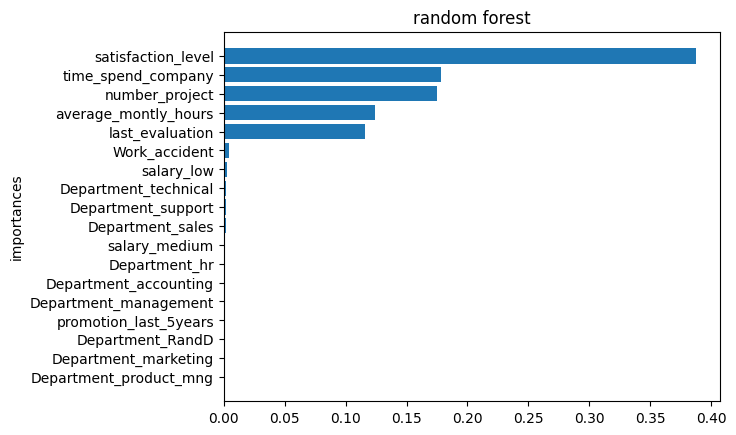

In [122]:
import matplotlib.pyplot as plt
best_model=gcv.best_estimator_
pd_imp=pd.DataFrame({"var":list(x.columns),"imp":best_model.feature_importances_})
pd_imp.sort_values(by="imp",inplace=True)
plt.barh(pd_imp["var"],pd_imp["imp"])
plt.ylabel("variable")
plt.title("random forest")
plt.ylabel("importances")
plt.show()

In [127]:
dtr=DecisionTreeRegressor(random_state=24)
bagg.get_params()

bagg=BaggingRegressor(estimator=dtr, random_state=24)
kfold=KFold(n_splits=5,shuffle=True,random_state=24)

params={"estimator__max_depth":[None,3,5],
        "estimator__min_samples_leaf":[1,5,10],
        "estimator__min_samples_split":[2,5,10],
        "n_estimators":[15,30,50]}
gcv=GridSearchCV(bagg,param_grid=params,cv=kfold,verbose=3)
gcv.fit(x,y)

Fitting 5 folds for each of 81 candidates, totalling 405 fits
[CV 1/5] END estimator__max_depth=None, estimator__min_samples_leaf=1, estimator__min_samples_split=2, n_estimators=15;, score=0.927 total time=   0.2s
[CV 2/5] END estimator__max_depth=None, estimator__min_samples_leaf=1, estimator__min_samples_split=2, n_estimators=15;, score=0.943 total time=   0.2s
[CV 3/5] END estimator__max_depth=None, estimator__min_samples_leaf=1, estimator__min_samples_split=2, n_estimators=15;, score=0.935 total time=   0.2s
[CV 4/5] END estimator__max_depth=None, estimator__min_samples_leaf=1, estimator__min_samples_split=2, n_estimators=15;, score=0.945 total time=   0.2s
[CV 5/5] END estimator__max_depth=None, estimator__min_samples_leaf=1, estimator__min_samples_split=2, n_estimators=15;, score=0.928 total time=   0.2s
[CV 1/5] END estimator__max_depth=None, estimator__min_samples_leaf=1, estimator__min_samples_split=2, n_estimators=30;, score=0.930 total time=   0.5s
[CV 2/5] END estimator__ma

KeyboardInterrupt: 

In [ ]:
import matplotlib.pyplot as plt
best_model=gcv_s.best_estimator_
pd_imp=pd.DataFrame({"var":list(x.columns),"imp":best_model.feature_importances_})
pd_imp.sort_values(by="imp",inplace=True)
plt.barh(pd_imp["var"],pd_imp["imp"])
plt.ylabel("variable")
plt.title("random forest")
plt.ylabel("importances")
plt.show()

In [134]:
import os
os.chdir(r"C:\Users\dbda\Desktop\MACHINE LEARNING\competition")
df=pd.read_csv("train.csv")
df.set_index("id", inplace = True)

x=df.drop("Hardness",axis=1)
y=df["Hardness"]

In [135]:
rf = RandomForestRegressor(random_state=24)
kfold=KFold(n_splits=5,shuffle=True,random_state=24)
param = {'max_features':[3,4,5,6,7],
        'max_depth':[None,3,5],
        'min_samples_split':[2,5,10],
        'min_samples_leaf':[1,5,10]}
gcv=GridSearchCV(rf,param_grid=param,cv=kfold,verbose=3)
gcv.fit(x,y)


Fitting 5 folds for each of 135 candidates, totalling 675 fits
[CV 1/5] END max_depth=None, max_features=3, min_samples_leaf=1, min_samples_split=2;, score=0.480 total time=   2.1s
[CV 2/5] END max_depth=None, max_features=3, min_samples_leaf=1, min_samples_split=2;, score=0.453 total time=   2.0s
[CV 3/5] END max_depth=None, max_features=3, min_samples_leaf=1, min_samples_split=2;, score=0.457 total time=   2.0s
[CV 4/5] END max_depth=None, max_features=3, min_samples_leaf=1, min_samples_split=2;, score=0.472 total time=   2.0s
[CV 5/5] END max_depth=None, max_features=3, min_samples_leaf=1, min_samples_split=2;, score=0.478 total time=   2.0s
[CV 1/5] END max_depth=None, max_features=3, min_samples_leaf=1, min_samples_split=5;, score=0.480 total time=   1.8s
[CV 2/5] END max_depth=None, max_features=3, min_samples_leaf=1, min_samples_split=5;, score=0.459 total time=   1.7s
[CV 3/5] END max_depth=None, max_features=3, min_samples_leaf=1, min_samples_split=5;, score=0.461 total time= 

GridSearchCV(cv=KFold(n_splits=5, random_state=24, shuffle=True),
             estimator=RandomForestRegressor(random_state=24),
             param_grid={'max_depth': [None, 3, 5],
                         'max_features': [3, 4, 5, 6, 7],
                         'min_samples_leaf': [1, 5, 10],
                         'min_samples_split': [2, 5, 10]},
             verbose=3)

In [136]:
print(gcv.best_params_)
print(gcv.best_score_)

{'max_depth': None, 'max_features': 5, 'min_samples_leaf': 5, 'min_samples_split': 2}
0.47683306224256505


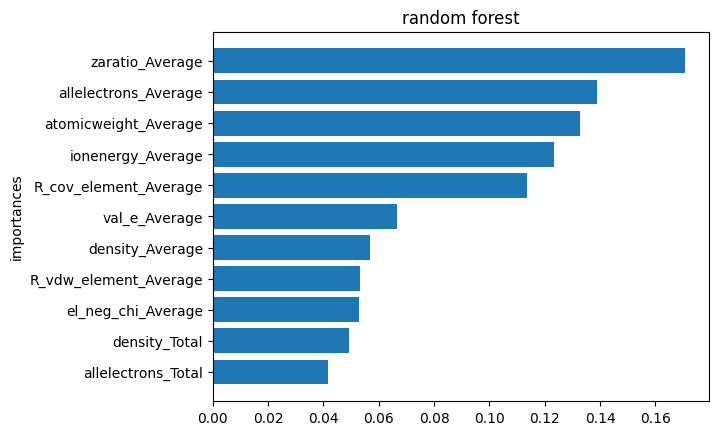

In [140]:
import matplotlib.pyplot as plt
best_model=gcv.best_estimator_
pd_imp=pd.DataFrame({"var":list(x.columns),"imp":best_model.feature_importances_})
pd_imp.sort_values(by="imp",inplace=True)
plt.barh(pd_imp["var"],pd_imp["imp"])
plt.ylabel("hardness")
plt.title("random forest")
plt.ylabel("importances")
plt.show()

In [139]:
## inferencing
test=pd.read_csv("test.csv",index_col=0)
best_model=gcv.best_estimator_
pred_hard=best_model.predict(test)
submit=pd.read_csv("sample_submission.csv")
submit["Hardness"]=pred_hard
submit.to_csv("submission_dr.csv",index=False)


In [146]:
os.chdir(r"C:\Users\dbda\Desktop\MACHINE LEARNING\competition\Binary Prediction of Smoker Status using Bio-Signals")

In [147]:
df=pd.read_csv("train.csv",index_col=0)

In [148]:
x=df.drop("smoking",axis=1)
y=df["smoking"]

In [149]:
rf = RandomForestClassifier(random_state=24)
kfold=StratifiedKFold(n_splits=5,shuffle=True,random_state=24)
param = {'max_features':[3,5,7]}
gcv=GridSearchCV(rf,param_grid=param,cv=kfold,verbose=3,scoring="neg_log_loss")
gcv.fit(x,y)


Fitting 5 folds for each of 3 candidates, totalling 15 fits
[CV 1/5] END ...................max_features=3;, score=-0.470 total time=  20.8s
[CV 2/5] END ...................max_features=3;, score=-0.463 total time=  20.5s
[CV 3/5] END ...................max_features=3;, score=-0.462 total time=  20.6s
[CV 4/5] END ...................max_features=3;, score=-0.471 total time=  20.6s
[CV 5/5] END ...................max_features=3;, score=-0.463 total time=  20.6s
[CV 1/5] END ...................max_features=5;, score=-0.480 total time=  29.7s
[CV 2/5] END ...................max_features=5;, score=-0.469 total time=  29.7s
[CV 3/5] END ...................max_features=5;, score=-0.465 total time=  29.9s
[CV 4/5] END ...................max_features=5;, score=-0.471 total time=  29.8s
[CV 5/5] END ...................max_features=5;, score=-0.471 total time=  30.1s
[CV 1/5] END ...................max_features=7;, score=-0.479 total time=  39.5s
[CV 2/5] END ...................max_features=7;, 

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=24, shuffle=True),
             estimator=RandomForestClassifier(random_state=24),
             param_grid={'max_features': [3, 5, 7]}, scoring='neg_log_loss',
             verbose=3)